# BINA Case Studiy - FS22

## Bike Sharing Economie als zukunftssicherer Markt in der Stadt von Morgen

Um in Zukunft die Co2 Bilanz der Metropolen gegen Null zu reduzieren, wird auf das Zwei-rad gesetzt und laufend in der Erweiterung der Infrastruktur mit eingeplant. So gehört die Mobilität der Zukunft innerhalb der Städte dem Fahrrad. Die Verwendung von Fahrrädern als Mittel zum Pendeln, insbesondere für kurze Strecken, ist keine neue Idee. In den letz-ten Jahren hat das Fahrradfahren im Hinblick auf die Gesundheit im Besonderen während der Corona-Zeit sowie dem Bewusstsein des Klimawandels an Bedeutung gewonnen. An-statt ein Fahrrad zu kaufen und zu unterhalten, leihen immer mehr Bürger Fahrräder aus, damit sie es bei Bedarf dort nutzen können, wo sie es gerade benötigen. Aus diesem Grund bekommt der Sharing Economy Markt immer einen grösseren Stellenwert. So schaffen diese beiden Trends einen grossen Markt, der gesättigt werden soll. Aus diesem Grund möchten wir einen Datensatz von Leihfahrrädern in einer Europäi-schen/amerikanischen Stadt analysieren und Prognosen zur Nutzung darstellen.

### Studierende
- Yannik Wiederkehr
- Nicolas Feuchter
- Christian Heusser
- Stefan Ilic

### Fragestellungen
- Welches Nutzungsmuster kann aus dem Datensatz der ausgeliehenen Fahrräder in den Jahren X bis Y bestimmt werden.
- Hat das Wetter (Temperatur, Windgeschwindigkeit, Regen, etc.) einen Einfluss auf die Nutzung des Fahrrad-Leihsystems
- Ist es möglich ein stündliches Ausleihungsmodell zu bestimmen
- An welchen Wochentagen ist die Nachfrage besonders hoch
- Zu welchen Jahreszeiten wird das Ausleihsystem besonders genutzt
- Vorgehensmodell bestimmen beispielsweise Lineare Regression, Zeitreihenanaly-se, Regression Trees und Random Forest

### Dataset
**Dataset name:** London bike sharing dataset
**Source:** Kaggle [London bike sharing dataset](https://cycling.data.tfl.gov.uk)

#### Features

- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

**weather_code" category description:**

- 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
- 2 = scattered clouds / few clouds
- 3 = Broken clouds
- 4 = Cloudy
- 7 = Rain/ light Rain shower/ Light rain
- 10 = rain with thunderstorm
- 26 = snowfall
- 94 = Freezing Fog




## Packete und Bibliotheken installieren

In [39]:
install.packages("corrplot")


  There is a binary version available but the source version is later:
         binary source needs_compilation
corrplot   0.88   0.92             FALSE



installing the source package 'corrplot'

Warning message in install.packages("corrplot"):
"installation of package 'corrplot' had non-zero exit status"

In [40]:
install.packages("tidyverse")

also installing the dependencies 'fs', 'progress', 'processx', 'evaluate', 'xfun', 'cli', 'rlang', 'vctrs', 'glue', 'tidyselect', 'data.table', 'gargle', 'vroom', 'callr', 'knitr', 'withr', 'broom', 'crayon', 'dbplyr', 'dplyr', 'dtplyr', 'forcats', 'googledrive', 'googlesheets4', 'haven', 'hms', 'httr', 'jsonlite', 'lubridate', 'magrittr', 'modelr', 'purrr', 'readr', 'reprex', 'rstudioapi', 'rvest', 'tibble', 'tidyr', 'xml2'




  There are binary versions available but the source versions are later:
              binary source needs_compilation
fs             1.5.0  1.5.2              TRUE
processx       3.5.2  3.5.3              TRUE
evaluate        0.14   0.15             FALSE
xfun            0.22   0.31              TRUE
cli            2.5.0  3.3.0              TRUE
rlang         0.4.11  1.0.2              TRUE
vctrs          0.3.8  0.4.1              TRUE
glue           1.4.2  1.6.2              TRUE
tidyselect     1.1.1  1.1.2              TRUE
data.table    1.14.0 1.14.2              TRUE
gargle         1.1.0  1.2.0             FALSE
vroom          1.4.0  1.5.7              TRUE
knitr           1.33   1.39             FALSE
withr          2.4.2  2.5.0             FALSE
broom          0.7.6  0.8.0             FALSE
crayon         1.4.1  1.5.1             FALSE
dbplyr         2.1.1  2.2.0             FALSE
dplyr          1.0.6  1.0.9              TRUE
dtplyr         1.1.0  1.2.1             FALSE
google

Warning message:
"packages 'dplyr', 'forcats', 'purrr', 'readr', 'tibble', 'tidyr', 'tidyverse' are in use and will not be installed"

package 'fs' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'fs'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\fs\COPYRIGHTS nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\fs\COPYRIGHTS zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\fs\DESCRIPTION nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\fs\DESCRIPTION zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\fs\doc\function-comparisons.html nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\fs\doc\function-comparisons.html zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environm

"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\fs\html\id.html nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\fs\html\id.html zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\fs\html\is_absolute_path.html nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\fs\html\is_absolute_path.html zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\fs\html\is_file.html nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\fs\html\is_file.html zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\fs\html\link_path.html nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\fs\html\li

package 'progress' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'progress'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\progress\DESCRIPTION nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\progress\DESCRIPTION zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\progress\help\aliases.rds nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\progress\help\aliases.rds zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\progress\help\AnIndex nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\progress\help\AnIndex zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaco

package 'processx' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'processx'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\processx\bin\x64\interrupt.exe nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\processx\bin\x64\interrupt.exe zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\processx\bin\x64\px.exe nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\processx\bin\x64\px.exe zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\processx\bin\x64\supervisor.exe nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\processx\bin\x64\supervisor.exe zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = 

"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\processx\NAMESPACE nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\processx\NAMESPACE zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\processx\NEWS.md nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\processx\NEWS.md zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\processx\R\processx nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\processx\R\processx zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\processx\R\processx.rdb nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\processx\R\processx.rdb zu kopi

package 'xfun' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'xfun'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\xfun\DESCRIPTION nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\xfun\DESCRIPTION zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\xfun\doc\index.html nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\xfun\doc\index.html zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\xfun\doc\xfun.html nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\xfun\doc\xfun.html zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\

"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\xfun\html\prose_index.html nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\xfun\html\prose_index.html zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\xfun\html\protect_math.html nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\xfun\html\protect_math.html zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\xfun\html\R.css nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\xfun\html\R.css zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\xfun\html\raw_string.html nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library

package 'cli' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'cli'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\cli\DESCRIPTION nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\cli\DESCRIPTION zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\cli\examples\apps\news.R nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\cli\examples\apps\news.R zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\cli\examples\apps\outdated.R nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\cli\examples\apps\outdated.R zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda

"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\cli\scripts\outdated.R nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\cli\scripts\outdated.R zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\cli\scripts\search.R nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\cli\scripts\search.R zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\cli\scripts\up.R nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\cli\scripts\up.R zu kopieren: Permission denied"Warning message:
"restored 'cli'"

package 'rlang' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rlang'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\rlang\backtrace-ver nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\rlang\backtrace-ver zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\rlang\DESCRIPTION nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\rlang\DESCRIPTION zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\rlang\help\aliases.rds nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\rlang\help\aliases.rds zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environ

"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\rlang\Meta\hsearch.rds nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\rlang\Meta\hsearch.rds zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\rlang\Meta\links.rds nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\rlang\Meta\links.rds zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\rlang\Meta\nsInfo.rds nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\rlang\Meta\nsInfo.rds zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\rlang\Meta\package.rds nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\rlang\Meta\p

package 'vctrs' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'vctrs'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\vctrs\DESCRIPTION nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\vctrs\DESCRIPTION zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\vctrs\doc\index.html nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\vctrs\doc\index.html zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\vctrs\doc\pillar.html nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\vctrs\doc\pillar.html zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environ

"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\vctrs\help\figures\lifecycle-superseded.svg nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\vctrs\help\figures\lifecycle-superseded.svg zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\vctrs\help\figures\logo.png nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\vctrs\help\figures\logo.png zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\vctrs\help\figures\sizes-recycling.png nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\vctrs\help\figures\sizes-recycling.png zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\vctrs\he

"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\vctrs\R\vctrs.rdb nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\vctrs\R\vctrs.rdb zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\vctrs\R\vctrs.rdx nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\vctrs\R\vctrs.rdx zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\vctrs\WORDLIST nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\vctrs\WORDLIST zu kopieren: Permission denied"Warning message:
"restored 'vctrs'"

package 'glue' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'glue'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\glue\DESCRIPTION nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\glue\DESCRIPTION zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\glue\doc\index.html nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\glue\doc\index.html zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\glue\doc\speed.html nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\glue\doc\speed.html zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\

"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\glue\Meta\features.rds nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\glue\Meta\features.rds zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\glue\Meta\hsearch.rds nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\glue\Meta\hsearch.rds zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\glue\Meta\links.rds nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\glue\Meta\links.rds zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\glue\Meta\nsInfo.rds nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\glue\Meta\nsInfo

package 'tidyselect' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'tidyselect'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\tidyselect\DESCRIPTION nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\tidyselect\DESCRIPTION zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\tidyselect\help\aliases.rds nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\tidyselect\help\aliases.rds zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\tidyselect\help\AnIndex nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\tidyselect\help\AnIndex zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\Pro

"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\tidyselect\R\tidyselect.rdx nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\tidyselect\R\tidyselect.rdx zu kopieren: Permission denied"Warning message:
"restored 'tidyselect'"

package 'data.table' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'data.table'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\data.table\DESCRIPTION nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\data.table\DESCRIPTION zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\data.table\doc\datatable-benchmarking.html nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\data.table\doc\datatable-benchmarking.html zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\data.table\doc\datatable-benchmarking.Rmd nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\data.table\doc\datatable-benchmarking.Rmd zu kopieren: Permission denied"Warning messa

"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\data.table\help\AnIndex nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\data.table\help\AnIndex zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\data.table\help\data.table.rdb nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\data.table\help\data.table.rdb zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\data.table\help\data.table.rdx nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\data.table\help\data.table.rdx zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\data.table\help\paths.rds nach C:\ProgramData\Anaconda3\en

"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\data.table\html\IDateTime.html nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\data.table\html\IDateTime.html zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\data.table\html\J.html nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\data.table\html\J.html zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\data.table\html\last.html nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\data.table\html\last.html zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\data.table\html\like.html nach C:\ProgramData\Anaconda3\envs\R-Environ

"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\data.table\html\tables.html nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\data.table\html\tables.html zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\data.table\html\test.data.table.html nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\data.table\html\test.data.table.html zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\data.table\html\timetaken.html nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\data.table\html\timetaken.html zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\data.table\html\transform.data.table.h

"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\data.table\tests\536_fread_fill_1.txt nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\data.table\tests\536_fread_fill_1.txt zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\data.table\tests\536_fread_fill_2.txt nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\data.table\tests\536_fread_fill_2.txt zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\data.table\tests\536_fread_fill_3_extreme.txt nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\data.table\tests\536_fread_fill_3_extreme.txt zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\l

"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\data.table\tests\issue_1330_fread.txt nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\data.table\tests\issue_1330_fread.txt zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\data.table\tests\issue_1462_fread_quotes.txt nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\data.table\tests\issue_1462_fread_quotes.txt zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\data.table\tests\issue_1573_fill.txt nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\data.table\tests\issue_1573_fill.txt zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\libra

"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\data.table\tests\utf16be.txt nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\data.table\tests\utf16be.txt zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\data.table\tests\utf16le.txt nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\data.table\tests\utf16le.txt zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\data.table\tests\winallquoted.csv.bz2 nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\data.table\tests\winallquoted.csv.bz2 zu kopieren: Permission denied"Warning message:
"restored 'data.table'"

package 'vroom' successfully unpacked and MD5 sums checked
package 'callr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'callr'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\callr\DESCRIPTION nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\callr\DESCRIPTION zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\callr\developer-notes.md nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\callr\developer-notes.md zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\callr\help\aliases.rds nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\callr\help\aliases.rds zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs

"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\callr\html\r_process_options.html nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\callr\html\r_process_options.html zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\callr\html\r_session.html nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\callr\html\r_session.html zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\callr\html\r_session_options.html nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\callr\html\r_session_options.html zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\callr\html\r_vanilla.html nach C:\ProgramD

package 'haven' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'haven'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\haven\DESCRIPTION nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\haven\DESCRIPTION zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\haven\doc\datetimes.html nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\haven\doc\datetimes.html zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\haven\doc\datetimes.Rmd nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\haven\doc\datetimes.Rmd zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\en

"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\haven\html\zap_formats.html nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\haven\html\zap_formats.html zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\haven\html\zap_label.html nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\haven\html\zap_label.html zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\haven\html\zap_labels.html nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\haven\html\zap_labels.html zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\haven\html\zap_missing.html nach C:\ProgramData\Anaconda3\envs\R-Env

package 'jsonlite' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'jsonlite'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\jsonlite\CITATION nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\jsonlite\CITATION zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\jsonlite\DESCRIPTION nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\jsonlite\DESCRIPTION zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\jsonlite\doc\index.html nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\jsonlite\doc\index.html zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-

"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\jsonlite\html\stream_in.html nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\jsonlite\html\stream_in.html zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\jsonlite\html\unbox.html nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\jsonlite\html\unbox.html zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\jsonlite\html\validate.html nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\jsonlite\html\validate.html zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\jsonlite\INDEX nach C:\ProgramData\Anaconda3\envs\R-Environment\Li

package 'lubridate' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'lubridate'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\lubridate\cctz.sh nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\lubridate\cctz.sh zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\lubridate\CITATION nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\lubridate\CITATION zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\lubridate\data\Rdata.rdb nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\lubridate\data\Rdata.rdb zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-E

"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\lubridate\html\decimal_date.html nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\lubridate\html\decimal_date.html zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\lubridate\html\Deprecated.html nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\lubridate\html\Deprecated.html zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\lubridate\html\dst.html nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\lubridate\html\dst.html zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\lubridate\html\Duration-class.html nach C:\ProgramData

"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\lubridate\html\origin.html nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\lubridate\html\origin.html zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\lubridate\html\parse_date_time.html nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\lubridate\html\parse_date_time.html zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\lubridate\html\Period-class.html nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\lubridate\html\Period-class.html zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\lubridate\html\period.html nach C:\Pro

"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\lubridate\Meta\data.rds nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\lubridate\Meta\data.rds zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\lubridate\Meta\features.rds nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\lubridate\Meta\features.rds zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\lubridate\Meta\hsearch.rds nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\lubridate\Meta\hsearch.rds zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\lubridate\Meta\links.rds nach C:\ProgramData\Anaconda3\envs\R-Environmen

package 'magrittr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'magrittr'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\magrittr\DESCRIPTION nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\magrittr\DESCRIPTION zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\magrittr\doc\index.html nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\magrittr\doc\index.html zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\magrittr\doc\magrittr.html nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\magrittr\doc\magrittr.html zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData

"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\magrittr\Meta\hsearch.rds nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\magrittr\Meta\hsearch.rds zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\magrittr\Meta\links.rds nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\magrittr\Meta\links.rds zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\magrittr\Meta\nsInfo.rds nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\magrittr\Meta\nsInfo.rds zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\magrittr\Meta\package.rds nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R

package 'modelr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'modelr'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\modelr\data\Rdata.rdb nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\modelr\data\Rdata.rdb zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\modelr\data\Rdata.rds nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\modelr\data\Rdata.rds zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\modelr\data\Rdata.rdx nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\modelr\data\Rdata.rdx zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\env

"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\modelr\html\resample.html nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\modelr\html\resample.html zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\modelr\html\resample_bootstrap.html nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\modelr\html\resample_bootstrap.html zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\modelr\html\resample_partition.html nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\modelr\html\resample_partition.html zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\modelr\html\resample_permutation.h

package 'rstudioapi' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rstudioapi'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\rstudioapi\DESCRIPTION nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\rstudioapi\DESCRIPTION zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\rstudioapi\doc\dialogs.html nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\rstudioapi\doc\dialogs.html zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\rstudioapi\doc\dialogs.R nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\rstudioapi\doc\dialogs.R zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\P

"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\rstudioapi\html\askForPassword.html nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\rstudioapi\html\askForPassword.html zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\rstudioapi\html\askForSecret.html nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\rstudioapi\html\askForSecret.html zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\rstudioapi\html\build-tools.html nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\rstudioapi\html\build-tools.html zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\rstudioapi\html\callFun.

"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\rstudioapi\html\launcherConfig.html nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\rstudioapi\html\launcherConfig.html zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\rstudioapi\html\launcherContainer.html nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\rstudioapi\html\launcherContainer.html zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\rstudioapi\html\launcherControlJob.html nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\rstudioapi\html\launcherControlJob.html zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\

"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\rstudioapi\html\sourceMarkers.html nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\rstudioapi\html\sourceMarkers.html zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\rstudioapi\html\terminalActivate.html nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\rstudioapi\html\terminalActivate.html zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\rstudioapi\html\terminalBuffer.html nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\rstudioapi\html\terminalBuffer.html zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\rstudioapi\h

"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\rstudioapi\Meta\Rd.rds nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\rstudioapi\Meta\Rd.rds zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\rstudioapi\Meta\vignette.rds nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\rstudioapi\Meta\vignette.rds zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\rstudioapi\NAMESPACE nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\rstudioapi\NAMESPACE zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\rstudioapi\NEWS.md nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\rs

package 'xml2' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'xml2'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\xml2\DESCRIPTION nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\xml2\DESCRIPTION zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\xml2\doc\index.html nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\xml2\doc\index.html zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\xml2\doc\modification.html nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\xml2\doc\modification.html zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-En

"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\xml2\html\xml_comment.html nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\xml2\html\xml_comment.html zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\xml2\html\xml_dtd.html nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\xml2\html\xml_dtd.html zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\xml2\html\xml_find_all.html nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\xml2\html\xml_find_all.html zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\xml2\html\xml_missing.html nach C:\ProgramData\Anaconda3\envs\R-Environmen

"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\xml2\NEWS.md nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\xml2\NEWS.md zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\xml2\R\xml2 nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\xml2\R\xml2 zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\xml2\R\xml2.rdb nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\xml2\R\xml2.rdb zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\xml2\R\xml2.rdx nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\xml2\R\xml2.rdx zu kopieren: Permission denied"Warning message:
"rest


The downloaded binary packages are in
	C:\Users\stefa\AppData\Local\Temp\RtmpyYYIUi\downloaded_packages


installing the source packages 'evaluate', 'gargle', 'knitr', 'withr', 'broom', 'crayon', 'dbplyr', 'dtplyr', 'googledrive', 'googlesheets4', 'hms', 'httr', 'reprex', 'rvest'

Warning message in install.packages("tidyverse"):
"installation of package 'evaluate' had non-zero exit status"Warning message in install.packages("tidyverse"):
"installation of package 'withr' had non-zero exit status"Warning message in install.packages("tidyverse"):
"installation of package 'broom' had non-zero exit status"Warning message in install.packages("tidyverse"):
"installation of package 'crayon' had non-zero exit status"Warning message in install.packages("tidyverse"):
"installation of package 'hms' had non-zero exit status"Warning message in install.packages("tidyverse"):
"installation of package 'httr' had non-zero exit status"Warning message in install.packages("tidyverse"):
"installation of package 'gargle' had non-zero exit status"Warning message in install.packages("tidyverse"):
"installation of

In [41]:
install.packages("ggplot2")


  There is a binary version available but the source version is later:
        binary source needs_compilation
ggplot2  3.3.3  3.3.6             FALSE



installing the source package 'ggplot2'

Warning message in install.packages("ggplot2"):
"installation of package 'ggplot2' had non-zero exit status"

In [42]:
install.packages("scales")

also installing the dependency 'rlang'




  There are binary versions available but the source versions are later:
       binary source needs_compilation
rlang  0.4.11  1.0.2              TRUE
scales  1.1.1  1.2.0             FALSE

  Binaries will be installed
package 'rlang' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rlang'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\rlang\backtrace-ver nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\rlang\backtrace-ver zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\rlang\DESCRIPTION nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\rlang\DESCRIPTION zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\rlang\help\aliases.rds nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\rlang\help\aliases.rds zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environ

"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\rlang\Meta\hsearch.rds nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\rlang\Meta\hsearch.rds zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\rlang\Meta\links.rds nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\rlang\Meta\links.rds zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\rlang\Meta\nsInfo.rds nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\rlang\Meta\nsInfo.rds zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\rlang\Meta\package.rds nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\rlang\Meta\p


The downloaded binary packages are in
	C:\Users\stefa\AppData\Local\Temp\RtmpyYYIUi\downloaded_packages


installing the source package 'scales'

Warning message in install.packages("scales"):
"installation of package 'scales' had non-zero exit status"

In [43]:
install.packages("reshape2")

Warning message:
"package 'reshape2' is in use and will not be installed"

In [44]:
install.packages("plyr")


  There is a binary version available but the source version is later:
     binary source needs_compilation
plyr  1.8.6  1.8.7              TRUE

  Binaries will be installed


Warning message:
"package 'plyr' is in use and will not be installed"

In [45]:
install.packages("Metrics")

package 'Metrics' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\stefa\AppData\Local\Temp\RtmpyYYIUi\downloaded_packages


In [46]:
install.packages("rpart")


  There is a binary version available but the source version is later:
      binary source needs_compilation
rpart 4.1-15 4.1.16              TRUE

  Binaries will be installed
package 'rpart' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rpart'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\rpart\data\Rdata.rdb nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\rpart\data\Rdata.rdb zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\rpart\data\Rdata.rds nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\rpart\data\Rdata.rds zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\rpart\data\Rdata.rdx nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\rpart\data\Rdata.rdx zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Env

"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\rpart\html\predict.rpart.html nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\rpart\html\predict.rpart.html zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\rpart\html\print.rpart.html nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\rpart\html\print.rpart.html zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\rpart\html\printcp.html nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\rpart\html\printcp.html zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\rpart\html\prune.rpart.html nach C:\ProgramData\Anaconda3\envs\R-E

"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\rpart\NAMESPACE nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\rpart\NAMESPACE zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\rpart\NEWS.Rd nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\rpart\NEWS.Rd zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\rpart\po\de\LC_MESSAGES\R-rpart.mo nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\rpart\po\de\LC_MESSAGES\R-rpart.mo zu kopieren: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\rpart\po\de\LC_MESSAGES\rpart.mo nach C:\ProgramData\Anaconda3\envs\R-Environment\Lib\R\library\rpar


The downloaded binary packages are in
	C:\Users\stefa\AppData\Local\Temp\RtmpyYYIUi\downloaded_packages


In [47]:
install.packages("caTools")

package 'caTools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\stefa\AppData\Local\Temp\RtmpyYYIUi\downloaded_packages


In [48]:
install.packages("randomForest")

Warning message:
"package 'randomForest' is not available (for R version 3.6.1)"

In [49]:
install.packages("h2o")


  There is a binary version available but the source version is later:
      binary   source needs_compilation
h2o 3.32.1.2 3.36.1.2             FALSE



installing the source package 'h2o'



In [50]:
library(purrr)
library(RColorBrewer)
library(scales)
library(readr)
library(tidyr)
library(corrplot)
library(reshape2)
library(scales)
library(plyr)
library(dplyr)
library(h2o)
library(tidyverse)

### Notwendige Libraries laden

### Datenset Bike Sharing laden und unter der Variable "bike_data" abspeichern

In [55]:
bike_data <- read.csv('london_bereinigt.csv', header = TRUE, sep = ";")

### Datenset anzeigen

In [56]:
bike_data

instant,date,time,hr,weekdays,month,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
1,2015-01-04,00:00:00,0,Sonntag,1,182,3.0,2.0,93.0,6.0,3,0,1,3
2,2015-01-04,01:00:00,1,Sonntag,1,138,3.0,2.5,93.0,5.0,1,0,1,3
3,2015-01-04,02:00:00,2,Sonntag,1,134,2.5,2.5,96.5,0.0,1,0,1,3
4,2015-01-04,03:00:00,3,Sonntag,1,72,2.0,2.0,100.0,0.0,1,0,1,3
5,2015-01-04,04:00:00,4,Sonntag,1,47,2.0,0.0,93.0,6.5,1,0,1,3
6,2015-01-04,05:00:00,5,Sonntag,1,46,2.0,2.0,93.0,4.0,1,0,1,3
7,2015-01-04,06:00:00,6,Sonntag,1,51,1.0,-1.0,100.0,7.0,4,0,1,3
8,2015-01-04,07:00:00,7,Sonntag,1,75,1.0,-1.0,100.0,7.0,4,0,1,3
9,2015-01-04,08:00:00,8,Sonntag,1,131,1.5,-1.0,96.5,8.0,4,0,1,3
10,2015-01-04,09:00:00,9,Sonntag,1,301,2.0,-0.5,100.0,9.0,3,0,1,3


### Datentypen anzeigen

In [53]:
str(bike_data)

'data.frame':	17414 obs. of  15 variables:
 $ instant     : int  1 2 3 4 5 6 7 8 9 10 ...
 $ date        : Factor w/ 730 levels "2015-01-04","2015-01-05",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ time        : Factor w/ 24 levels "00:00:00","01:00:00",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ hr          : int  0 1 2 3 4 5 6 7 8 9 ...
 $ weekdays    : Factor w/ 7 levels "Dienstag","Donnerstag",..: 7 7 7 7 7 7 7 7 7 7 ...
 $ month       : int  1 1 1 1 1 1 1 1 1 1 ...
 $ cnt         : int  182 138 134 72 47 46 51 75 131 301 ...
 $ t1          : num  3 3 2.5 2 2 2 1 1 1.5 2 ...
 $ t2          : num  2 2.5 2.5 2 0 2 -1 -1 -1 -0.5 ...
 $ hum         : num  93 93 96.5 100 93 93 100 100 96.5 100 ...
 $ wind_speed  : num  6 5 0 0 6.5 4 7 7 8 9 ...
 $ weather_code: int  3 1 1 1 1 1 4 4 4 3 ...
 $ is_holiday  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ is_weekend  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ season      : int  3 3 3 3 3 3 3 3 3 3 ...


### Zusammenfassung des Datensets anzeigen

In [54]:
summary(bike_data)

    instant              date             time             hr       
 Min.   :    1   2015-01-04:   24   16:00:00:  730   Min.   : 0.00  
 1st Qu.: 4354   2015-01-05:   24   12:00:00:  729   1st Qu.: 6.00  
 Median : 8708   2015-01-06:   24   15:00:00:  729   Median :12.00  
 Mean   : 8708   2015-01-08:   24   13:00:00:  728   Mean   :11.51  
 3rd Qu.:13061   2015-01-09:   24   14:00:00:  728   3rd Qu.:18.00  
 Max.   :17414   2015-01-10:   24   17:00:00:  728   Max.   :23.00  
                 (Other)   :17270   (Other) :13042                  
       weekdays        month             cnt             t1       
 Dienstag  :2505   Min.   : 1.000   Min.   :   0   Min.   :-1.50  
 Donnerstag:2492   1st Qu.: 4.000   1st Qu.: 257   1st Qu.: 8.00  
 Freitag   :2450   Median : 7.000   Median : 844   Median :12.50  
 Mittwoch  :2489   Mean   : 6.515   Mean   :1143   Mean   :12.47  
 Montag    :2508   3rd Qu.:10.000   3rd Qu.:1672   3rd Qu.:16.00  
 Samstag   :2465   Max.   :12.000   Max.   :78

### Erklärung zu summary(bike_data)

In der Zusammenfassung werden pro Spalte der kleinste Wert, das erste Quartil, der Median, Mittelwert, das dritte Quartil und der Maximalwert angezeigt. Diese Zusammenfassung hilf, einen ersten Überblick über die Daten und die Werte zu erhalten.

## Vergangenheitsanalyse

<div class="alert alert-success" role="alert">
Am Ausprobieren
</div>

### Punktediagramm mit Anzahl Ausleihung von Fahrrädern nach Datum

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.


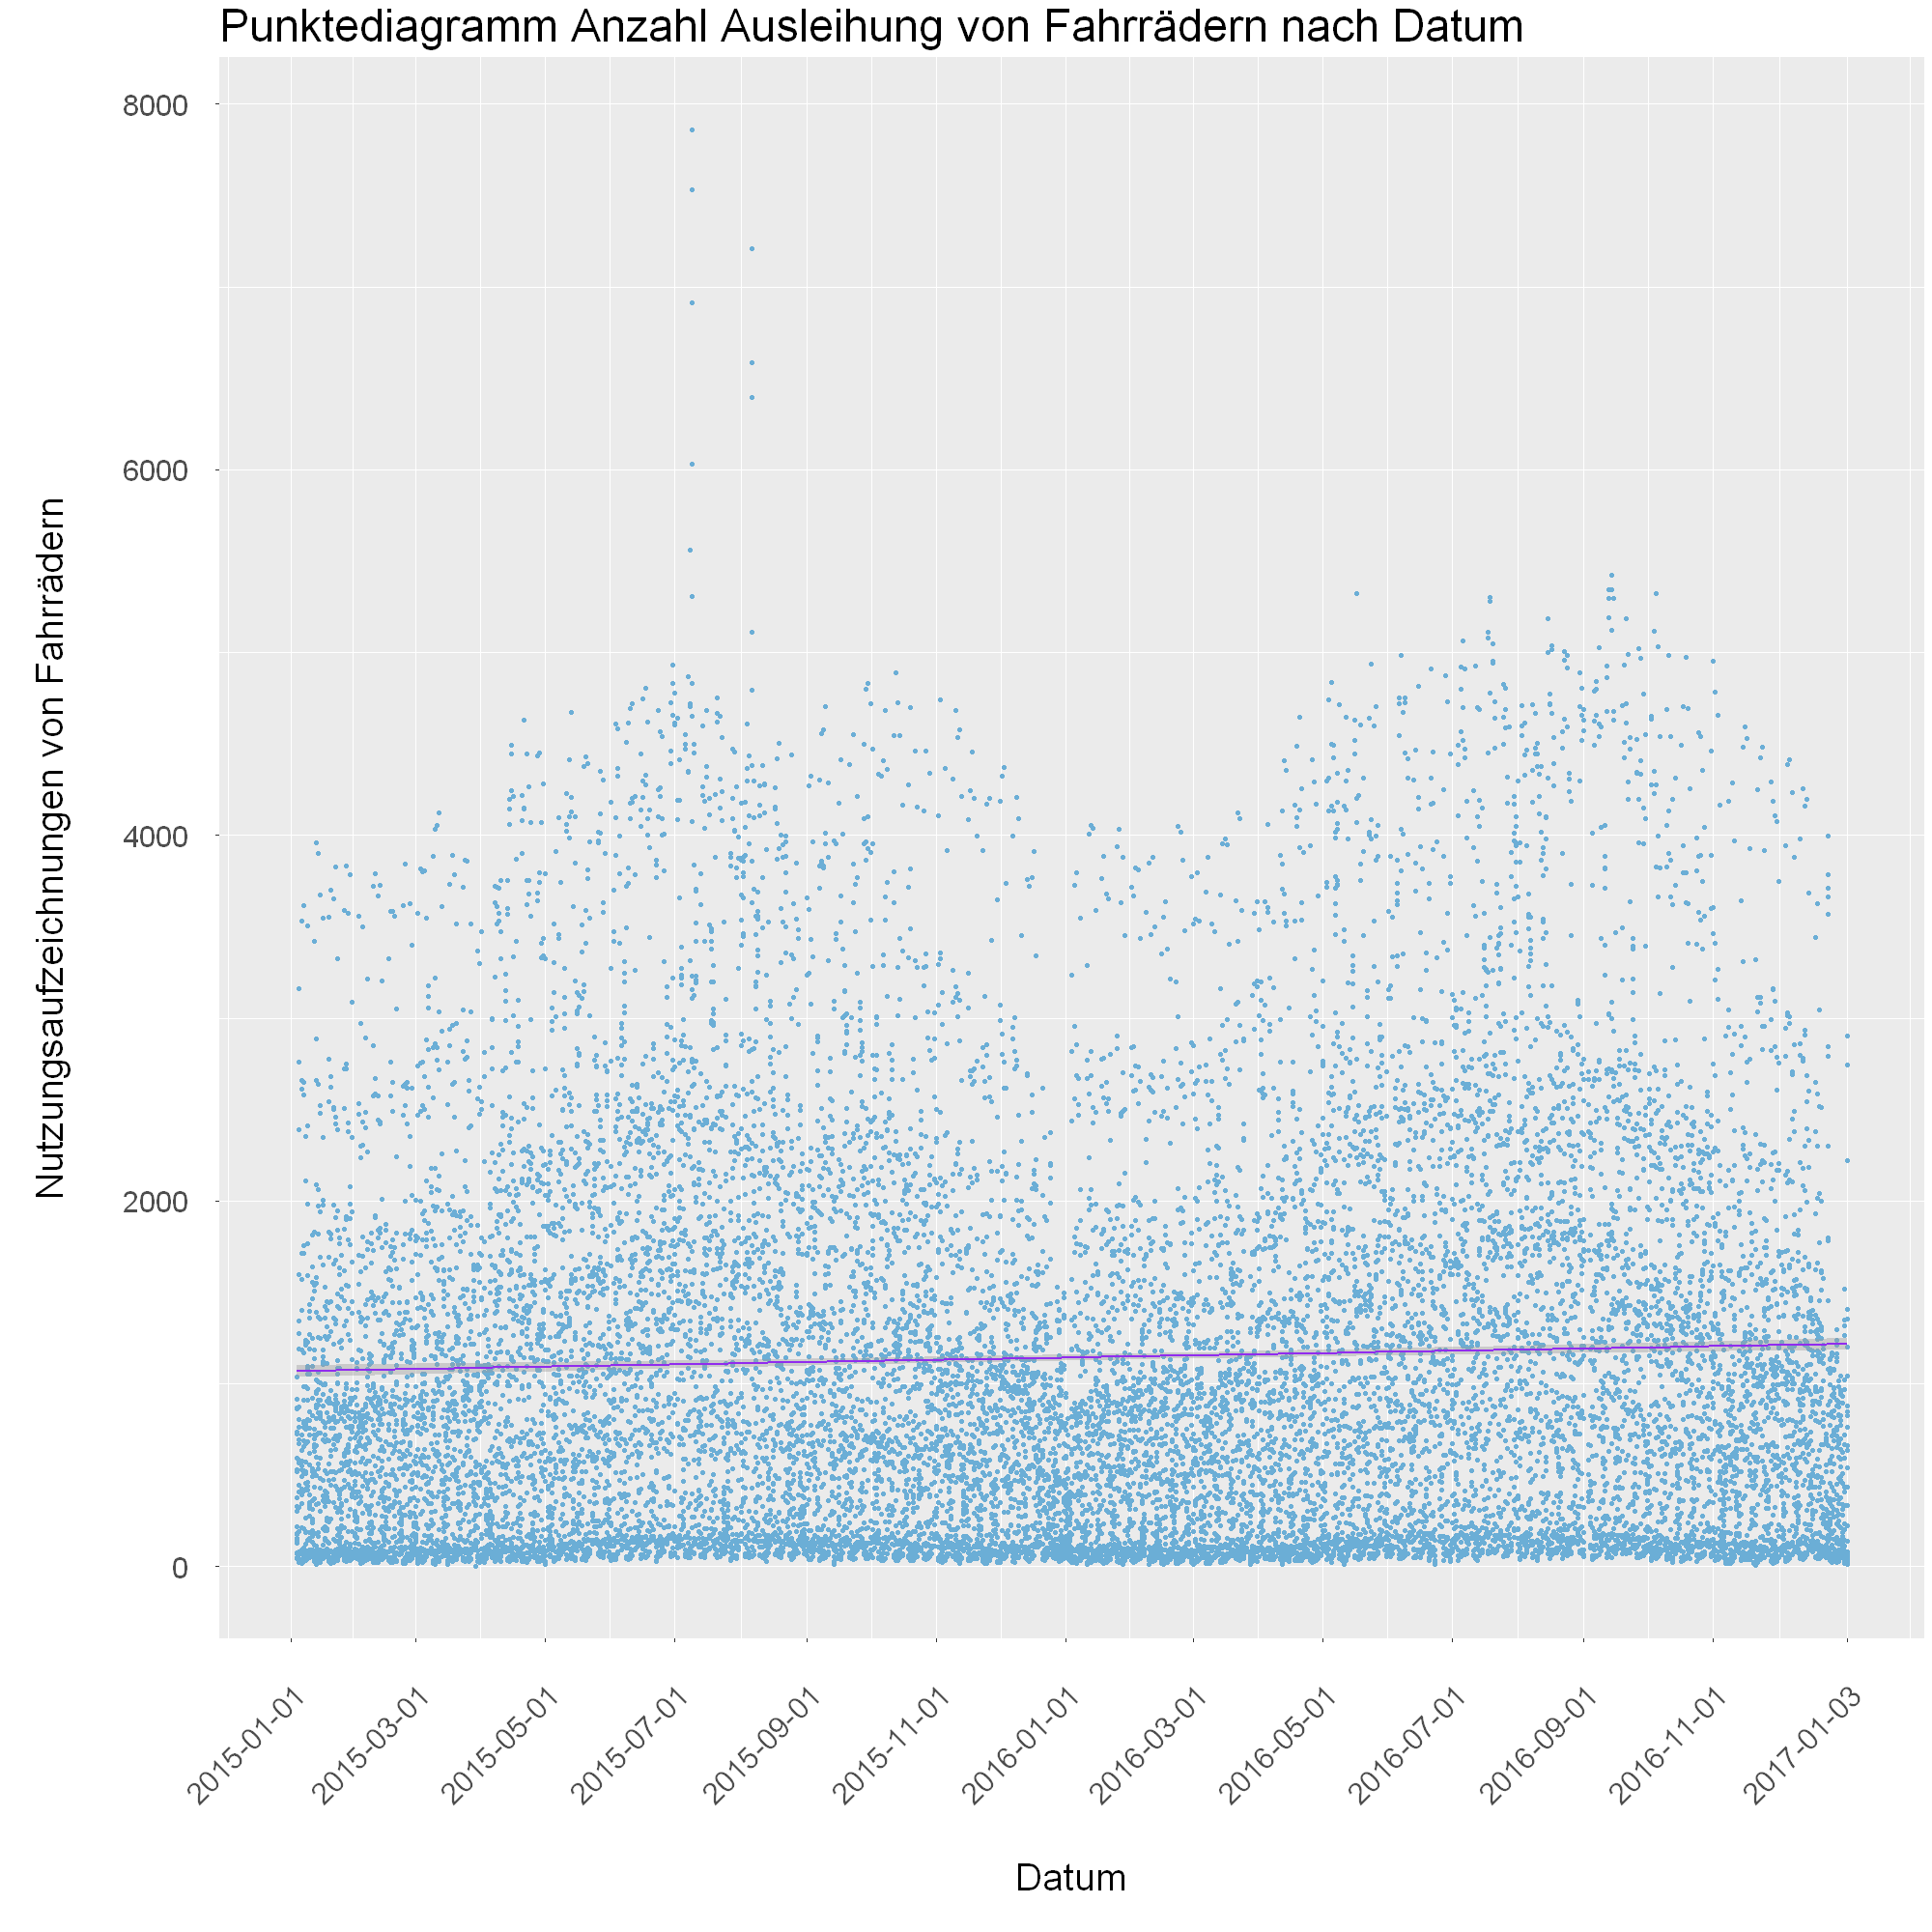

In [57]:
ggplot(data = bike_data, aes(as.Date(x=date),y=cnt)) +
#Cast String to Date https://statisticsglobe.com/convert-character-string-to-date-object-in-r
       geom_point(color="#6baed6") +
       geom_smooth(method = "lm", formula = y ~ x, color = "purple2") +
scale_x_date(date_labels = "%B")+
xlab("Datum") +
ylab("Nutzungsaufzeichnungen von Fahrrädern") +
ggtitle("Punktediagramm Anzahl Ausleihung von Fahrrädern nach Datum") +
 scale_x_date(breaks = as.Date(c("2015-01-01","2015-03-01", "2015-05-01", "2015-07-01", "2015-09-01","2015-11-01", "2016-01-01","2016-03-01", "2016-05-01", "2016-07-01", "2016-09-01","2016-11-01", "2017-01-03")))+
#Aussehen Editing
theme(text = element_text(size = 28) ,
      axis.title.y = element_text(margin = margin(t = 0, r = 40, b = 0, l = 20)),
      axis.title.x = element_text(margin = margin(t = 40, r = 00, b = 20, l = 0)),
      axis.text.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 0)),
      axis.text.x = element_text(margin = margin(t = 30, r = 0, b = 0, l = 0), angle=45, hjust = 1),
      #https://www.datanovia.com/en/blog/ggplot-date-axis-customization/
      )

options(repr.plot.width = 20, repr.plot.height = 20, repr.plot.res = 100)


### Punktediagramm mit Anzahl Ausleihung von Fahrrädern nach Datum von Januar 2016 bis Dezember 2016

ERROR: Error in xlab("Datum") + ylab("Nutzungsaufzeichnungen von Fahrrädern"): nicht-numerisches Argument für binären Operator


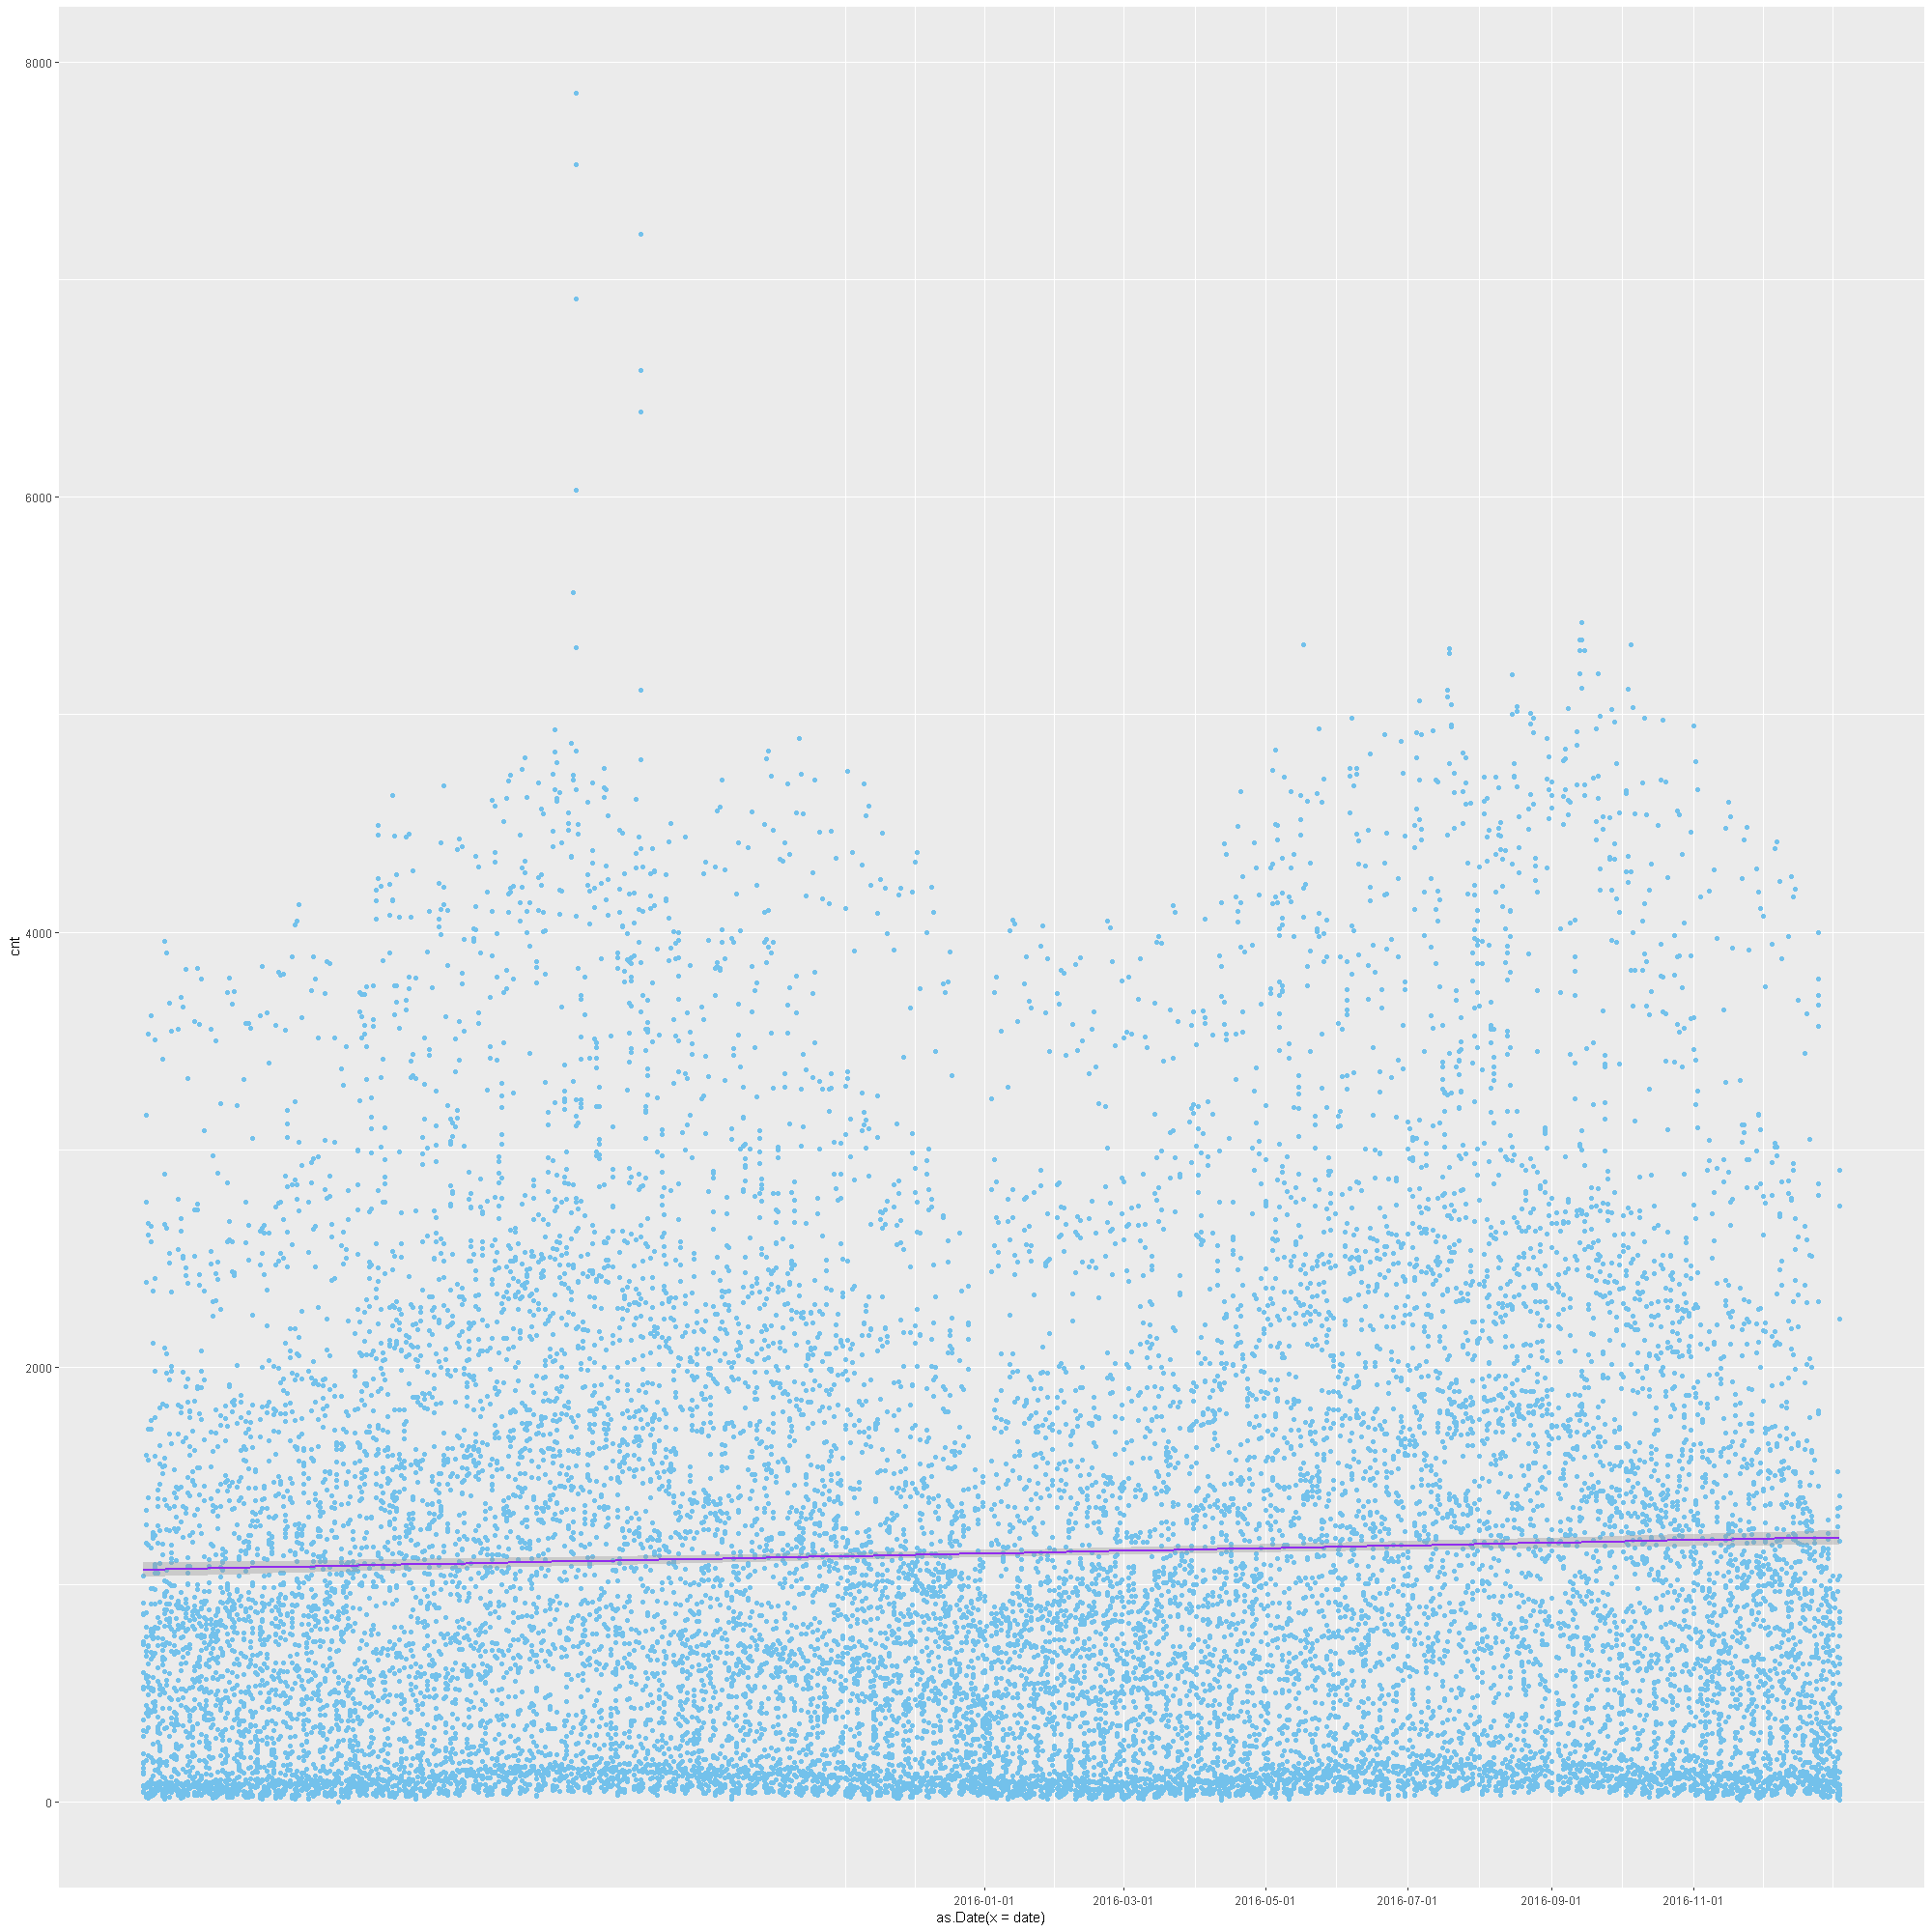

In [58]:
min <- as.Date("2016-01-01")
max <- as.Date("2016-11-01")

ggplot(data = bike_data, aes(as.Date(x=date),y=cnt)) +
#Cast String to Date https://statisticsglobe.com/convert-character-string-to-date-object-in-r
       geom_point(color="#73c1eb") +
       geom_smooth(method = "lm", formula = y ~ x, color = "purple2") +
scale_x_date(breaks = as.Date(c("2016-01-01","2016-03-01", "2016-05-01", "2016-07-01", "2016-09-01","2016-11-01")))
xlab("Datum") +
ylab("Nutzungsaufzeichnungen von Fahrrädern") +
ggtitle("Punktediagramm Anzahl Ausleihung von Fahrrädern nach Datum") +
 scale_x_date(limits = c(min, max))+
#Aussehen Editing
theme(text = element_text(size = 28) ,
      axis.title.y = element_text(margin = margin(t = 0, r = 40, b = 0, l = 20)),
      axis.title.x = element_text(margin = margin(t = 40, r = 00, b = 20, l = 0)),
      axis.text.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 0)),
      axis.text.x = element_text(margin = margin(t = 30, r = 0, b = 0, l = 0), angle=45, hjust = 1),
      #https://www.datanovia.com/en/blog/ggplot-date-axis-customization/
      )

options(repr.plot.width = 20, repr.plot.height = 20, repr.plot.res = 100)

`geom_smooth()` using formula 'y ~ x'


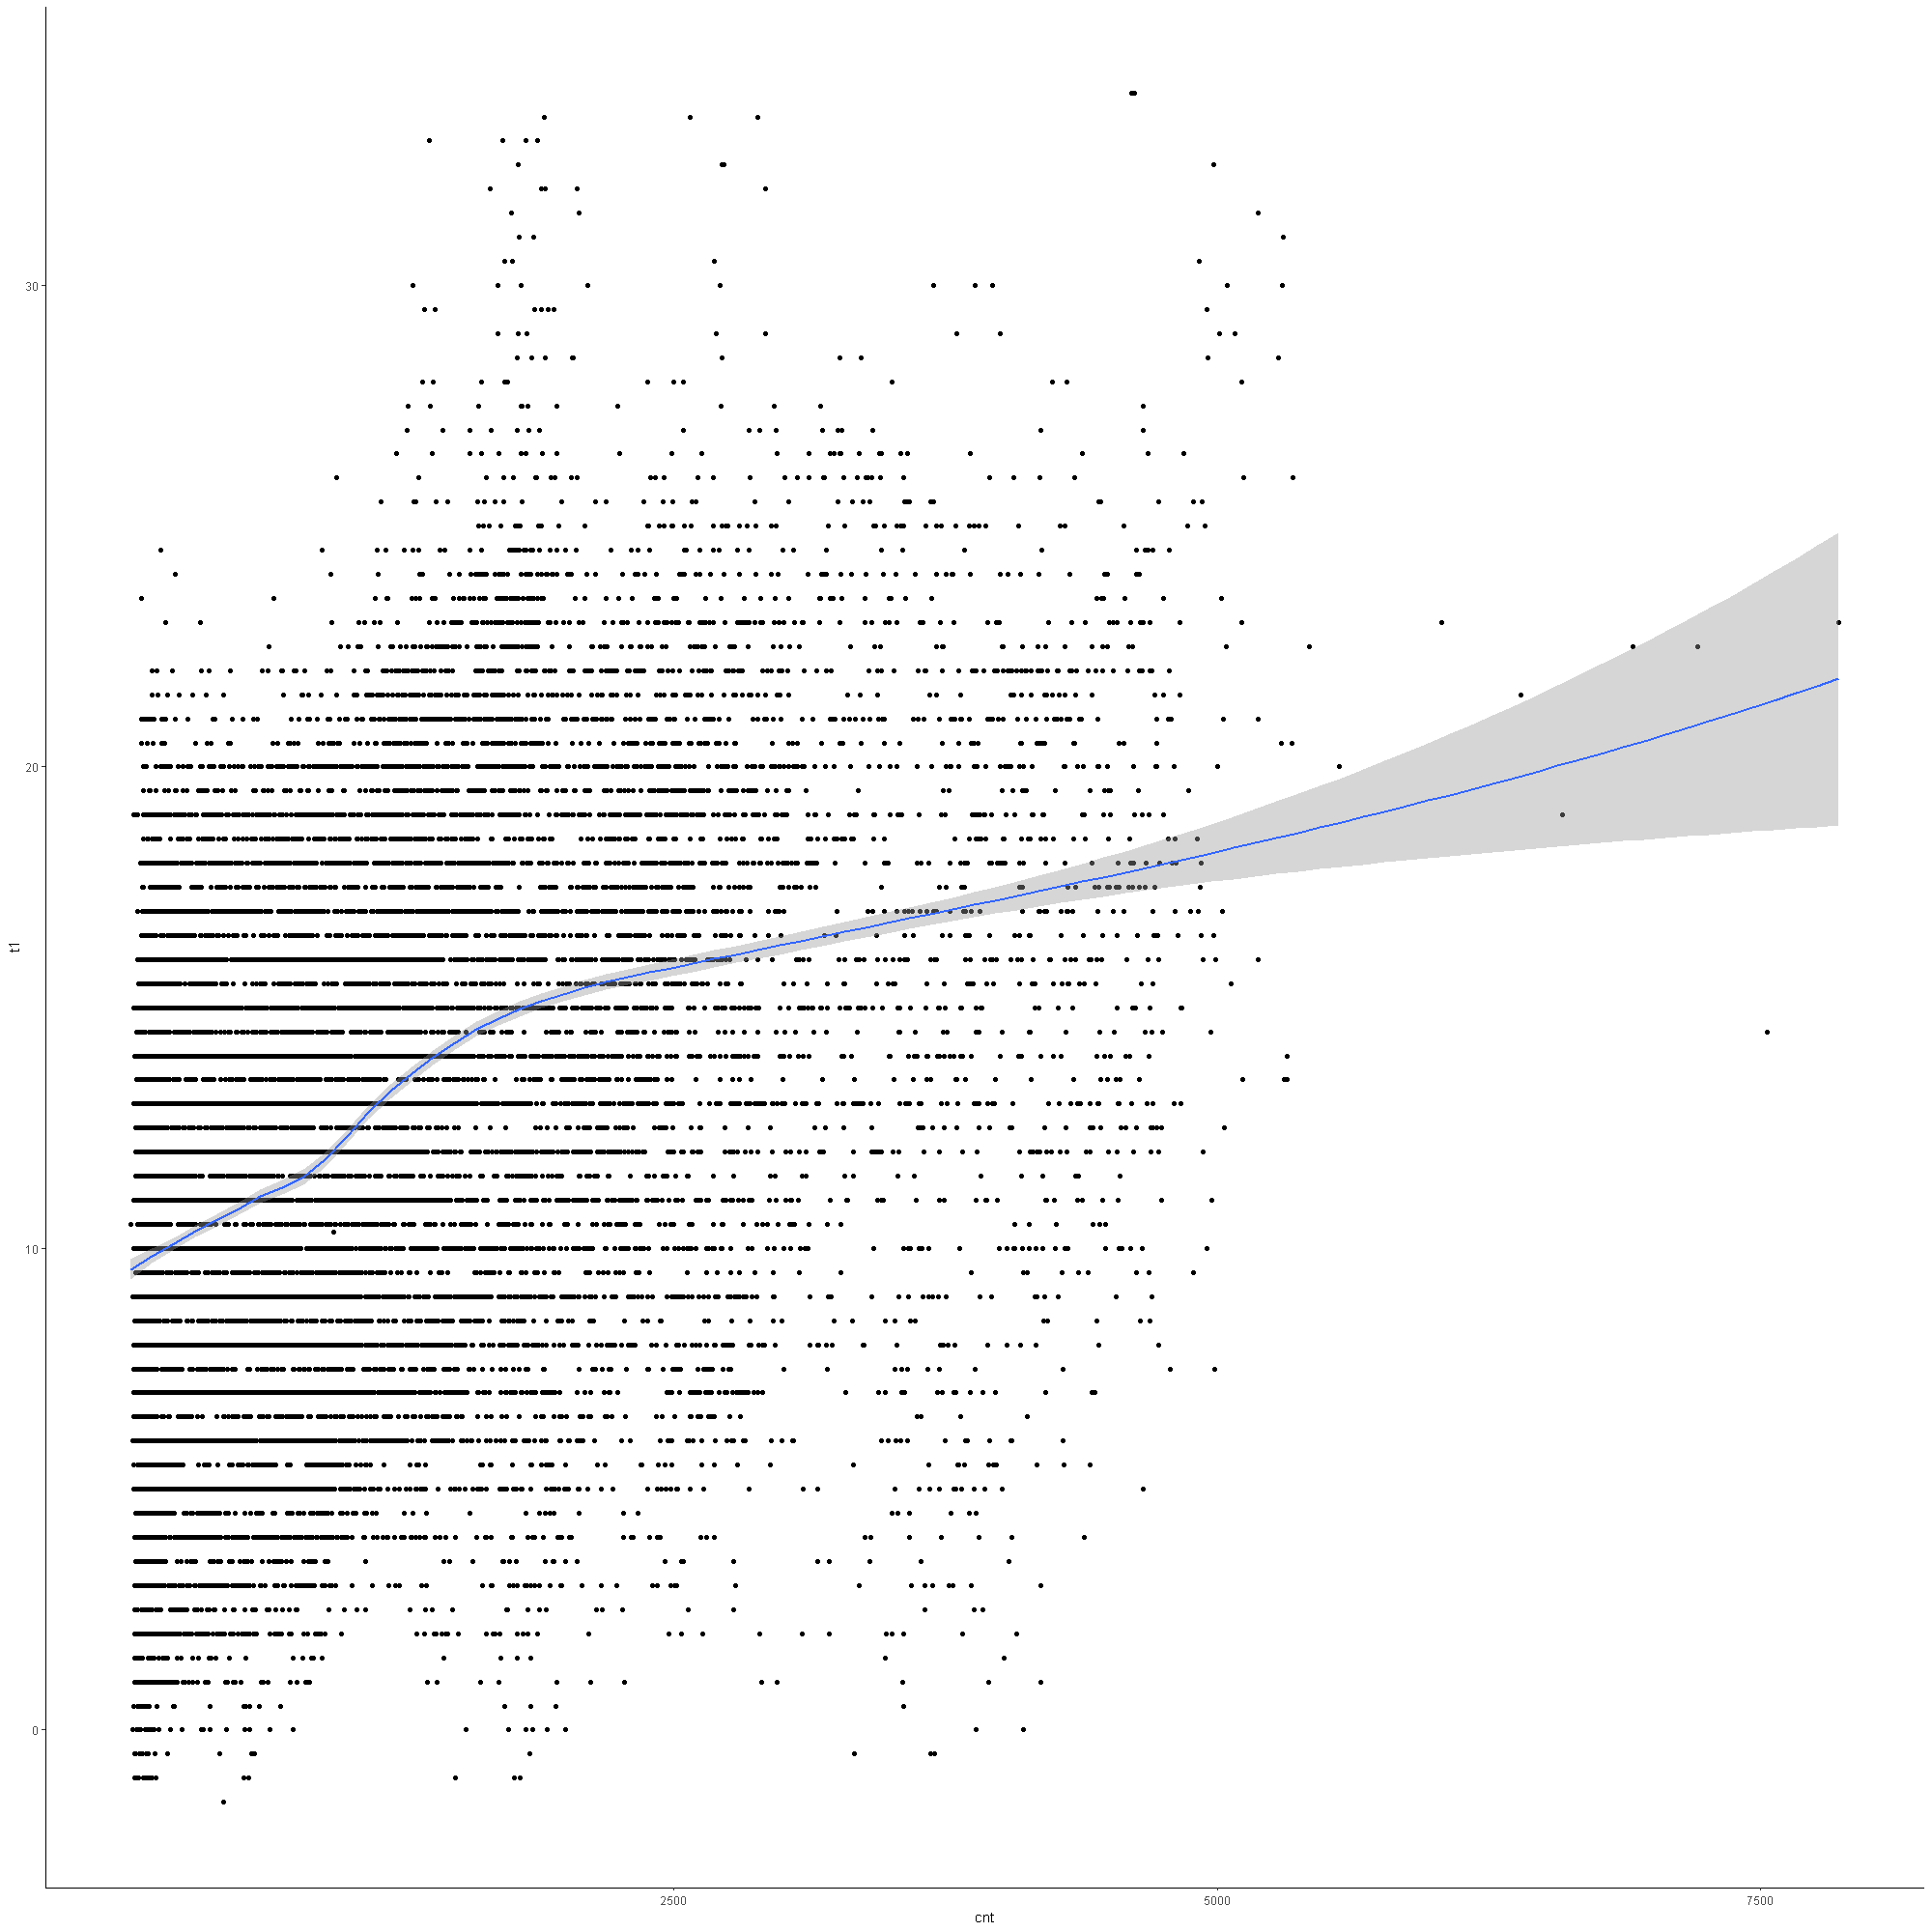

In [59]:
# Line plot with multiple groups
# with lineplot

ggplot(data = bike_data,aes(cnt,t1)) +
  geom_point() +
  geom_smooth(method = "loess") +
  theme_classic()+
scale_x_continuous(limits = c(), breaks = c(2500, 5000, 7500))

### Boxplot Anzahl Ausleihung von Fahrrädern nach Tageszeit

Warning message:
"Removed 1 rows containing missing values (geom_segment)."

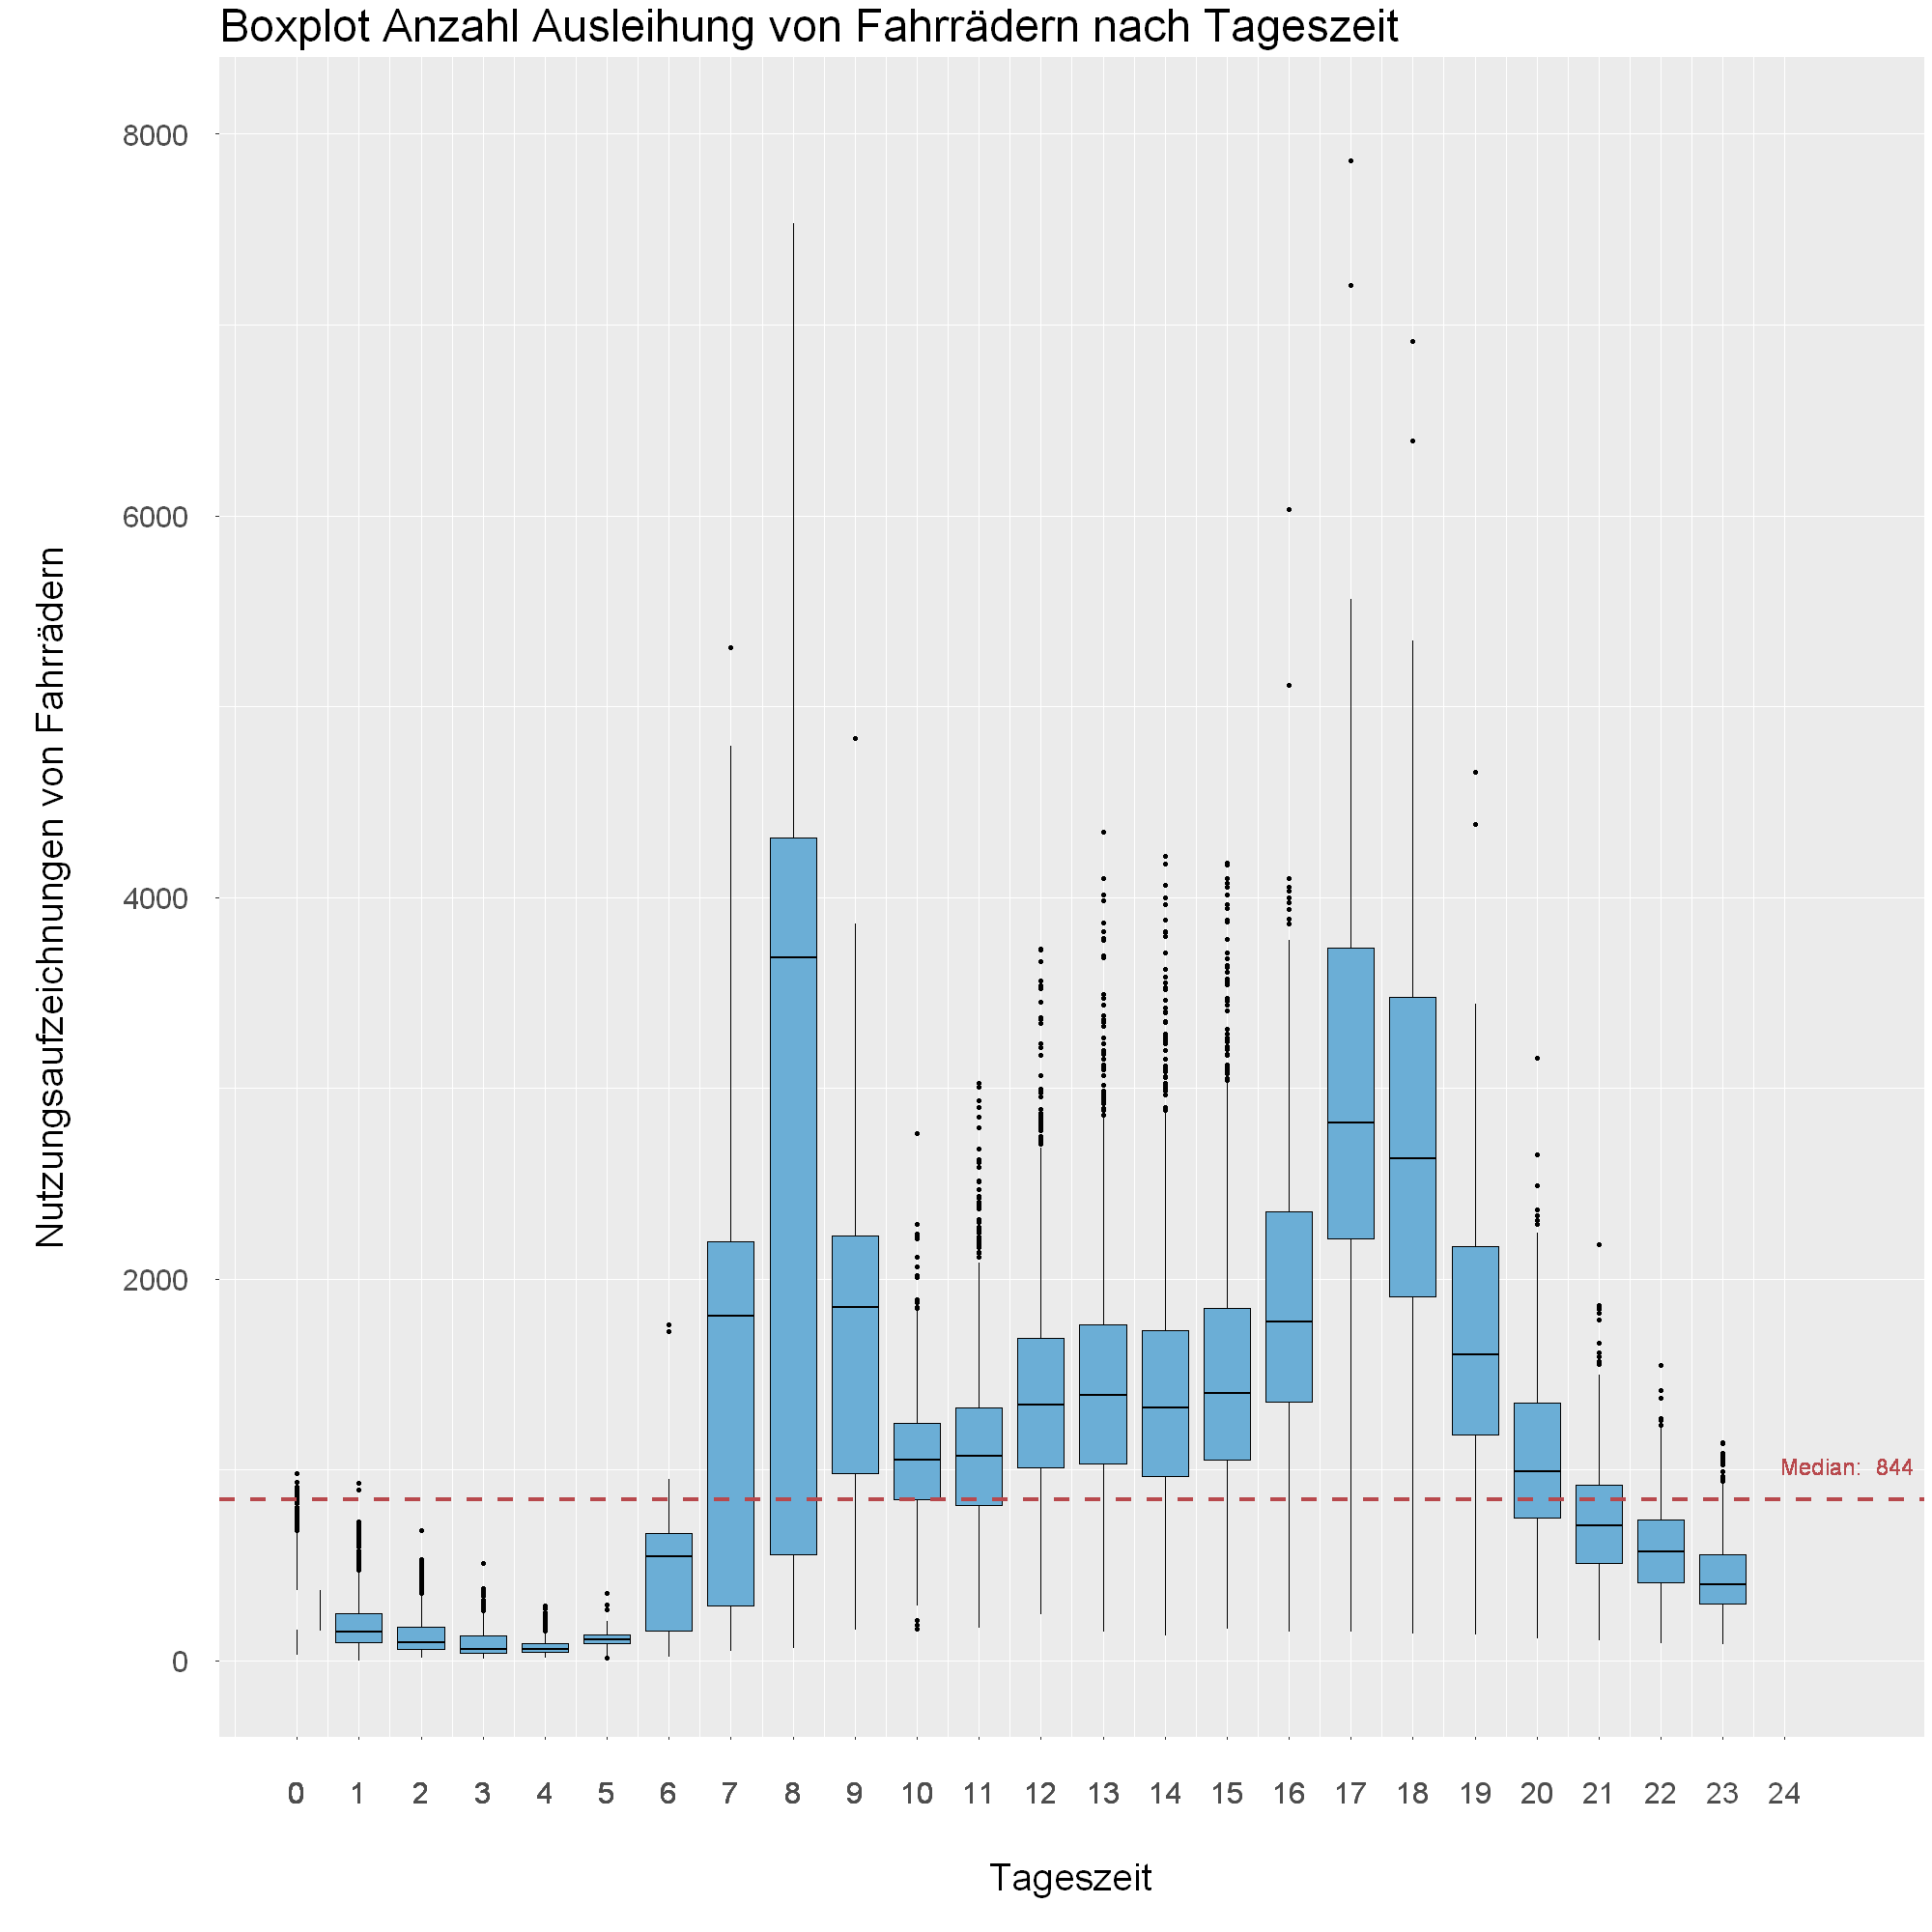

In [60]:
#Median aus Ausleihen berechnen
data <- bike_data$cnt
med <-median(data)
zusammen <- paste("Median: ",med)

#Boxplot mit total Ausleihen nach Tageszeit, gruppiert nach Tageszeit
ggplot(data = bike_data, aes(hr, cnt, group=hr)) +
       geom_boxplot( fill="#6baed6", colour="black")  +
xlab("Tageszeit") +
ylab("Nutzungsaufzeichnungen von Fahrrädern") +
ggtitle("Boxplot Anzahl Ausleihung von Fahrrädern nach Tageszeit ") +
geom_hline(yintercept= median(med), color = "#B8494D", linetype='dashed', size = 1.5 ) +
geom_text(aes(x=25, label=zusammen , y = 20), colour="#B8494D", vjust = -10.5, size=6) +
scale_x_continuous(limits = c(0, 25), breaks = c(00:00, 02:00, 04:00, 06:00, 08:00, 10:00, 12:00, 14:00, 16:00, 18:00, 20:00, 22:00, 24:00)) +
# Anleitung: https://www.statology.org/ggplot-axis-breaks/ +
ylim(0, 8000) +


#Aussehen Editing
theme(text = element_text(size = 28) ,
      axis.title.y = element_text(margin = margin(t = 0, r = 40, b = 0, l = 20)),
      axis.title.x = element_text(margin = margin(t = 40, r = 00, b = 20, l = 0)),
      axis.text.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 0)),
      axis.text.x = element_text(margin = margin(t = 30, r = 0, b = 0, l = 0)),
      )



options(repr.plot.width = 20, repr.plot.height = 20, repr.plot.res = 100)


#Könnte die Zeit auf 24H ändern mit https://stackoverflow.com/questions/42950909/plotting-daytime-without-date-in-ggplot2/42955819?noredirect=1#comment73016883_42955819

Aus diesem Histogramm kann abgelesen werden, zu welchen Tageszeiten durchschnittlich am meisten Fahrräder ausgeliehen werden. Es ist zudem auch sichtbar, wie gross die Streuung zu den verschiedenen Uhrzeiten ist.

### Boxplot Anzahl Ausleihung von Fahrrädern nach Tageszeit am Wochenende

Warning message:
"Removed 1 rows containing missing values (geom_segment)."

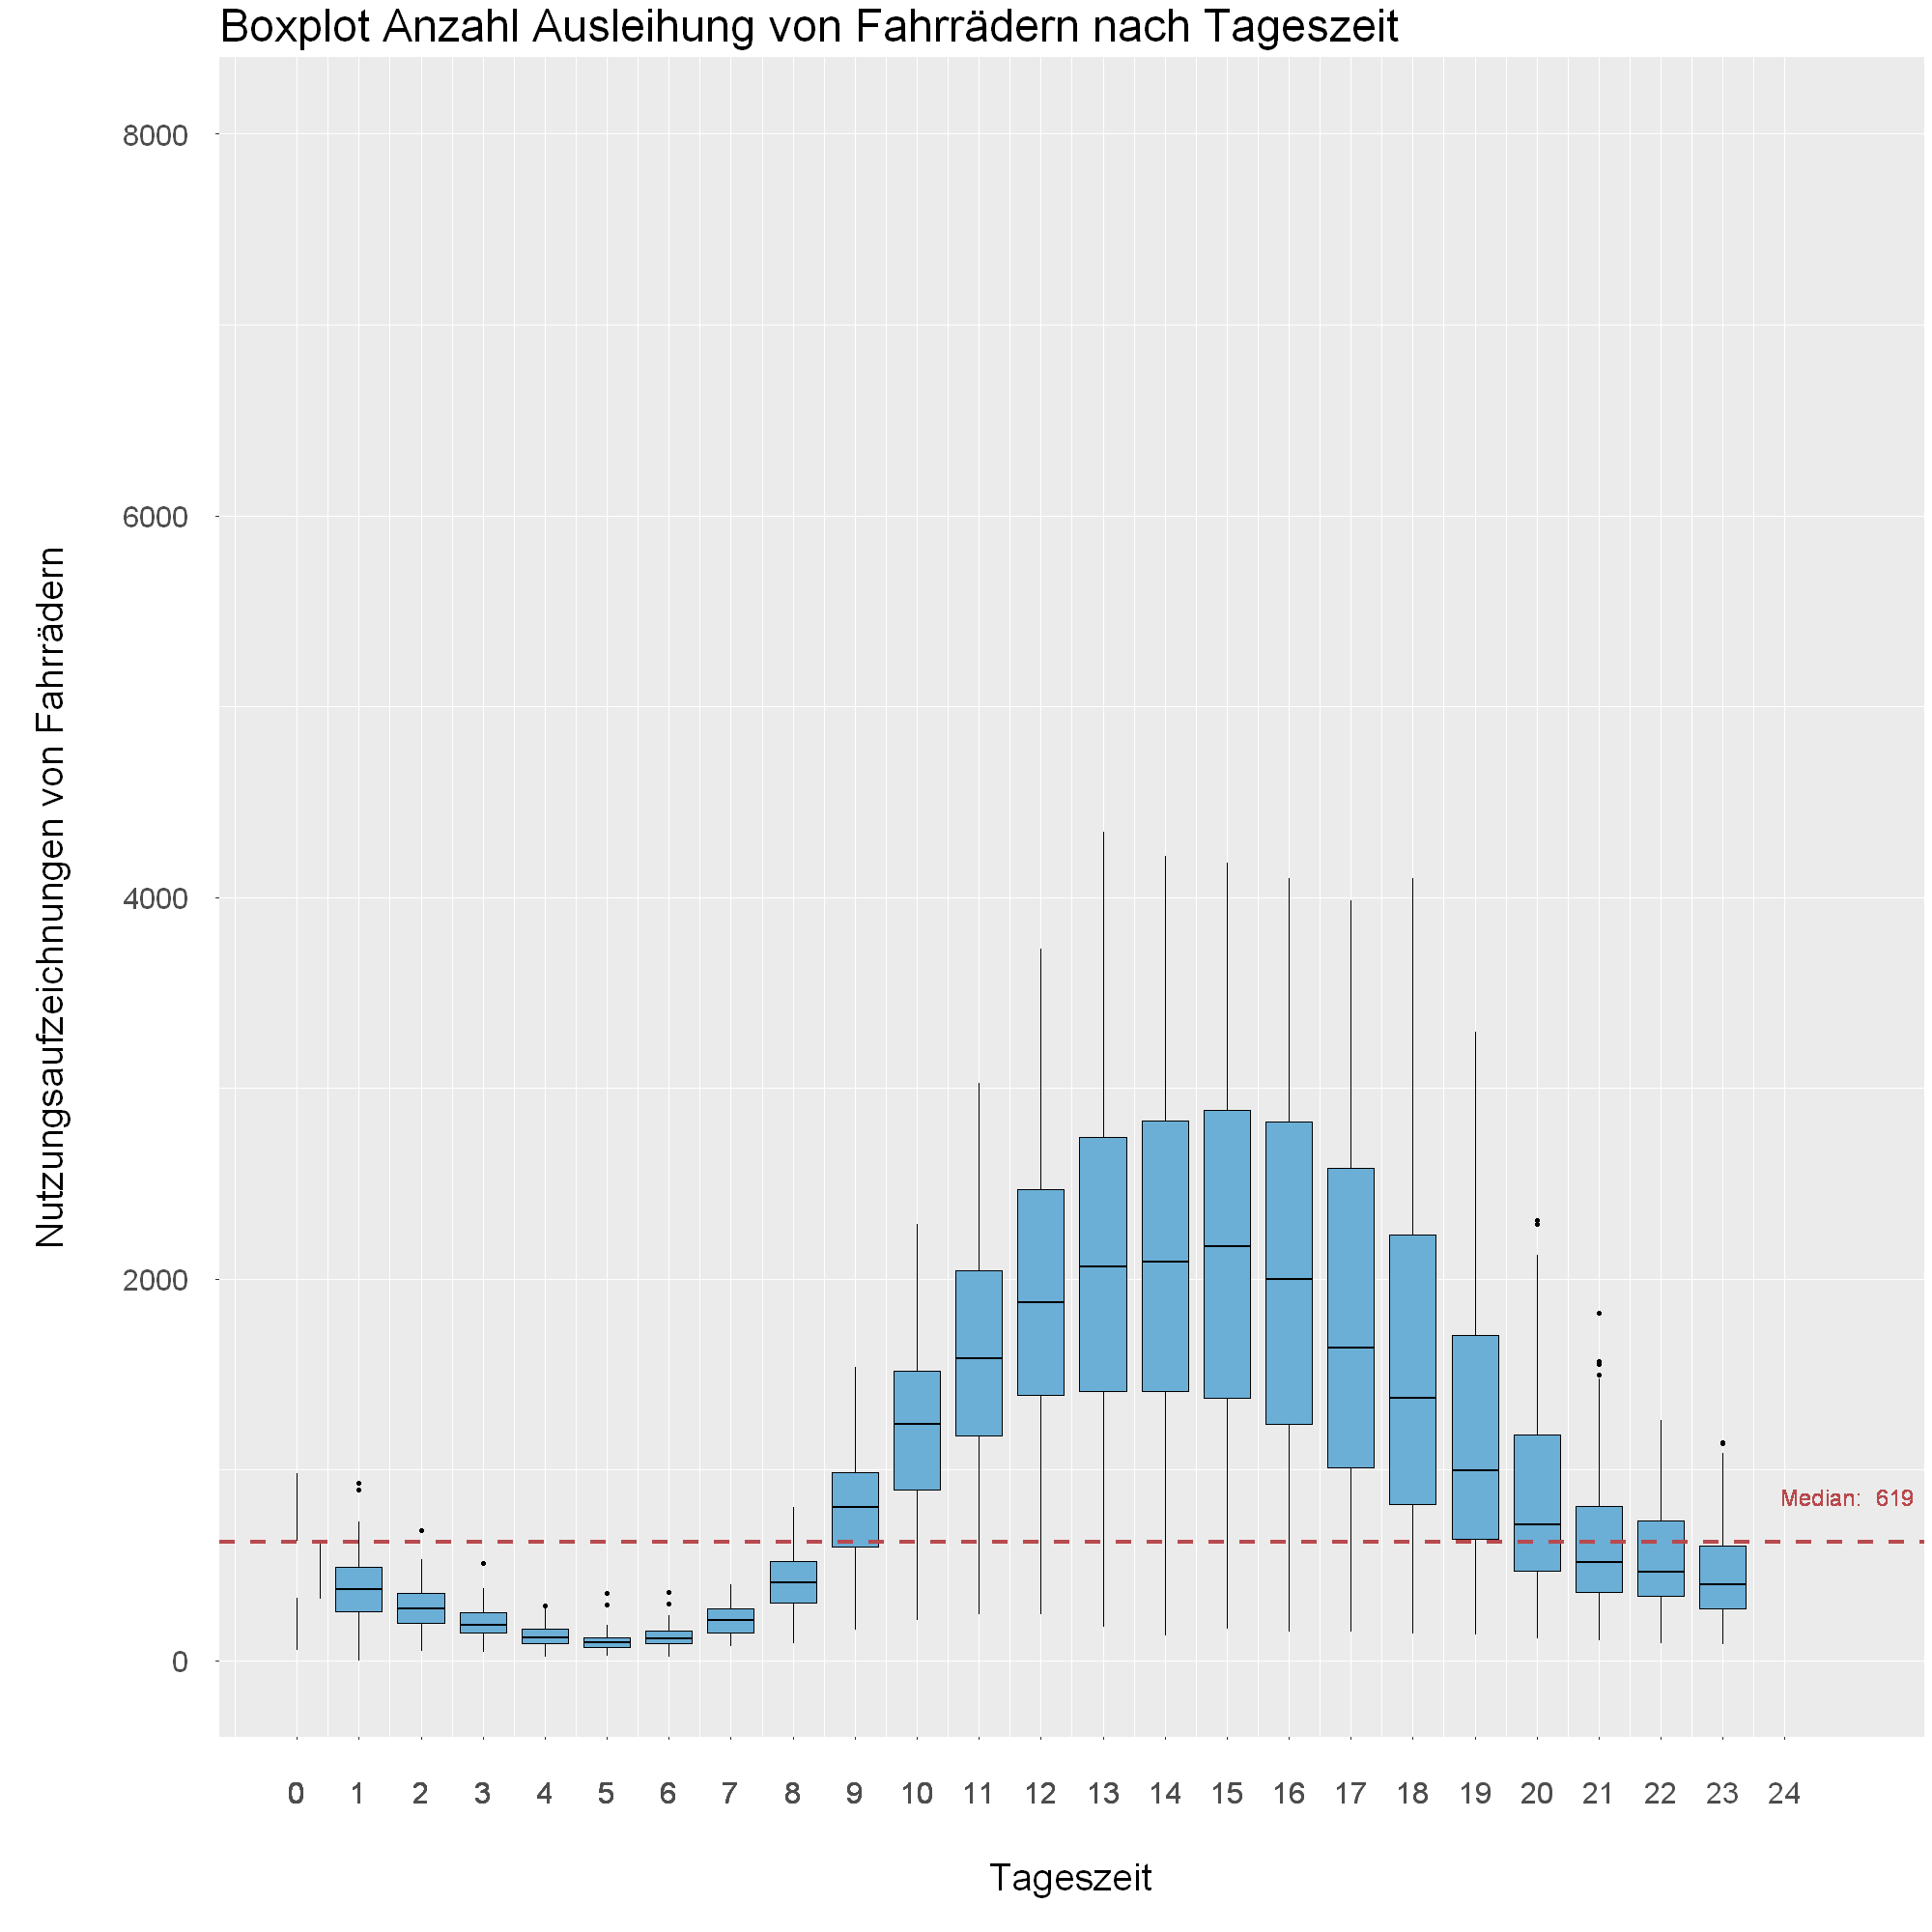

In [61]:
#Filter
filter_bike_data <- bike_data %>% filter(bike_data$is_weekend == 1)

#Median aus Anazhl Ausleihung von Fahrrädern berechnen
data <- filter_bike_data$cnt
med <-median(data)
zusammen <- paste("Median: ",med)

#Boxplot mit total Anzahl Ausleihung von Fahrrädern nach Tageszeit, gruppiert nach Tageszeit
ggplot(data = filter_bike_data, aes(hr, cnt, group=hr)) +
       geom_boxplot( fill="#6baed6", colour="black")  +
xlab("Tageszeit") +
ylab("Nutzungsaufzeichnungen von Fahrrädern") +
ggtitle("Boxplot Anzahl Ausleihung von Fahrrädern nach Tageszeit ") +
geom_hline(yintercept= median(med), color = "#B8494D", linetype='dashed', size = 1.5 ) +
geom_text(aes(x=25, label=zusammen , y = 20), colour="#B8494D", vjust = -08.7, size=6) +
scale_x_continuous(limits = c(0, 25), breaks = c(00:00, 02:00, 04:00, 06:00, 08:00, 10:00, 12:00, 14:00, 16:00, 18:00, 20:00, 22:00, 24:00)) +
# Anleitung: https://www.statology.org/ggplot-axis-breaks/ +
ylim(0, 8000) +


#Aussehen Editing
theme(text = element_text(size = 28) ,
      axis.title.y = element_text(margin = margin(t = 0, r = 40, b = 0, l = 20)),
      axis.title.x = element_text(margin = margin(t = 40, r = 00, b = 20, l = 0)),
      axis.text.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 0)),
      axis.text.x = element_text(margin = margin(t = 30, r = 0, b = 0, l = 0)),
      )



options(repr.plot.width = 20, repr.plot.height = 20, repr.plot.res = 100)

### Boxplot Anzahl Ausleihung von Fahrrädern nach Tageszeit unter der Woche

Warning message:
"Removed 1 rows containing missing values (geom_segment)."

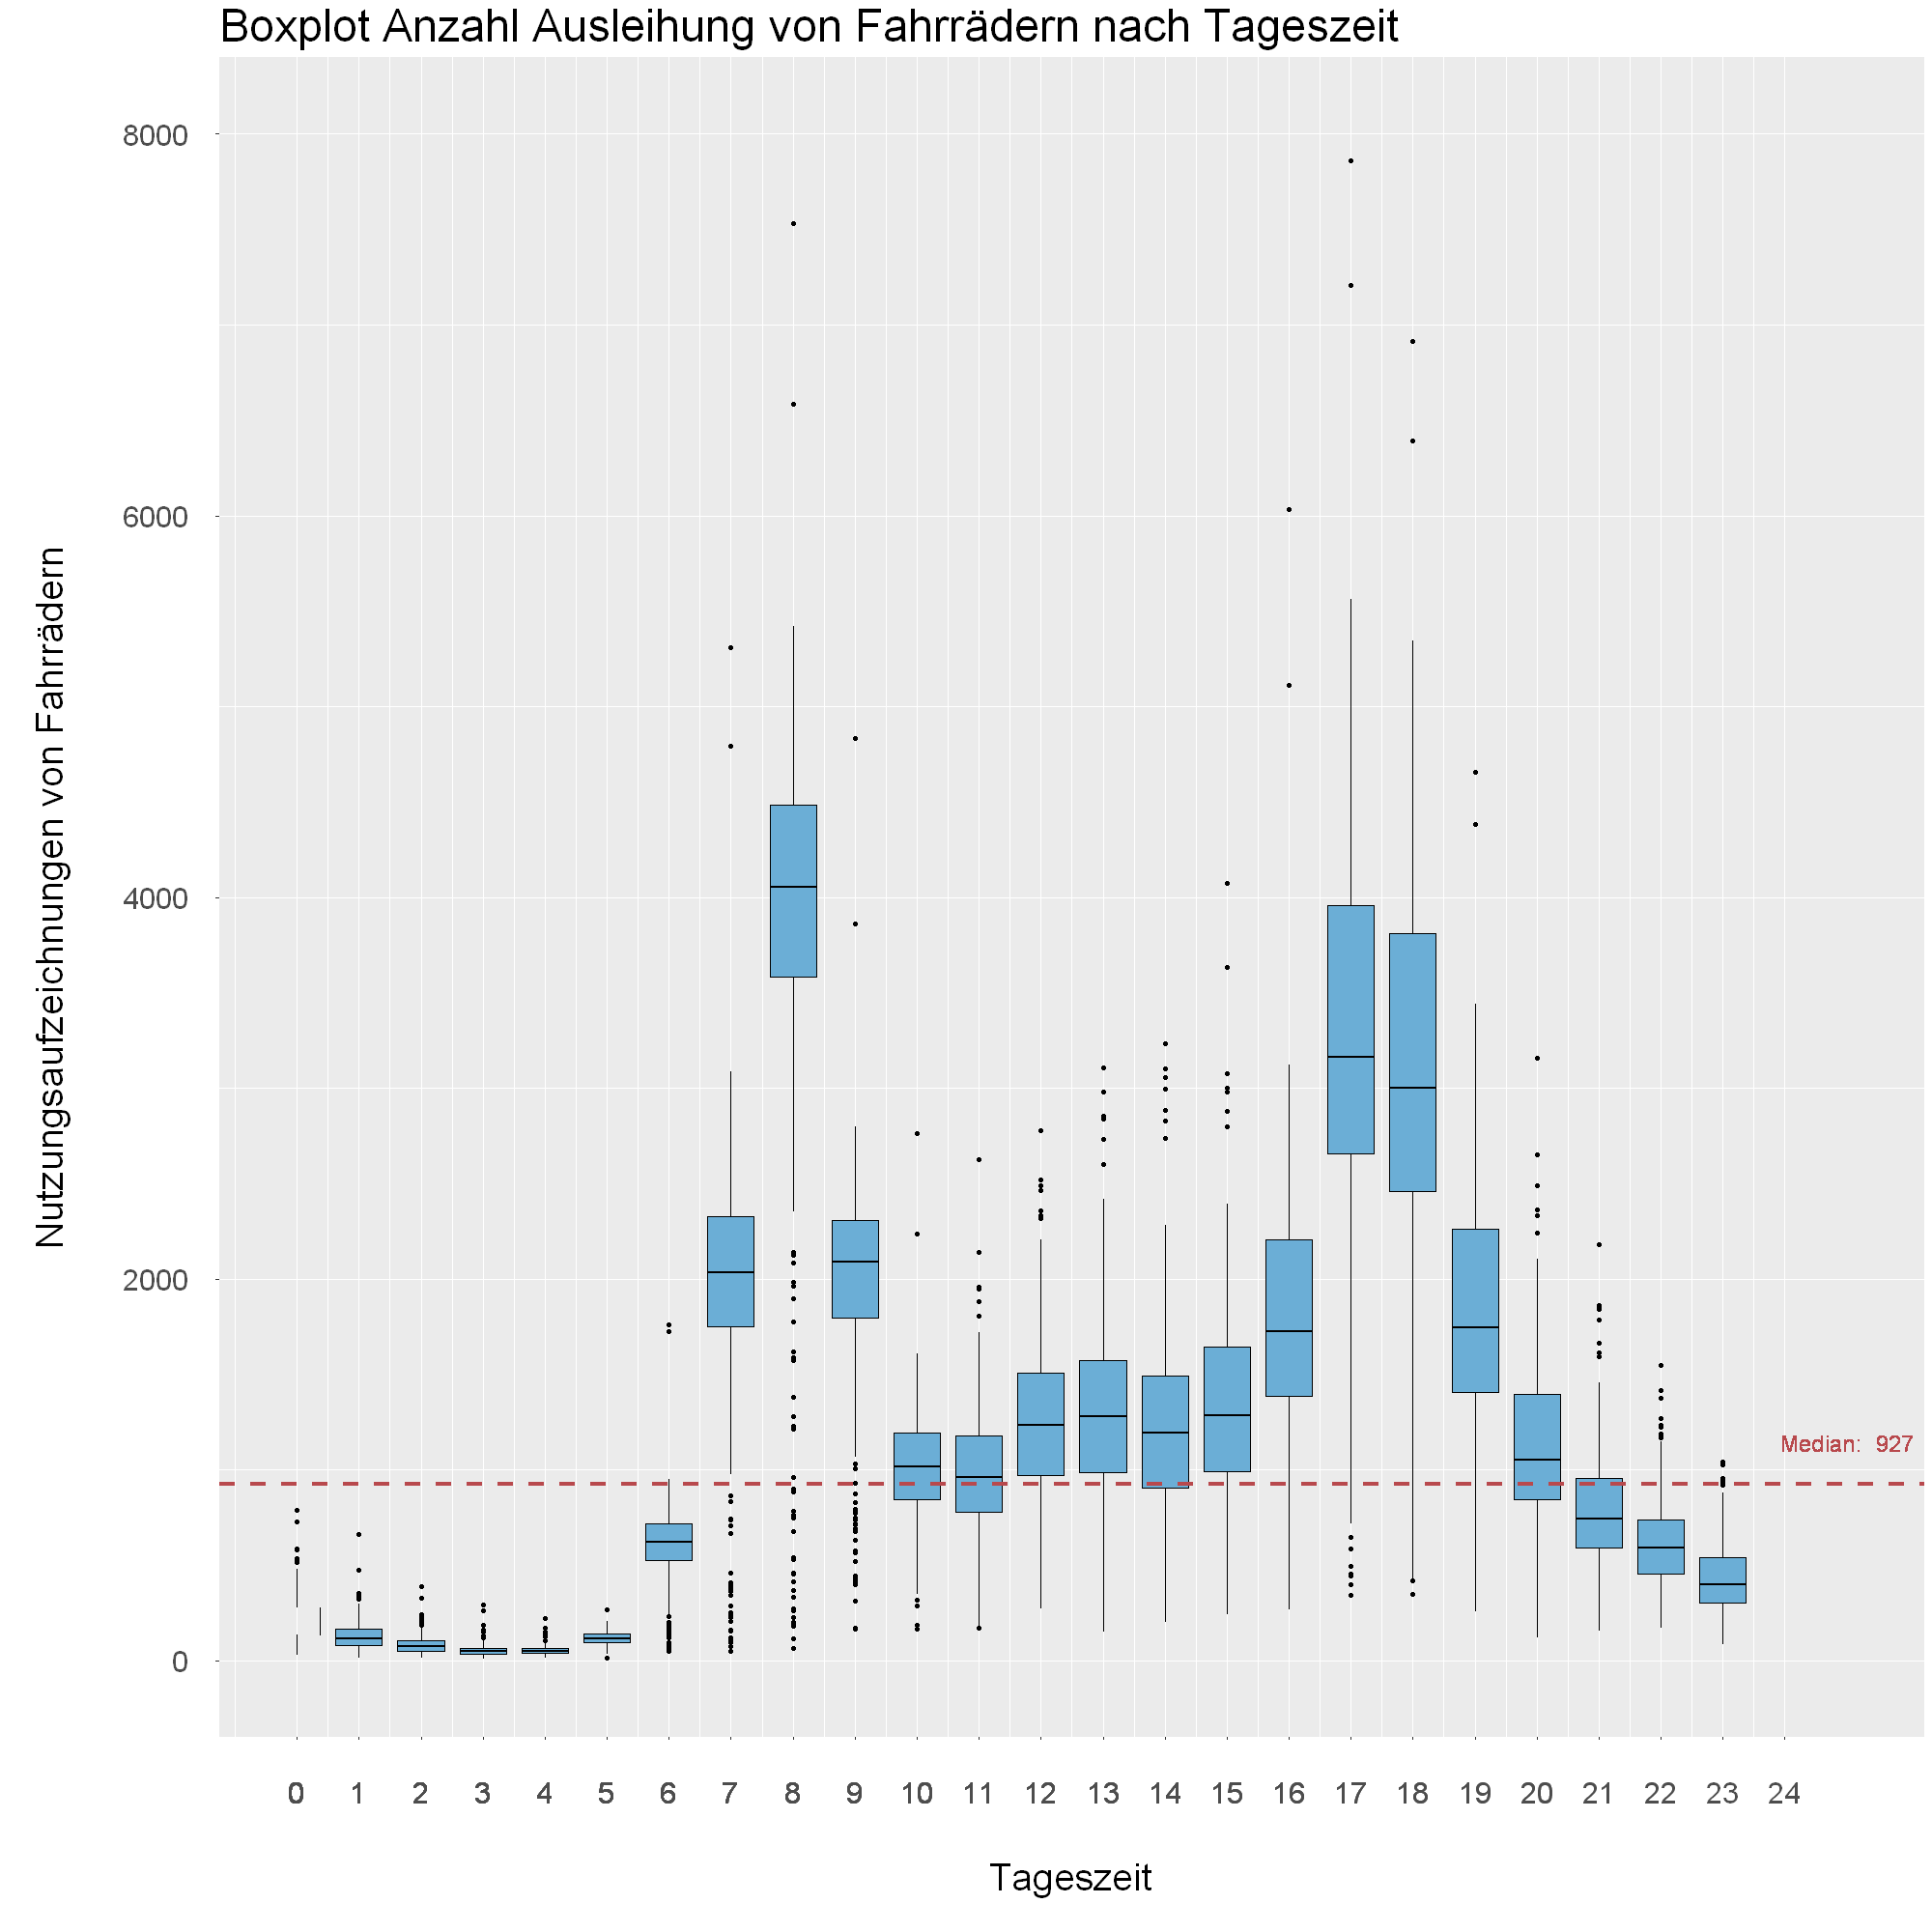

In [62]:
#Filter
filter_bike_data_weekend <- bike_data %>% filter(bike_data$is_weekend == 0)

#Median aus Anzahl Ausleihung von Fahrrädern berechnen
data <- filter_bike_data_weekend$cnt
med <-median(data)
zusammen <- paste("Median: ",med)

#Boxplot mit total AnzahlAusleihung von Fahrrädern nach Tageszeit, gruppiert nach Tageszeit
ggplot(data = filter_bike_data_weekend, aes(hr, cnt, group=hr)) +
       geom_boxplot( fill="#6baed6", colour="black")  +
xlab("Tageszeit") +
ylab("Nutzungsaufzeichnungen von Fahrrädern") +
ggtitle("Boxplot Anzahl Ausleihung von Fahrrädern nach Tageszeit ") +
geom_hline(yintercept= median(med), color = "#B8494D", linetype='dashed', size = 1.5 ) +
geom_text(aes(x=25, label=zusammen , y = 20), colour="#B8494D", vjust = -11.8, size=6) +
scale_x_continuous(limits = c(0, 25), breaks = c(00:00, 02:00, 04:00, 06:00, 08:00, 10:00, 12:00, 14:00, 16:00, 18:00, 20:00, 22:00, 24:00)) +
# Anleitung: https://www.statology.org/ggplot-axis-breaks/ +
ylim(0, 8000) +


#Aussehen Editing
theme(text = element_text(size = 28) ,
      axis.title.y = element_text(margin = margin(t = 0, r = 40, b = 0, l = 20)),
      axis.title.x = element_text(margin = margin(t = 40, r = 00, b = 20, l = 0)),
      axis.text.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 0)),
      axis.text.x = element_text(margin = margin(t = 30, r = 0, b = 0, l = 0)),
      )



options(repr.plot.width = 20, repr.plot.height = 20, repr.plot.res = 100)

### Boxplot Anzahl Ausleihung von Fahrrädern nach Wochentage gefiltert schönes Wetter

Warning message:
"Removed 1 rows containing missing values (geom_segment)."

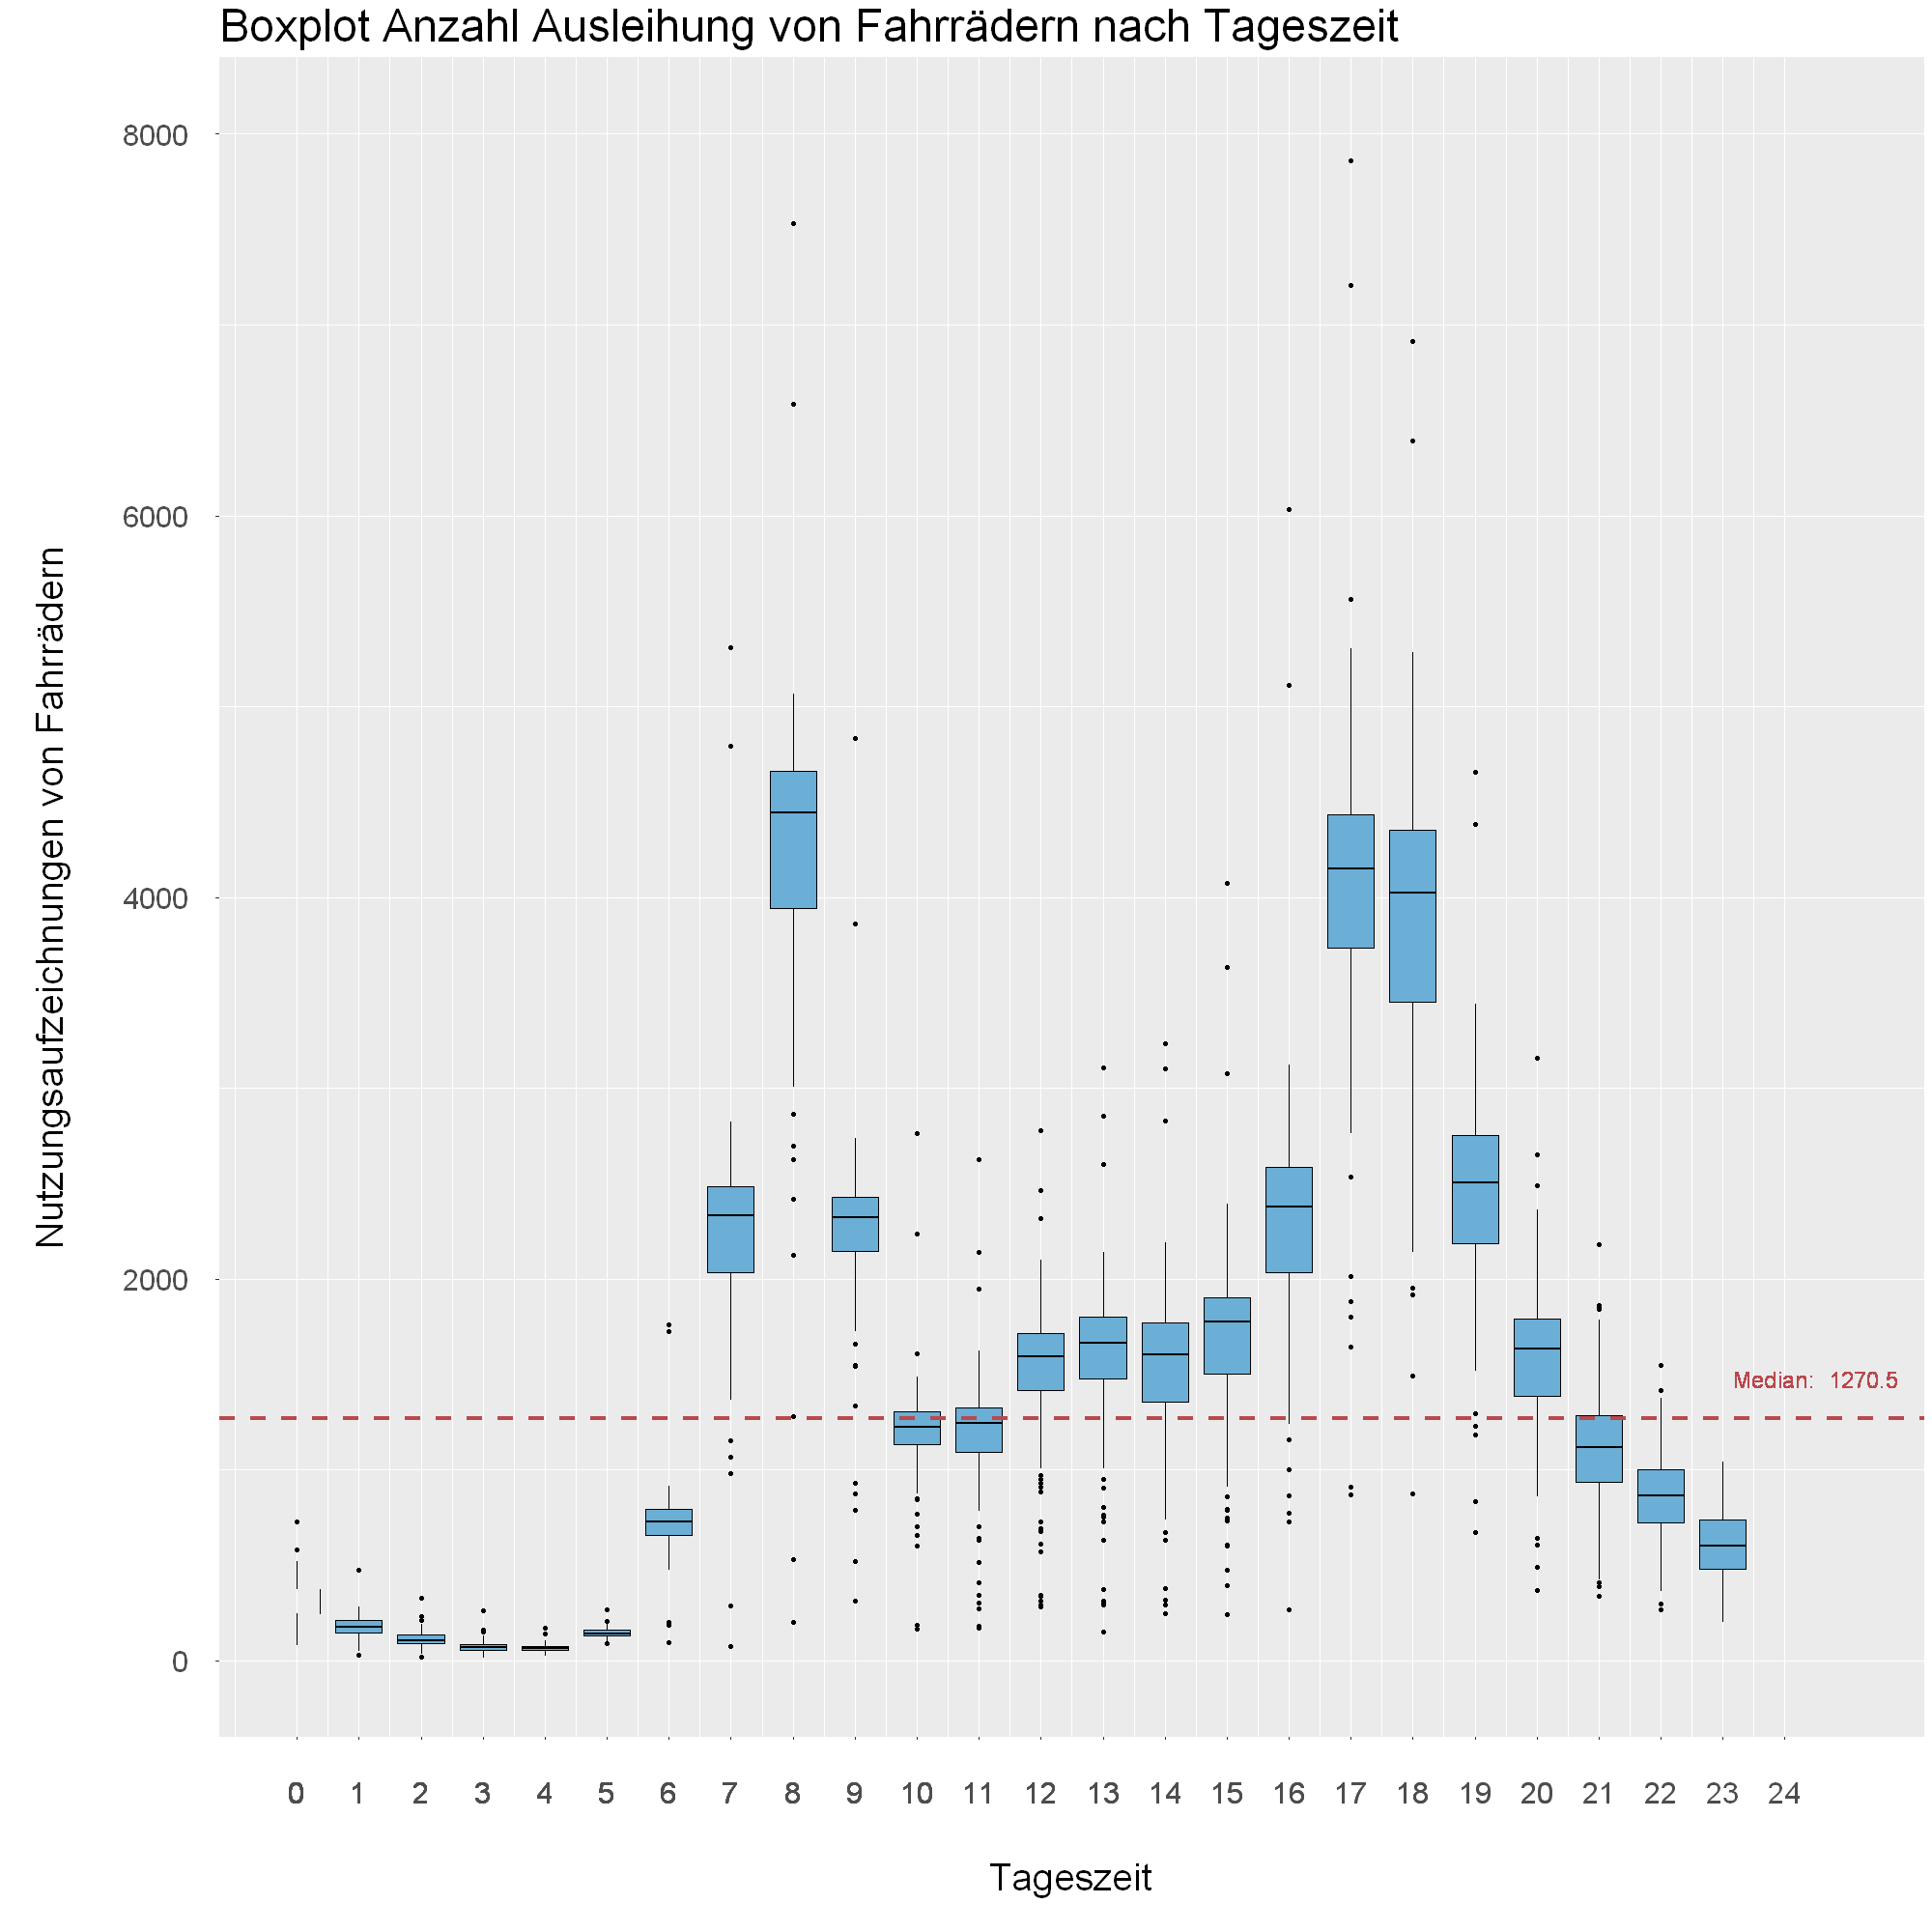

In [63]:
#Filter
filter_bike_data_weekend <- bike_data %>% filter(bike_data$is_weekend == 0)
filter_bike_data_weekend_nice <- filter_bike_data_weekend %>% filter(filter_bike_data_weekend$weather_code == 1)
filter_bike_data_weekend_nice_summer <- filter_bike_data_weekend %>% filter(filter_bike_data_weekend$season == 1)

#Median aus Ausleihung von Fahrrädern berechnen
data <- filter_bike_data_weekend_nice_summer$cnt
med <-median(data)
zusammen <- paste("Median: ",med)

#Boxplot mit total Ausleihung von Fahrrädern nach Tageszeit, gruppiert nach Tageszeit
ggplot(data = filter_bike_data_weekend_nice_summer, aes(hr, cnt, group=hr)) +
       geom_boxplot( fill="#6baed6", colour="black")  +
xlab("Tageszeit") +
ylab("Nutzungsaufzeichnungen von Fahrrädern") +
ggtitle("Boxplot Anzahl Ausleihung von Fahrrädern nach Tageszeit unter der Woche gefiltert nach schönem Wetter ") +
geom_hline(yintercept= median(med), color = "#B8494D", linetype='dashed', size = 1.5 ) +
geom_text(aes(x=24.5, label=zusammen , y = 20), colour="#B8494D", vjust = -15.5, size=6) +
scale_x_continuous(limits = c(0, 25), breaks = c(00:00, 02:00, 04:00, 06:00, 08:00, 10:00, 12:00, 14:00, 16:00, 18:00, 20:00, 22:00, 24:00)) +
# Anleitung: https://www.statology.org/ggplot-axis-breaks/ +
ylim(0, 8000) +


#Aussehen Editing
theme(text = element_text(size = 28) ,
      axis.title.y = element_text(margin = margin(t = 0, r = 40, b = 0, l = 20)),
      axis.title.x = element_text(margin = margin(t = 40, r = 00, b = 20, l = 0)),
      axis.text.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 0)),
      axis.text.x = element_text(margin = margin(t = 30, r = 0, b = 0, l = 0)),
      )



options(repr.plot.width = 20, repr.plot.height = 20, repr.plot.res = 100)

### Boxplot Anzahl Ausleihung von Fahrrädern nach Tageszeit an Ferientagen

Warning message:
"Removed 1 rows containing missing values (geom_segment)."

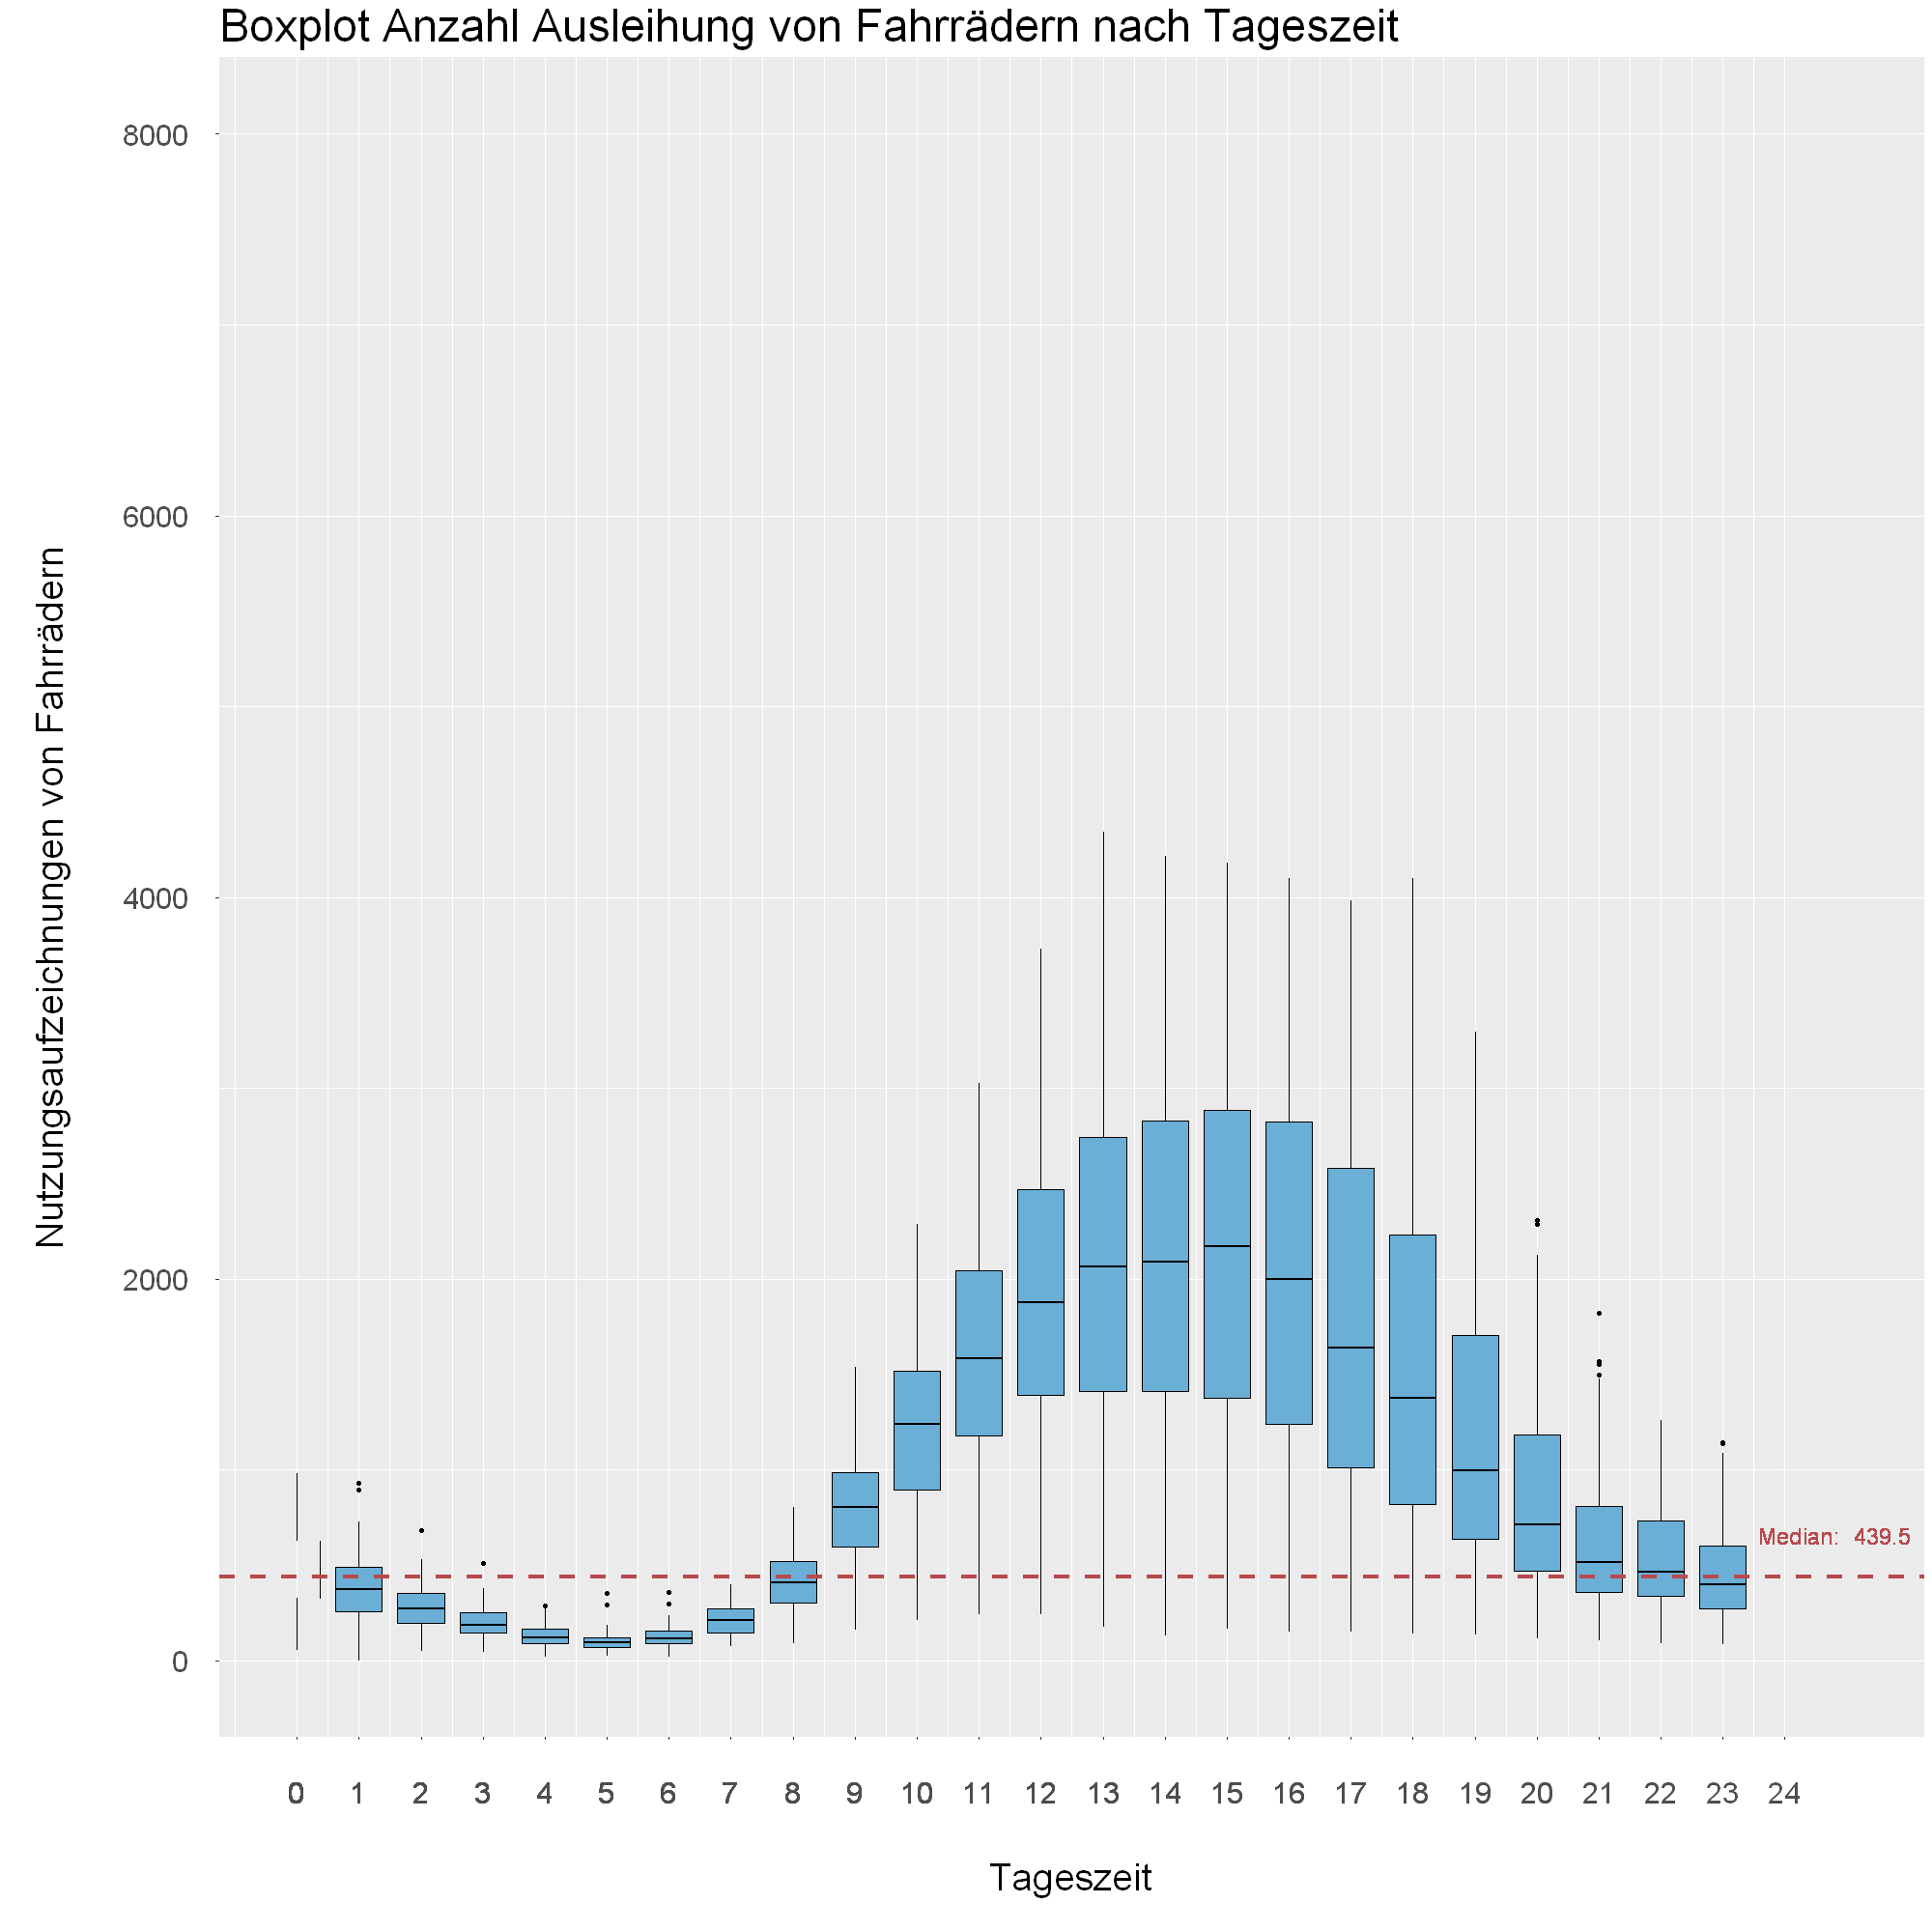

In [64]:
#Filter
filter_bike_data_holiday <- bike_data %>% filter(bike_data$is_holiday == 1)

#Median aus Anzahl Ausleihung von Fahrrädern berechnen
data <- filter_bike_data_holiday$cnt
med <-median(data)
zusammen <- paste("Median: ",med)



#Boxplot mit total Anzahl Ausleihung von Fahrrädern nach Tageszeit, gruppiert nach Tageszeit
ggplot(data = filter_bike_data, aes(hr, cnt, group=hr)) +
      geom_boxplot( fill="#6baed6", colour="black")  +
xlab("Tageszeit") +
ylab("Nutzungsaufzeichnungen von Fahrrädern") +
ggtitle("Boxplot Anzahl Ausleihung von Fahrrädern nach Tageszeit ") +
geom_hline(yintercept= median(med), color = "#B8494D", linetype='dashed', size = 1.5 ) +
geom_text(aes(x=24.8, label=zusammen , y = 20), colour="#B8494D", vjust = -6.5, size=6) +
scale_x_continuous(limits = c(0, 25), breaks = c(00:00, 02:00, 04:00, 06:00, 08:00, 10:00, 12:00, 14:00, 16:00, 18:00, 20:00, 22:00, 24:00)) +
# Anleitung: https://www.statology.org/ggplot-axis-breaks/ +
ylim(0, 8000) +


#Aussehen Editing
theme(text = element_text(size = 28) ,
      axis.title.y = element_text(margin = margin(t = 0, r = 40, b = 0, l = 20)),
      axis.title.x = element_text(margin = margin(t = 40, r = 00, b = 20, l = 0)),
      axis.text.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 0)),
      axis.text.x = element_text(margin = margin(t = 30, r = 0, b = 0, l = 0)),
      )



options(repr.plot.width = 20, repr.plot.height = 20, repr.plot.res = 100)

### Boxplot Anzahl Ausleihung von Fahrrädern nach Tageszeit an keinen Ferientagen

Warning message:
"Removed 1 rows containing missing values (geom_segment)."

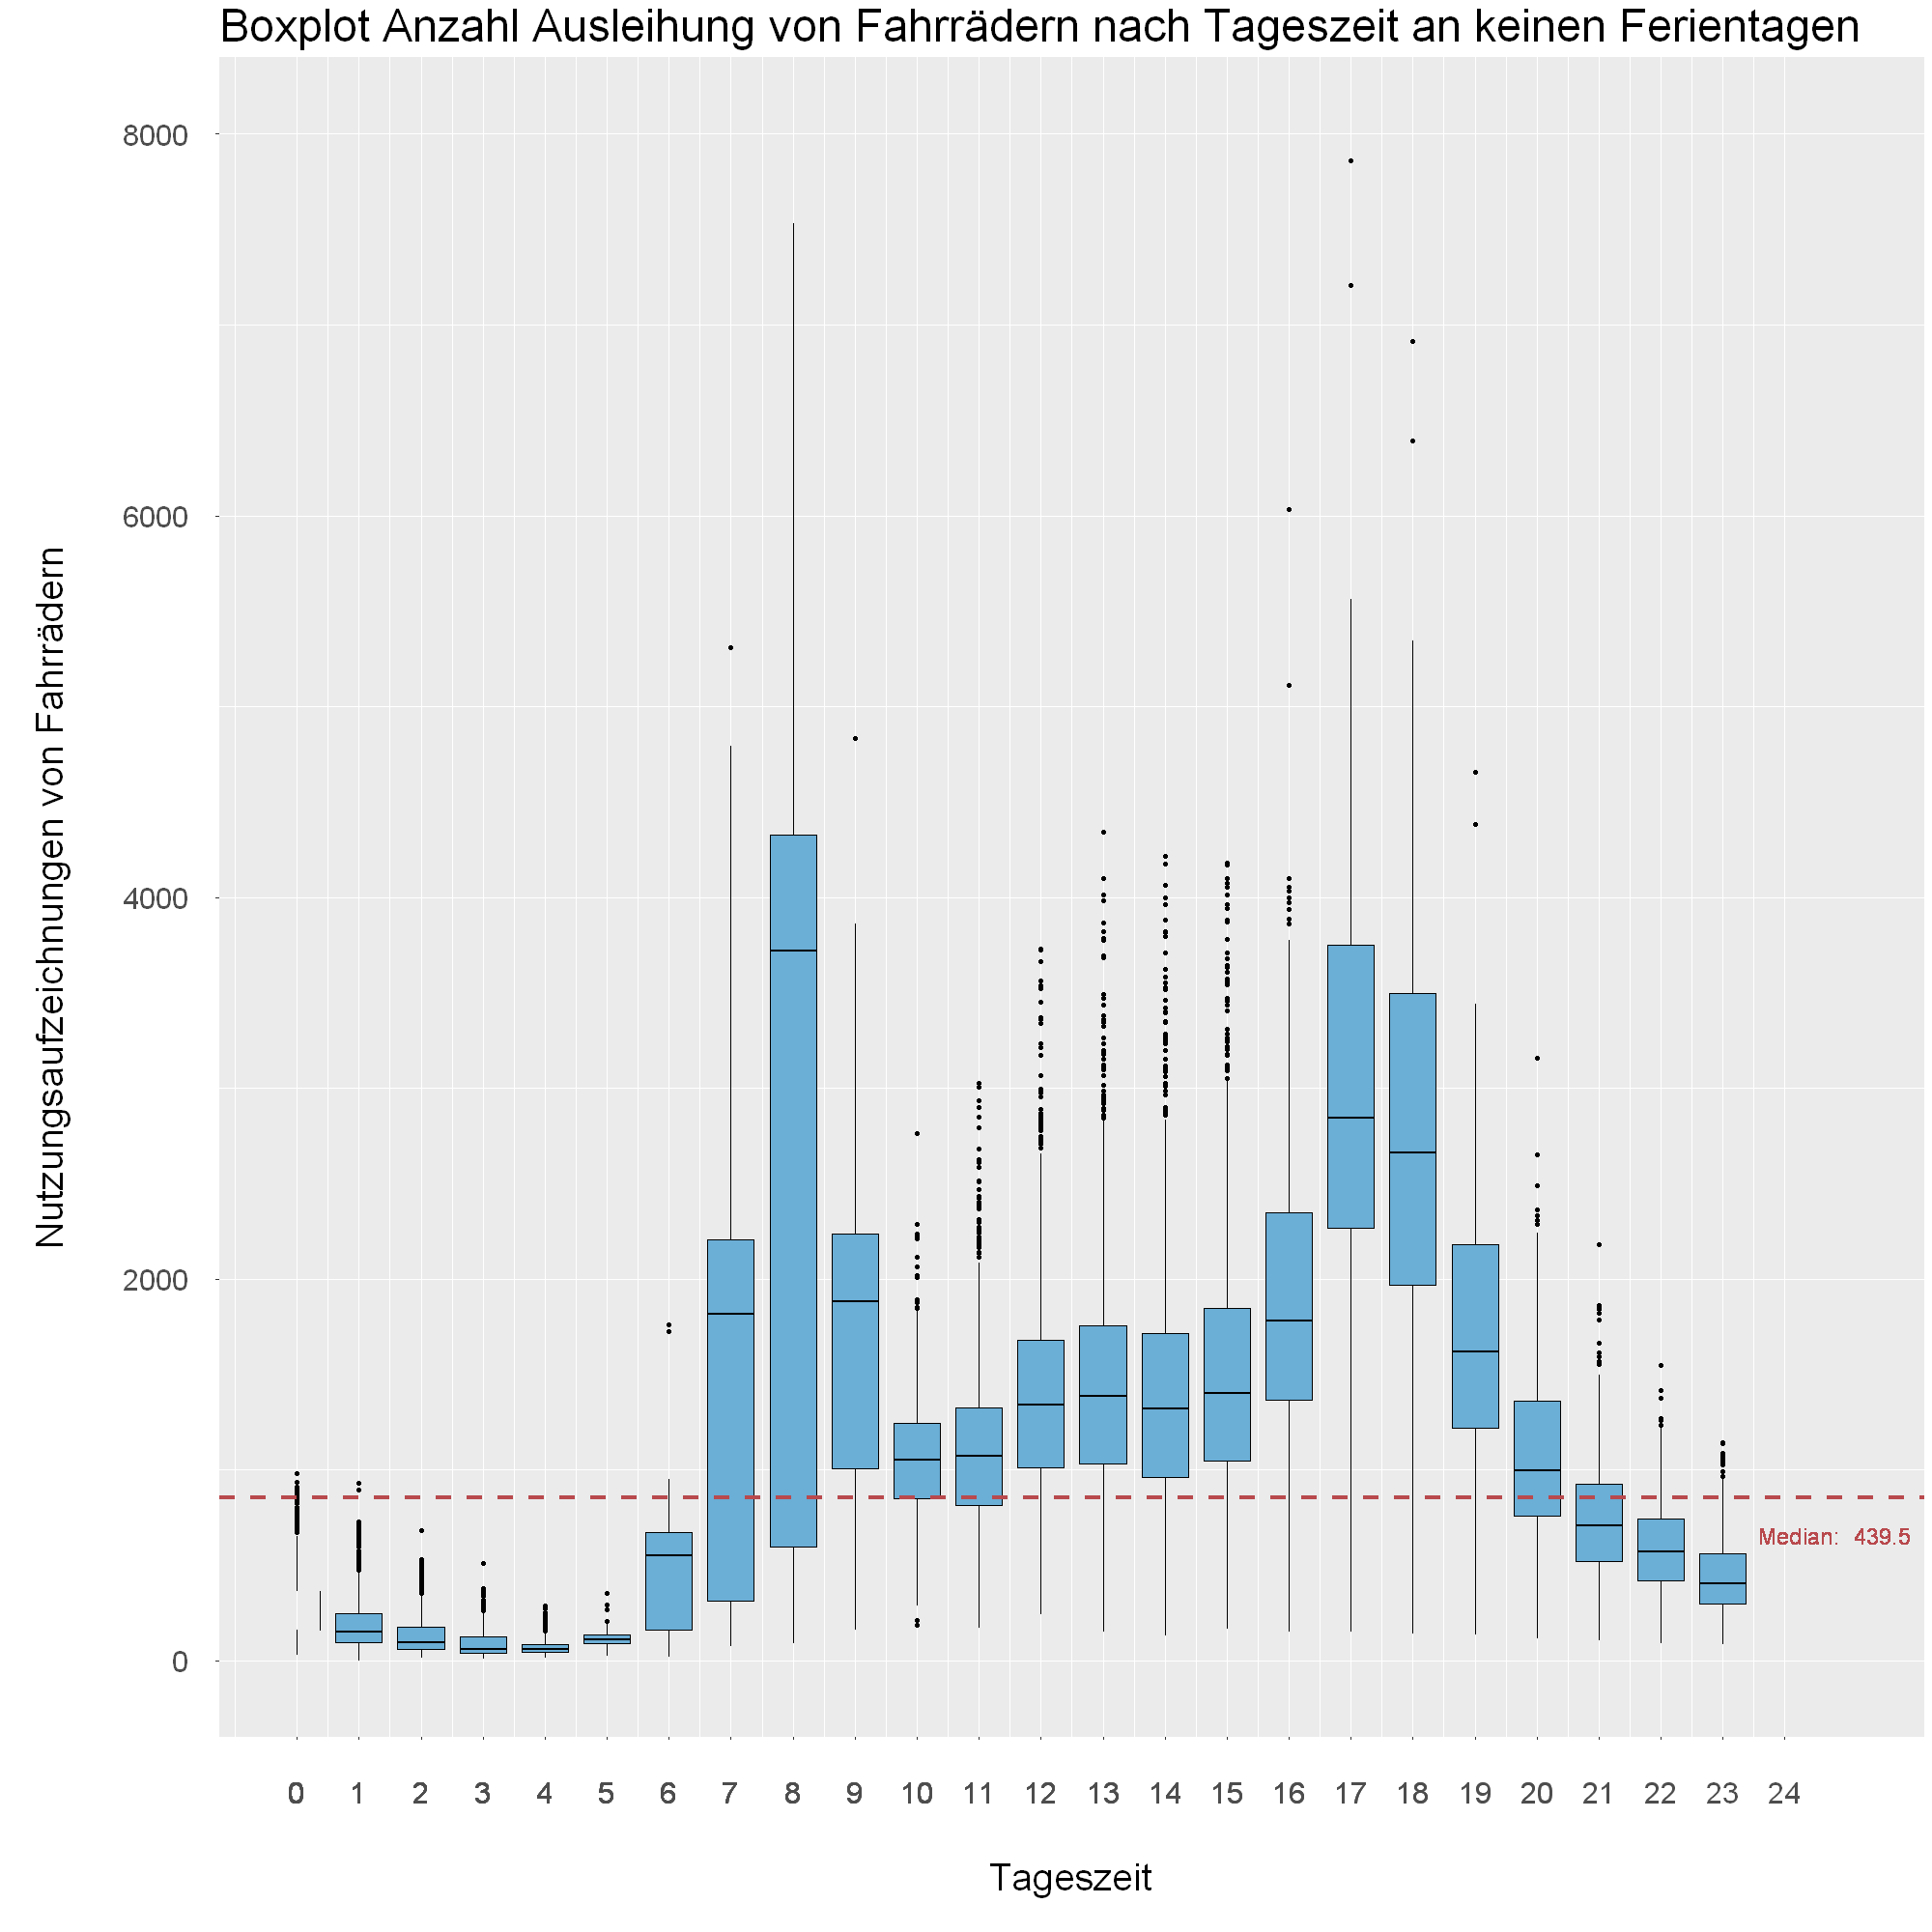

In [65]:
#Filter
filter_bike_data <- bike_data %>% filter(bike_data$is_holiday == 0)

#Median aus Anzahl Ausleihung von Fahrrädern berechnen
med <- filter_bike_data$cnt

#Boxplot mit total Anzahl Ausleihung von Fahrrädern nach Tageszeit, gruppiert nach Tageszeit
ggplot(data = filter_bike_data, aes(hr, cnt, group=hr)) +
      geom_boxplot( fill="#6baed6", colour="black")  +
xlab("Tageszeit") +
ylab("Nutzungsaufzeichnungen von Fahrrädern") +
ggtitle("Boxplot Anzahl Ausleihung von Fahrrädern nach Tageszeit an keinen Ferientagen") +
geom_hline(yintercept= median(med), color = "#B8494D", linetype='dashed', size = 1.5 ) +
geom_text(aes(x=24.8, label=zusammen , y = 20), colour="#B8494D", vjust = -6.5, size=6) +
scale_x_continuous(limits = c(0, 25), breaks = c(00:00, 02:00, 04:00, 06:00, 08:00, 10:00, 12:00, 14:00, 16:00, 18:00, 20:00, 22:00, 24:00)) +
# Anleitung: https://www.statology.org/ggplot-axis-breaks/ +
ylim(0, 8000) +


#Aussehen Editing
theme(text = element_text(size = 28) ,
      axis.title.y = element_text(margin = margin(t = 0, r = 40, b = 0, l = 20)),
      axis.title.x = element_text(margin = margin(t = 40, r = 00, b = 20, l = 0)),
      axis.text.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 0)),
      axis.text.x = element_text(margin = margin(t = 30, r = 0, b = 0, l = 0)),
      )



options(repr.plot.width = 20, repr.plot.height = 20, repr.plot.res = 100)

### Boxplot Anzahl Ausleihen nach Tageszeit an keinen Ferientagen

Warning message:
"Removed 1 rows containing missing values (geom_segment)."

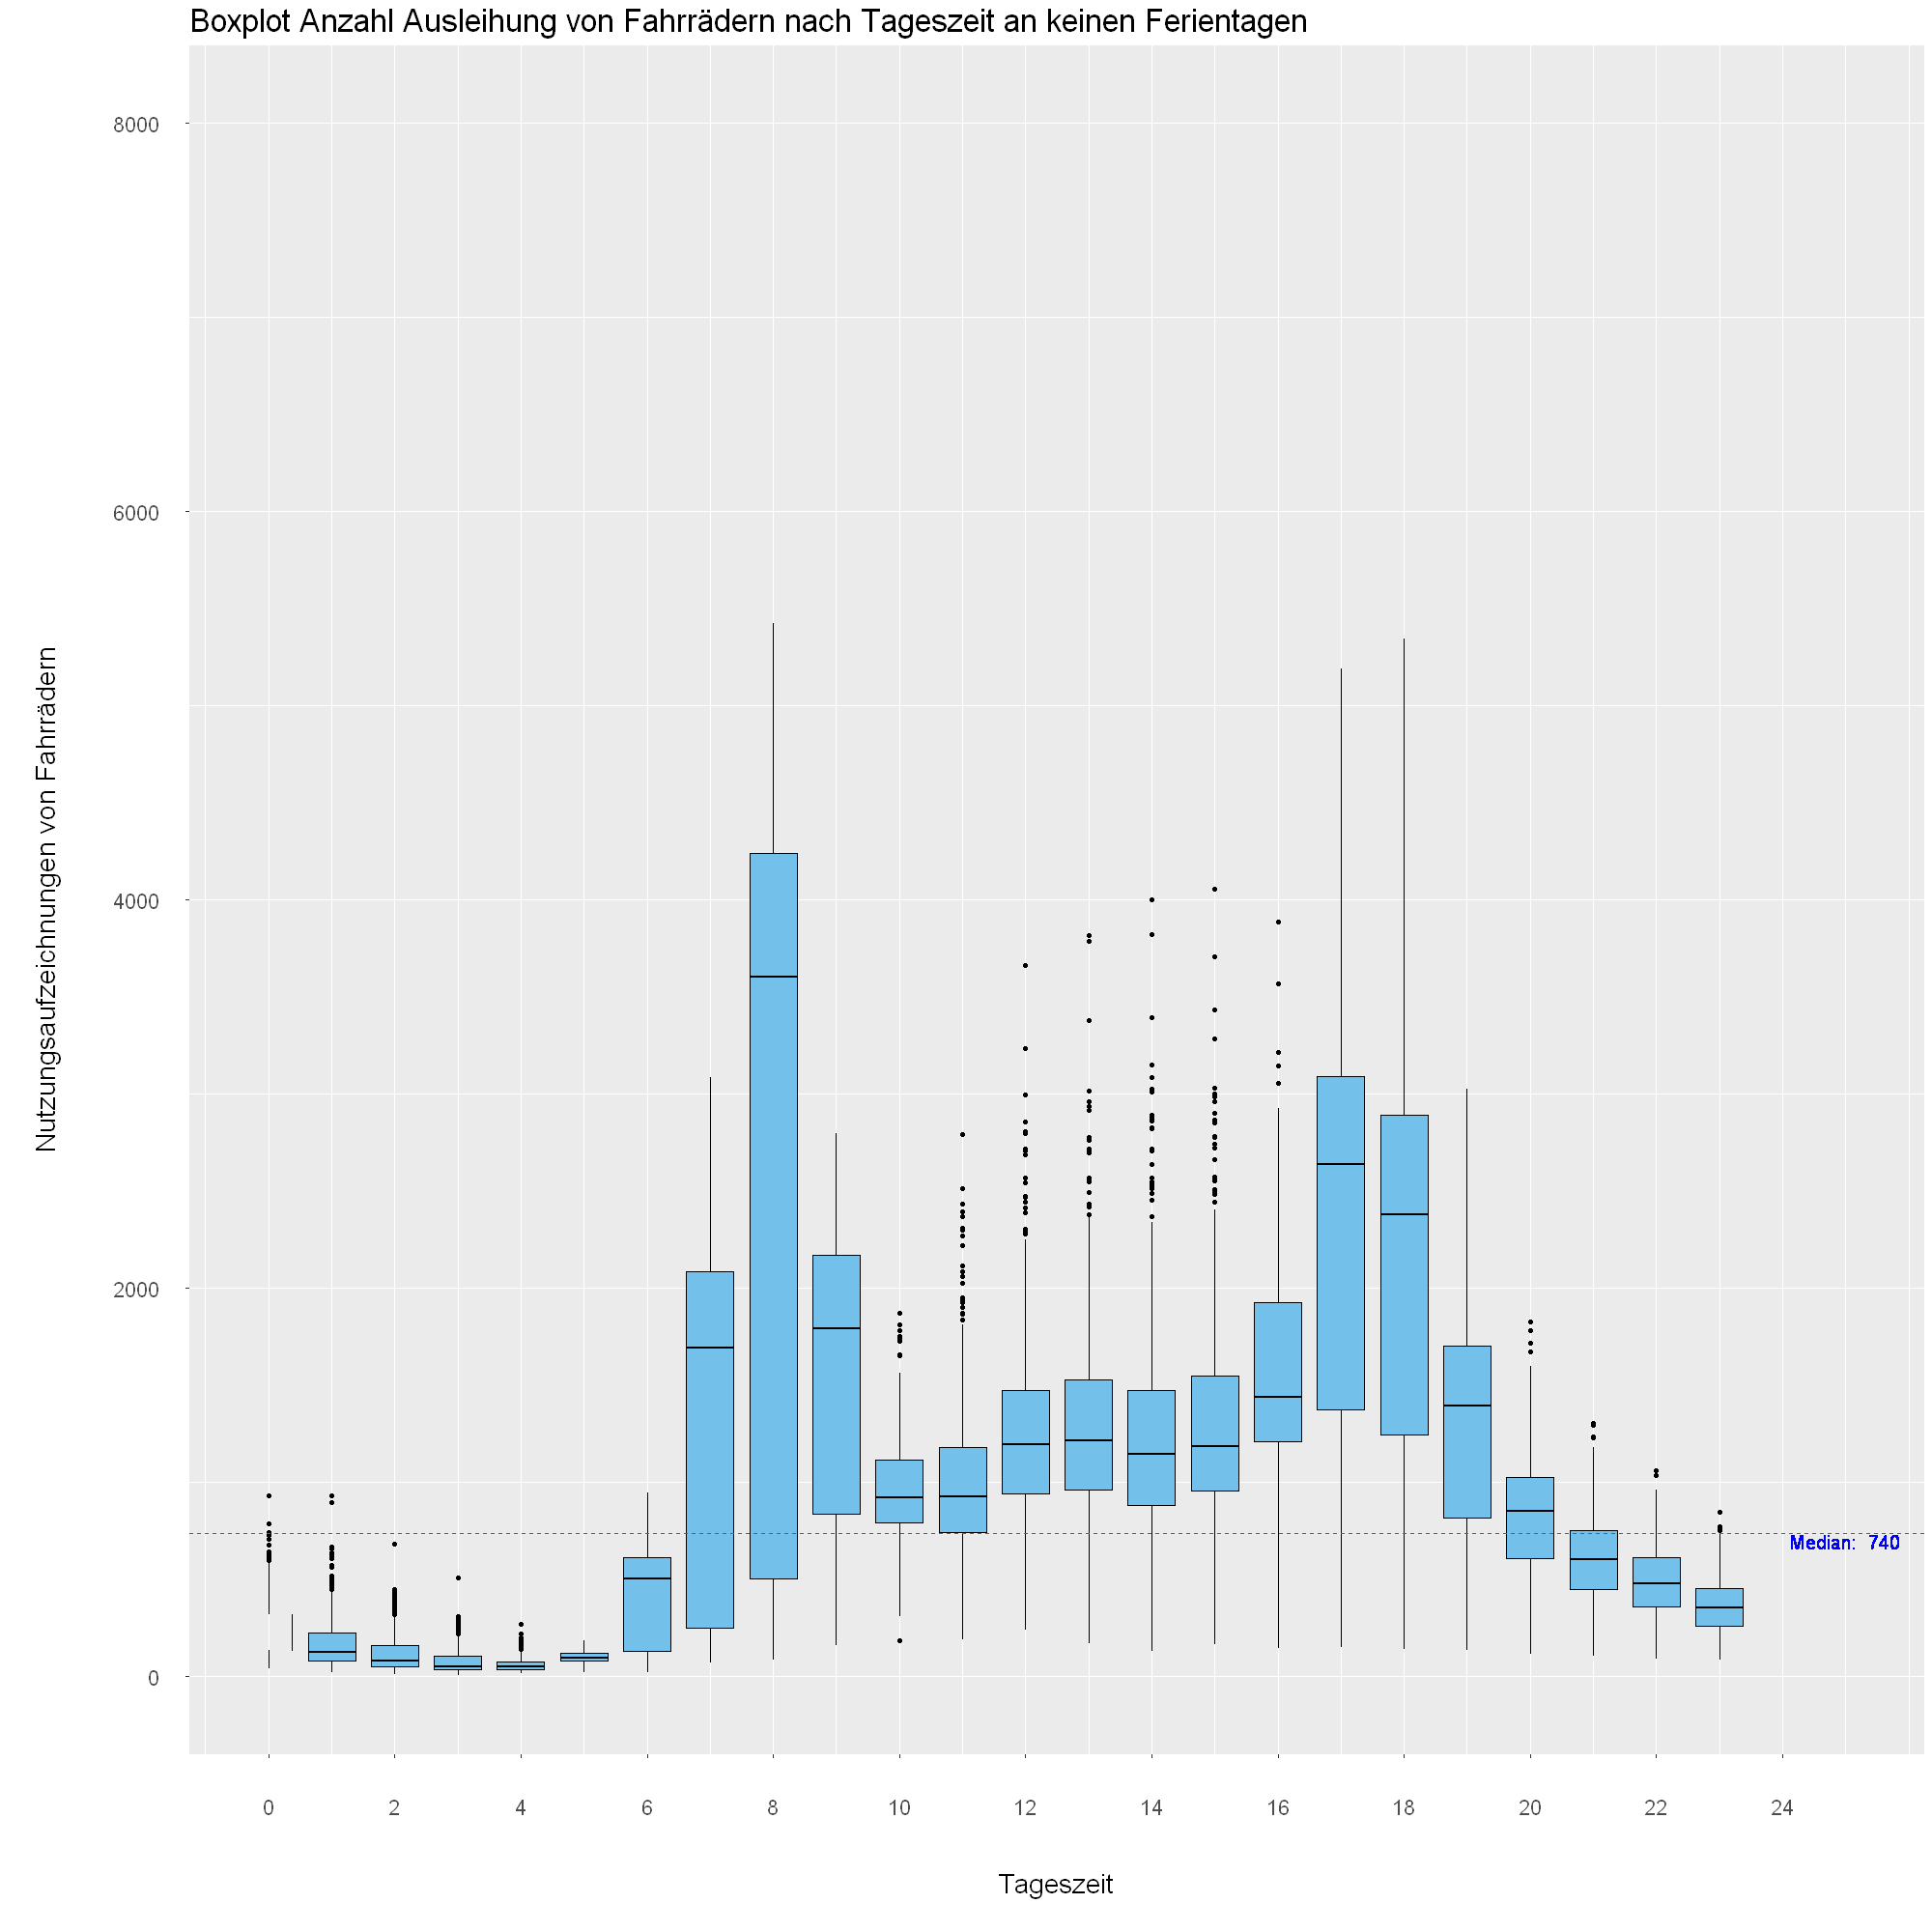

In [66]:
#Filter
filter_bike_data <- bike_data %>% filter(bike_data$season == 2 | bike_data$season == 3)

#Median aus Anzahl Ausleihung von Fahrrädern berechnen
data <- filter_bike_data$cnt
med <-median(data)
zusammen <- paste("Median: ",med)

#Boxplot mit total Anzahl Ausleihung von Fahrrädern nach Tageszeit, gruppiert nach Tageszeit
ggplot(data = filter_bike_data, aes(hr, cnt, group=hr)) +
       geom_boxplot( fill="#73c1eb", colour="black")  +
xlab("Tageszeit") +
ylab("Nutzungsaufzeichnungen von Fahrrädern") +
ggtitle("Boxplot Anzahl Ausleihung von Fahrrädern nach Tageszeit an keinen Ferientagen") +
geom_hline(yintercept= median(med), color = "purple2", linetype='dashed', size = 0.5 ) +
geom_text(aes(x=25, label=zusammen, y=20), colour="blue", vjust = -8.0, size=5) +
scale_x_continuous(limits = c(0, 25), breaks = c(0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24)) +
# Anleitung: https://www.statology.org/ggplot-axis-breaks/ +
ylim(0, 8000) +

#Aussehen Editing
theme(text = element_text(size = 20) ,
      axis.title.y = element_text(margin = margin(t = 0, r = 40, b = 0, l = 20)),
      axis.title.x = element_text(margin = margin(t = 40, r = 00, b = 20, l = 0)),
      axis.text.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 0)),
      axis.text.x = element_text(margin = margin(t = 30, r = 0, b = 0, l = 0)),
      )



options(repr.plot.width = 20, repr.plot.height = 20, repr.plot.res = 100)

## Balkendiagramm mit Anzahl Ausleihung von Fahrrädern und Windgeschwindigkeit

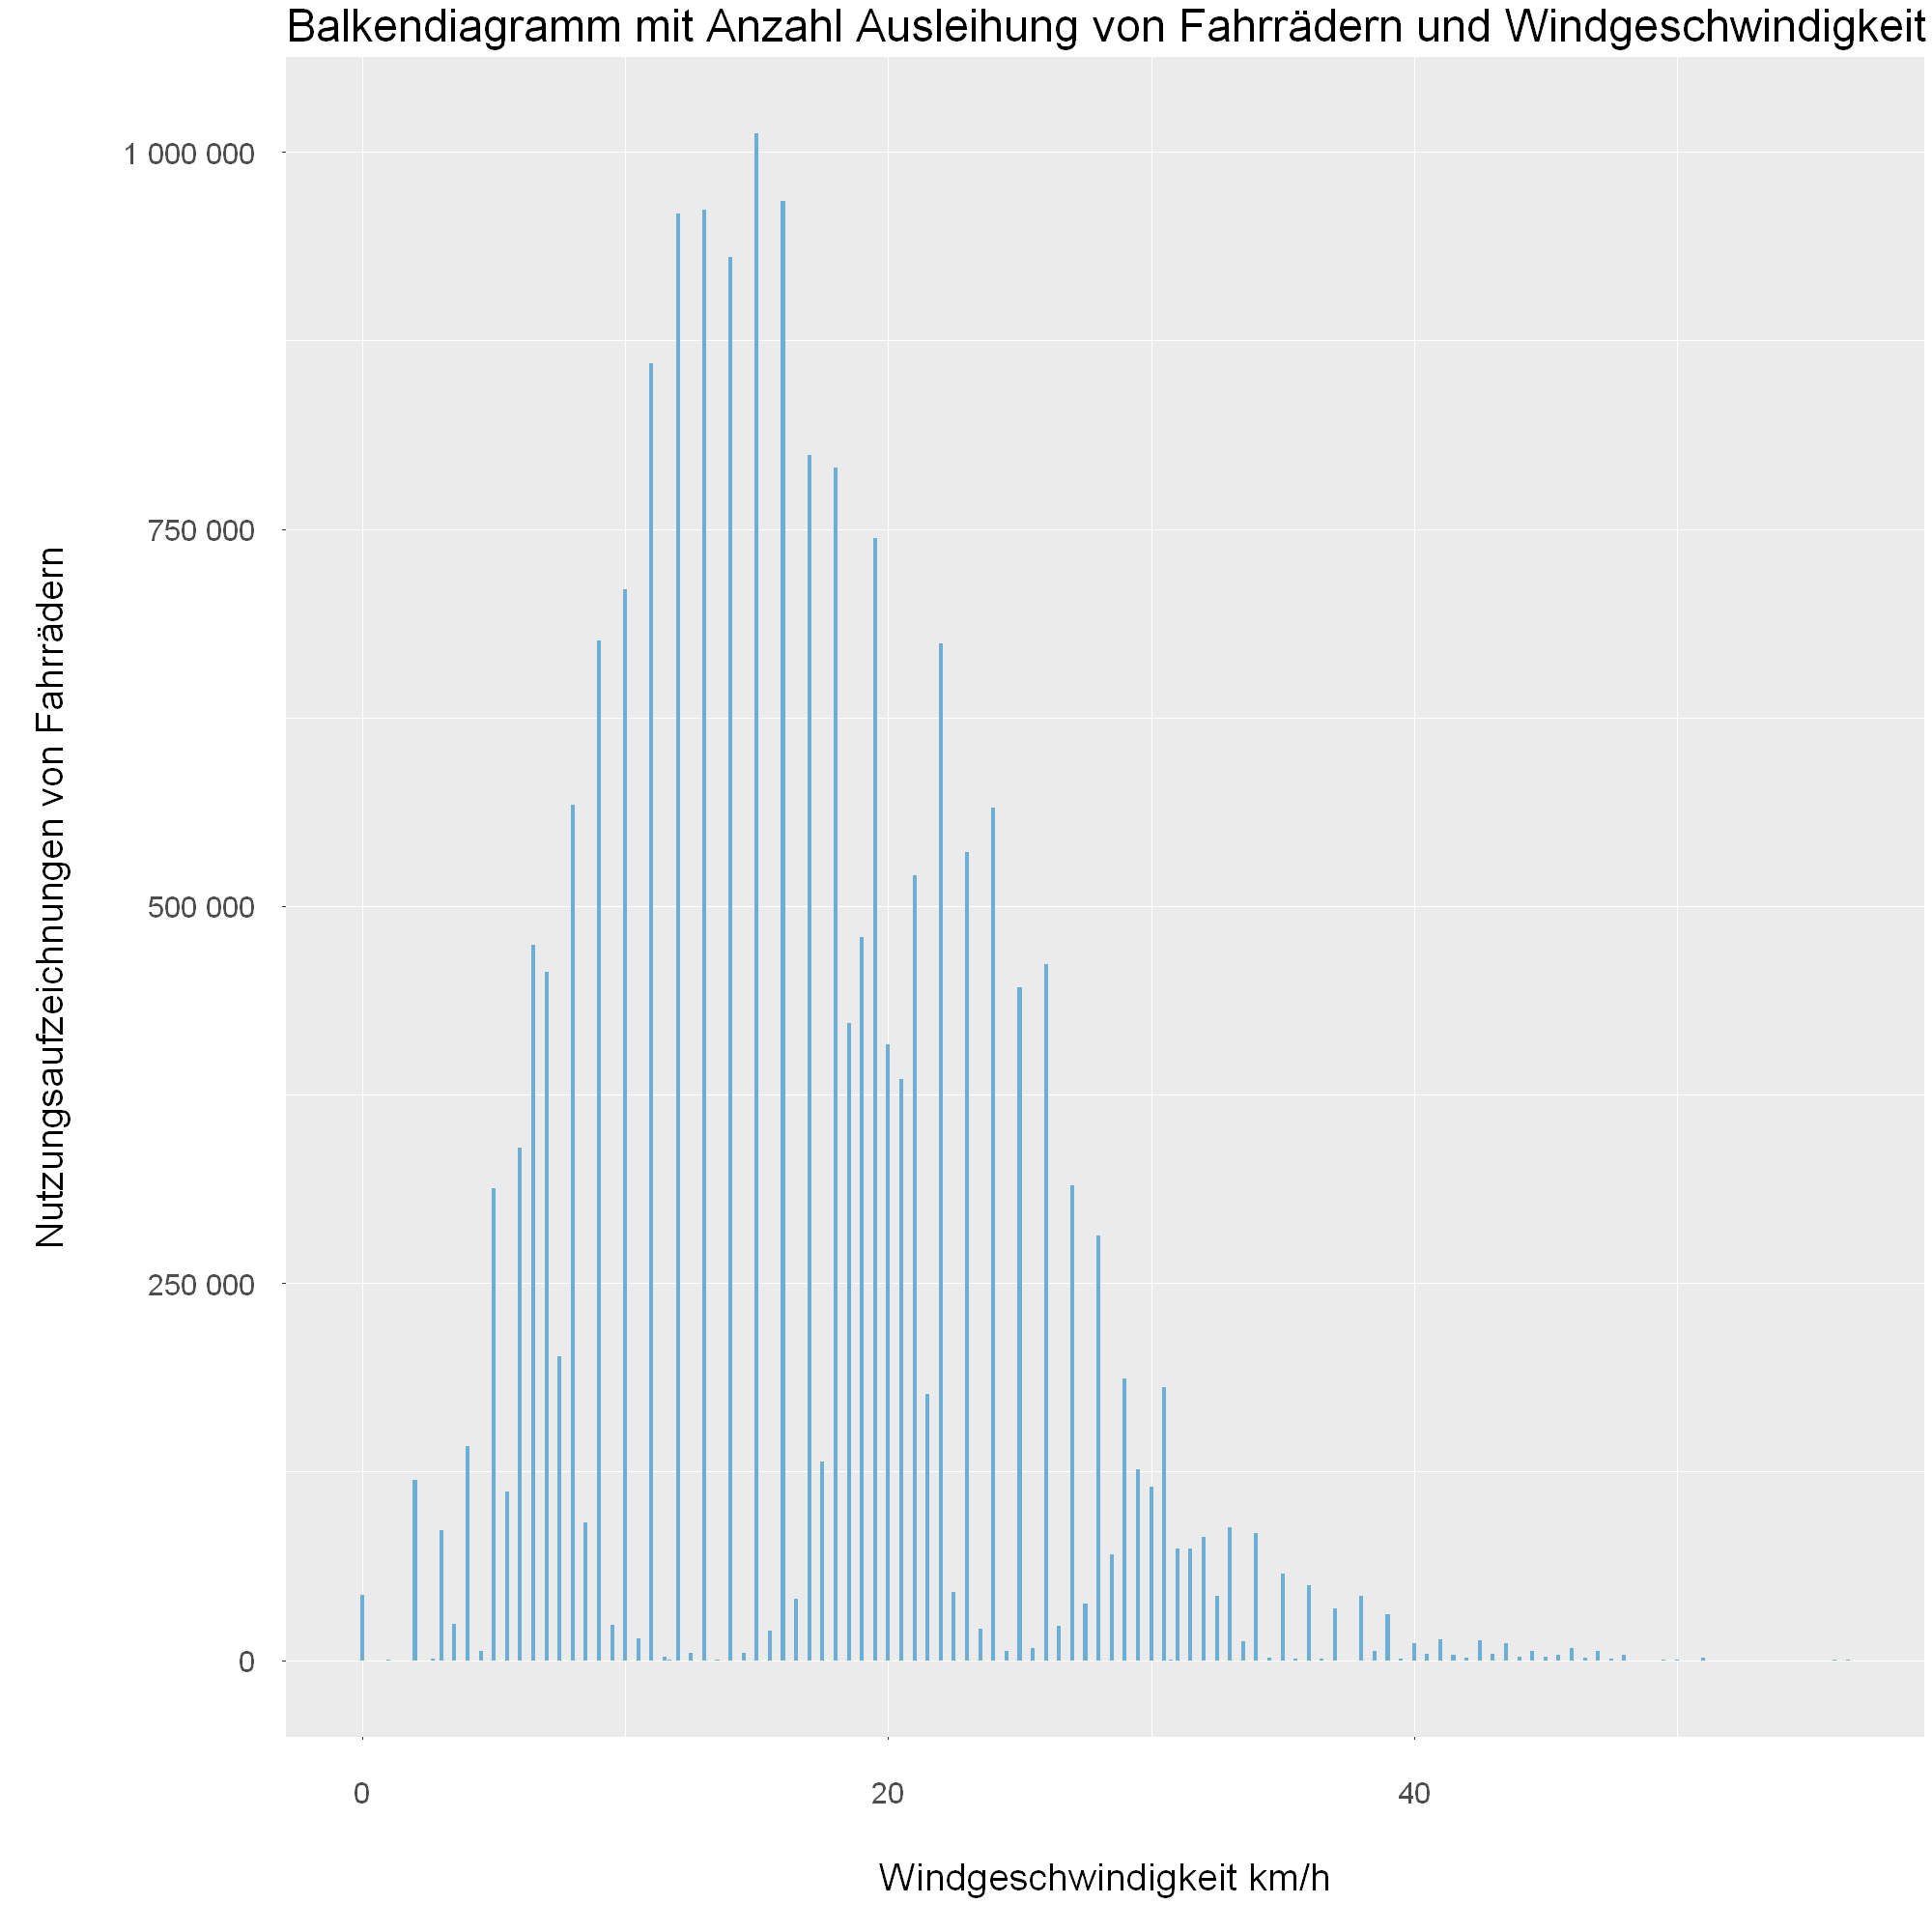

In [67]:
#Balkendiagramm mit Anzahl Ausleihung von Fahrrädern und Windgeschwindigkeit
ggplot(data = bike_data, aes(x=wind_speed, y=cnt)) +
       geom_col(fill="#6baed6") +
xlab("Windgeschwindigkeit km/h") +
ylab("Nutzungsaufzeichnungen von Fahrrädern") +
scale_y_continuous(labels = number_format()) +
ggtitle("Balkendiagramm mit Anzahl Ausleihung von Fahrrädern und Windgeschwindigkeit") +


#Aussehen Editing
theme(text = element_text(size = 28) ,
      axis.title.y = element_text(margin = margin(t = 0, r = 40, b = 0, l = 20)),
      axis.title.x = element_text(margin = margin(t = 40, r = 00, b = 20, l = 0)),
      axis.text.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 0)),
      axis.text.x = element_text(margin = margin(t = 30, r = 0, b = 0, l = 0)),
      )



options(repr.plot.width = 20, repr.plot.height = 20, repr.plot.res = 100)


### Heatmap mit Anzahl Ausleihung von Fahrrädern und Zeit

Using weekdays as id variables


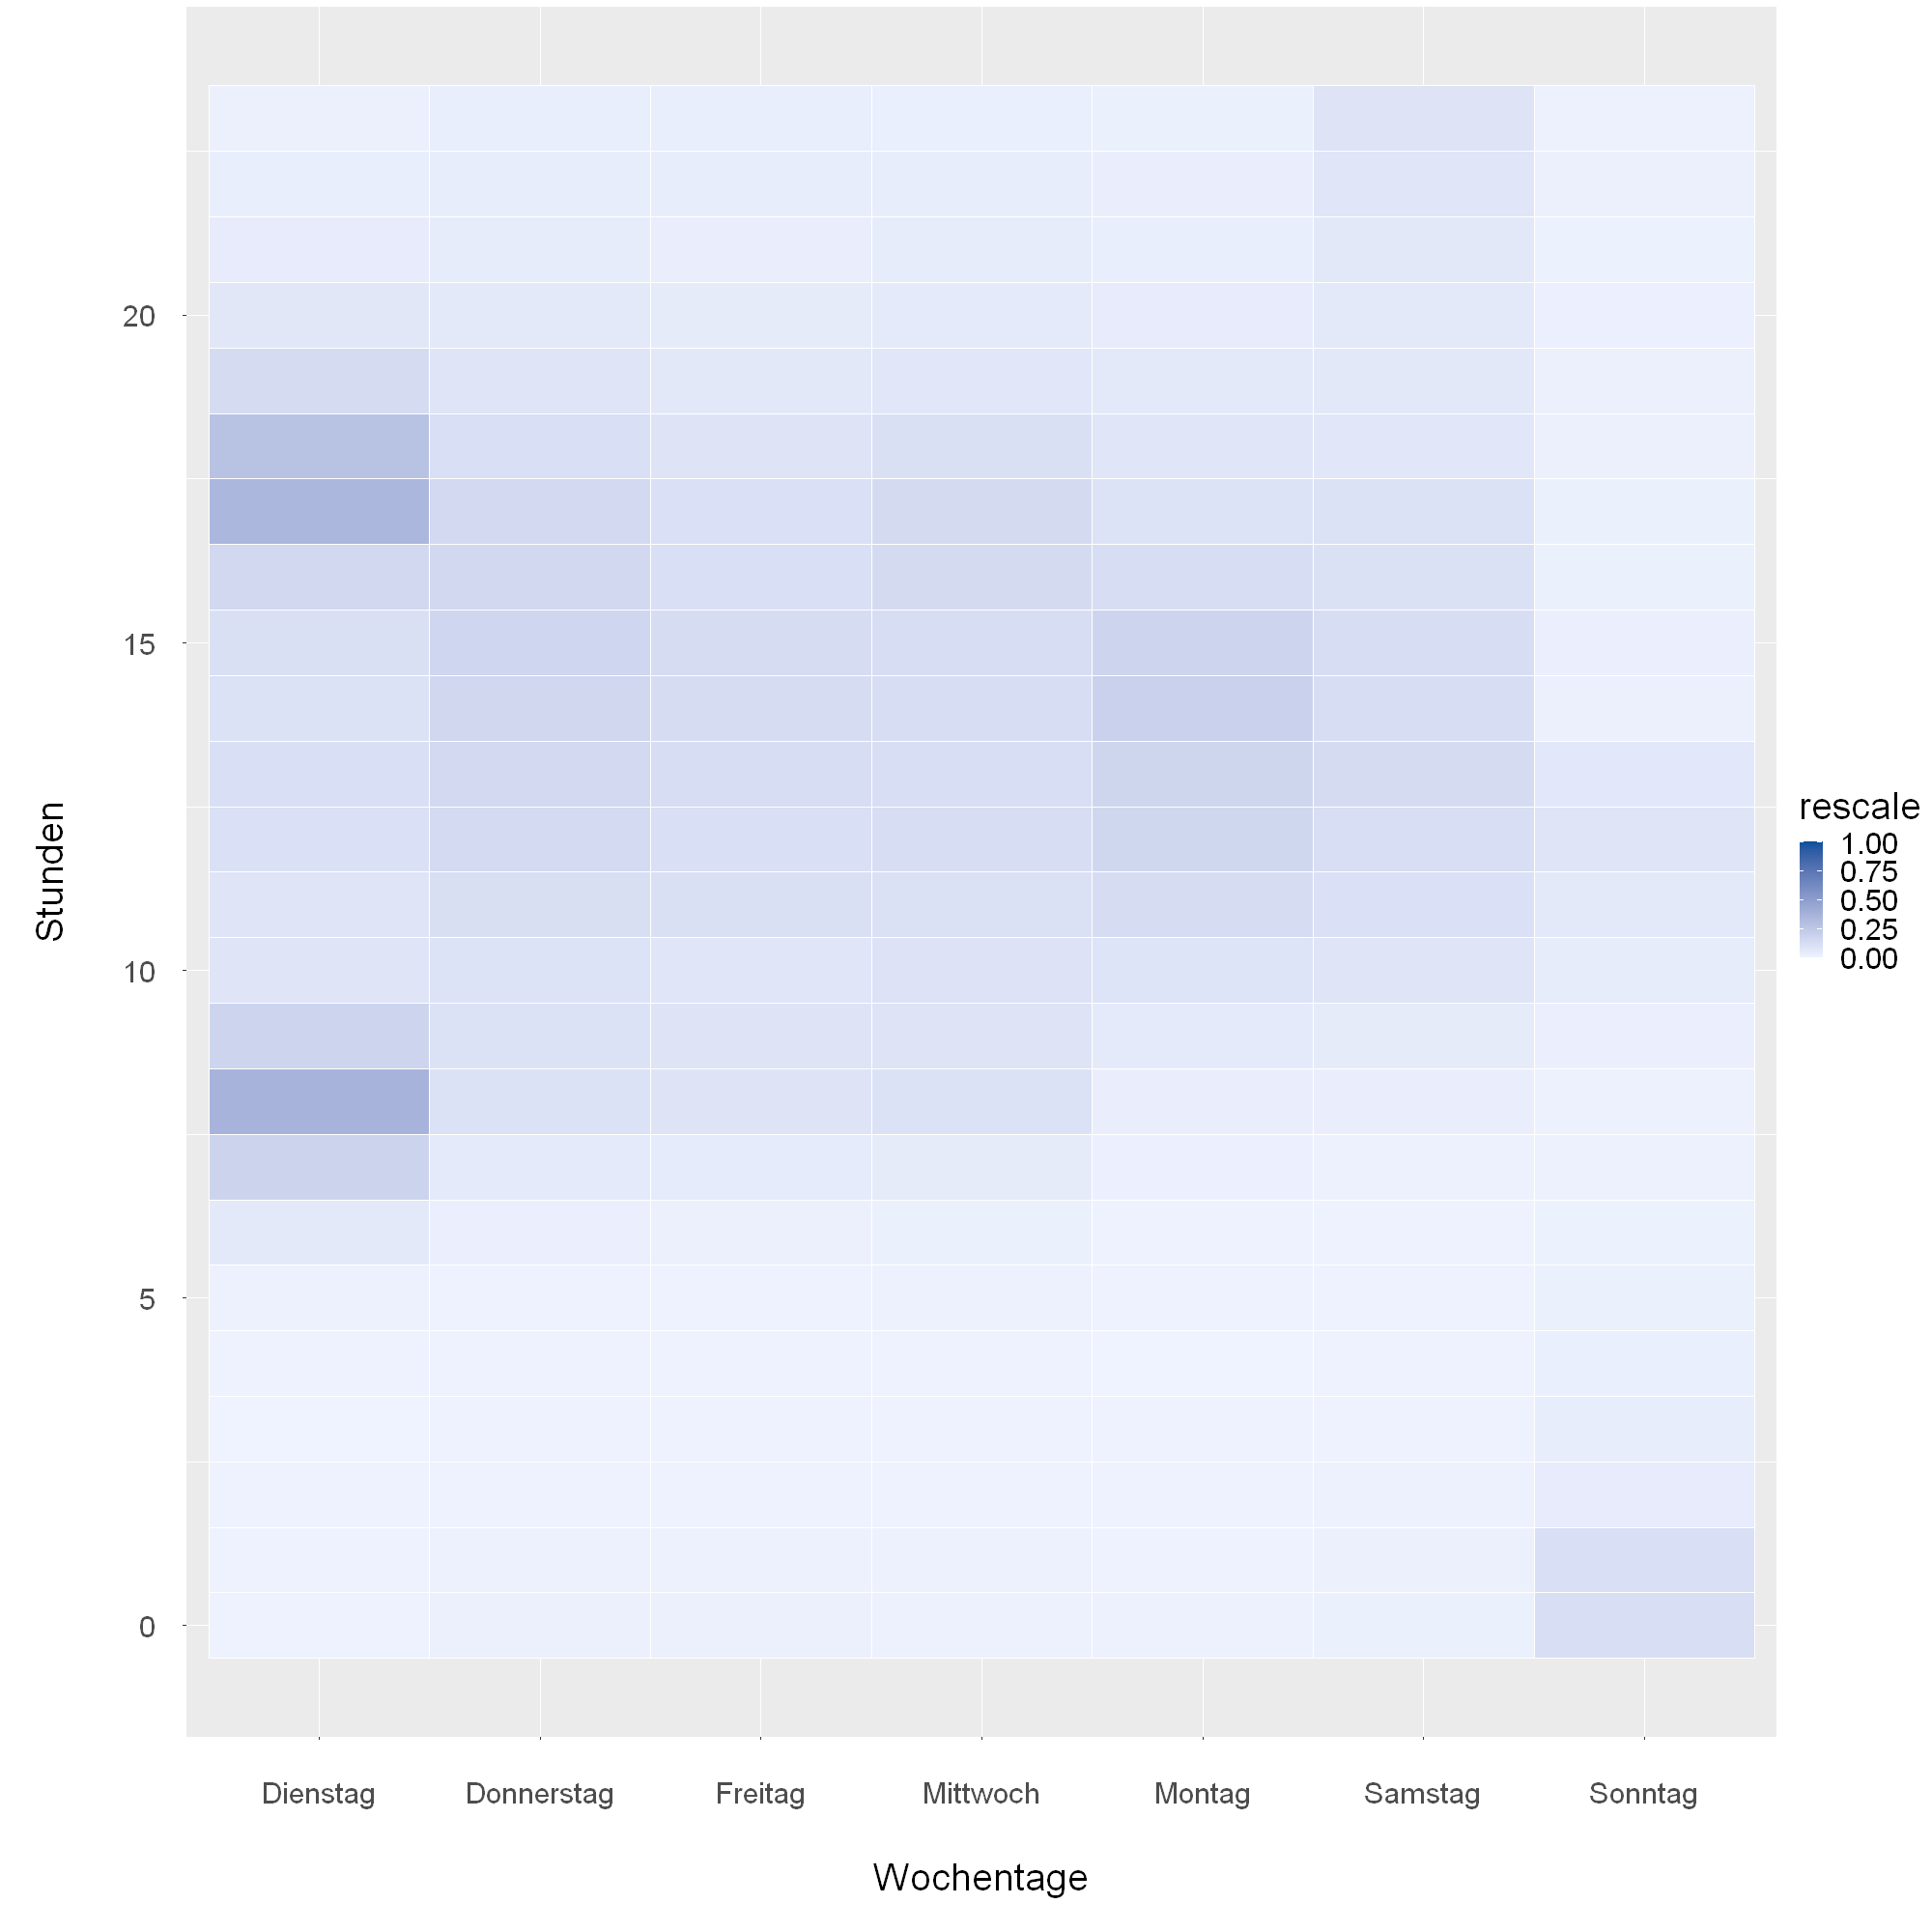

In [68]:
bike_data <- read.csv('london_bereinigt_V2.csv', header = TRUE, sep = ";")
bike_hr <- c(bike_data$hr)

#melt mtcars into long format
#melt_mtcars <- melt(bike_data, id = c("weekdays","cnt","hr"))
#melt_mtcars <- gather(bike_data, detail, value, weekday:hr, factor_key=TRUE)3
#melt_mtcars <- c(cnt,weekdays, hr)
#https://www.statology.org/heatmap-r-ggplot2/
bike_data <- bike_data  %>% select(cnt, weekdays)
melt_mtcars <- melt(bike_data)
#melt_mtcars

melt_mtcars$hr <- bike_hr
melt_mtcars <- ddply(melt_mtcars, .(variable), transform, rescale = rescale(value))
#sort by player with custom order
#melt_mtcars <- melt_mtcars %>% arrange(factor(weekdays, levels = c('Monntag', 'Dienstag', 'Mittwoch', 'Donnerstag', 'Freitag', 'Samstag', 'Sonntag')))

#create heatmap using rescaled values
ggplot(melt_mtcars, aes(weekdays, hr)) +
  geom_tile(aes(fill = rescale), colour = "white") +
  scale_fill_gradient2(low = muted("red"), mid = "#eff3ff",
  high = ("#08519c"), midpoint = 0, space = "Lab",
  na.value = "grey50", guide = "colourbar", aesthetics = "fill") +

xlab("Wochentage") +
ylab("Stunden") +



#Aussehen Editing
theme(text = element_text(size = 28) ,
      axis.title.y = element_text(margin = margin(t = 0, r = 40, b = 0, l = 20)),
      axis.title.x = element_text(margin = margin(t = 40, r = 00, b = 20, l = 0)),
      axis.text.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 0)),
      axis.text.x = element_text(margin = margin(t = 30, r = 0, b = 0, l = 0)),
      )



options(repr.plot.width = 20, repr.plot.height = 20, repr.plot.res = 100)

### Heatmap mit Anzahl Ausleihung von Fahrrädern nach Luftfeuchtigkeit

ERROR: Error in options(repr.plot.width = 20, repr.plot.height = 20, repr.plot.res = 100) + : Ziel der Zuweisung expandiert zu keinem Sprachobjekt


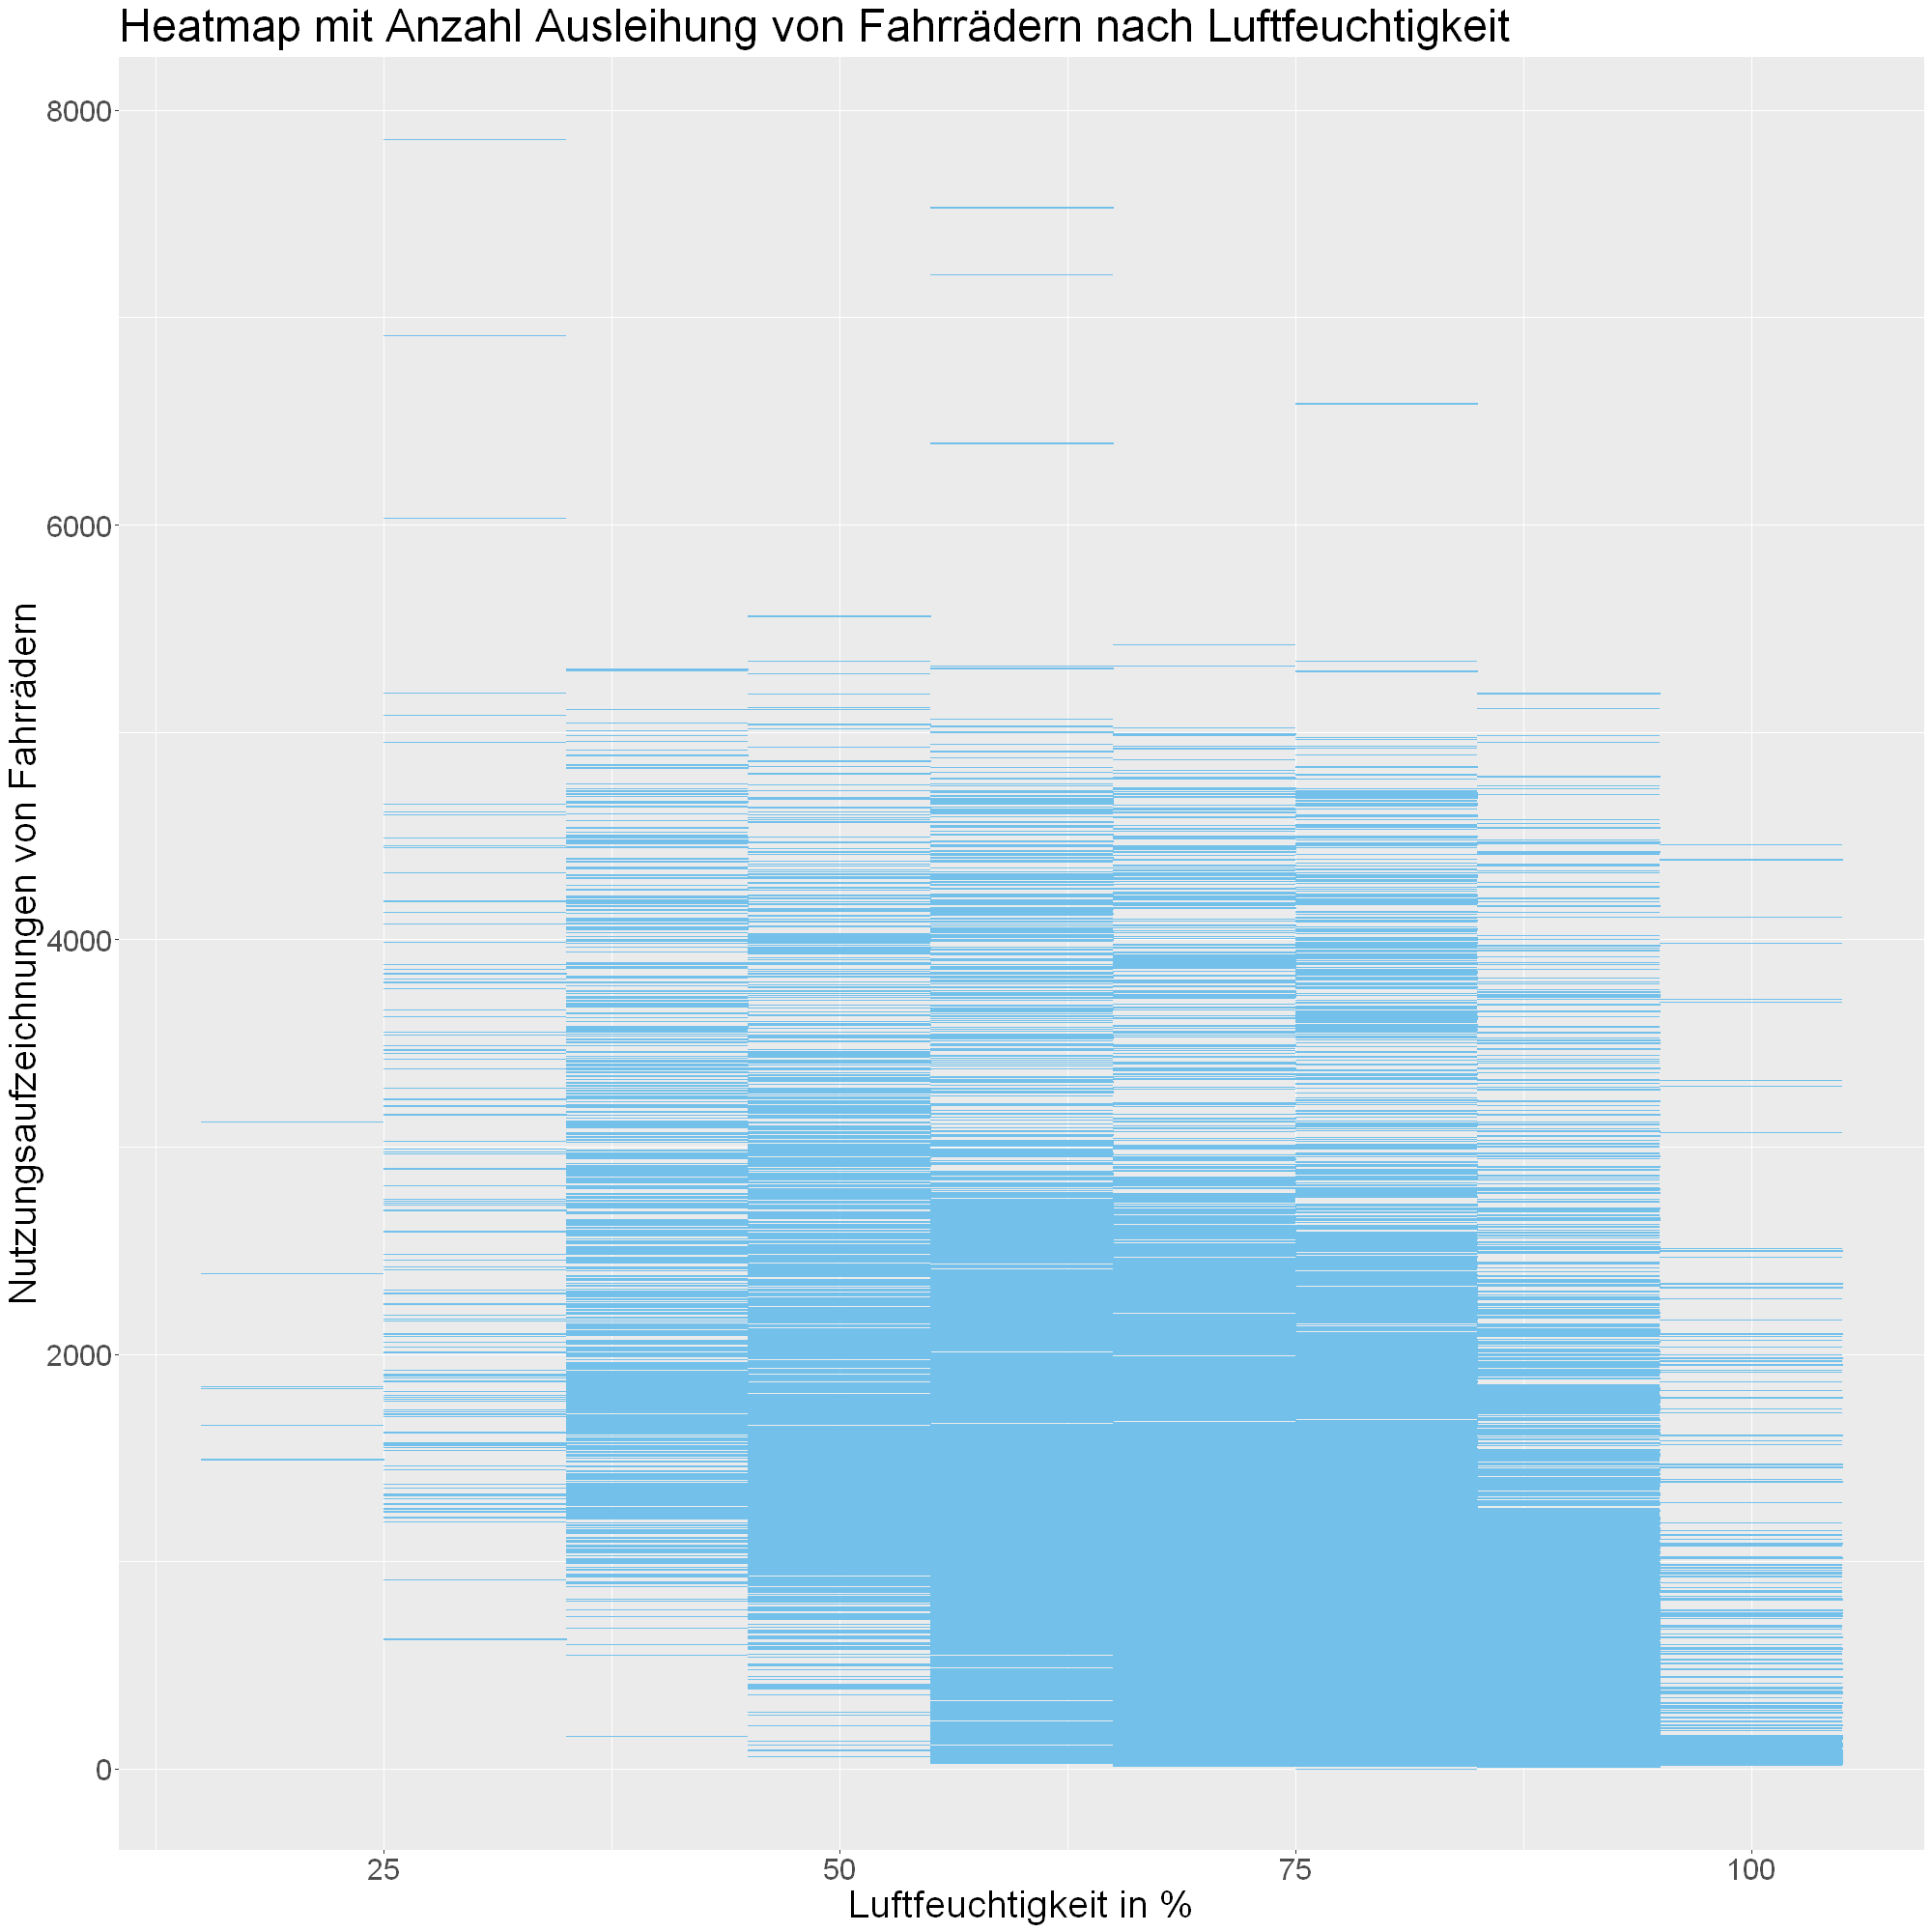

In [135]:
#Heatmap mit Anzahl Ausleihen und Luftfeuchtigkeit
#Luftfeuchtigkeit auf 10er runden und neue Variable erstellen, damit Grafik übersichtlicher ist.
bike_data$humR <- round(bike_data$hum, digits=-1)
ggplot(data = bike_data, aes(x=humR, y=cnt)) +
       geom_tile(color="#73c1eb") +
xlab("Luftfeuchtigkeit in %") +
ylab("Nutzungsaufzeichnungen von Fahrrädern") +
ggtitle("Heatmap mit Anzahl Ausleihung von Fahrrädern nach Luftfeuchtigkeit") +


#Aussehen Editing
theme(text = element_text(size = 28) ,
      )



options(repr.plot.width = 20, repr.plot.height = 20, repr.plot.res = 100)


options(repr.plot.width = 20, repr.plot.height = 20, repr.plot.res = 100) +



#Spalte mit gerundeten Werten wieder entfernen
bike_data <- bike_data %>% select(-contains("humR")) 





### Boxplot Anzahl Ausleihung von Fahrrädern nach Monat

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.


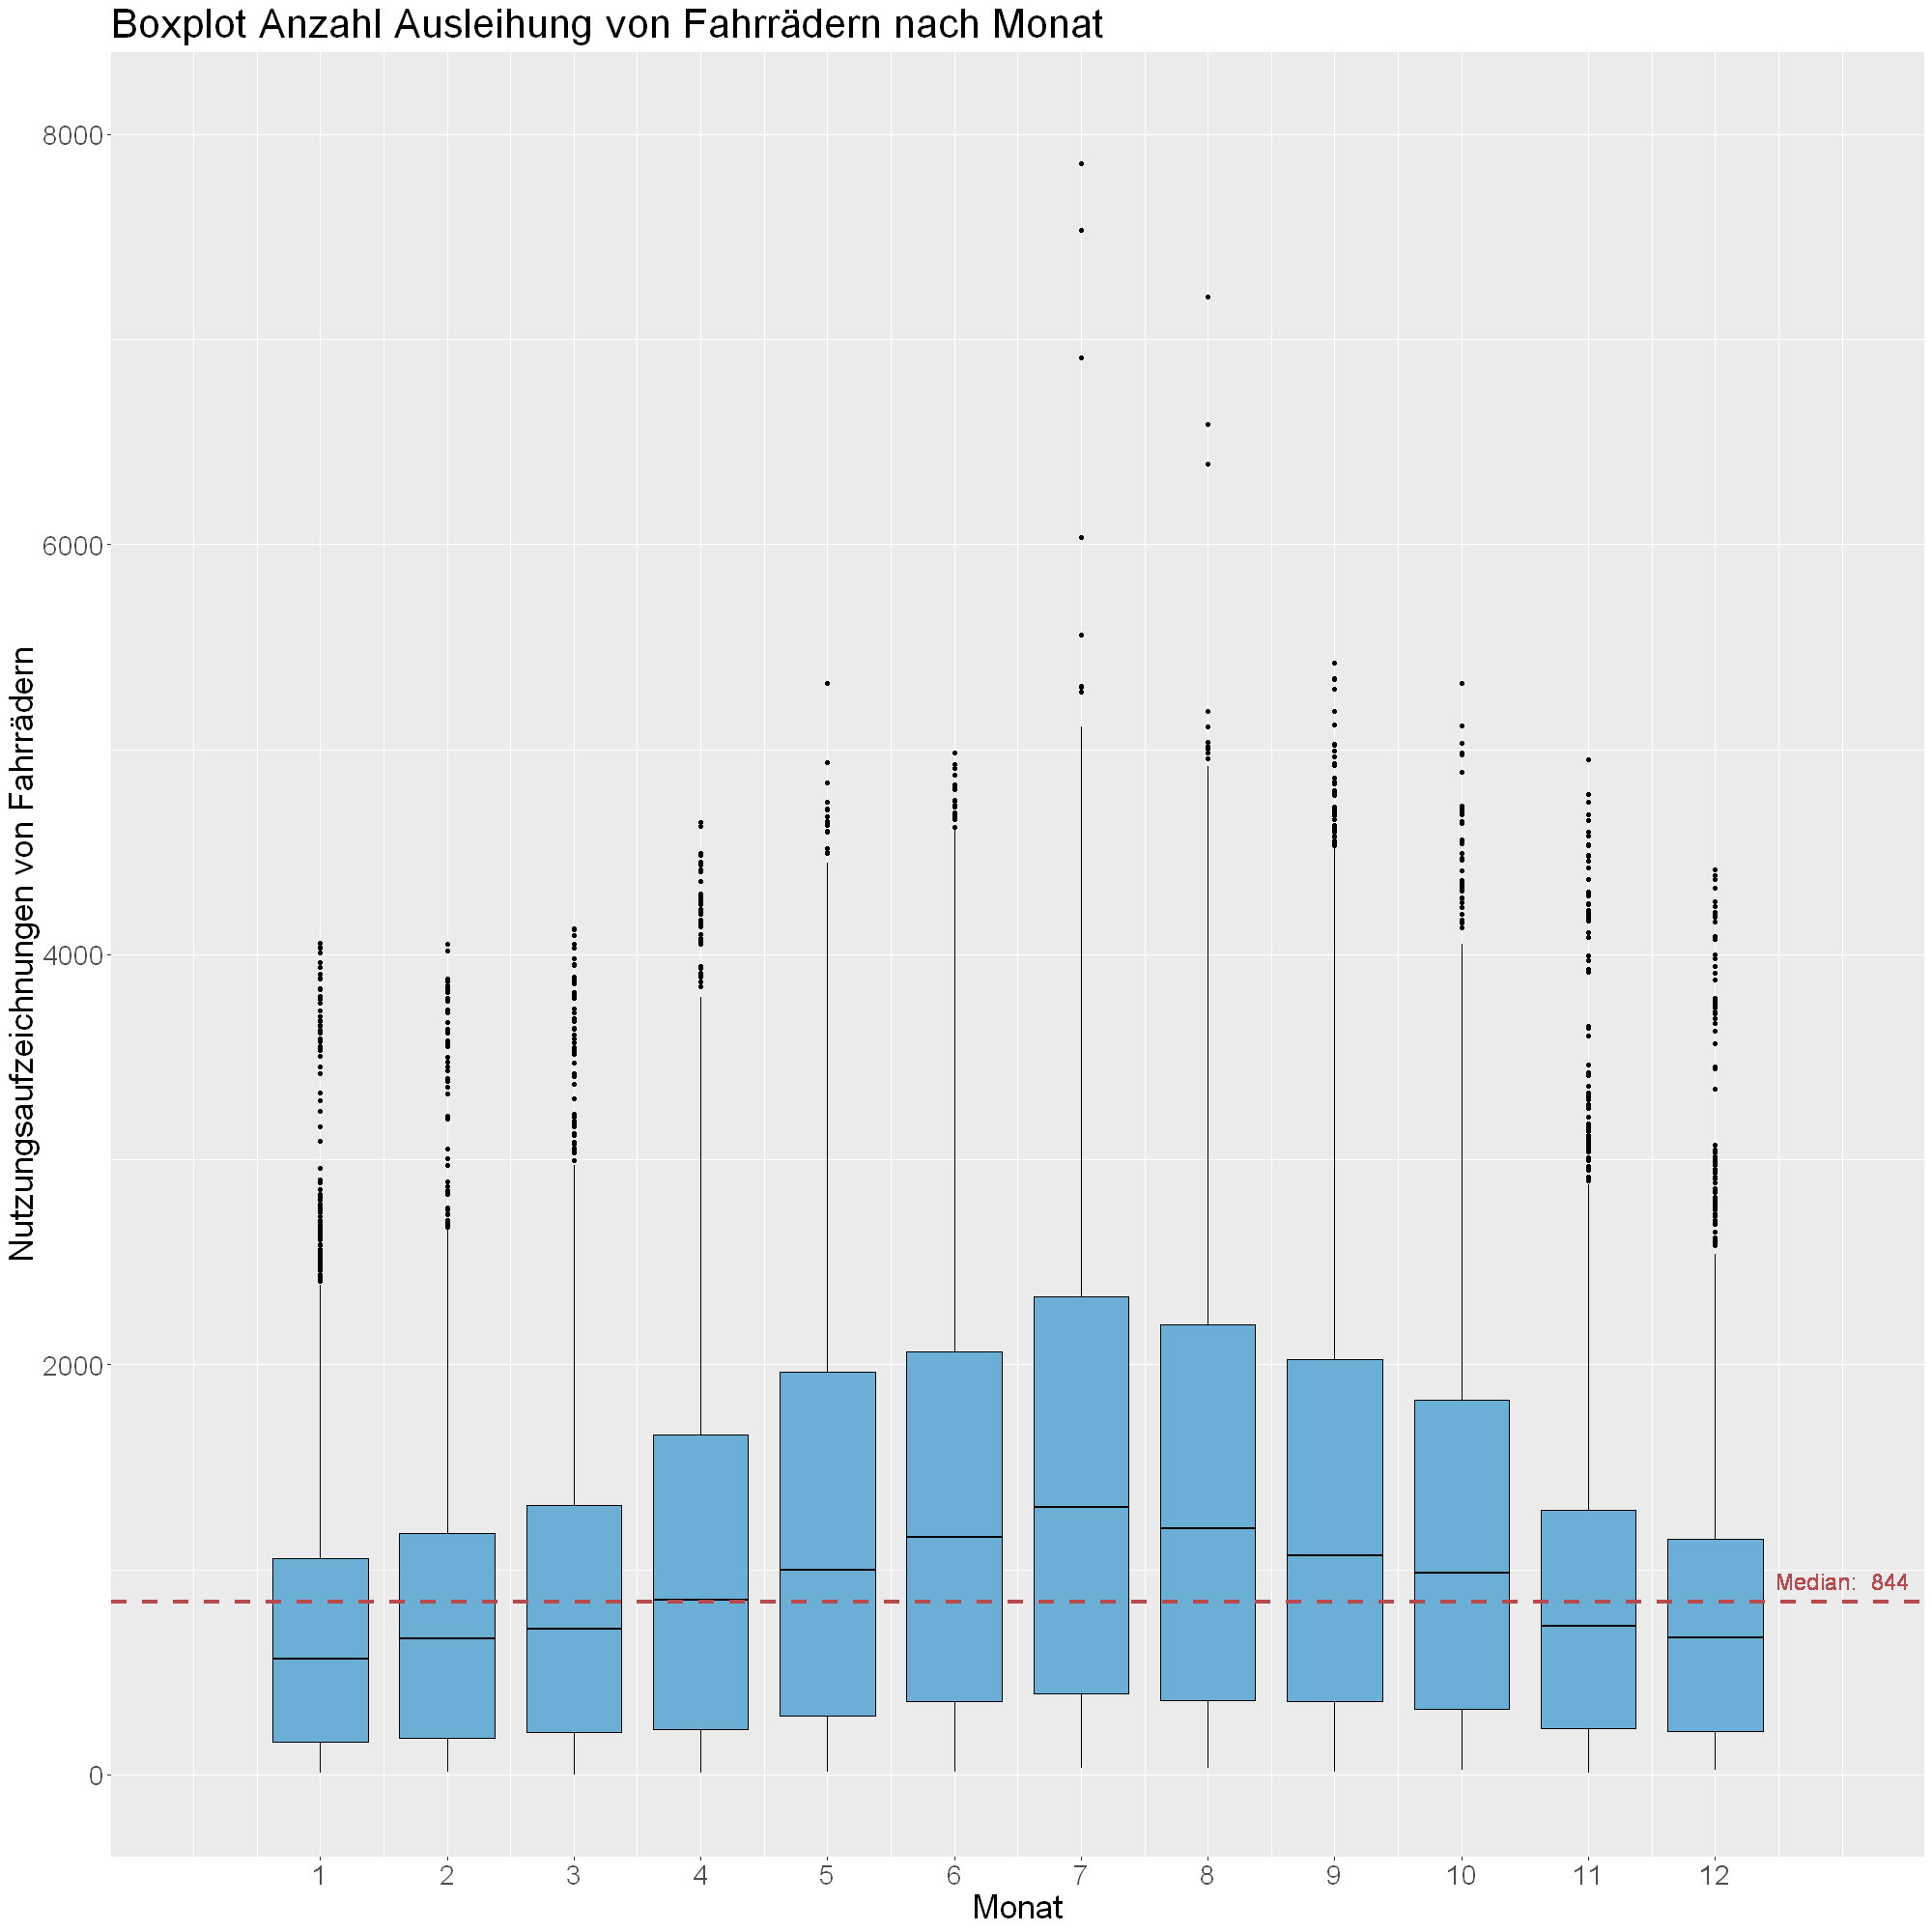

In [137]:
#Boxplot nach Anzahl Ausleihen und Monat, gruppiert nach Monat

#Median aus Anzahl Ausleihung von Fahrrädern berechnen
data <- bike_data$cnt
med <- median(data)
zusammen <- paste("Median: ",med)


ggplot(data = bike_data, aes(month, cnt, group=month)) +
       geom_boxplot(fill="#6baed6", colour="black") +
xlab("Monat") +
ylab("Nutzungsaufzeichnungen von Fahrrädern") +
coord_cartesian(xlim = c(0, 13)) +
scale_y_continuous(labels = number_format()) +
ggtitle("Boxplot Anzahl Ausleihung von Fahrrädern nach Monat") +
geom_hline(yintercept = median(med), color = "#B8494D",linetype='dashed', size = 1.5) +
geom_text(aes(x=13, label=zusammen, y=15), colour="#B8494D", vjust = -10.5, size=6) +
scale_x_continuous(limits = c(0, 25), breaks = c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 11, 12)) +
# Anleitung: https://www.statology.org/ggplot-axis-breaks/ +
ylim(0, 8000) +


#Aussehen Editing
theme(text = element_text(size = 25) ,
      )



options(repr.plot.width = 20, repr.plot.height = 20, repr.plot.res = 100)

### Boxplot Anzahl Ausleihung von Fahrrädern nach Monat

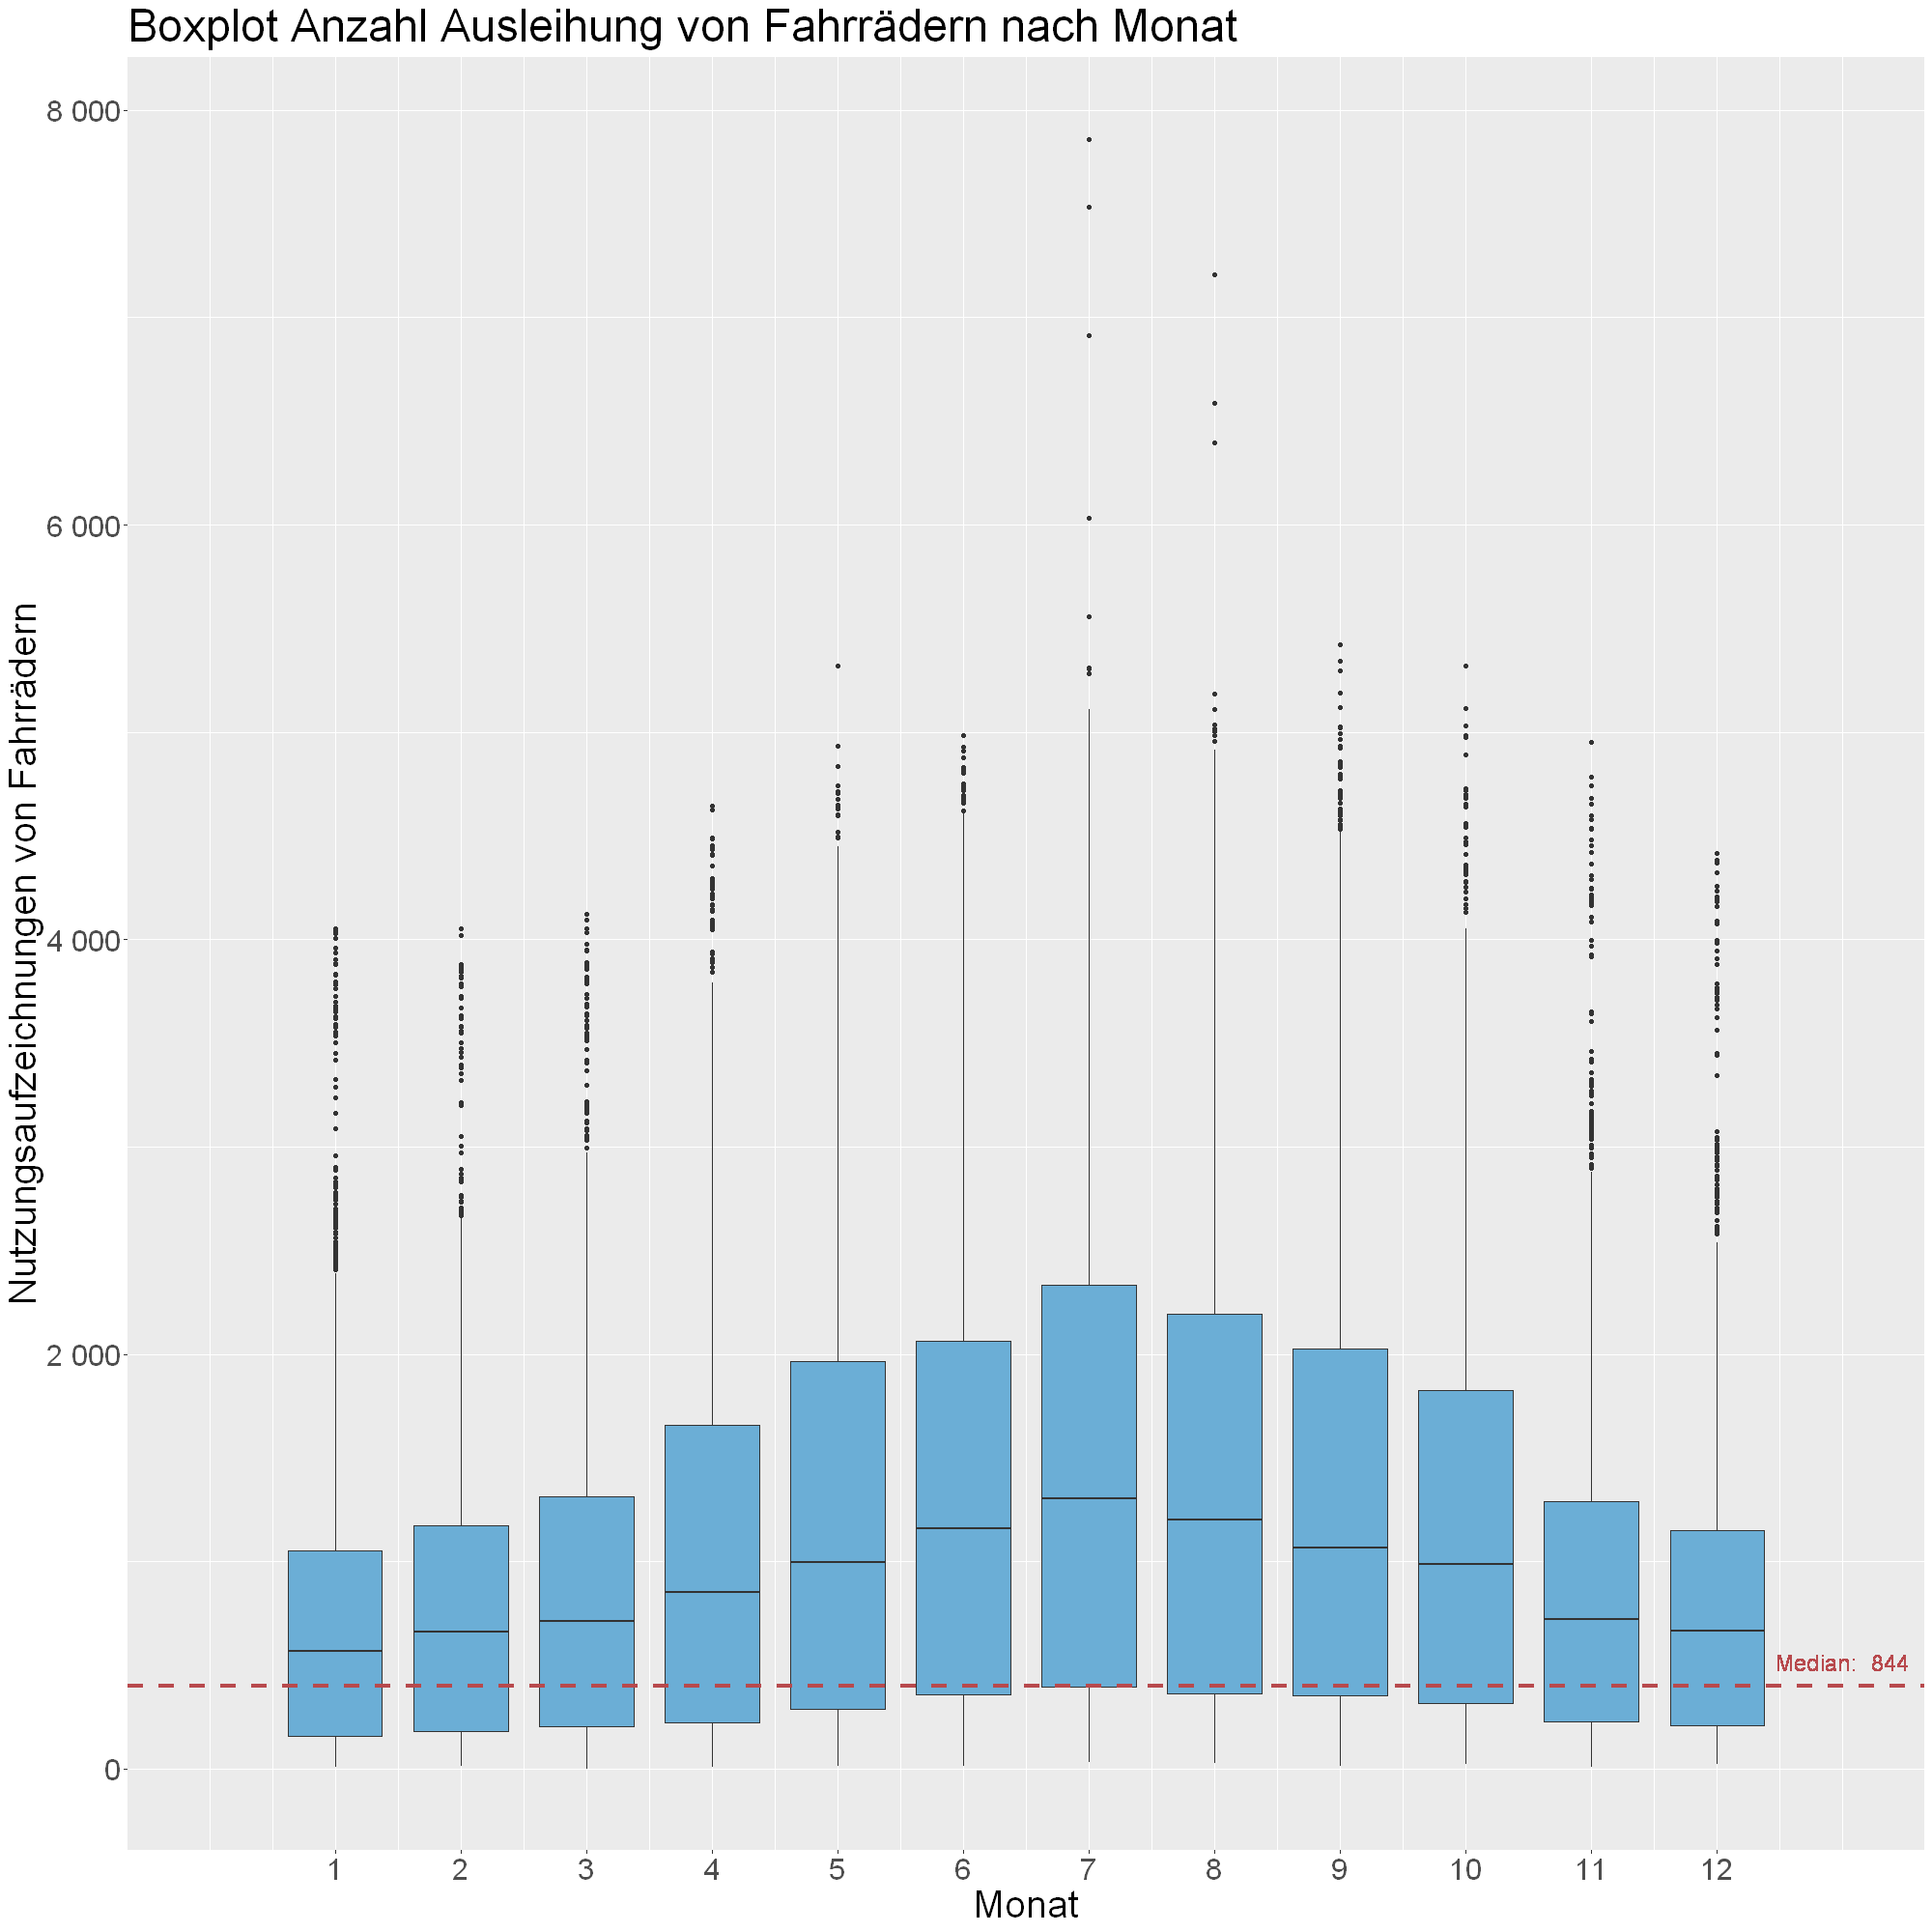

In [138]:
#Boxplot nach Anzahl Ausleihung von Fahrrädern und Monat, gruppiert nach Monat
ggplot(data = bike_data, aes(month, cnt, group=month)) +
       geom_boxplot(fill="#6baed6") +
xlab("Monat") +
ylab("Nutzungsaufzeichnungen von Fahrrädern") +
coord_cartesian(xlim = c(0, 13)) +
scale_y_continuous(labels = number_format()) +
ggtitle("Boxplot Anzahl Ausleihung von Fahrrädern nach Monat") +
geom_hline(yintercept = 400, color = "#B8494D",linetype='dashed', size = 1.5) +
geom_text(aes(x=13, label=zusammen, y=15), colour="#B8494D", vjust = -5.5, size=6) +
scale_x_continuous(limits = c(0, 25), breaks = c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 11, 12)) +
# Anleitung: https://www.statology.org/ggplot-axis-breaks/ +

#Aussehen Editing
theme(text = element_text(size = 28) ,
  
      )



options(repr.plot.width = 20, repr.plot.height = 20, repr.plot.res = 100)

### Boxplot Anzahl Ausleihung von Fahrrädern nach Monat

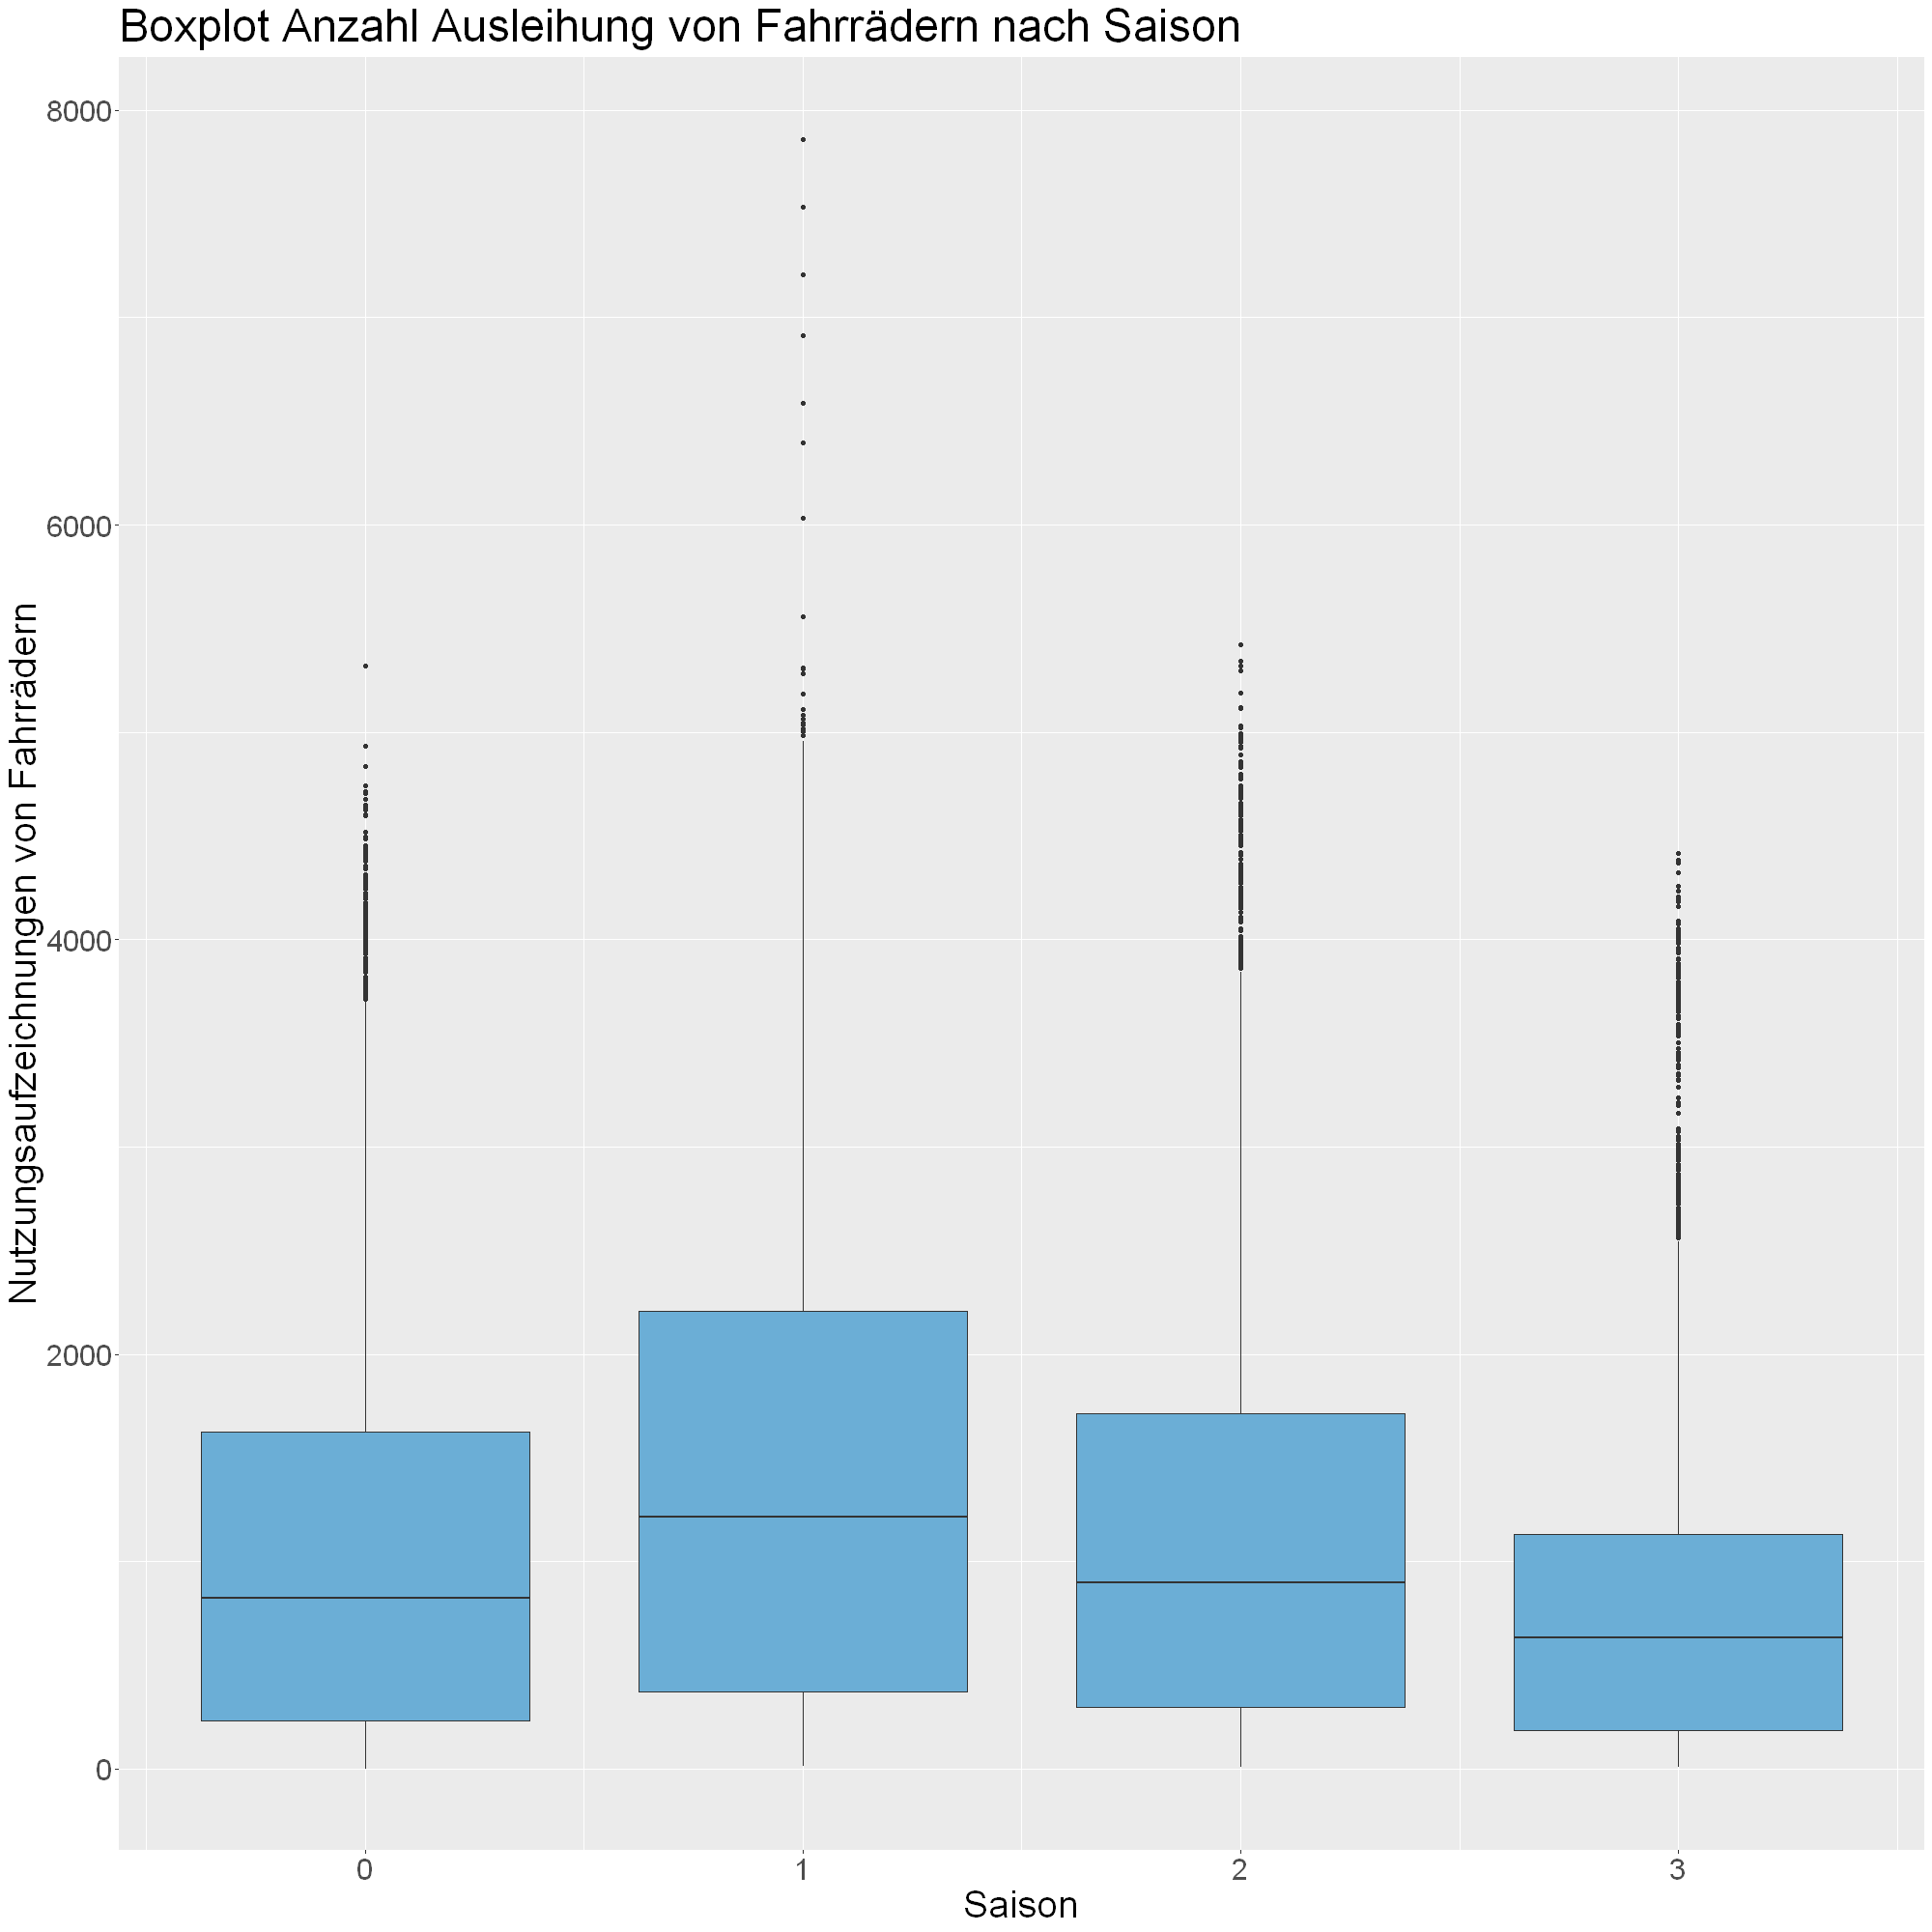

In [139]:
#Boxplot mit total Anzahl Ausleihung von Fahrrädern und Saison, gruppiert nach Saison
ggplot(data = bike_data, aes(season, cnt, group=season)) +
       geom_boxplot(fill="#6baed6") +
xlab("Saison") +
ylab("Nutzungsaufzeichnungen von Fahrrädern") +
ggtitle("Boxplot Anzahl Ausleihung von Fahrrädern nach Saison") +

#Aussehen Editing
theme(text = element_text(size = 28) ,
  
      )



options(repr.plot.width = 20, repr.plot.height = 20, repr.plot.res = 100)

### Histogramm mit Anzahl Ausleihung von Fahrrädern nach Wetterverhältnis

instant,date,time,hr,weekdays,month,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
1,04.01.15,00:00:00,0,Sonntag,1,182,3.0,2.0,93.0,6.0,3,0,1,3
2,04.01.15,01:00:00,1,Sonntag,1,138,3.0,2.5,93.0,5.0,1,0,1,3
3,04.01.15,02:00:00,2,Sonntag,1,134,2.5,2.5,96.5,0.0,1,0,1,3
4,04.01.15,03:00:00,3,Sonntag,1,72,2.0,2.0,100.0,0.0,1,0,1,3
5,04.01.15,04:00:00,4,Sonntag,1,47,2.0,0.0,93.0,6.5,1,0,1,3
6,04.01.15,05:00:00,5,Sonntag,1,46,2.0,2.0,93.0,4.0,1,0,1,3


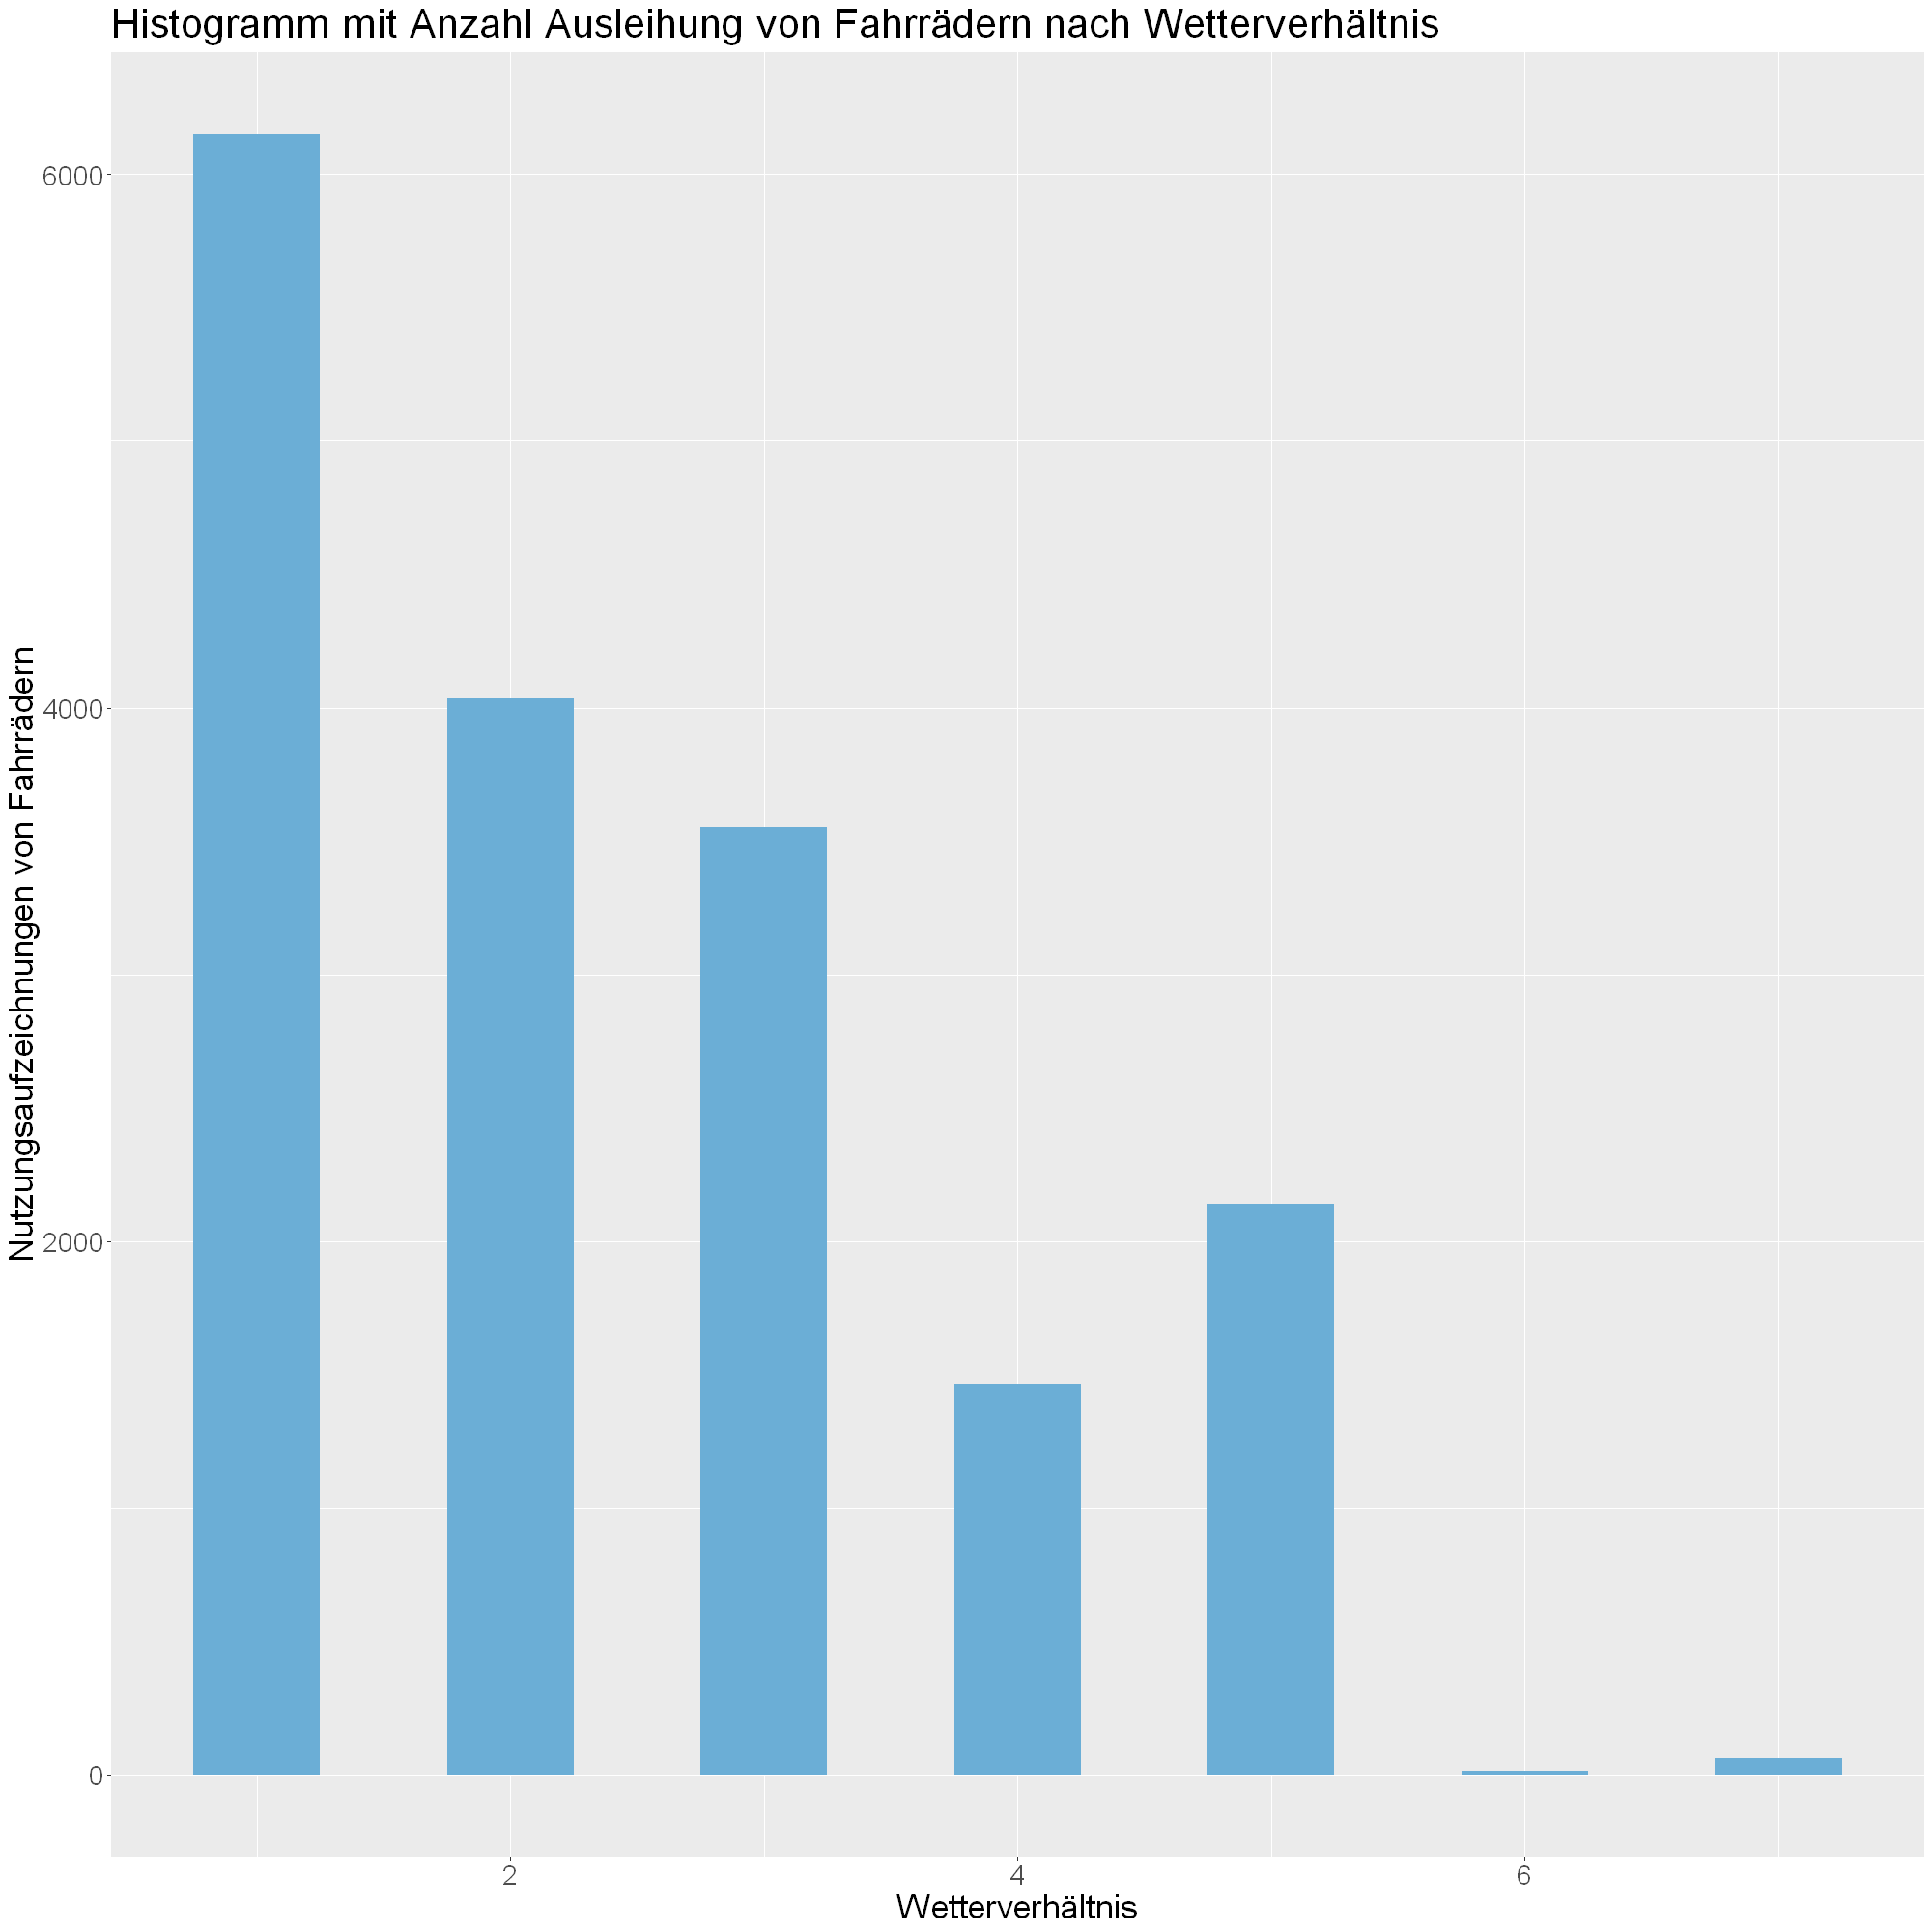

In [140]:
#Balkendiagramm mit Anzahl Ausleihung von Fahrrädern nach Wetterverhältnis
bike_data <- read.csv('london_bereinigt_V3.csv', header = TRUE, sep = ";")

#https://statisticsglobe.com/draw-histogram-with-different-colors-in-r

#bike_data$weather_code <- factor(
#bike_data$weather_code,
#levels = c(1,2,3,4,7),
#labels = c('Clear', 'Scattered Clouds', 'Broken Clouds', 'Cloudy','Light Rain'))
#gp + scale_fill_manual(breaks = c(1,2,3,4,5,6), values=c("Clear", "Scattered Clouds", "Broken Clouds", "Cloudy","Light Rain", "Snow", "Gefriernebel"))+

head(bike_data)


ggplot(data = bike_data, aes(x=weather_code)) +
        geom_histogram(fill="#6baed6", binwidth=0.5) +
scale_fill_manual(values = c('1'= "#1b98e0", '2' = "#f6f805", '3' = "#353436"))+

xlab("Wetterverhältnis") +
ylab("Nutzungsaufzeichnungen von Fahrrädern")+
ggtitle("Histogramm mit Anzahl Ausleihung von Fahrrädern nach Wetterverhältnis") +


#Aussehen Editing
theme(text = element_text(size = 25) ,
      
      )



options(repr.plot.width = 20, repr.plot.height = 20, repr.plot.res = 100)


### Korrelation zwischen gemessener Temperatur (t1) und Ausleihen (cnt) - v1

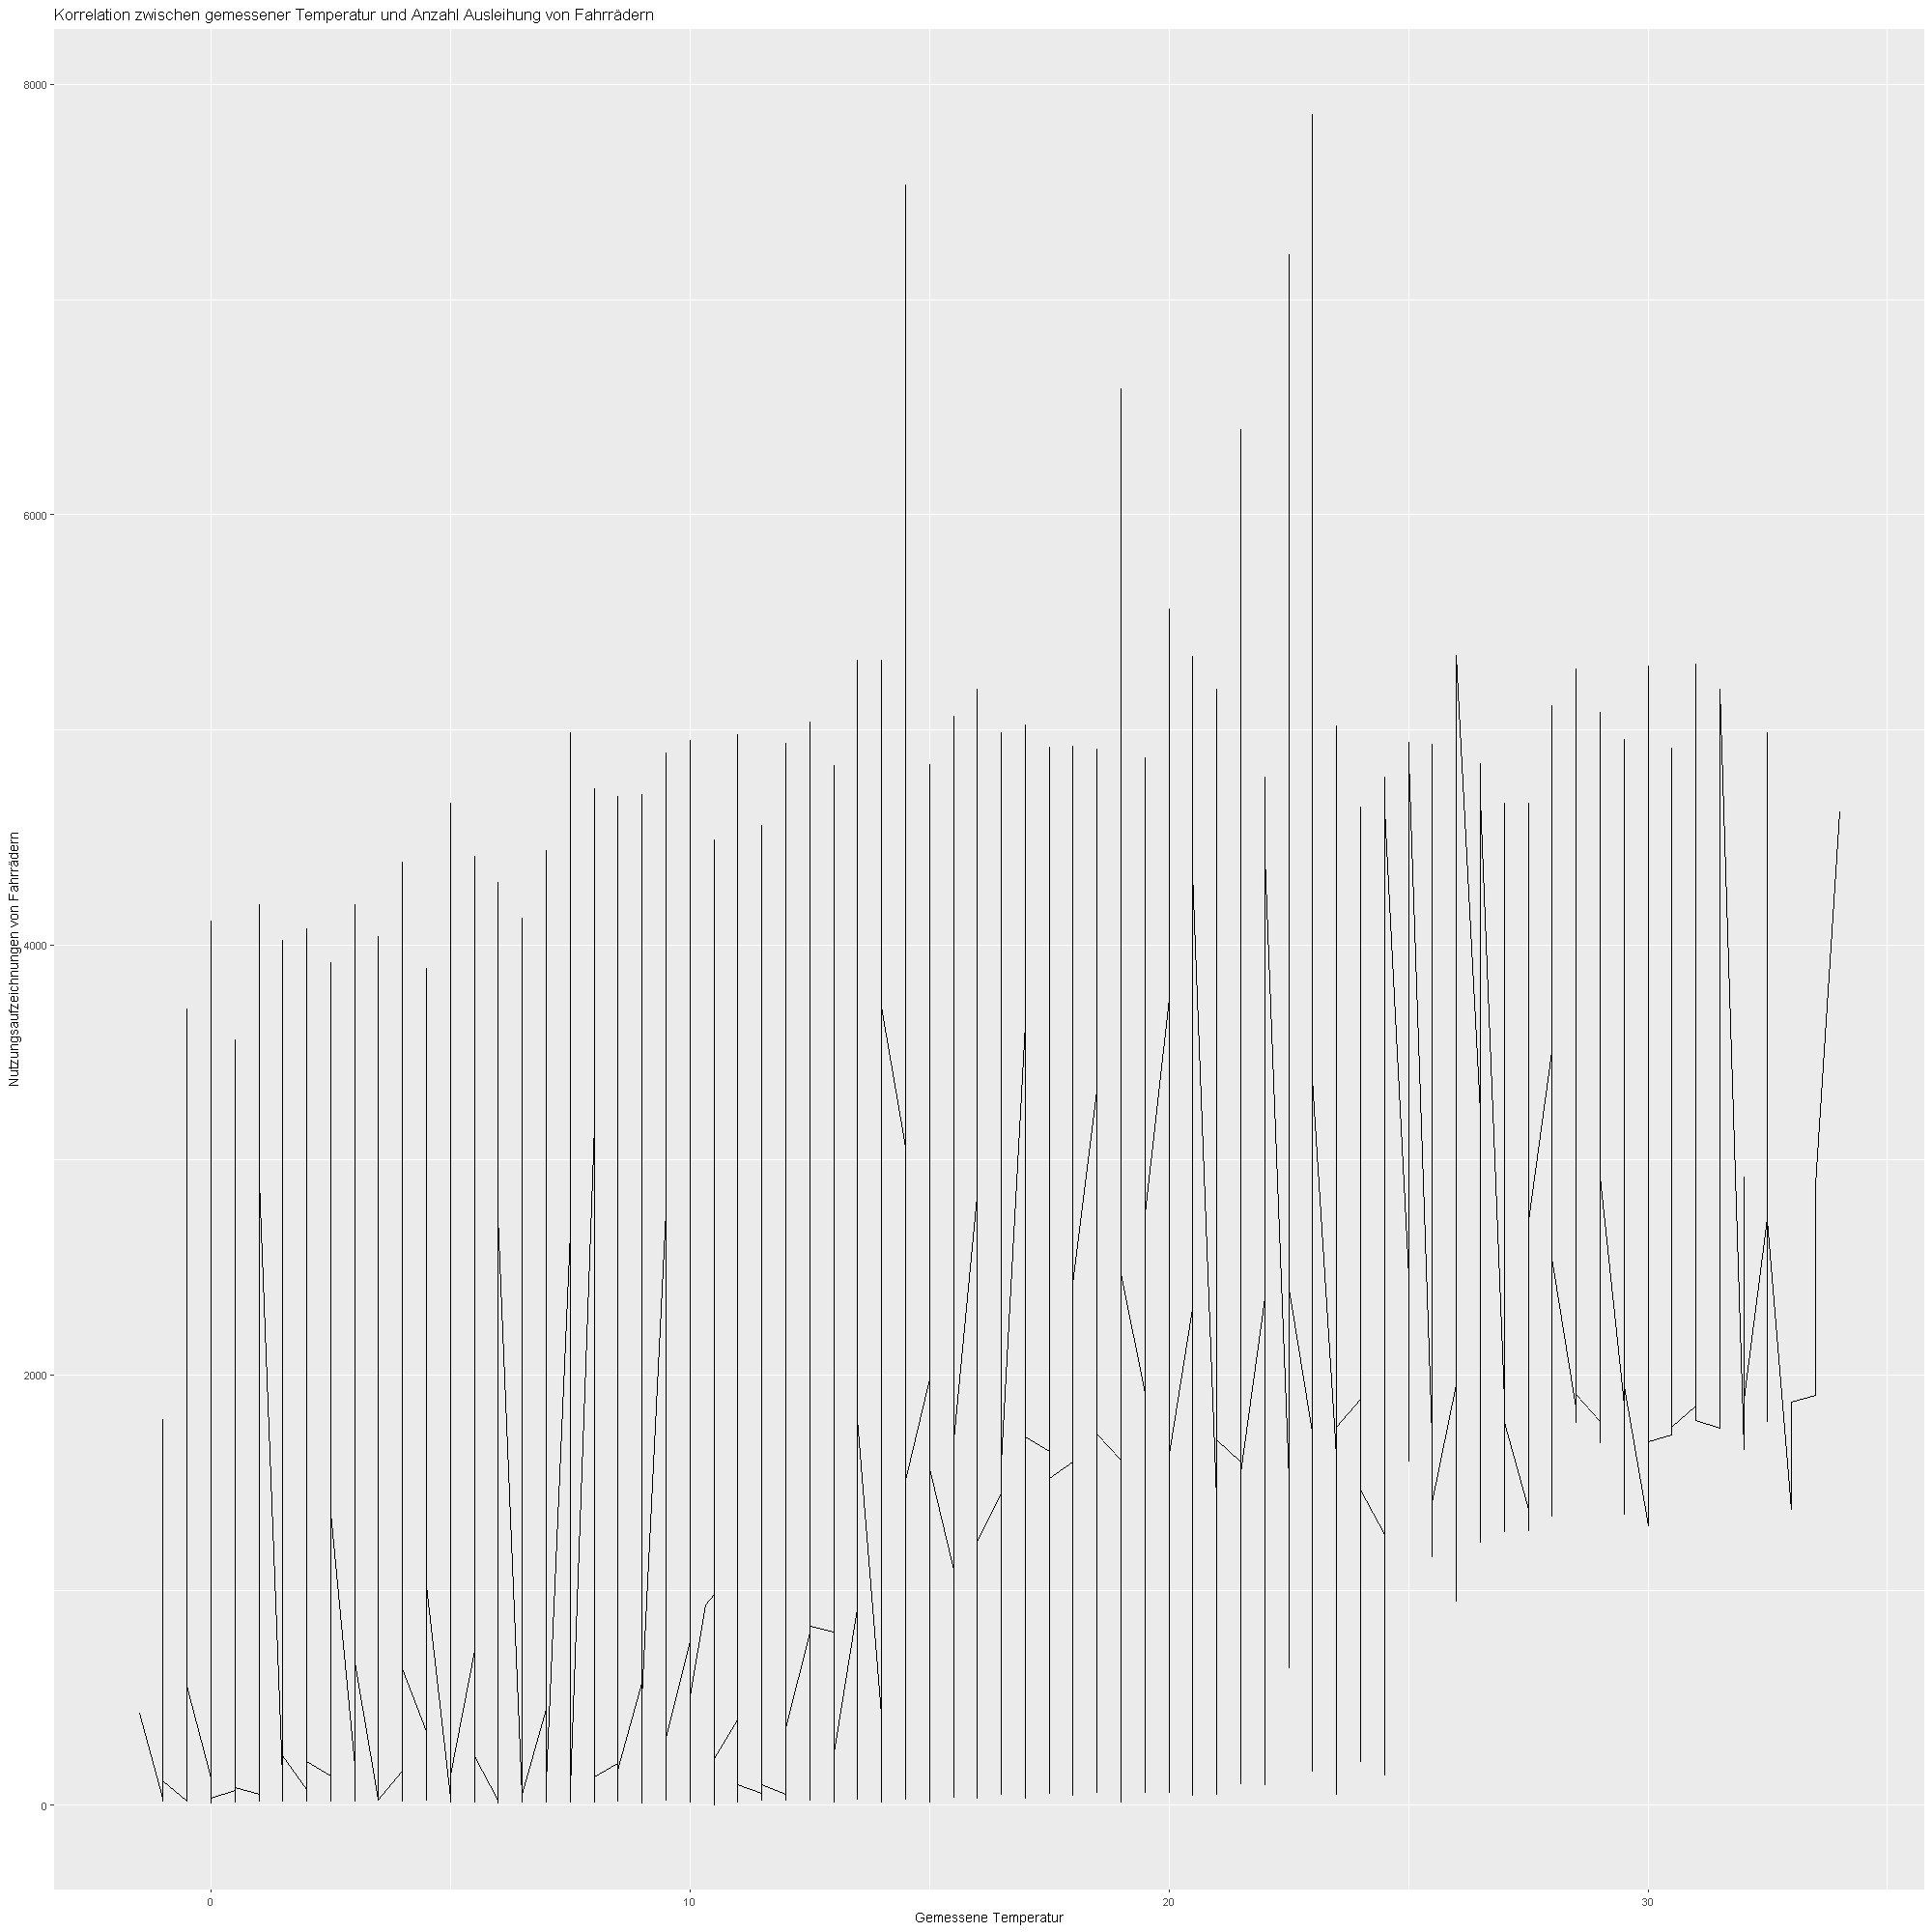

In [142]:
bike_data <- read.csv('london_bereinigt.csv', header = TRUE, sep = ";")

ggplot(data = bike_data, aes(x = t1, y = cnt)) + 
        geom_line() +
xlab("Gemessene Temperatur") +
ylab("Nutzungsaufzeichnungen von Fahrrädern") +
ggtitle("Korrelation zwischen gemessener Temperatur und Anzahl Ausleihung von Fahrrädern") +

theme(text = element_text(size = 10) ,
   

      )

### Balkendiagramm mit Anzahl Ausleihung von Fahrrädern und Temperatur

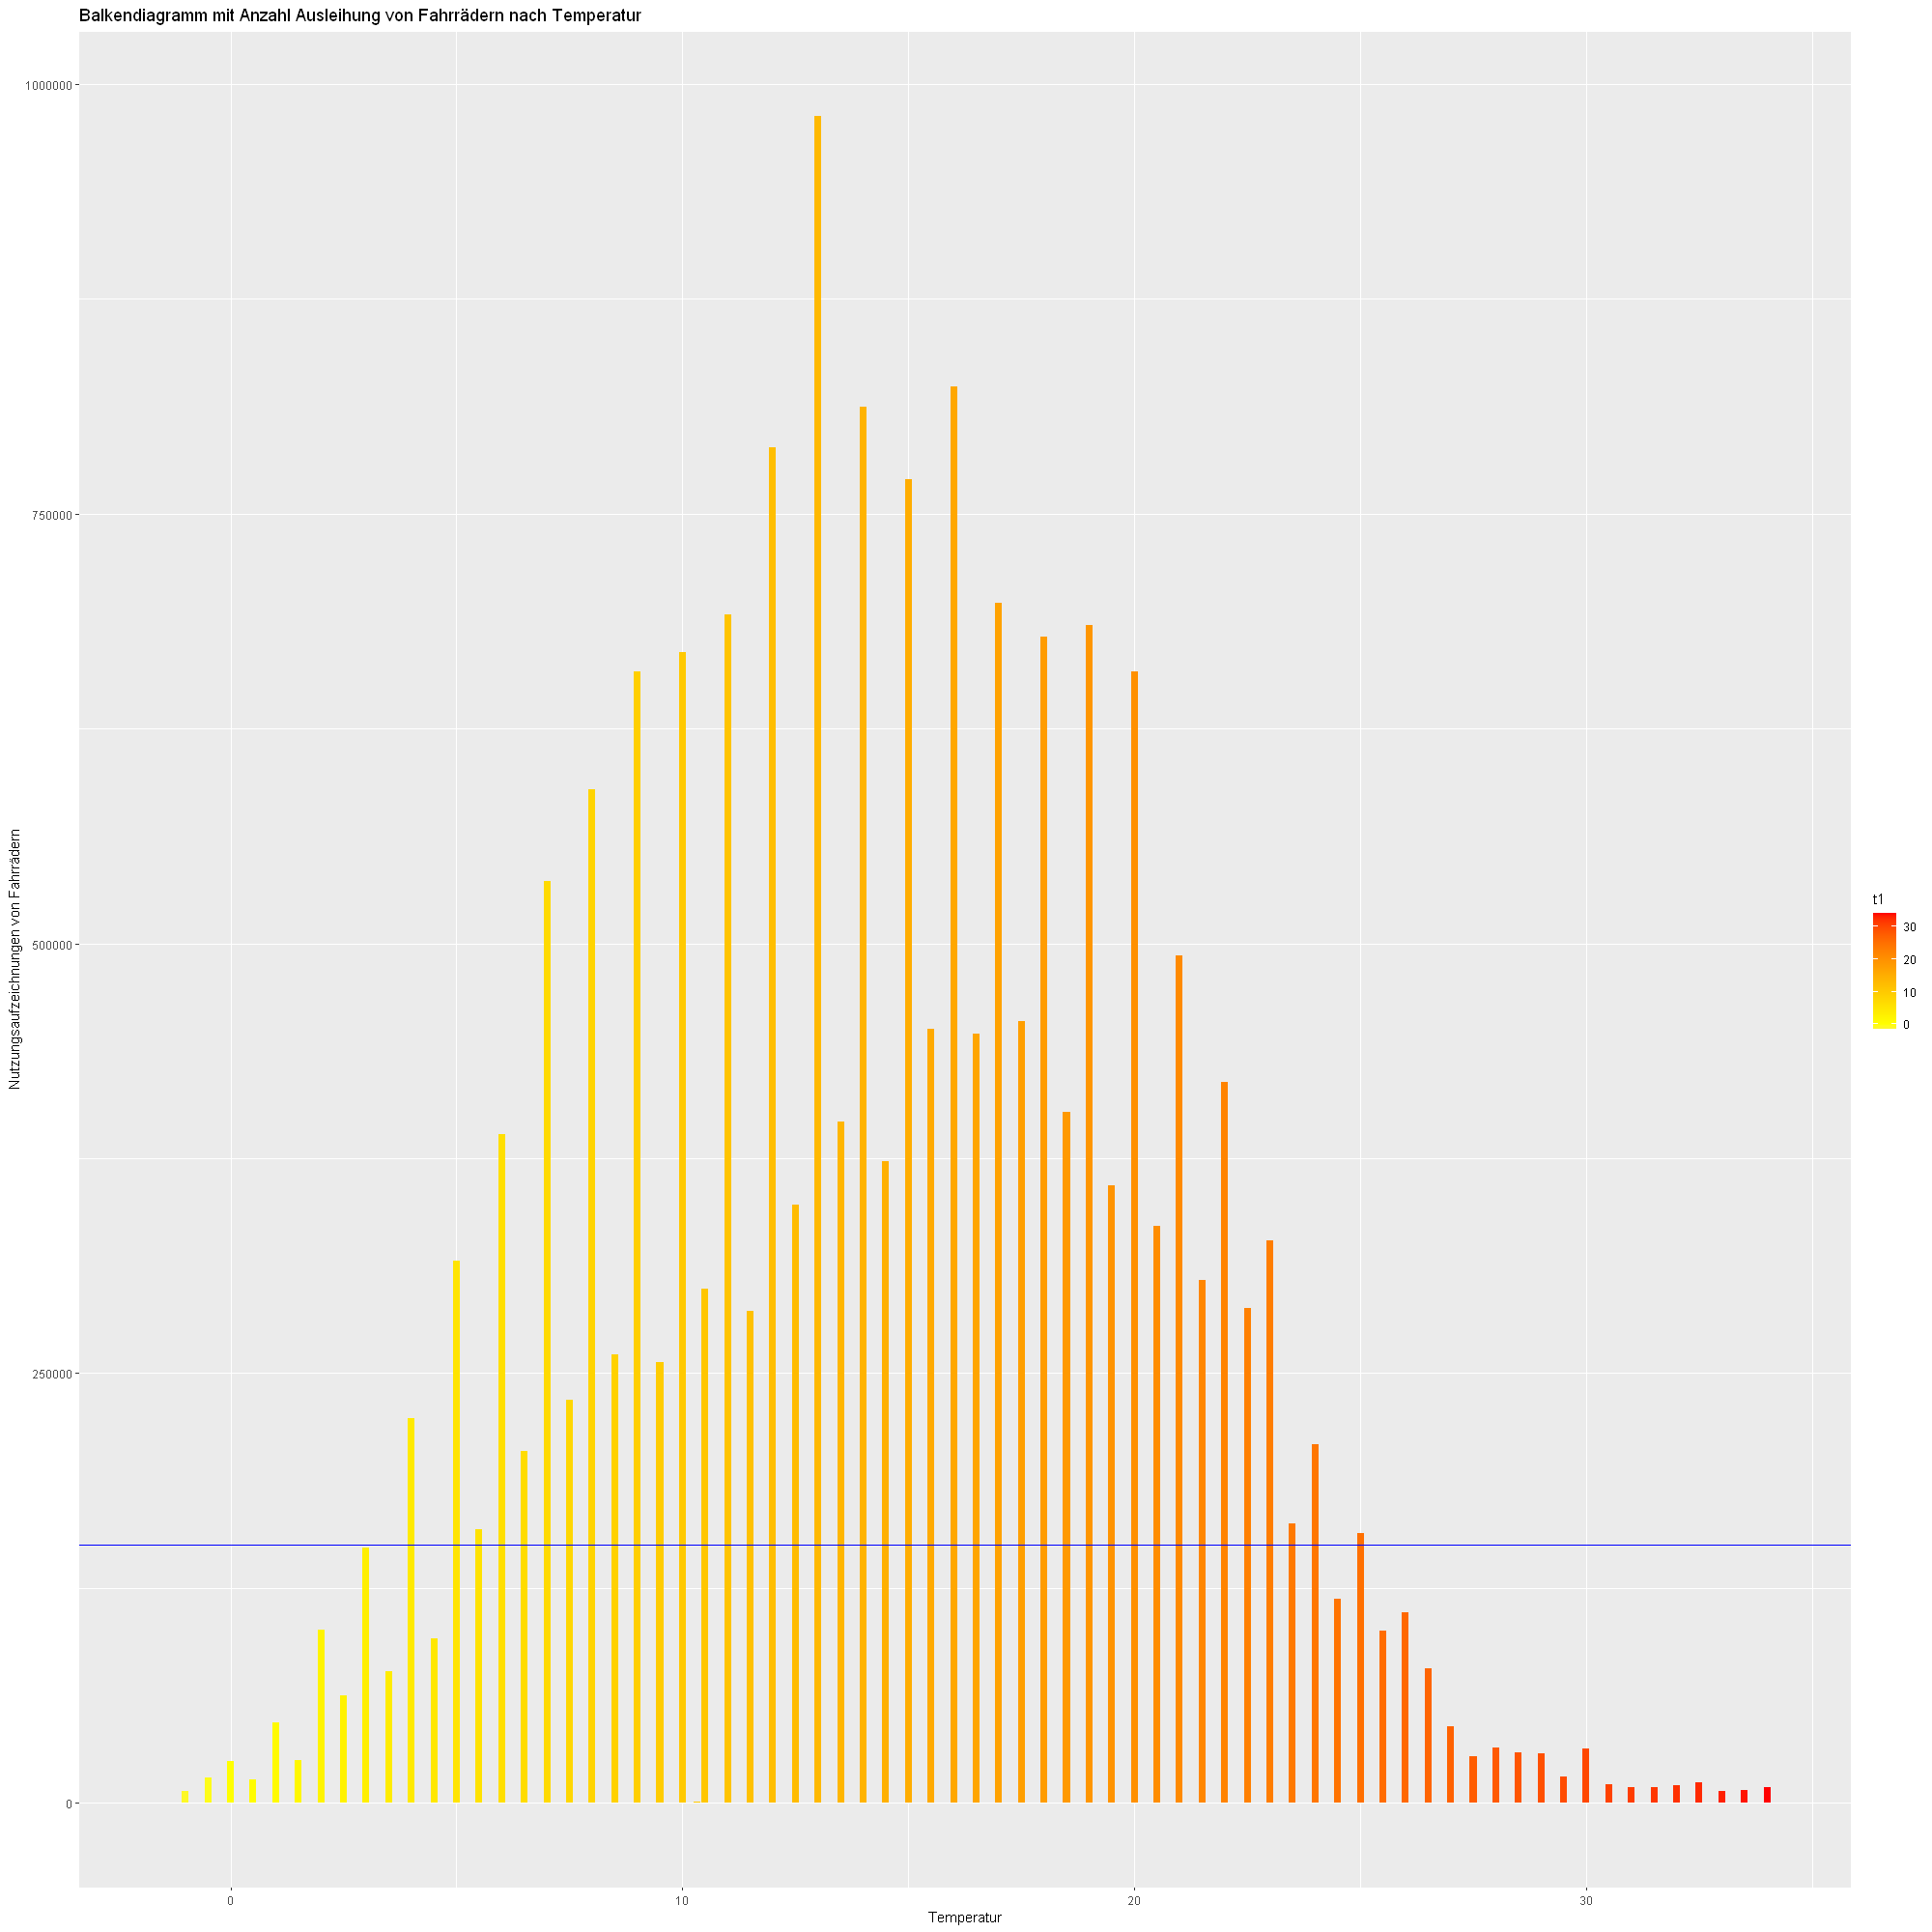

In [143]:
ggplot(data = bike_data, aes(x=t1, y=cnt, fill=t1)) +
       geom_col() +
 scale_fill_gradient2(low = "blue", high = "red", mid ="yellow") +
xlab("Temperatur") +
ylab("Nutzungsaufzeichnungen von Fahrrädern") +
geom_hline(yintercept = 150000, color = "blue", size = 0.5) +
ggtitle("Balkendiagramm mit Anzahl Ausleihung von Fahrrädern nach Temperatur")


# Reihenfolge funktioniert nicht (Farben)!! https://stackoverflow.com/questions/63518639/r-ggplot-scale-fill-gradient2-on-histogram-vs-dotplot **



### Visualisierung der Korrelation mit einer Heatmap

instant,date,time,hr,weekdays,month,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
1,2015-01-04,00:00:00,0,Sonntag,1,182,3.0,2.0,93.0,6.0,3,0,1,3
2,2015-01-04,01:00:00,1,Sonntag,1,138,3.0,2.5,93.0,5.0,1,0,1,3
3,2015-01-04,02:00:00,2,Sonntag,1,134,2.5,2.5,96.5,0.0,1,0,1,3
4,2015-01-04,03:00:00,3,Sonntag,1,72,2.0,2.0,100.0,0.0,1,0,1,3
5,2015-01-04,04:00:00,4,Sonntag,1,47,2.0,0.0,93.0,6.5,1,0,1,3
6,2015-01-04,05:00:00,5,Sonntag,1,46,2.0,2.0,93.0,4.0,1,0,1,3


instant,hr,month,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
1,0,1,182,3.0,2.0,93.0,6.0,3,0,1,3
2,1,1,138,3.0,2.5,93.0,5.0,1,0,1,3
3,2,1,134,2.5,2.5,96.5,0.0,1,0,1,3
4,3,1,72,2.0,2.0,100.0,0.0,1,0,1,3
5,4,1,47,2.0,0.0,93.0,6.5,1,0,1,3
6,5,1,46,2.0,2.0,93.0,4.0,1,0,1,3


,instant,hr,month,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
instant,1.00,0.00,0.47,0.04,0.13,0.14,0.12,-0.13,-0.02,0.03,0.00,0.12
hr,0.00,1.00,0.00,0.32,0.17,0.15,-0.30,0.14,-0.04,0.00,0.00,0.00
month,0.47,0.00,1.00,0.06,0.33,0.37,0.11,-0.09,-0.03,-0.01,-0.01,0.20
cnt,0.04,0.32,0.06,1.00,0.39,0.37,-0.46,0.12,-0.17,-0.05,-0.10,-0.12
t1,0.13,0.17,0.33,0.39,1.00,0.99,-0.45,0.15,-0.10,-0.04,-0.01,-0.29
t2,0.14,0.15,0.37,0.37,0.99,1.00,-0.40,0.09,-0.10,-0.04,-0.01,-0.29


Var1,Var2,value
instant,instant,1.00
hr,instant,0.00
month,instant,0.47
cnt,instant,0.04
t1,instant,0.13
t2,instant,0.14


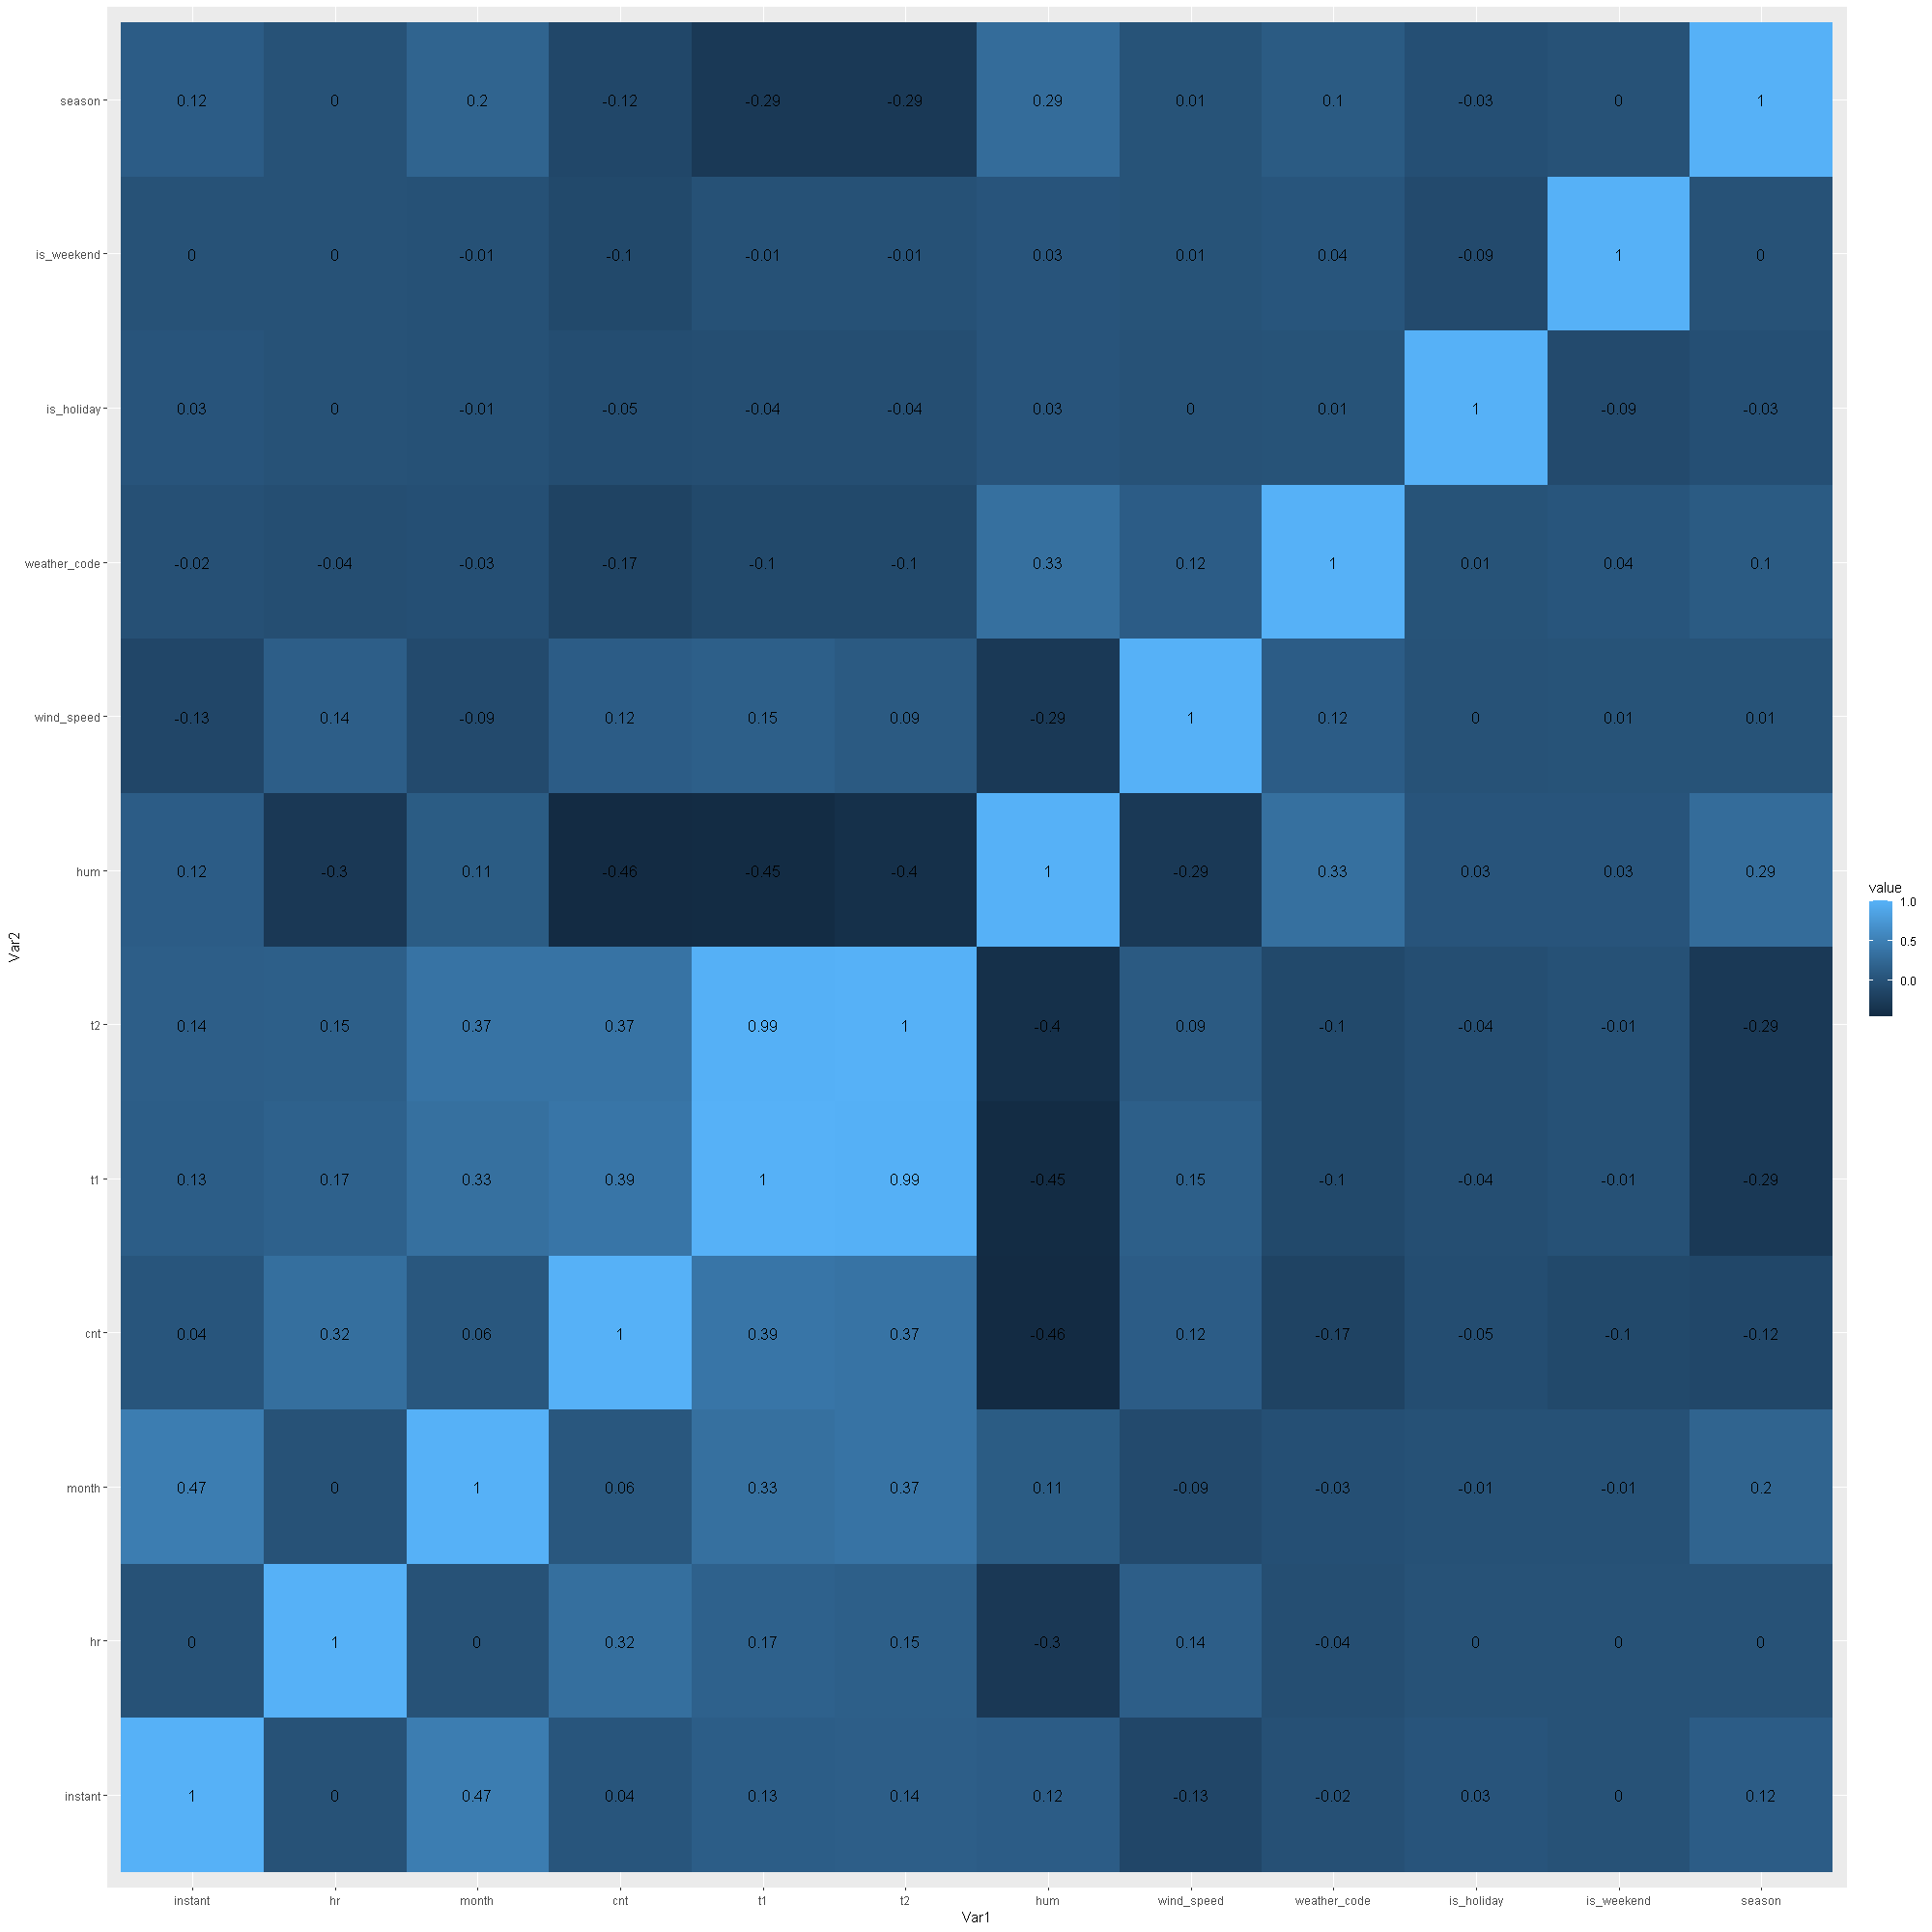

In [144]:
install.packages("reshape2")
library(reshape2)
bike_data <- read.csv('london_bereinigt.csv', header = TRUE, sep = ";")
head (bike_data)
# Strings ausgeklammert da hier noch eine Umformatierung in Int vorgenommen werden müsste
df = subset(bike_data, select = -c(weekdays, date, time))
head(df)
# Korrelation Matrix erstellen und Korrelation Koeffizienten auf zwei Dezimalstellen runden
cormat <- round(cor(df), 2)
head(cormat)
melted_cormat <- melt(cormat)
head(melted_cormat)
# Korrelation plotten
library(ggplot2)
ggplot(data = melted_cormat, aes(x=Var1, y=Var2, fill=value)) + 
  geom_tile() +
geom_text(aes(Var2, Var1, label = value),
          color = "black", size = 4)


### Visualisierung der Korrelation mit einer Heatmap - Neue Anordnung der Werte


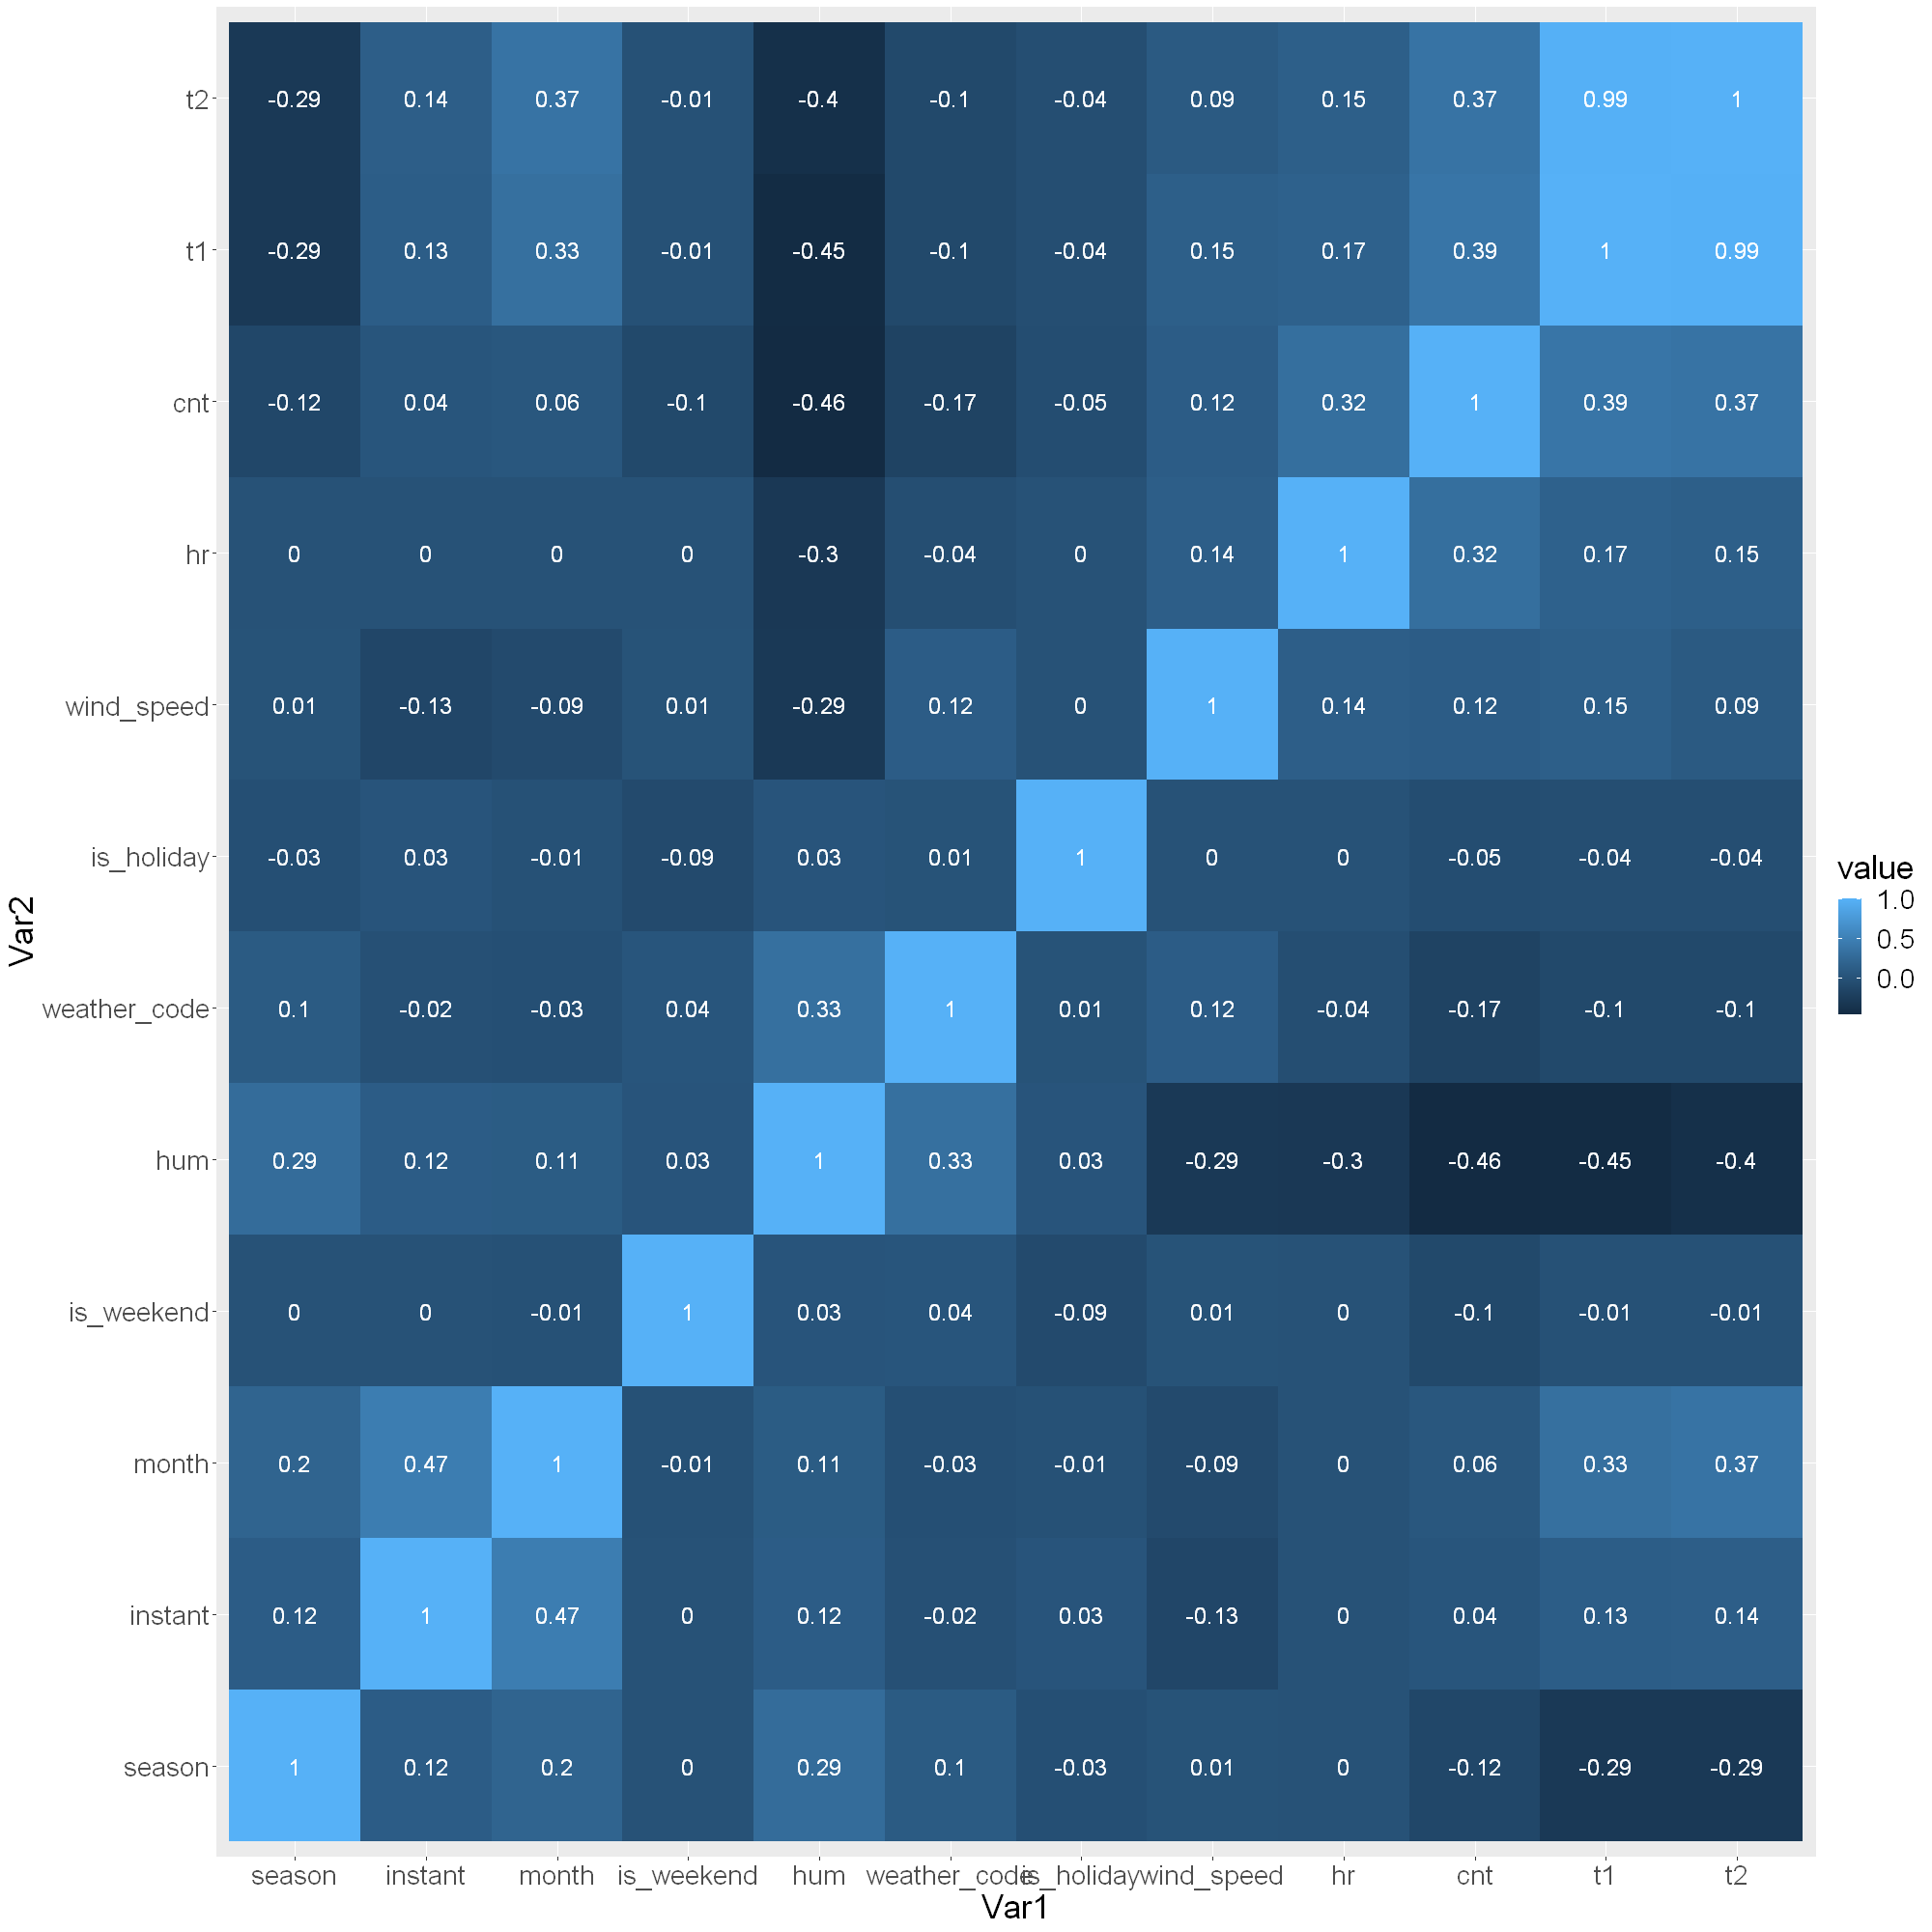

In [146]:
install.packages("reshape2")
library(reshape2)
bike_data <- read.csv('london_bereinigt.csv', header = TRUE, sep = ";")
df = subset(bike_data, select = -c(weekdays, date, time))
cormat <- round(cor(df), 2)
dist <- as.dist((1-cormat)/2)
# Hirachisches Clustern der Matrix
hc <- hclust(dist)
cormat <- cormat[hc$order, hc$order]
melted_cormat <- melt(cormat)
library(ggplot2)
ggplot(data = melted_cormat, aes(x=Var1, y=Var2, fill=value)) + 
  geom_tile() +
geom_text(aes(Var2, Var1, label = value),
          color = "white", size = 6)+



#Aussehen Editing
theme(text = element_text(size = 25) ,

      )



options(repr.plot.width = 20, repr.plot.height = 20, repr.plot.res = 100)


### Balkendiagramm mit Anzahl Ausleihung von Fahrrädern und Temperatur (gemessene Temperatur - t1)

instant,date,time,hr,weekdays,month,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
1,2015-01-04,00:00:00,0,Sonntag,1,182,3.0,2.0,93.0,6.0,3,0,1,3
2,2015-01-04,01:00:00,1,Sonntag,1,138,3.0,2.5,93.0,5.0,1,0,1,3
3,2015-01-04,02:00:00,2,Sonntag,1,134,2.5,2.5,96.5,0.0,1,0,1,3
4,2015-01-04,03:00:00,3,Sonntag,1,72,2.0,2.0,100.0,0.0,1,0,1,3
5,2015-01-04,04:00:00,4,Sonntag,1,47,2.0,0.0,93.0,6.5,1,0,1,3
6,2015-01-04,05:00:00,5,Sonntag,1,46,2.0,2.0,93.0,4.0,1,0,1,3


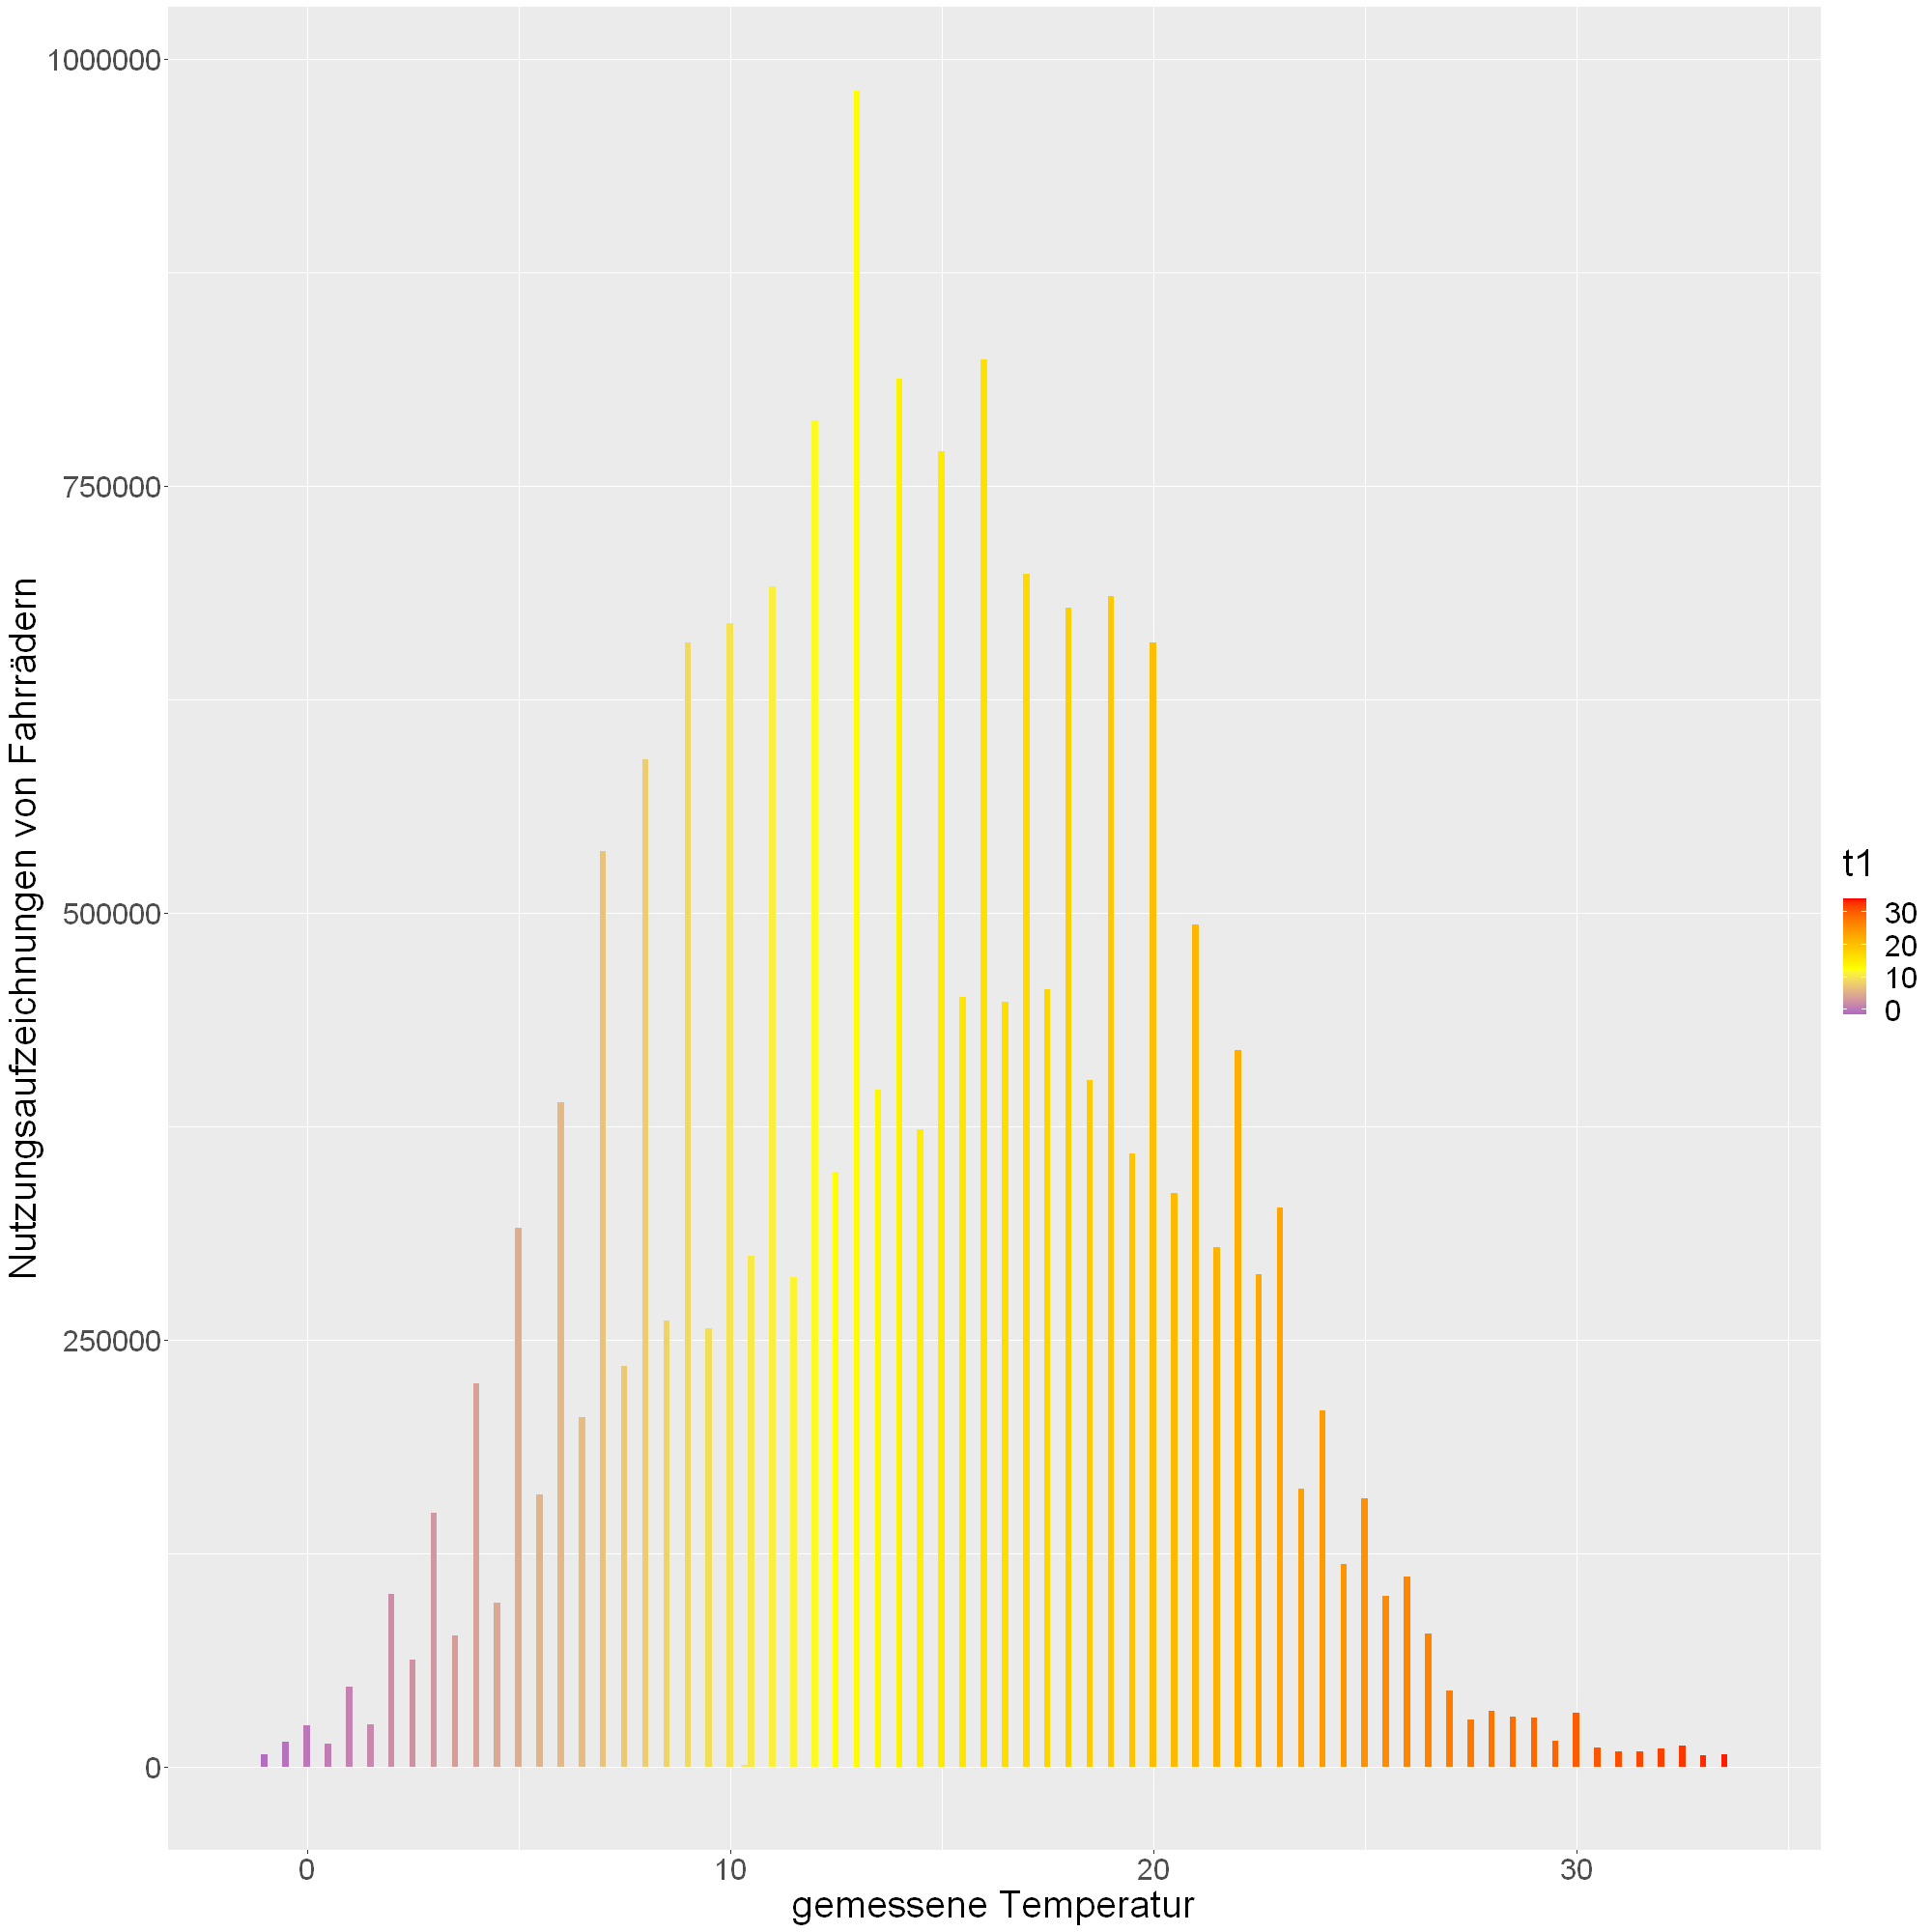

In [129]:
bike_data <- read.csv('london_bereinigt.csv', header = TRUE, sep = ";")
head(bike_data)
d <- ggplot(bike_data, aes(t1, cnt, fill = t1))
# gemäss summary Min t1: -1.5, Max t1: 34, Median t1: 12.5
d + geom_col() + scale_x_continuous(limits=c(-1.5,34)) +
scale_fill_gradient2(
    low = "blue", high = "red",
    mid = "yellow", midpoint=12.5) +
xlab("gemessene Temperatur") +
ylab("Nutzungsaufzeichnungen von Fahrrädern") +

#Aussehen Editing
theme(text = element_text(size = 28) ,
     
      )



options(repr.plot.width = 20, repr.plot.height = 20, repr.plot.res = 100)

### Balkendiagramm mit Anzahl Ausleihung von Fahrrädern und Temperatur (gefühlte Temperatur - t2)

instant,date,time,hr,weekdays,month,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
1,2015-01-04,00:00:00,0,Sonntag,1,182,3.0,2.0,93.0,6.0,3,0,1,3
2,2015-01-04,01:00:00,1,Sonntag,1,138,3.0,2.5,93.0,5.0,1,0,1,3
3,2015-01-04,02:00:00,2,Sonntag,1,134,2.5,2.5,96.5,0.0,1,0,1,3
4,2015-01-04,03:00:00,3,Sonntag,1,72,2.0,2.0,100.0,0.0,1,0,1,3
5,2015-01-04,04:00:00,4,Sonntag,1,47,2.0,0.0,93.0,6.5,1,0,1,3
6,2015-01-04,05:00:00,5,Sonntag,1,46,2.0,2.0,93.0,4.0,1,0,1,3


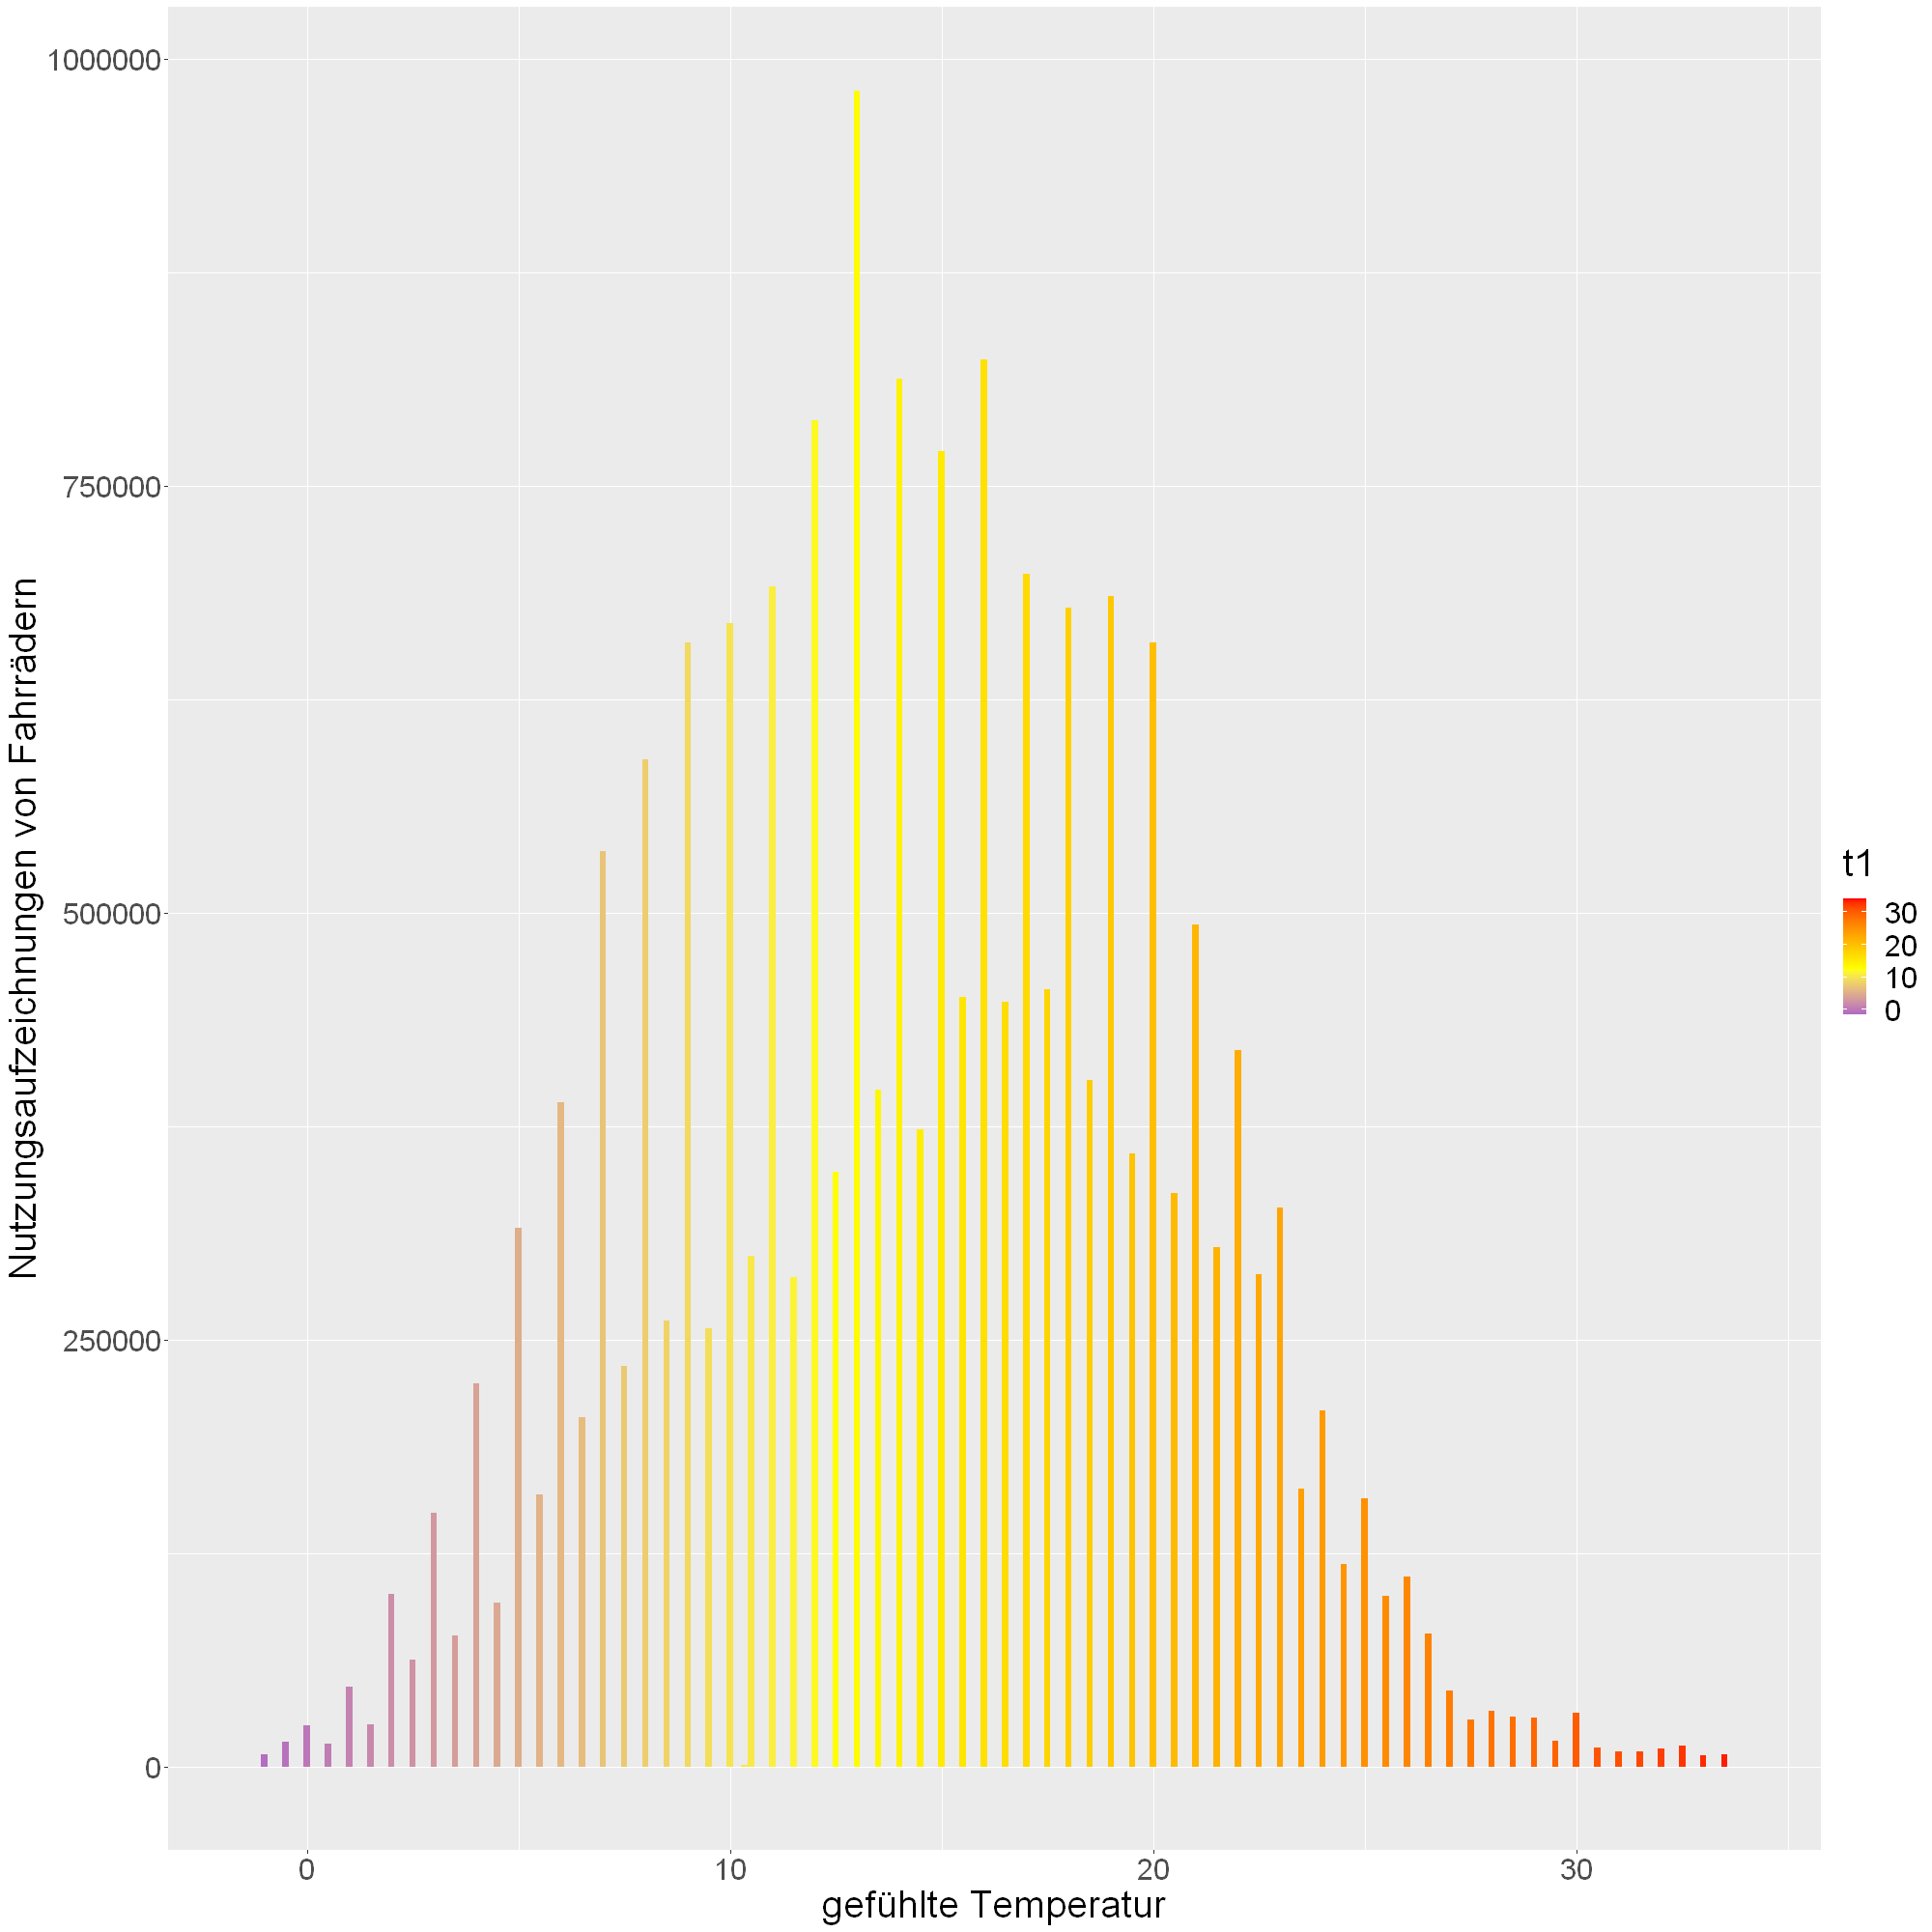

In [134]:
bike_data <- read.csv('london_bereinigt.csv', header = TRUE, sep = ";")
head(bike_data)
d <- ggplot(bike_data, aes(t1, cnt, fill = t1))
# gemäss summary Min t2: -6, Max t2: 34, Median t2: 12.5
d + geom_col() + scale_x_continuous(limits=c(-1.5,34)) +
scale_fill_gradient2(
    low = "blue", high = "red",
    mid = "yellow", midpoint=12.5) + 
xlab("gefühlte Temperatur") +
ylab("Nutzungsaufzeichnungen von Fahrrädern") +


#Aussehen Editing
theme(text = element_text(size = 28) ,
 
      )



options(repr.plot.width = 20, repr.plot.height = 20, repr.plot.res = 100)

### Ausleihen nach Saison - Versuch 1

instant,date,time,hr,weekdays,month,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
1,2015-01-04,00:00:00,0,Sonntag,1,182,3.0,2.0,93.0,6.0,3,0,1,3
2,2015-01-04,01:00:00,1,Sonntag,1,138,3.0,2.5,93.0,5.0,1,0,1,3
3,2015-01-04,02:00:00,2,Sonntag,1,134,2.5,2.5,96.5,0.0,1,0,1,3
4,2015-01-04,03:00:00,3,Sonntag,1,72,2.0,2.0,100.0,0.0,1,0,1,3
5,2015-01-04,04:00:00,4,Sonntag,1,47,2.0,0.0,93.0,6.5,1,0,1,3
6,2015-01-04,05:00:00,5,Sonntag,1,46,2.0,2.0,93.0,4.0,1,0,1,3


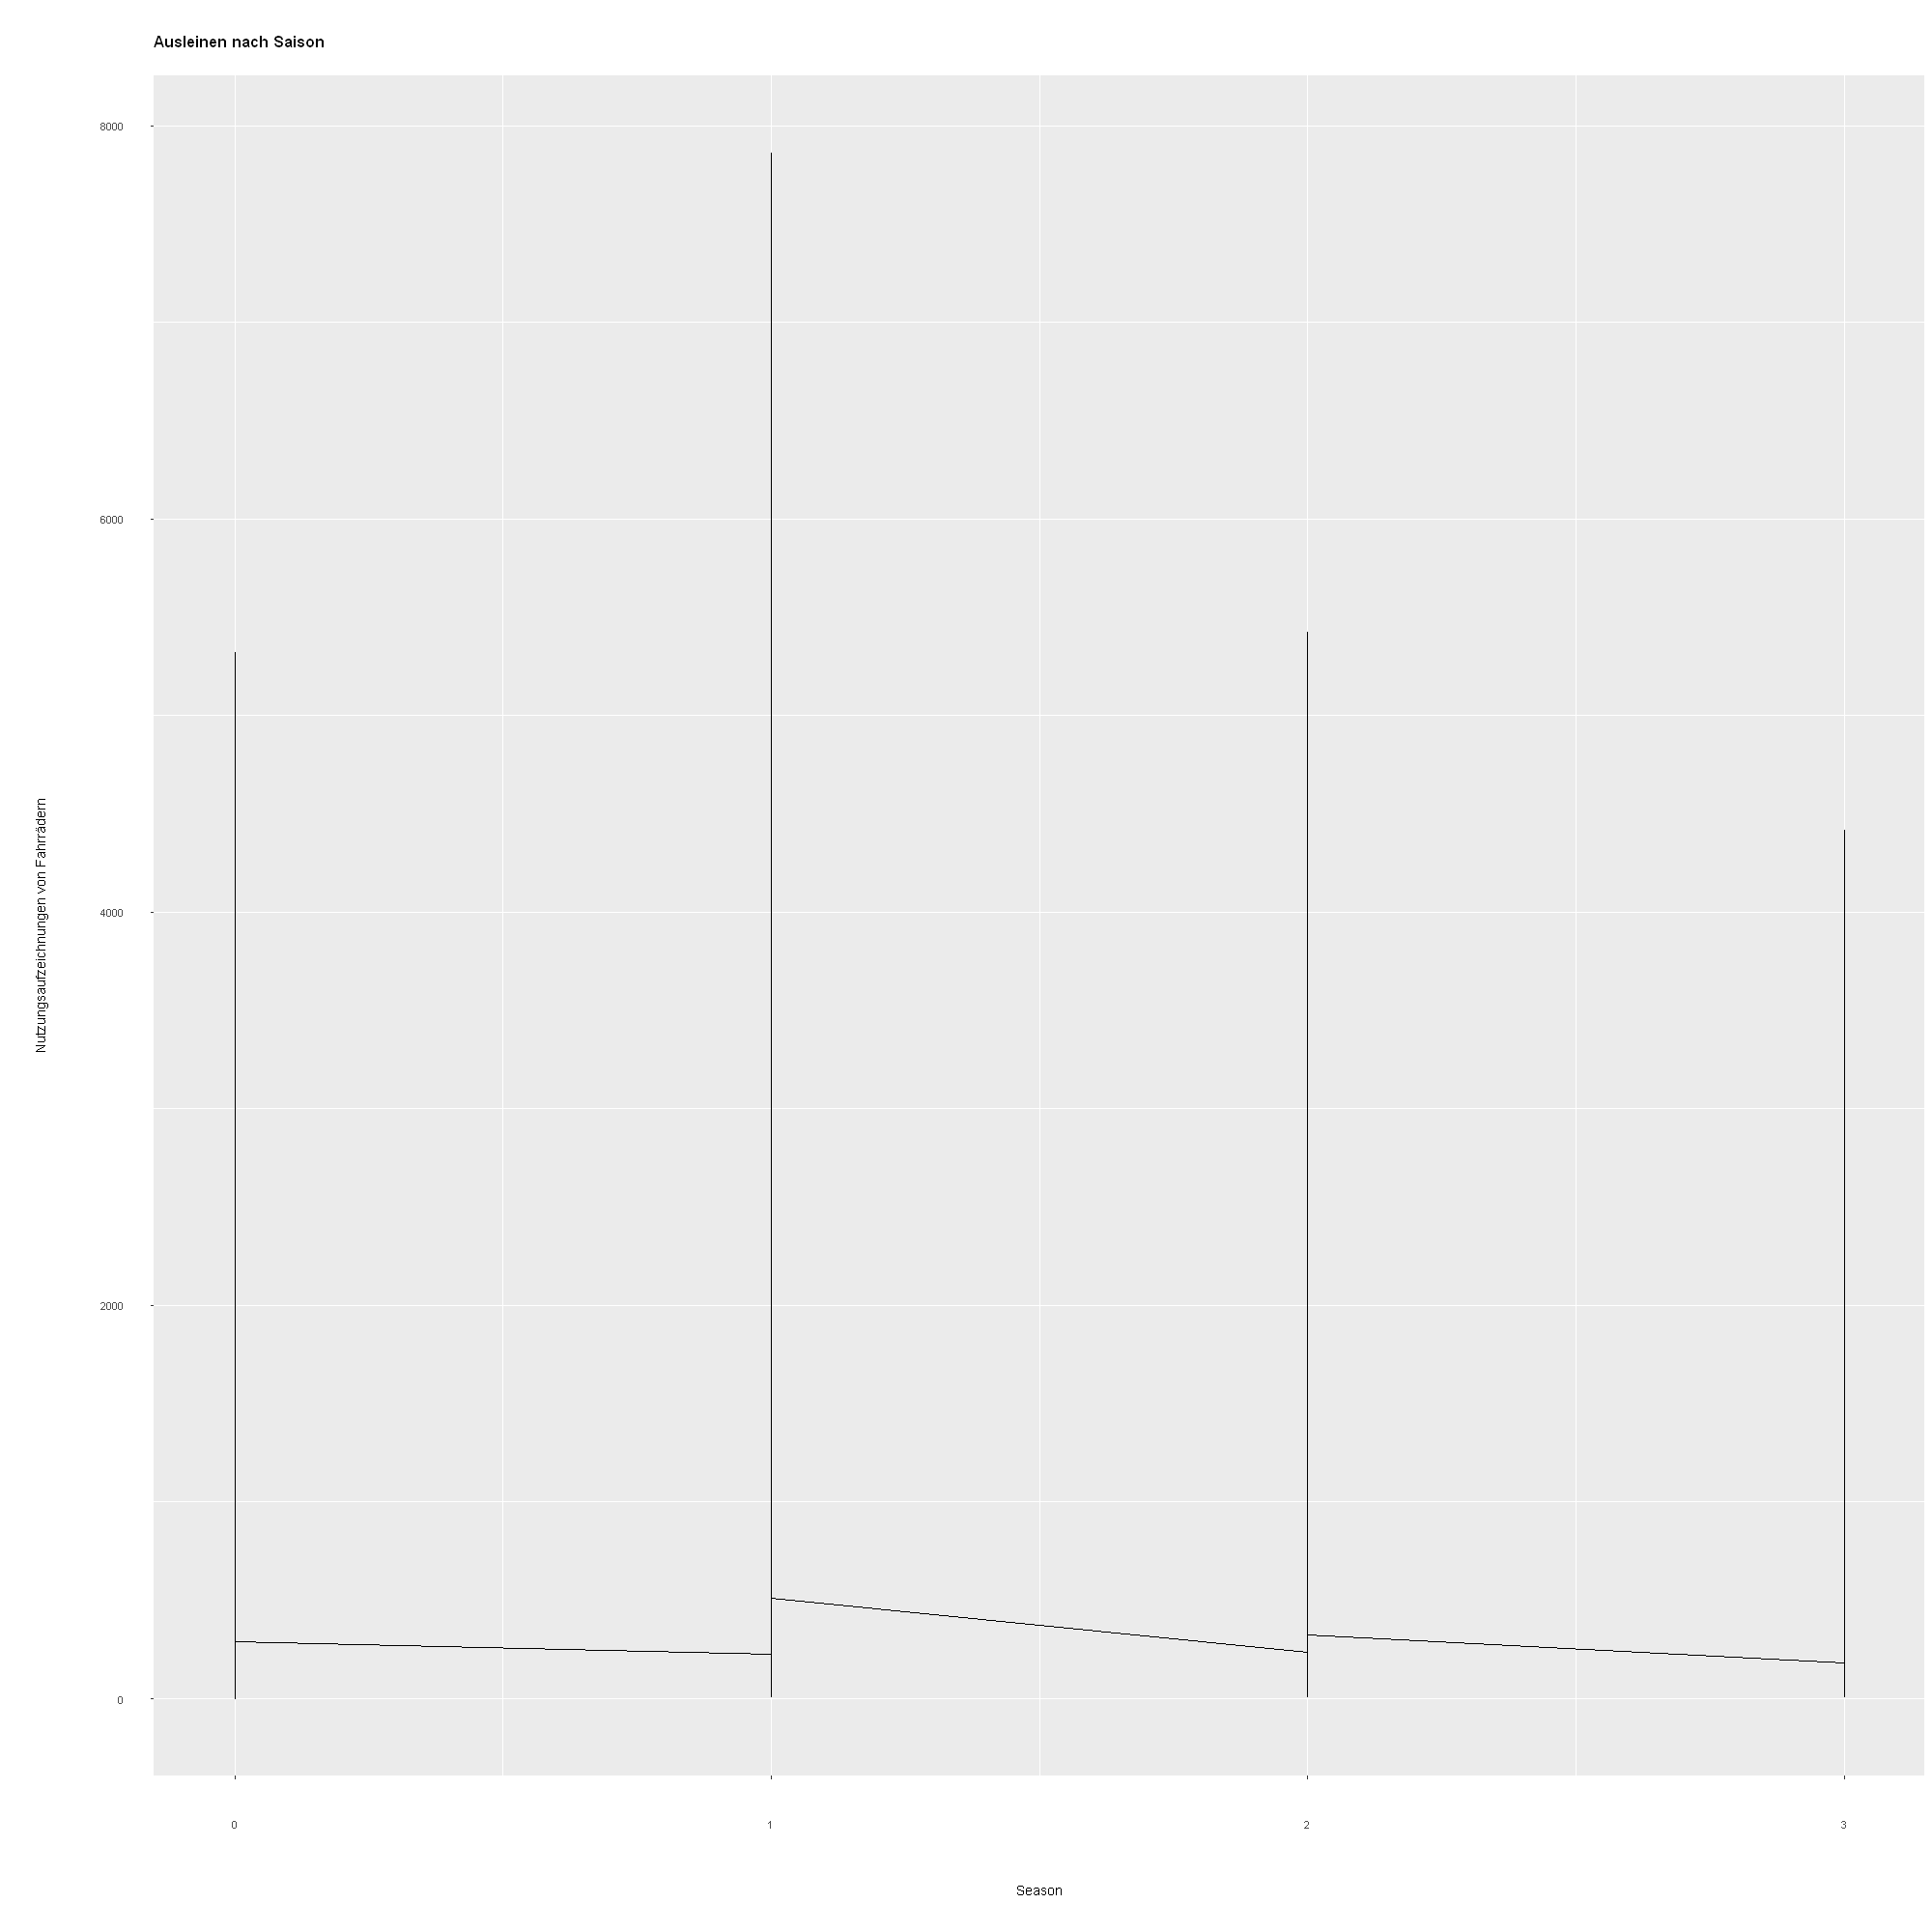

In [70]:
bike_data <- read.csv('london_bereinigt.csv', header = TRUE, sep = ";")
head(bike_data)

ggplot(data = bike_data, aes(x = season, y = cnt )) + 
        geom_line() +
xlab("Season") +
ylab("Nutzungsaufzeichnungen von Fahrrädern") +
ggtitle("Ausleinen nach Saison") +

theme(text = element_text(size = 10) ,
      axis.title.y = element_text(margin = margin(t = 0, r = 40, b = 0, l = 20)),
      axis.title.x = element_text(margin = margin(t = 40, r = 00, b = 20, l = 0)),
      axis.text.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 0)),
      axis.text.x = element_text(margin = margin(t = 30, r = 0, b = 0, l = 0)),
      plot.title = element_text(face="bold" , margin = margin(t = 20, r = 0, b = 20, l = 0))
      )


### Anzahl Ausleihung von Fahrrädern nach Saison - Versuch 1

instant,date,time,hr,weekdays,month,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
1,2015-01-04,00:00:00,0,Sonntag,1,182,3.0,2.0,93.0,6.0,3,0,1,3
2,2015-01-04,01:00:00,1,Sonntag,1,138,3.0,2.5,93.0,5.0,1,0,1,3
3,2015-01-04,02:00:00,2,Sonntag,1,134,2.5,2.5,96.5,0.0,1,0,1,3
4,2015-01-04,03:00:00,3,Sonntag,1,72,2.0,2.0,100.0,0.0,1,0,1,3
5,2015-01-04,04:00:00,4,Sonntag,1,47,2.0,0.0,93.0,6.5,1,0,1,3
6,2015-01-04,05:00:00,5,Sonntag,1,46,2.0,2.0,93.0,4.0,1,0,1,3


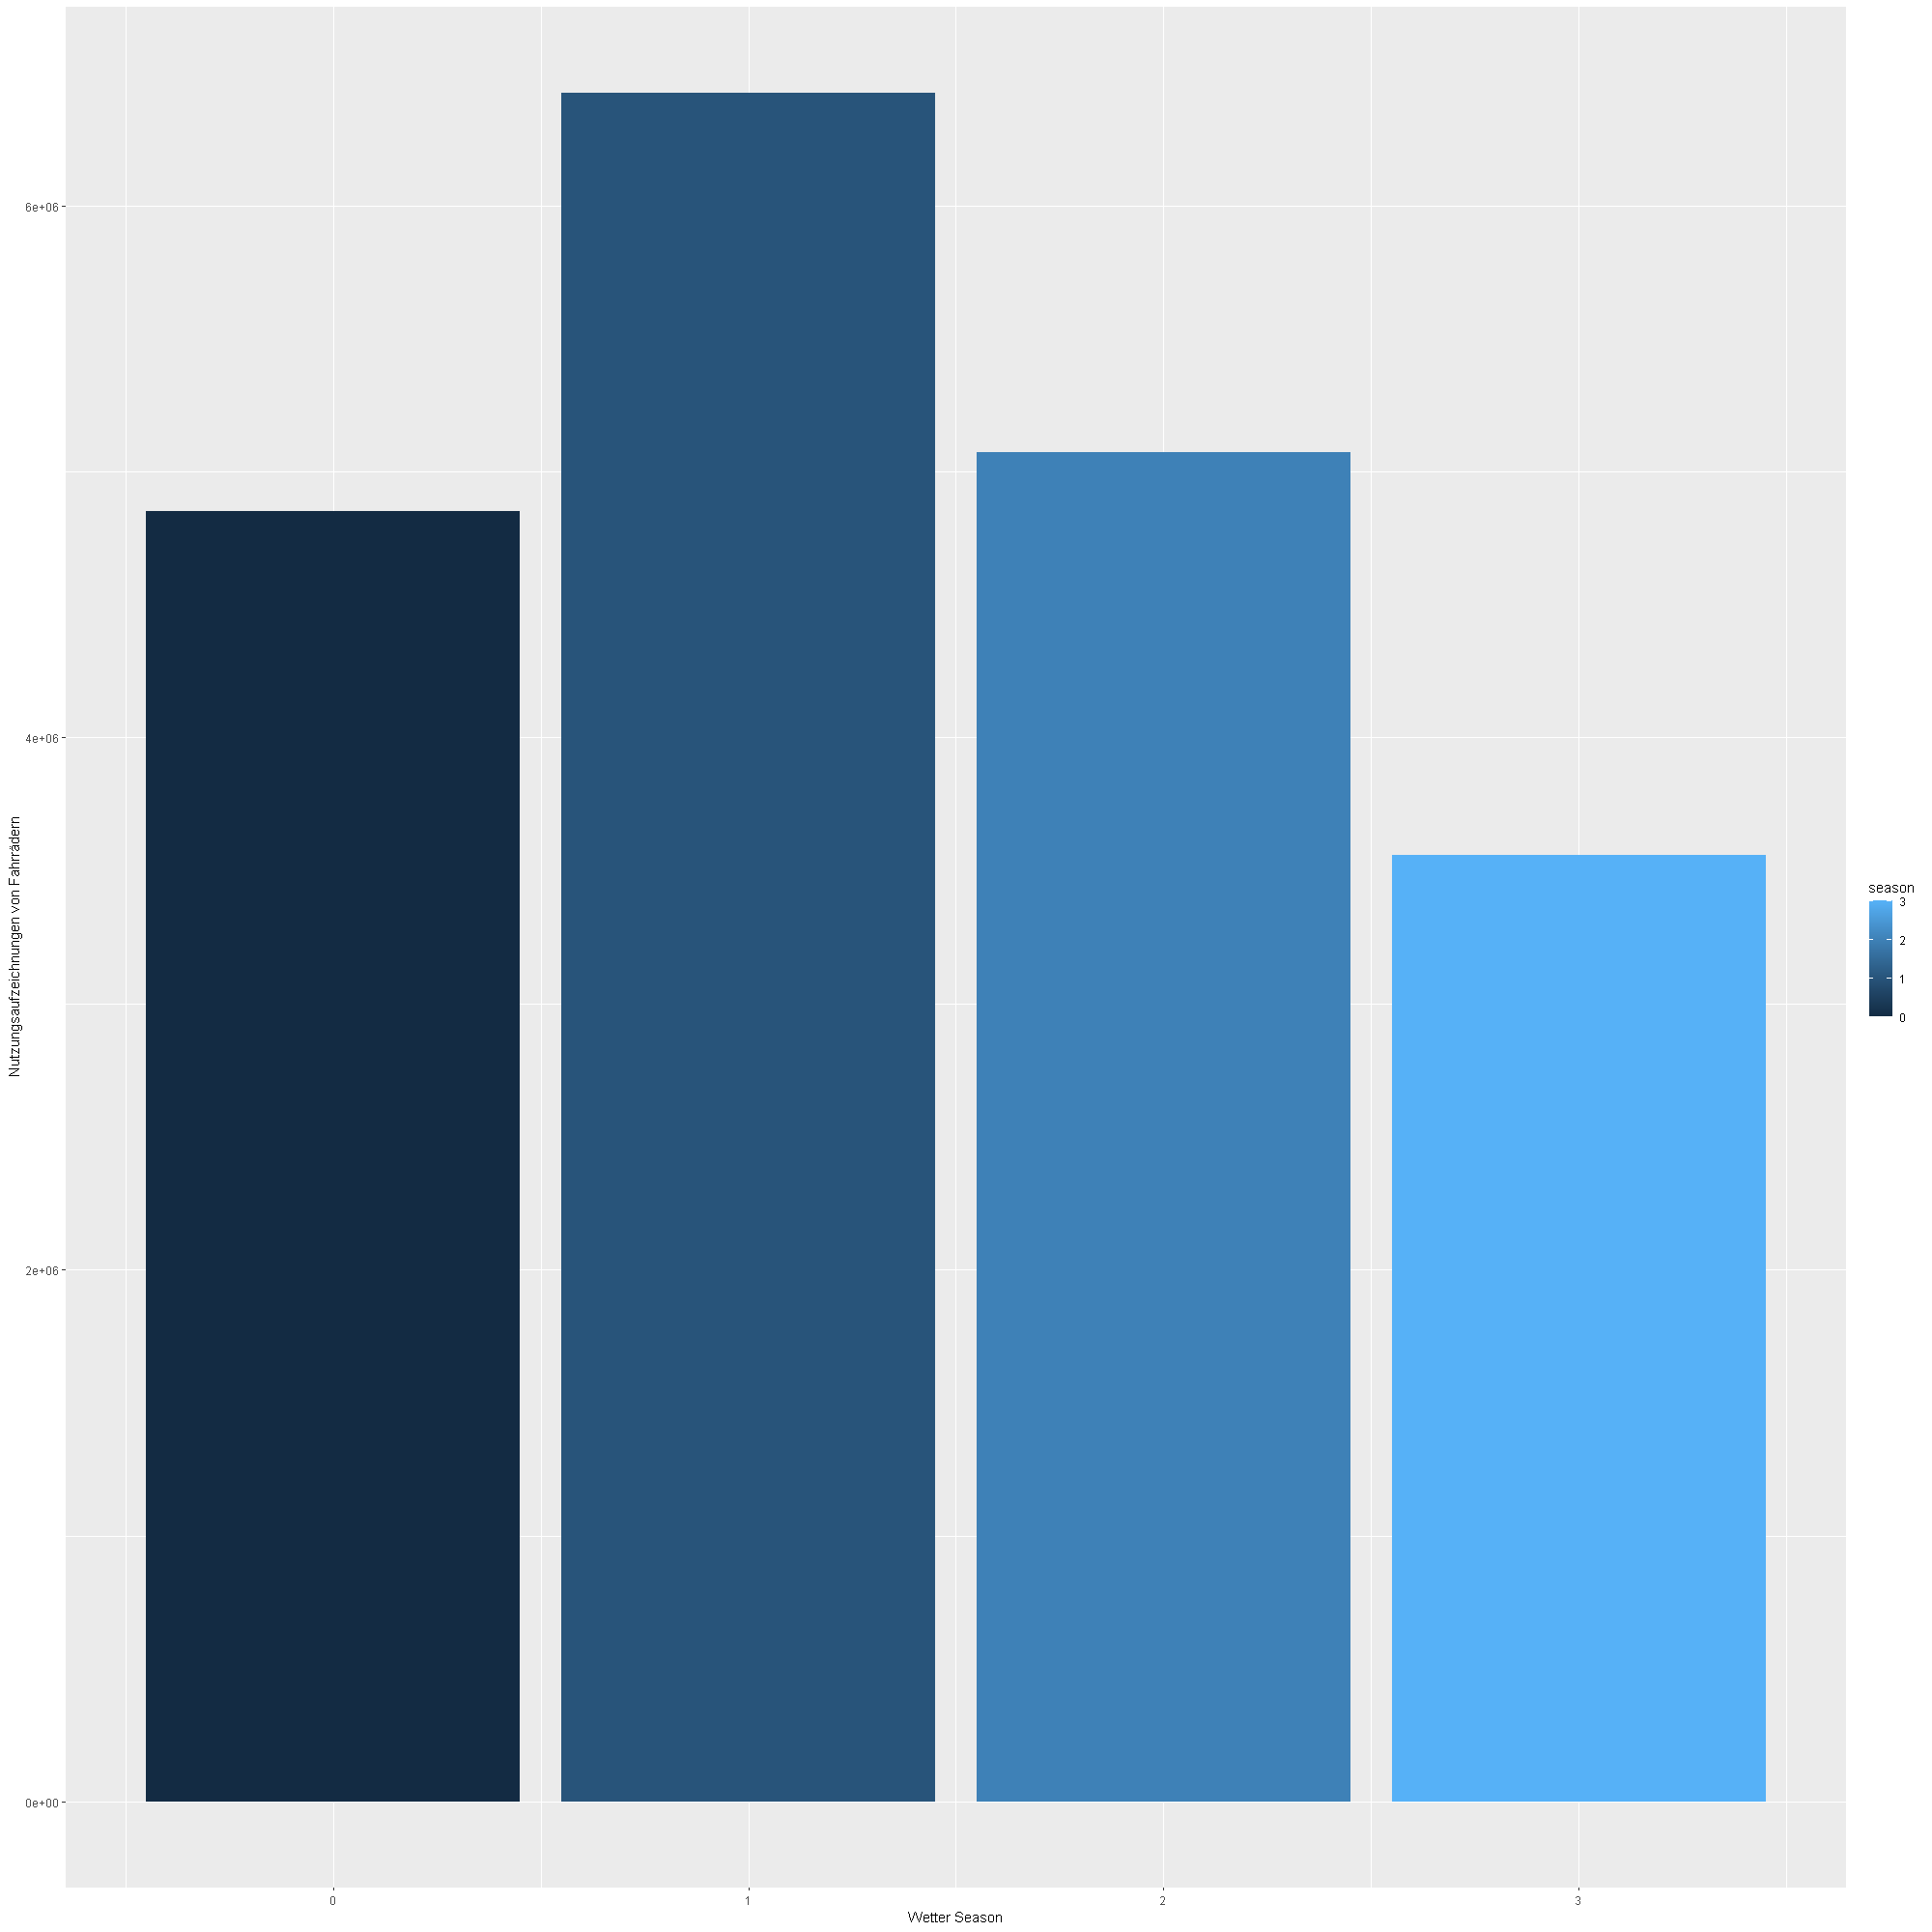

In [71]:
bike_data <- read.csv('london_bereinigt.csv', header = TRUE, sep = ";")
head(bike_data)
d <- ggplot(bike_data, aes(season, cnt, fill = season))
d + geom_col() + 
xlab("Wetter Season") +
ylab("Nutzungsaufzeichnungen von Fahrrädern") 

### Anzahl Ausleihung von Fahrrädern nach Saison - Versuch 2 auf Basis der Vorlage von kaggle - Dataset Bereinigung und Umbenennung von einzelnen Variablen

In [72]:
## Importing packages

library(tidyverse) # metapackage with lots of helpful functions
library(RColorBrewer)
library(scales)
library(lubridate)
options(warn=-1)
library(ggcorrplot)
library(lattice)

b <- read_csv('london_merged.csv');

head (b, 5)

# ---  change some names for clarity str(b)  ----#
b <- b %>% rename("Rentals" = "cnt",
                  "Temperature" = "t1",
                  "Feels like Temperature" = "t2",
                  "Humidity" = "hum",
                  "Season" = 'season',
                  'Weather' = 'weather_code',
                  'Windspeed' = 'wind_speed',
                  'Workday' = 'is_weekend')

# order the columns and put the target variable first
b <- b %>% select("Rentals", "Temperature", "Feels like Temperature", "Humidity", "timestamp",
                  Season, Weather, Windspeed, Workday)


#format the Month and day as a number that can be ordered as a factor
b$date <- as.character(b$timestamp, format = "%e/%d/%y")
# create month day as a number that we can order as a factor
b$Month <- as.character(b$timestamp, format = "%m")
b$month <- as.character(b$timestamp, format = "%m")
b$Day <- as.character(b$timestamp, format = "%u")
b$day <- as.character(b$timestamp, format = "%u")
b$Hour <- hour(b$timestamp)

head(b)

b$Month <- factor(
  b$Month, levels = c("01","02","03","04","05","06","07","08","09","10","11","12"),
  labels = c('January','February', 'March', 'April',
             'May', 'June', 'July', 'August',
             'September','October', 'November', 'December'),
  ordered = TRUE)

b$month <- factor(
  b$month, levels = c("01","02","03","04","05","06","07","08","09","10","11","12"),
  labels = c('JA','FB', 'MR', 'AP', 'MY', 'JN', 'JL', 'AU','SP','OT', 'NV', 'DR'),
  ordered = TRUE)

b$Day <- factor(
  b$Day,levels = c(1,2,3,4,5,6,7),
  labels = c('Monday','Tuesday','Wednesday','Thursday',
             'Friday', 'Saturday','Sunday'),
  ordered = TRUE)


b$day <- factor(
  b$day,levels = c(1,2,3,4,5,6,7),
  labels = c('M','T','W','TH','F','SA','SU'),
  ordered = TRUE)



b$Season <- factor(
  b$Season, levels = c(0,1,2,3),
  labels = c('Frühling', 'Sommer', 'Herbst','Winter'),
  ordered = TRUE)

b$Workday <- factor(b$Workday,
                           levels = c(0,1),
                           labels = c('Workday', 'Weekend'))

b <- b %>% filter(!(Weather %in% c(10,26)))
#table(b$Weather)
b$Weather <- factor(
  b$Weather,
  levels = c(1,2,3,4,7),
  labels = c('Clear', 'Scattered Clouds', 'Broken Clouds', 'Cloudy','Light Rain'))

head(b)




Attaching package: 'lubridate'

The following objects are masked from 'package:h2o':

    day, hour, month, week, year

The following object is masked from 'package:plyr':

    here

The following object is masked from 'package:base':

    date

Parsed with column specification:
cols(
  timestamp = col_datetime(format = ""),
  cnt = col_double(),
  t1 = col_double(),
  t2 = col_double(),
  hum = col_double(),
  wind_speed = col_double(),
  weather_code = col_double(),
  is_holiday = col_double(),
  is_weekend = col_double(),
  season = col_double()
)


timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3,0,1,3
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1,0,1,3
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1,0,1,3
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1,0,1,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1,0,1,3


Rentals,Temperature,Feels like Temperature,Humidity,timestamp,Season,Weather,Windspeed,Workday,date,Month,month,Day,day,Hour
182,3.0,2.0,93.0,2015-01-04 00:00:00,3,3,6.0,1,4/04/15,01,01,7,7,0
138,3.0,2.5,93.0,2015-01-04 01:00:00,3,1,5.0,1,4/04/15,01,01,7,7,1
134,2.5,2.5,96.5,2015-01-04 02:00:00,3,1,0.0,1,4/04/15,01,01,7,7,2
72,2.0,2.0,100.0,2015-01-04 03:00:00,3,1,0.0,1,4/04/15,01,01,7,7,3
47,2.0,0.0,93.0,2015-01-04 04:00:00,3,1,6.5,1,4/04/15,01,01,7,7,4
46,2.0,2.0,93.0,2015-01-04 05:00:00,3,1,4.0,1,4/04/15,01,01,7,7,5


Rentals,Temperature,Feels like Temperature,Humidity,timestamp,Season,Weather,Windspeed,Workday,date,Month,month,Day,day,Hour
182,3.0,2.0,93.0,2015-01-04 00:00:00,Winter,Broken Clouds,6.0,Weekend,4/04/15,January,JA,Sunday,SU,0
138,3.0,2.5,93.0,2015-01-04 01:00:00,Winter,Clear,5.0,Weekend,4/04/15,January,JA,Sunday,SU,1
134,2.5,2.5,96.5,2015-01-04 02:00:00,Winter,Clear,0.0,Weekend,4/04/15,January,JA,Sunday,SU,2
72,2.0,2.0,100.0,2015-01-04 03:00:00,Winter,Clear,0.0,Weekend,4/04/15,January,JA,Sunday,SU,3
47,2.0,0.0,93.0,2015-01-04 04:00:00,Winter,Clear,6.5,Weekend,4/04/15,January,JA,Sunday,SU,4
46,2.0,2.0,93.0,2015-01-04 05:00:00,Winter,Clear,4.0,Weekend,4/04/15,January,JA,Sunday,SU,5


### Anzahl Ausleihung von Fahrrädern pro Jahreszeit

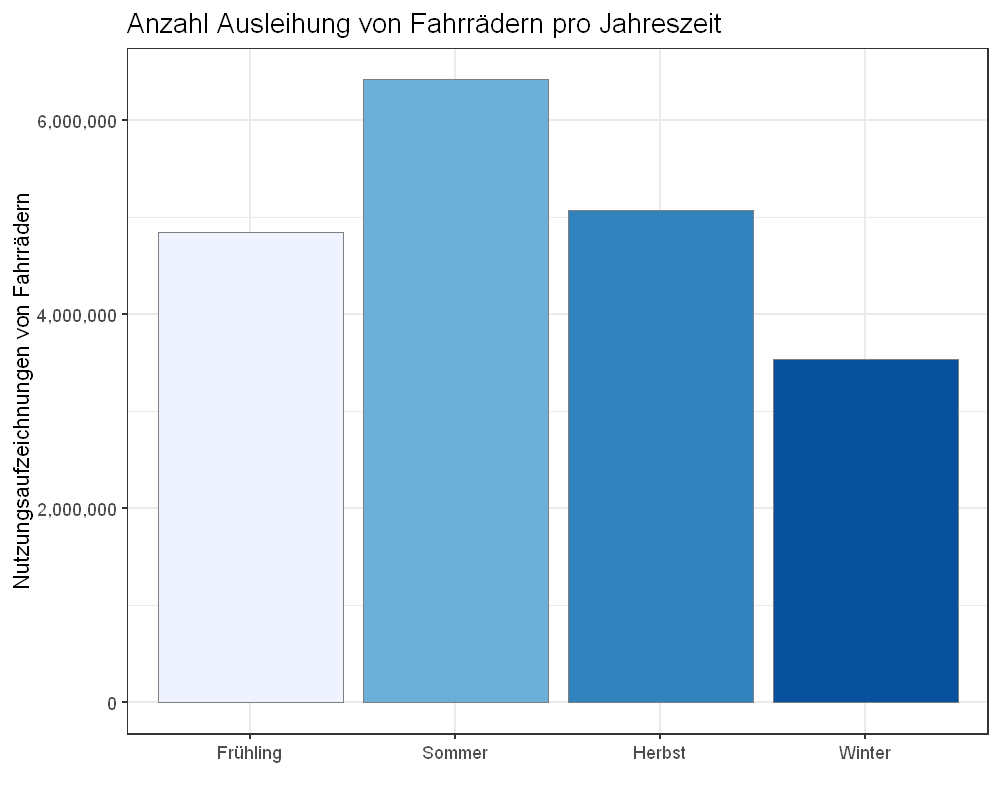

In [73]:
### ----  Ausleihen pro Jahreszeit  ----- #####
s = c("#eff3ff", '#6baed6', '#3182bd', '#08519c')
options(repr.plot.width=10, repr.plot.height=8)
b %>% group_by(Season) %>%
  summarise(n = n(), rent = sum(Rentals)) %>%
  ggplot(aes(Season, rent, fill = Season)) + 
  geom_bar(stat = "identity", show.legend = F, color = 'gray50') +
  theme_bw(base_size = 16) + scale_fill_manual(values = s) +
  labs(title = "Anzahl Ausleihung von Fahrrädern pro Jahreszeit", x = "", y = "Nutzungsaufzeichnungen von Fahrrädern") + scale_y_continuous(labels = comma)

### Anzahl Ausleihung von Fahrrädern pro Jahreszeit (Arbeitstag vs. Wochenende)

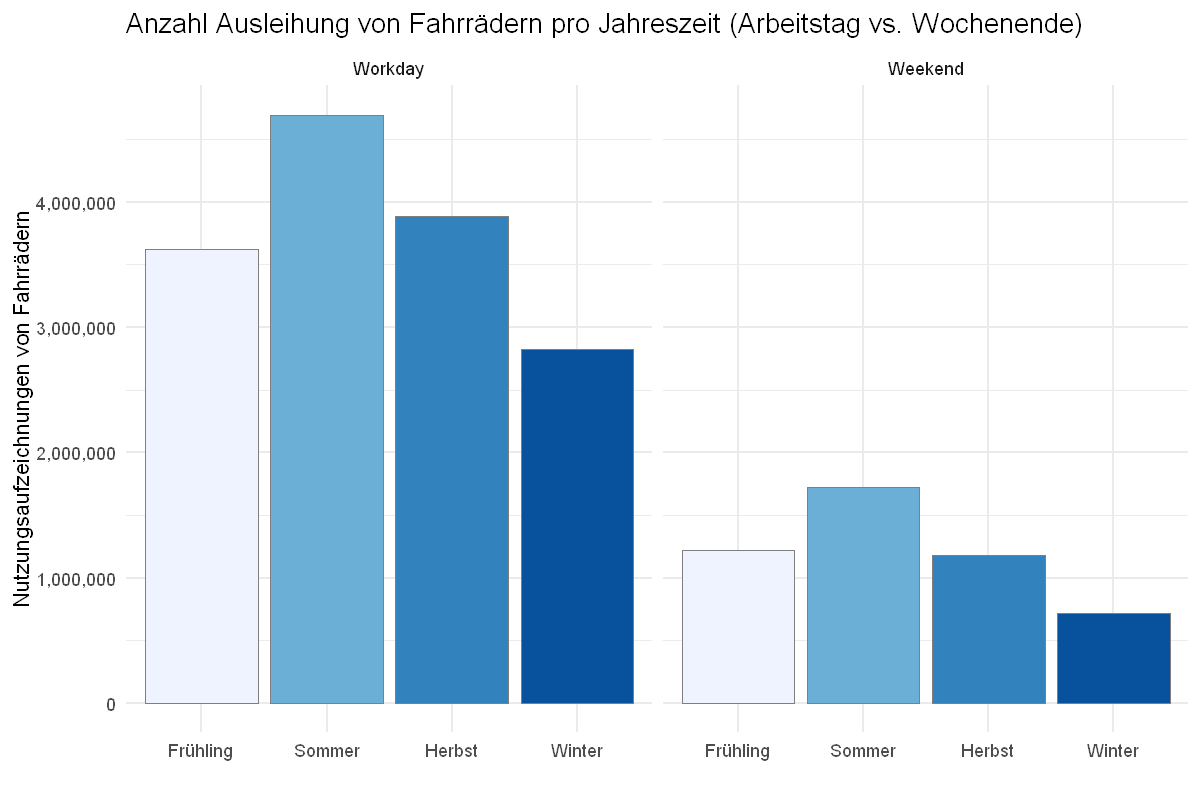

In [74]:
###   Rentals by Season & Day Off  #####
options(repr.plot.width=12, repr.plot.height=8)
b %>% group_by(Season, Workday) %>%
  summarise(n = n(), rent = sum(Rentals)) %>%
  ggplot(aes(Season, rent, fill = Season)) + 
  geom_bar(stat = "identity", color = 'grey50', show.legend = F) +
  scale_fill_manual(values = s) +
  facet_grid(~Workday) + theme_minimal(base_size = 16) +
  labs(title = "Anzahl Ausleihung von Fahrrädern pro Jahreszeit (Arbeitstag vs. Wochenende)", x = "", y = "Nutzungsaufzeichnungen von Fahrrädern") +
  scale_y_continuous(labels = comma)

### Anzahl Ausleihung von Fahrrädern pro Monat (Arbeitstag vs. Wochenende)

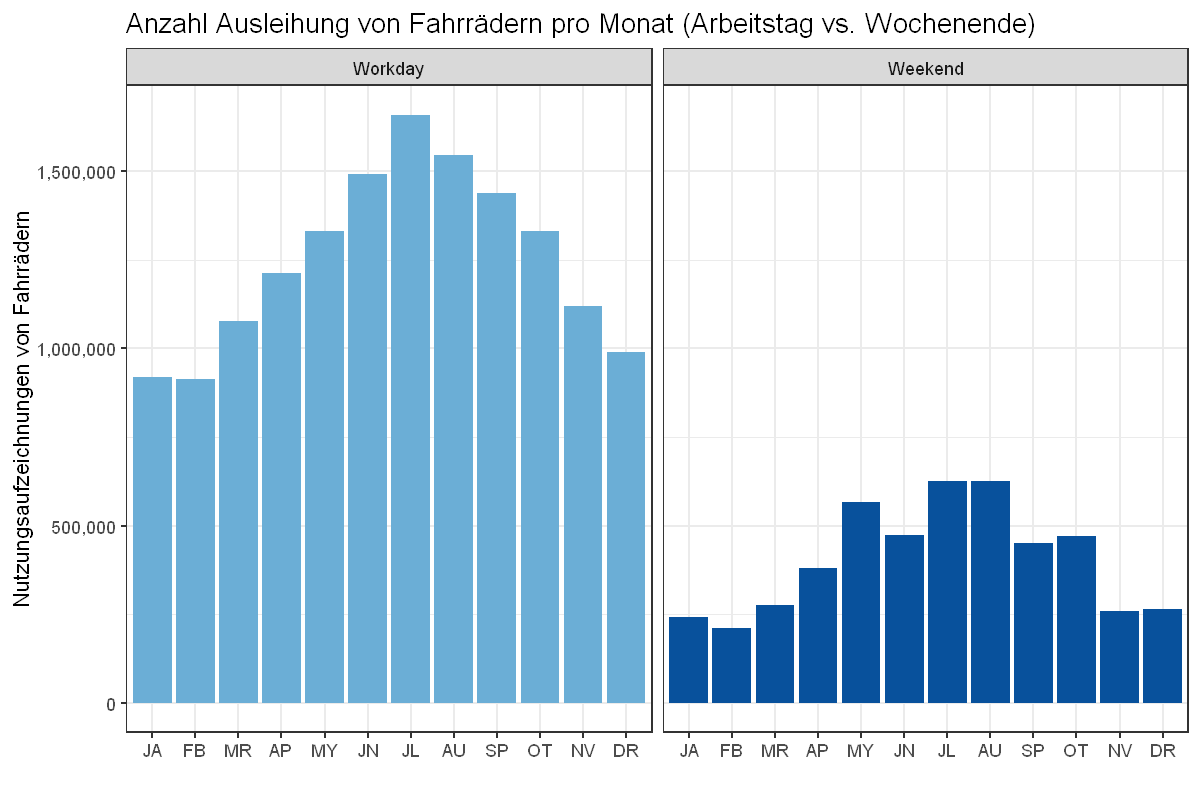

In [75]:
###   -----  Rentals by Month & workday ---- #####
wd = c("#6baed6", "#08519c")
b %>% group_by(month, Workday) %>%
  summarise(n = n(), rent = sum(Rentals)) %>%
  ggplot(aes(month, rent, fill = Workday)) + 
  geom_bar(stat = "identity", show.legend = F) +
  scale_fill_manual(values = wd) +
  facet_grid(~Workday) + theme_bw(base_size = 16) + 
  labs(title = "Anzahl Ausleihung von Fahrrädern pro Monat (Arbeitstag vs. Wochenende)", x = "", y = "Nutzungsaufzeichnungen von Fahrrädern") +
  scale_y_continuous(labels = comma)

### Anzahl Ausleihung von Fahrrädern pro Wetter

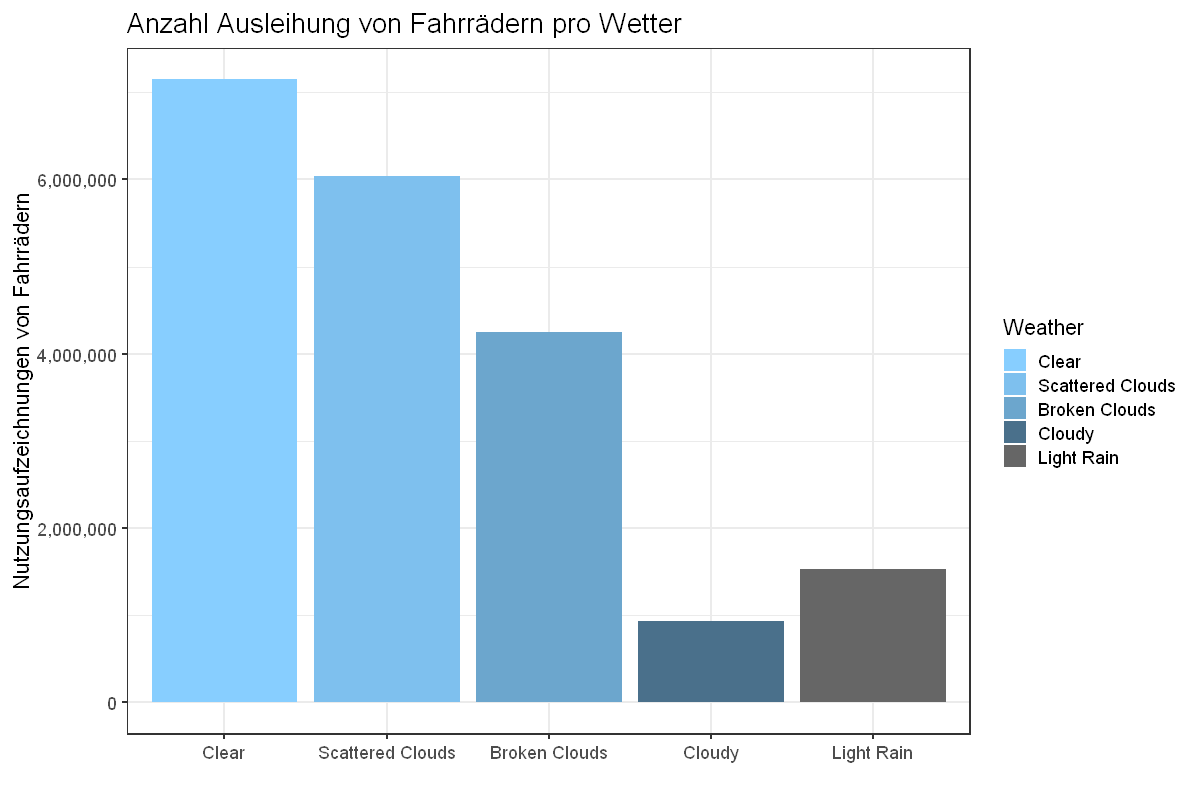

In [76]:
###  ---- Rentals by Weather ----  #####

options(repr.plot.width=12, repr.plot.height=8)
w = c('skyblue1','skyblue2','skyblue3','skyblue4','grey40')
b %>% group_by(Weather) %>%
  summarise(n = n(), rent = sum(Rentals)) %>%
  ggplot(aes(Weather, rent, fill = Weather)) + 
  geom_bar(stat = "identity") + scale_fill_manual(values = w) +
  theme_bw(base_size = 16) + 
  labs(title = "Anzahl Ausleihung von Fahrrädern pro Wetter", x = "", y = "Nutzungsaufzeichnungen von Fahrrädern") +
  scale_y_continuous(labels = comma)

### Anzahl Ausleihung von Fahrrädern pro Arbeitstag - Version 1

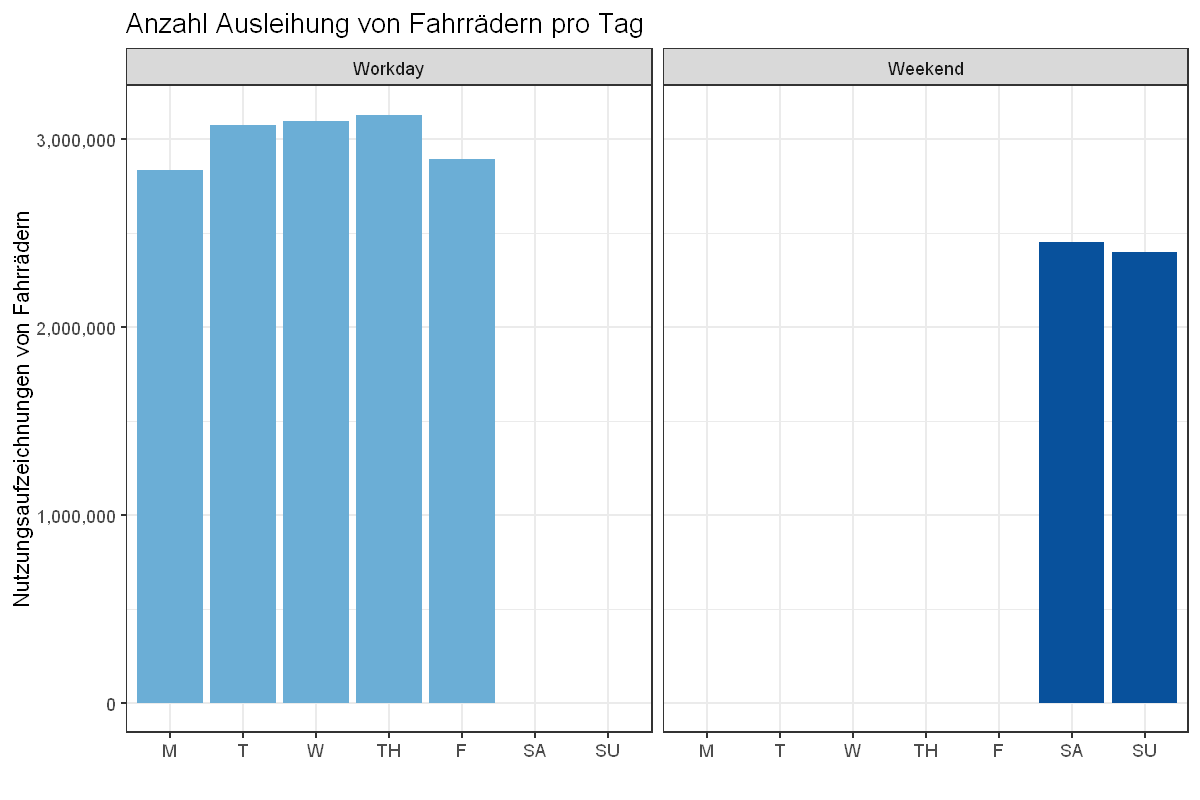

In [77]:
###   -----  Rentals by Workday ---- #####
wd = c("#6baed6", "#08519c")
b %>% group_by(day, Workday) %>%
  summarise(n = n(), rent = sum(Rentals)) %>%
  ggplot(aes(day, rent, fill = Workday)) + 
  geom_bar(stat = "identity", show.legend = F) +
  scale_fill_manual(values = wd) +
  facet_grid(~Workday) + theme_bw(base_size = 16) + 
  labs(title = "Anzahl Ausleihung von Fahrrädern pro Tag", x = "", y = "Nutzungsaufzeichnungen von Fahrrädern") +
  scale_y_continuous(labels = comma)




### Anzahl Ausleihung von Fahrrädern pro Arbeitstag - Version 2

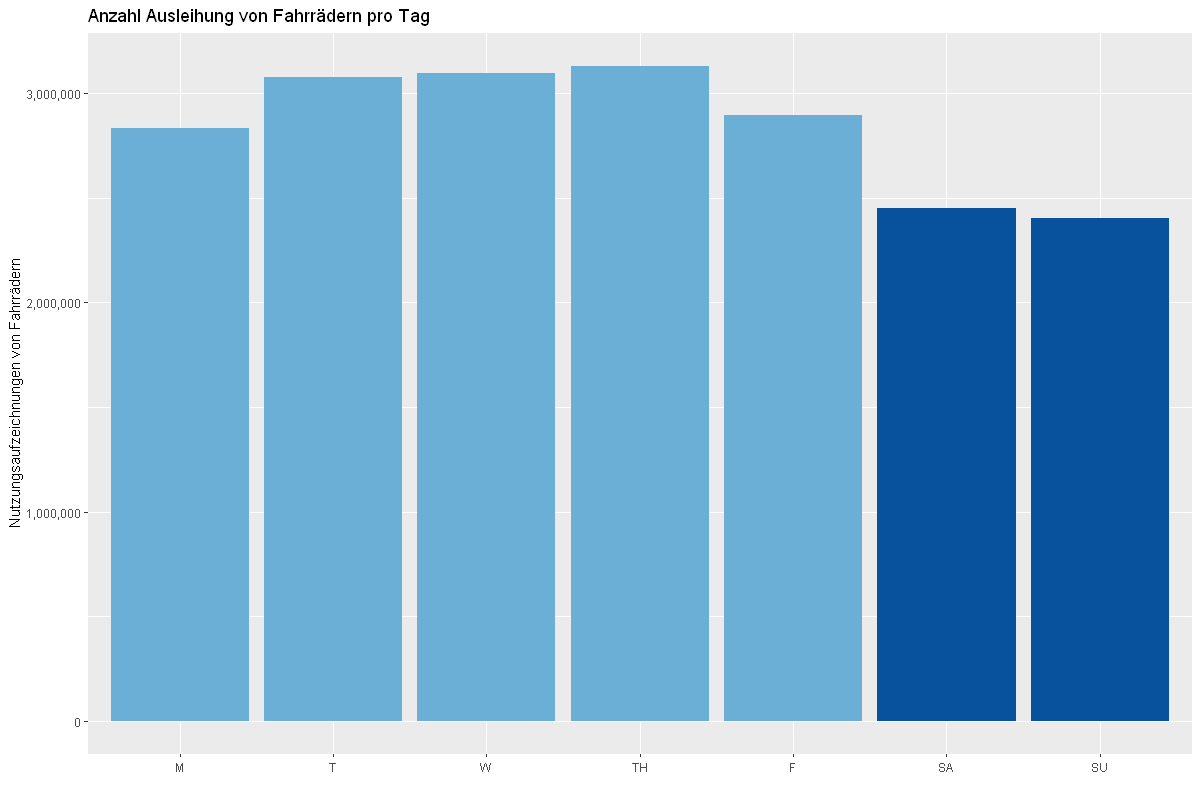

In [78]:
###   -----  Rentals by Workday ---- #####
wd = c("#6baed6", "#08519c")
b %>% group_by(day, Workday) %>%
  summarise(n = n(), rent = sum(Rentals)) %>%
  ggplot(aes(day, rent, fill = Workday)) + 
  geom_bar(stat = "identity", show.legend = F) +
  scale_fill_manual(values = wd) +
  labs(title = "Anzahl Ausleihung von Fahrrädern pro Tag", x = "", y = "Nutzungsaufzeichnungen von Fahrrädern") +
  scale_y_continuous(labels = comma)


## Vorhersagemodell

### Data preparation

In [189]:
bike_data <- read.csv('london_bereinigt_prediction.csv', header = TRUE, sep = ";")
#Datentypen von int in nummerisch umwandeln, um diese Werte später in Faktoren umzuwandeln

bike_data$season <- as.numeric(bike_data$season)
bike_data$yr <- as.numeric(bike_data$yr)
bike_data$cnt <- as.numeric(bike_data$cnt)
bike_data$month_nr <- as.numeric(bike_data$month_nr)
bike_data$hr <- as.numeric(bike_data$hr)
bike_data$weekdays_nr <- as.numeric(bike_data$weekdays_nr)
bike_data$weather_code <- as.numeric(bike_data$weather_code)
bike_data$is_holiday <- as.numeric(bike_data$is_holiday)
bike_data$is_weekend <- as.numeric(bike_data$is_weekend)



head(bike_data)

instant,date,yr,time,hr,weekdays,weekdays_nr,month_nr,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
1,04.01.15,0,00:00:00,0,Sonntag,7,1,182,3.0,2.0,93.0,6.0,3,0,1,3
2,04.01.15,0,01:00:00,1,Sonntag,7,1,138,3.0,2.5,93.0,5.0,1,0,1,3
3,04.01.15,0,02:00:00,2,Sonntag,7,1,134,2.5,2.5,96.5,0.0,1,0,1,3
4,04.01.15,0,03:00:00,3,Sonntag,7,1,72,2.0,2.0,100.0,0.0,1,0,1,3
5,04.01.15,0,04:00:00,4,Sonntag,7,1,47,2.0,0.0,93.0,6.5,1,0,1,3
6,04.01.15,0,05:00:00,5,Sonntag,7,1,46,2.0,2.0,93.0,4.0,1,0,1,3


In [190]:
#Datenset nach Jahr, Monat, Wochentag und Stunde gruppieren und Zusammenfassen
#detach(package:plyr)
bike_data_grouped <- bike_data %>% group_by(yr, month_nr, weekdays_nr, hr, is_holiday, is_weekend) %>% summarise(season = mean(season),
                                                                                                         weather_code = mean(weather_code), 
                                                                                                         t1 = mean(t1), 
                                                                                                         t2 = mean(t2), 
                                                                                                        hum = mean(hum), 
                                                                                                         wind_speed = mean(wind_speed), 
                                                                                                         cnt = mean(cnt))

head(bike_data_grouped)

yr,month_nr,weekdays_nr,hr,is_holiday,is_weekend,season,weather_code,t1,t2,hum,wind_speed,cnt
0,1,1,0,0,0,3,3.00,5.250,2.500,85.375,15.500,110.75
0,1,1,1,0,0,3,3.50,5.750,3.125,83.250,16.250,60.75
0,1,1,2,0,0,3,3.50,6.250,4.250,82.875,15.750,31.25
0,1,1,3,0,0,3,3.25,6.375,4.125,82.750,15.250,30.75
0,1,1,4,0,0,3,3.25,6.500,4.250,82.750,15.500,36.75
0,1,1,5,0,0,3,3.25,6.625,4.375,82.875,15.875,85.75


In [191]:
#Diskrete Werte runden auf ganze Zahlen. (Durch das Gruppieren und Berechnen des Mittelwerts sind Kommastellen entstanden)
bike_data_grouped$season <- round(bike_data_grouped$season, digits=0)
bike_data_grouped$weather_code <- round(bike_data_grouped$weather_code, digits=0)

In [192]:
#Kategorische Variabeln in Faktor umwandeln
bike_data_grouped$season <-as.factor(bike_data_grouped$season)
bike_data_grouped$yr <-as.factor(bike_data_grouped$yr)
bike_data_grouped$month_nr <-as.factor(bike_data_grouped$month_nr)
bike_data_grouped$hr <-as.factor(bike_data_grouped$hr)
bike_data_grouped$weekdays_nr <-as.factor(bike_data_grouped$weekdays_nr)
bike_data_grouped$weather_code <-as.factor(bike_data_grouped$weather_code)

head(bike_data_grouped)


yr,month_nr,weekdays_nr,hr,is_holiday,is_weekend,season,weather_code,t1,t2,hum,wind_speed,cnt
0,1,1,0,0,0,3,3,5.250,2.500,85.375,15.500,110.75
0,1,1,1,0,0,3,4,5.750,3.125,83.250,16.250,60.75
0,1,1,2,0,0,3,4,6.250,4.250,82.875,15.750,31.25
0,1,1,3,0,0,3,3,6.375,4.125,82.750,15.250,30.75
0,1,1,4,0,0,3,3,6.500,4.250,82.750,15.500,36.75
0,1,1,5,0,0,3,3,6.625,4.375,82.875,15.875,85.75


In [193]:
#Modeling Dropping columns
bike_data_grouped <- bike_data_grouped[c(-1,-6)]
head(bike_data_grouped)

month_nr,weekdays_nr,hr,is_holiday,season,weather_code,t1,t2,hum,wind_speed,cnt
1,1,0,0,3,3,5.250,2.500,85.375,15.500,110.75
1,1,1,0,3,4,5.750,3.125,83.250,16.250,60.75
1,1,2,0,3,4,6.250,4.250,82.875,15.750,31.25
1,1,3,0,3,3,6.375,4.125,82.750,15.250,30.75
1,1,4,0,3,3,6.500,4.250,82.750,15.500,36.75
1,1,5,0,3,3,6.625,4.375,82.875,15.875,85.75


In [194]:
#Aufteilen der Daten in Trainings- und Testdaten
#set.seed(101)
#sample <- sample.int(n = nrow(bike_data_grouped), size = floor(0.8 * nrow(bike_data_grouped)), replace = F)

#Trainingsdatensatz erstellen
#bike_train <- bike_data_grouped[ sample, ]

#Testdatensatz erstellen
#bike_test <- bike_data_grouped[ -sample, ]

In [195]:
#Modifikationen für weitere Analysen

##Analyse für Wochenende
bike_data_weekend<-bike_data_grouped
bike_data_weekend<-bike_data_weekend[!(bike_data_weekend$weekdays_nr=="1" | bike_data_weekend$weekdays_nr=="2" | bike_data_weekend$weekdays_nr=="3" | bike_data_weekend$weekdays_nr=="4" | bike_data_weekend$weekdays_nr=="5"),]
bike_data_weekend<-bike_data_weekend[!(bike_data_weekend$weather_code=="7"),]

##Analyse für Workingdays
bike_data_workingdays<-bike_data_grouped
bike_data_workingdays<-bike_data_workingdays[!(bike_data_workingdays$weekdays_nr=="6" | bike_data_workingdays$weekdays_nr=="7"),]


##Analyse ohne Outliners
#find Q1, Q3, and interquartile range for values in column cnt
Q1 <- quantile(bike_data_grouped$cnt, .25)
Q3 <- quantile(bike_data_grouped$cnt, .75)
IQR <- IQR(bike_data_grouped$cnt)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
no_outliers <- subset(bike_data_grouped, bike_data_grouped$cnt> (Q1 - 1.5*IQR) & bike_data_grouped$cnt< (Q3 + 1.5*IQR))



#### Alle Daten Modell

In [196]:
library(rpart)
library(Metrics)
library(caTools)


In [197]:
#Splitting data
library(caTools)
set.seed(1234)


split = sample.split(bike_data_grouped$cnt, SplitRatio = 0.8)
bike_train = subset(bike_data_grouped, split == TRUE)
bike_test = subset(bike_data_grouped, split == FALSE)


In [198]:
#Multilinear regression
multi = lm(formula = cnt ~ ., data = bike_train)

#Predicting the test values
y_pred_m = predict(multi, newdata = bike_test) 


library(Metrics)

mae_m = mae(bike_test[[11]], y_pred_m)
rmse_m = rmse(bike_test[[11]], y_pred_m)

cat("MAE_m:\n",mae_m,"\n") 
cat("\n")
cat("RMSE_m:\n",rmse_m)

MAE_m:
 392.4194 

RMSE_m:
 559.9038

In [199]:
print(multi)


Call:
lm(formula = cnt ~ ., data = bike_train)

Coefficients:
  (Intercept)      month_nr2      month_nr3      month_nr4      month_nr5  
     926.3003        -0.2325       -64.7476       -50.2590       -93.3931  
    month_nr6      month_nr7      month_nr8      month_nr9     month_nr10  
    -195.7403      -292.8898      -347.3232      -215.7207        35.2679  
   month_nr11     month_nr12   weekdays_nr2   weekdays_nr3   weekdays_nr4  
     -30.6958       -66.9153        40.6809        47.2413        61.3070  
 weekdays_nr5   weekdays_nr6   weekdays_nr7            hr1            hr2  
      23.2241      -178.8872      -210.8673       -71.4004      -105.9022  
          hr3            hr4            hr5            hr6            hr7  
    -122.3712      -150.9916       -92.7682       245.3126      1136.2503  
          hr8            hr9           hr10           hr11           hr12  
    2438.9396      1171.0600       546.5864       566.9689       760.4923  
         hr13           h

In [200]:
summary(multi)


Call:
lm(formula = cnt ~ ., data = bike_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-2639.80  -264.32   -18.83   262.41  1949.45 

Coefficients: (3 not defined because of singularities)
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    926.3003   192.9535   4.801 1.65e-06 ***
month_nr2       -0.2325    44.7511  -0.005 0.995856    
month_nr3      -64.7476    43.9949  -1.472 0.141190    
month_nr4      -50.2590    51.3270  -0.979 0.327553    
month_nr5      -93.3931    63.6171  -1.468 0.142181    
month_nr6     -195.7403    75.9805  -2.576 0.010030 *  
month_nr7     -292.8898    87.3973  -3.351 0.000813 ***
month_nr8     -347.3232    88.2472  -3.936 8.45e-05 ***
month_nr9     -215.7207    78.4313  -2.750 0.005982 ** 
month_nr10      35.2679    64.0229   0.551 0.581763    
month_nr11     -30.6958    49.7871  -0.617 0.537578    
month_nr12     -66.9153    50.6911  -1.320 0.186901    
weekdays_nr2    40.6809    33.6415   1.209 0.226649    
weekdays

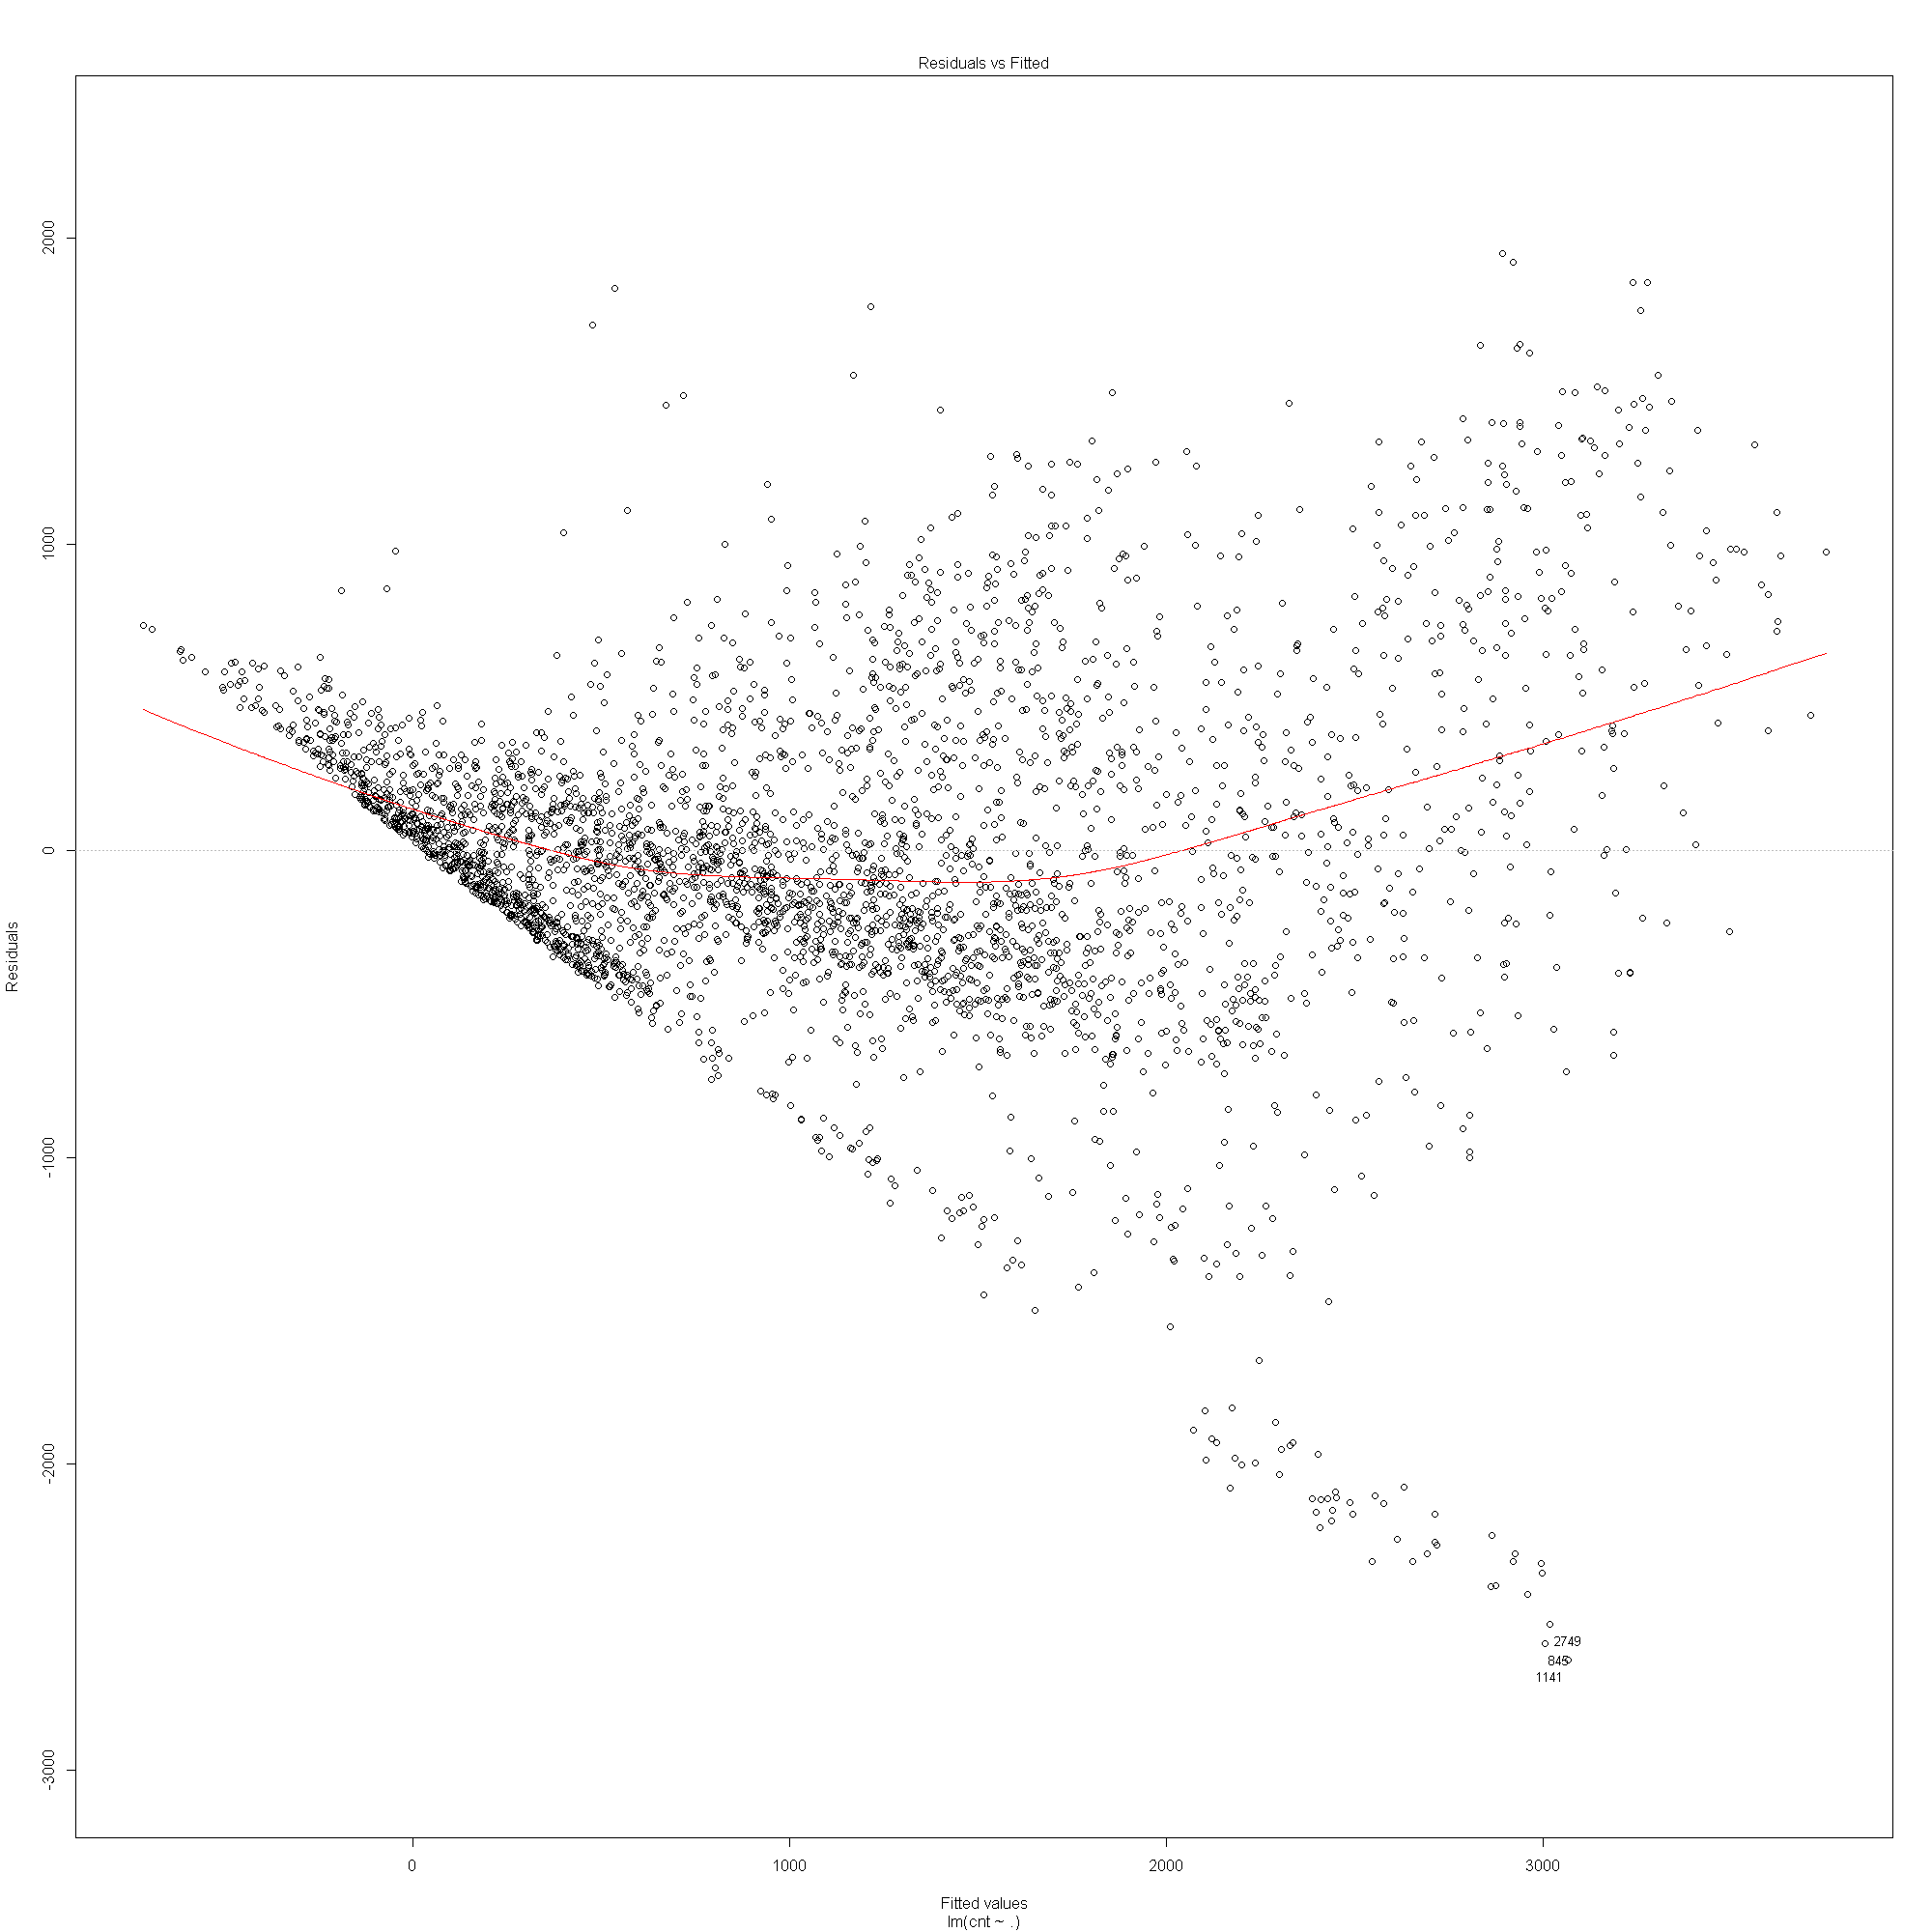

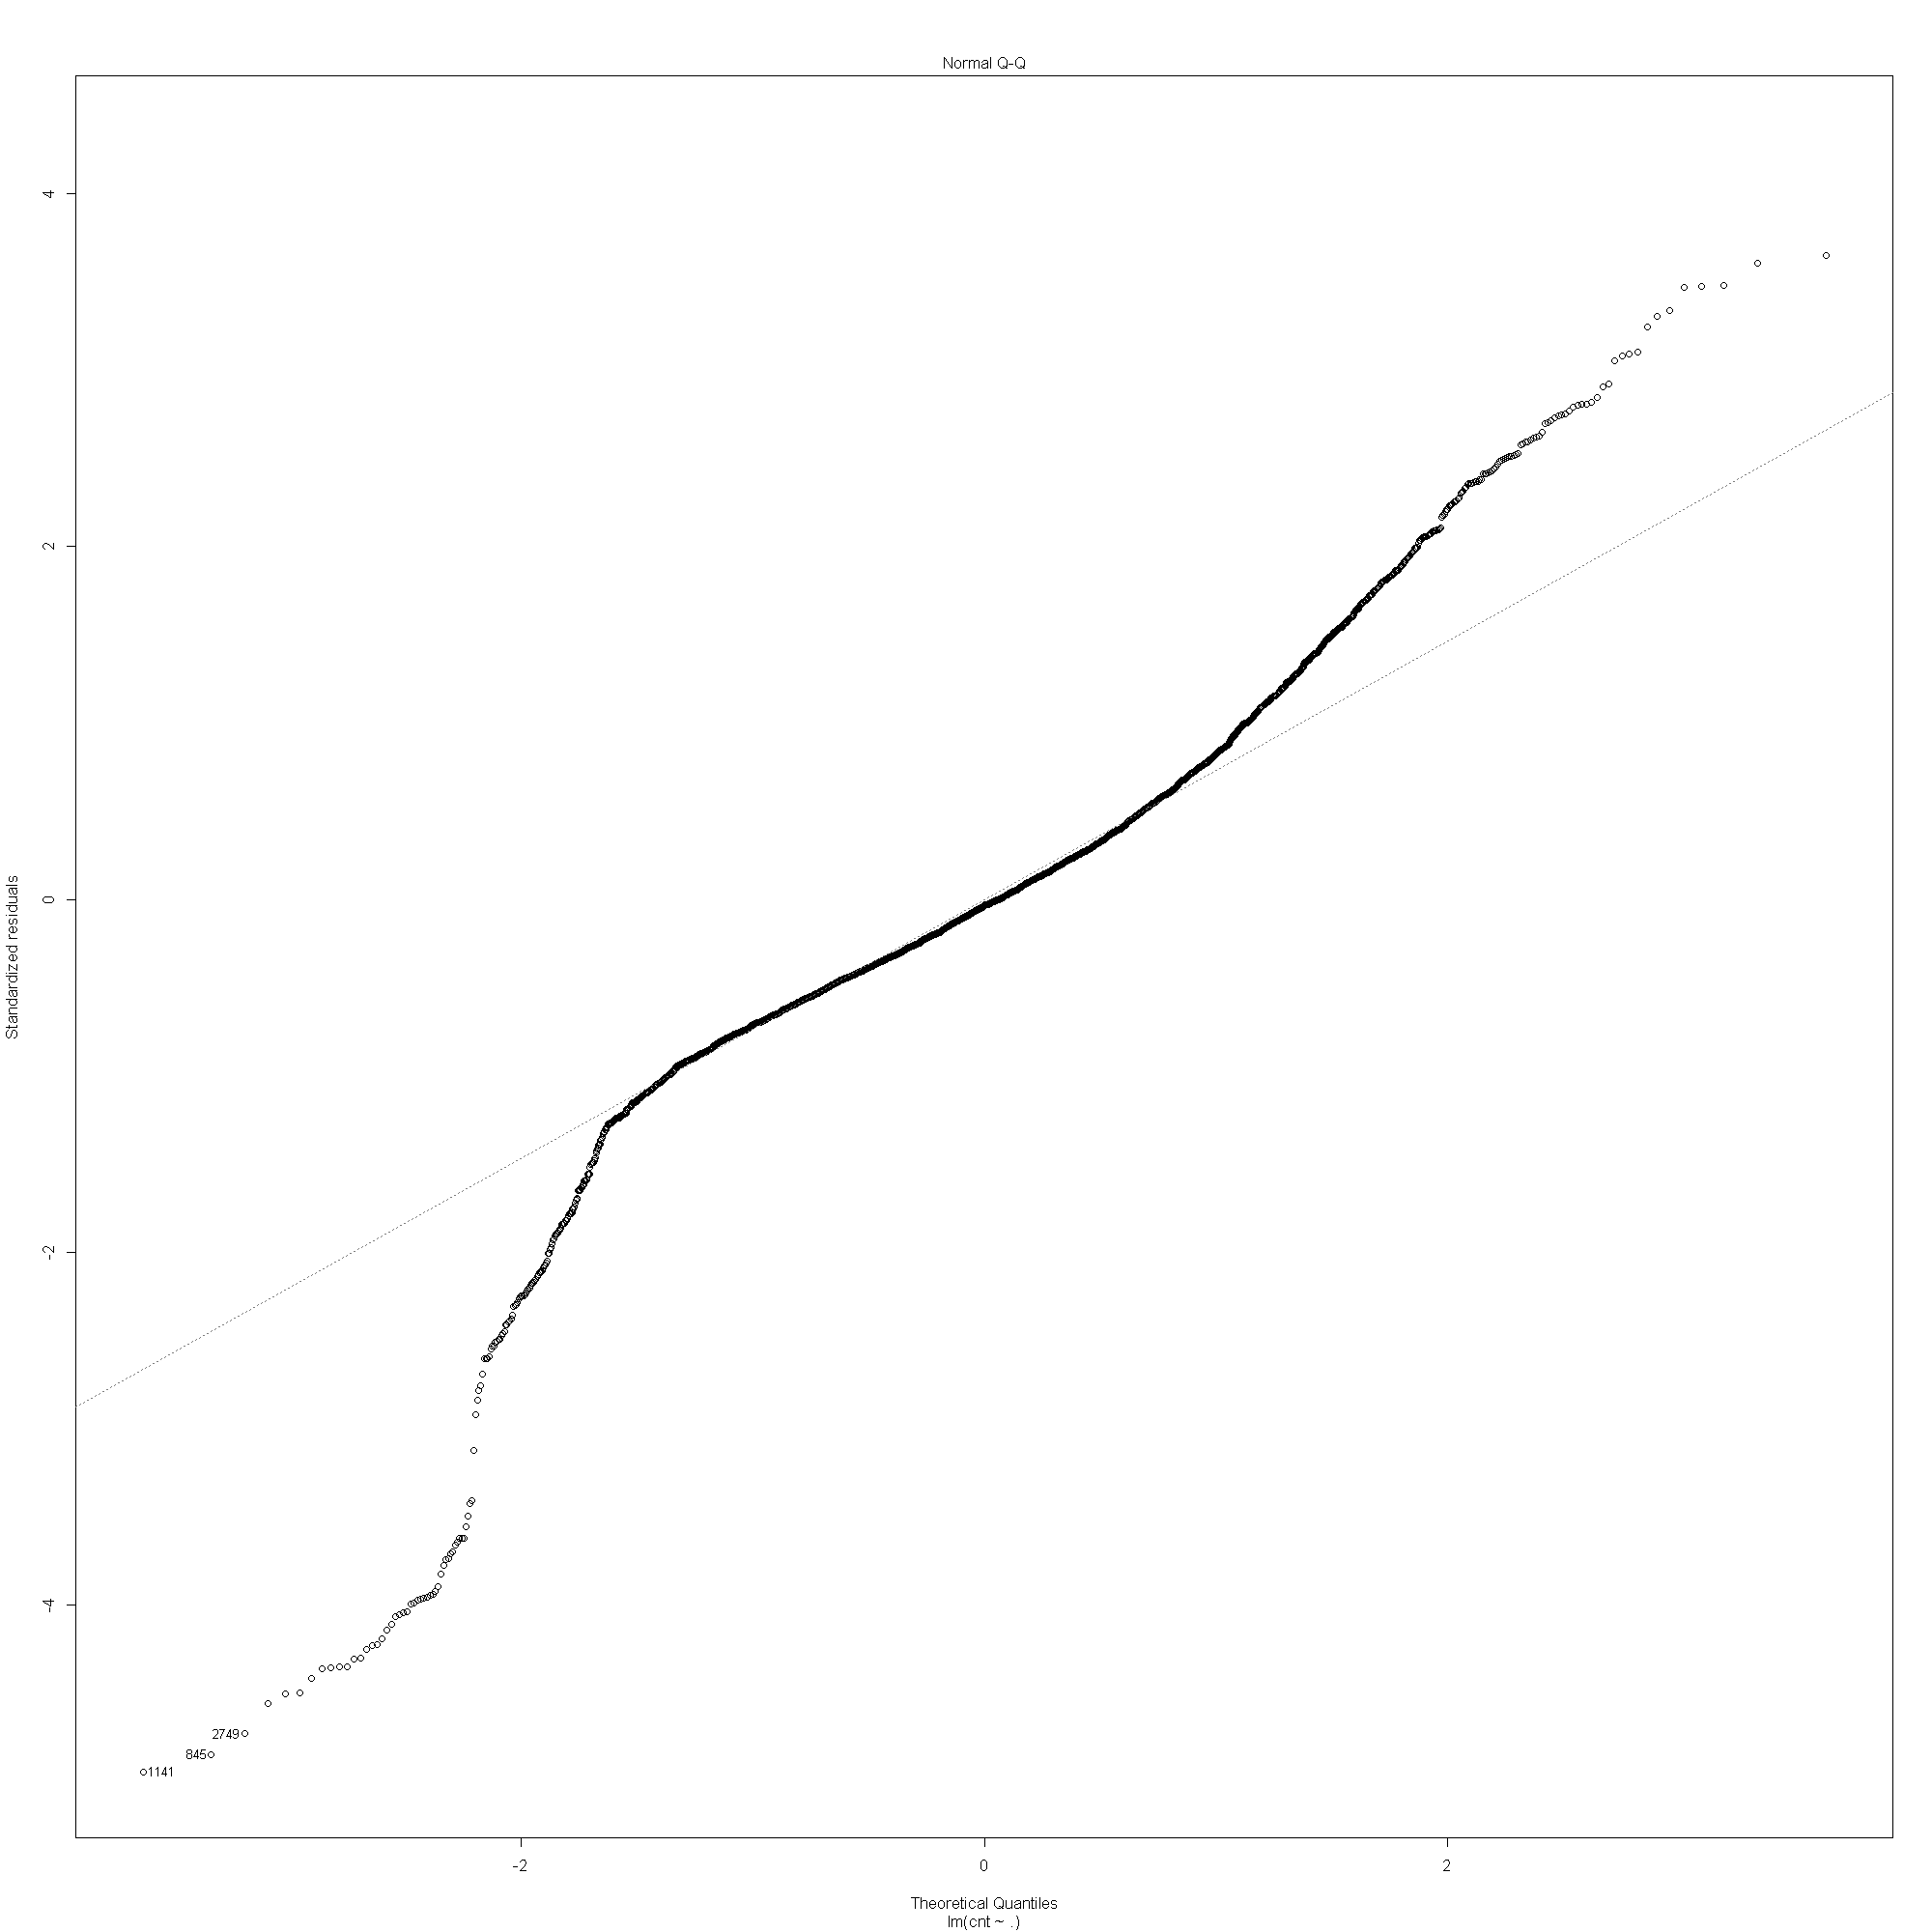

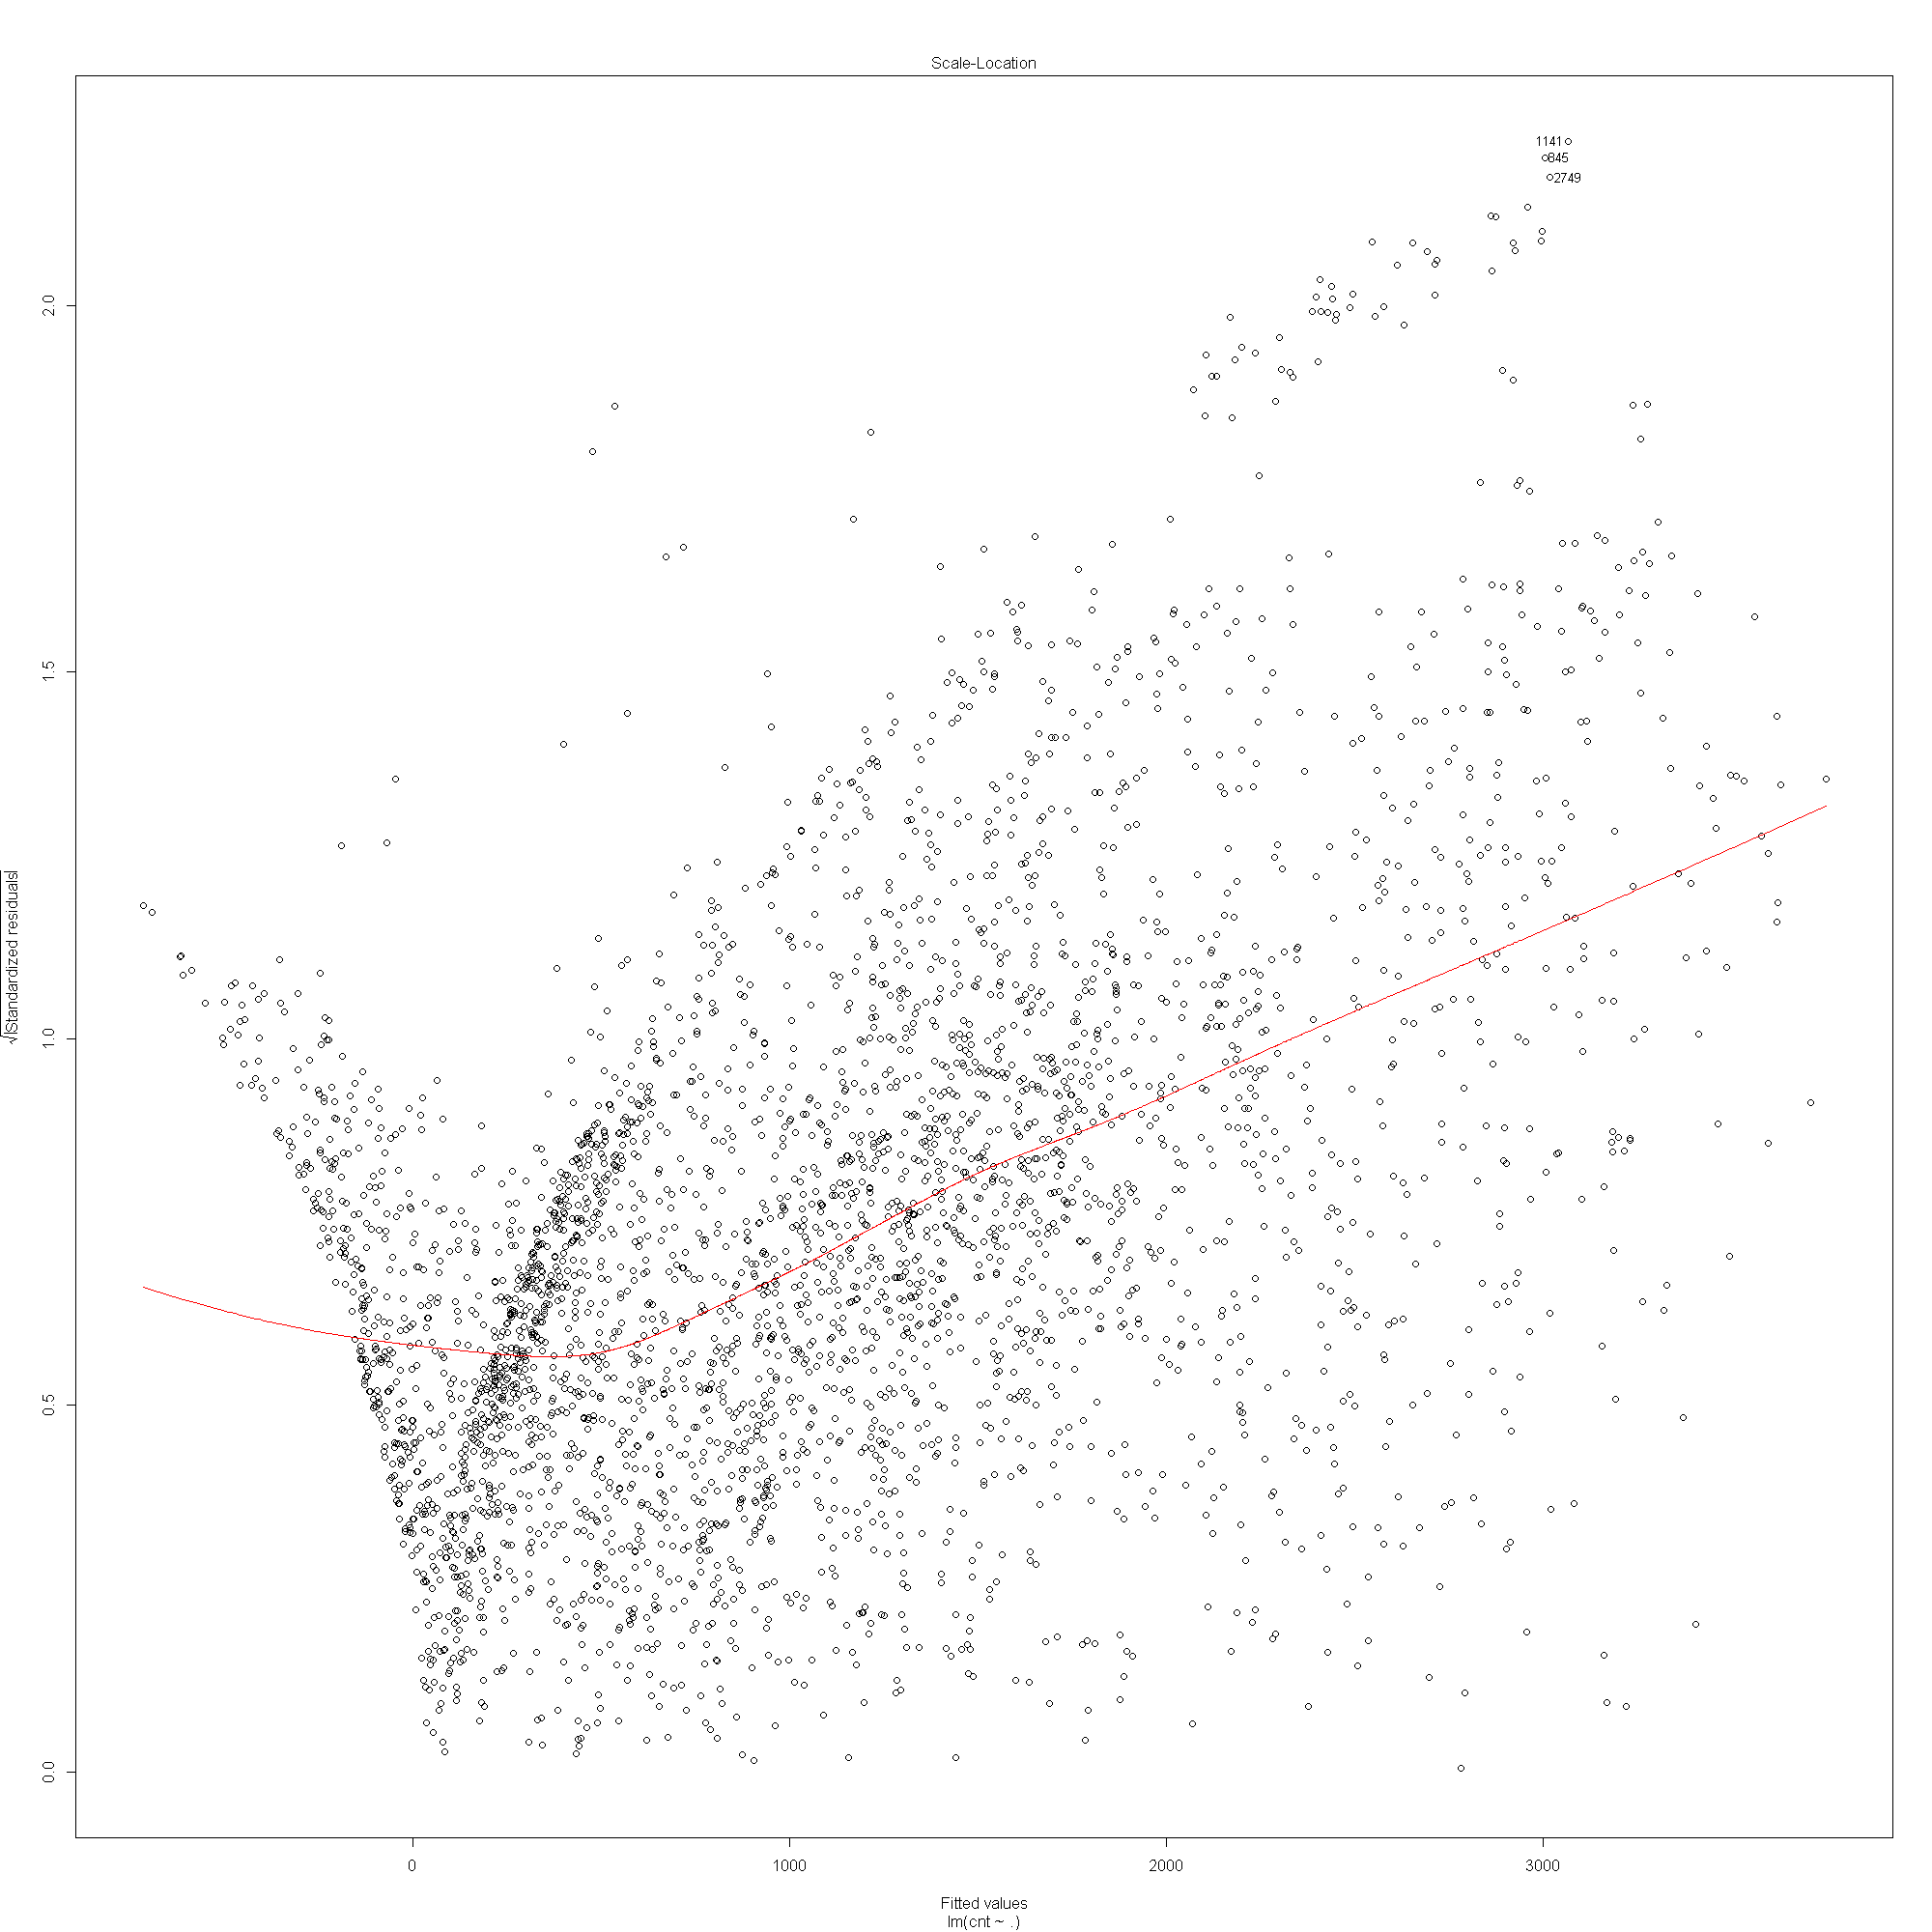

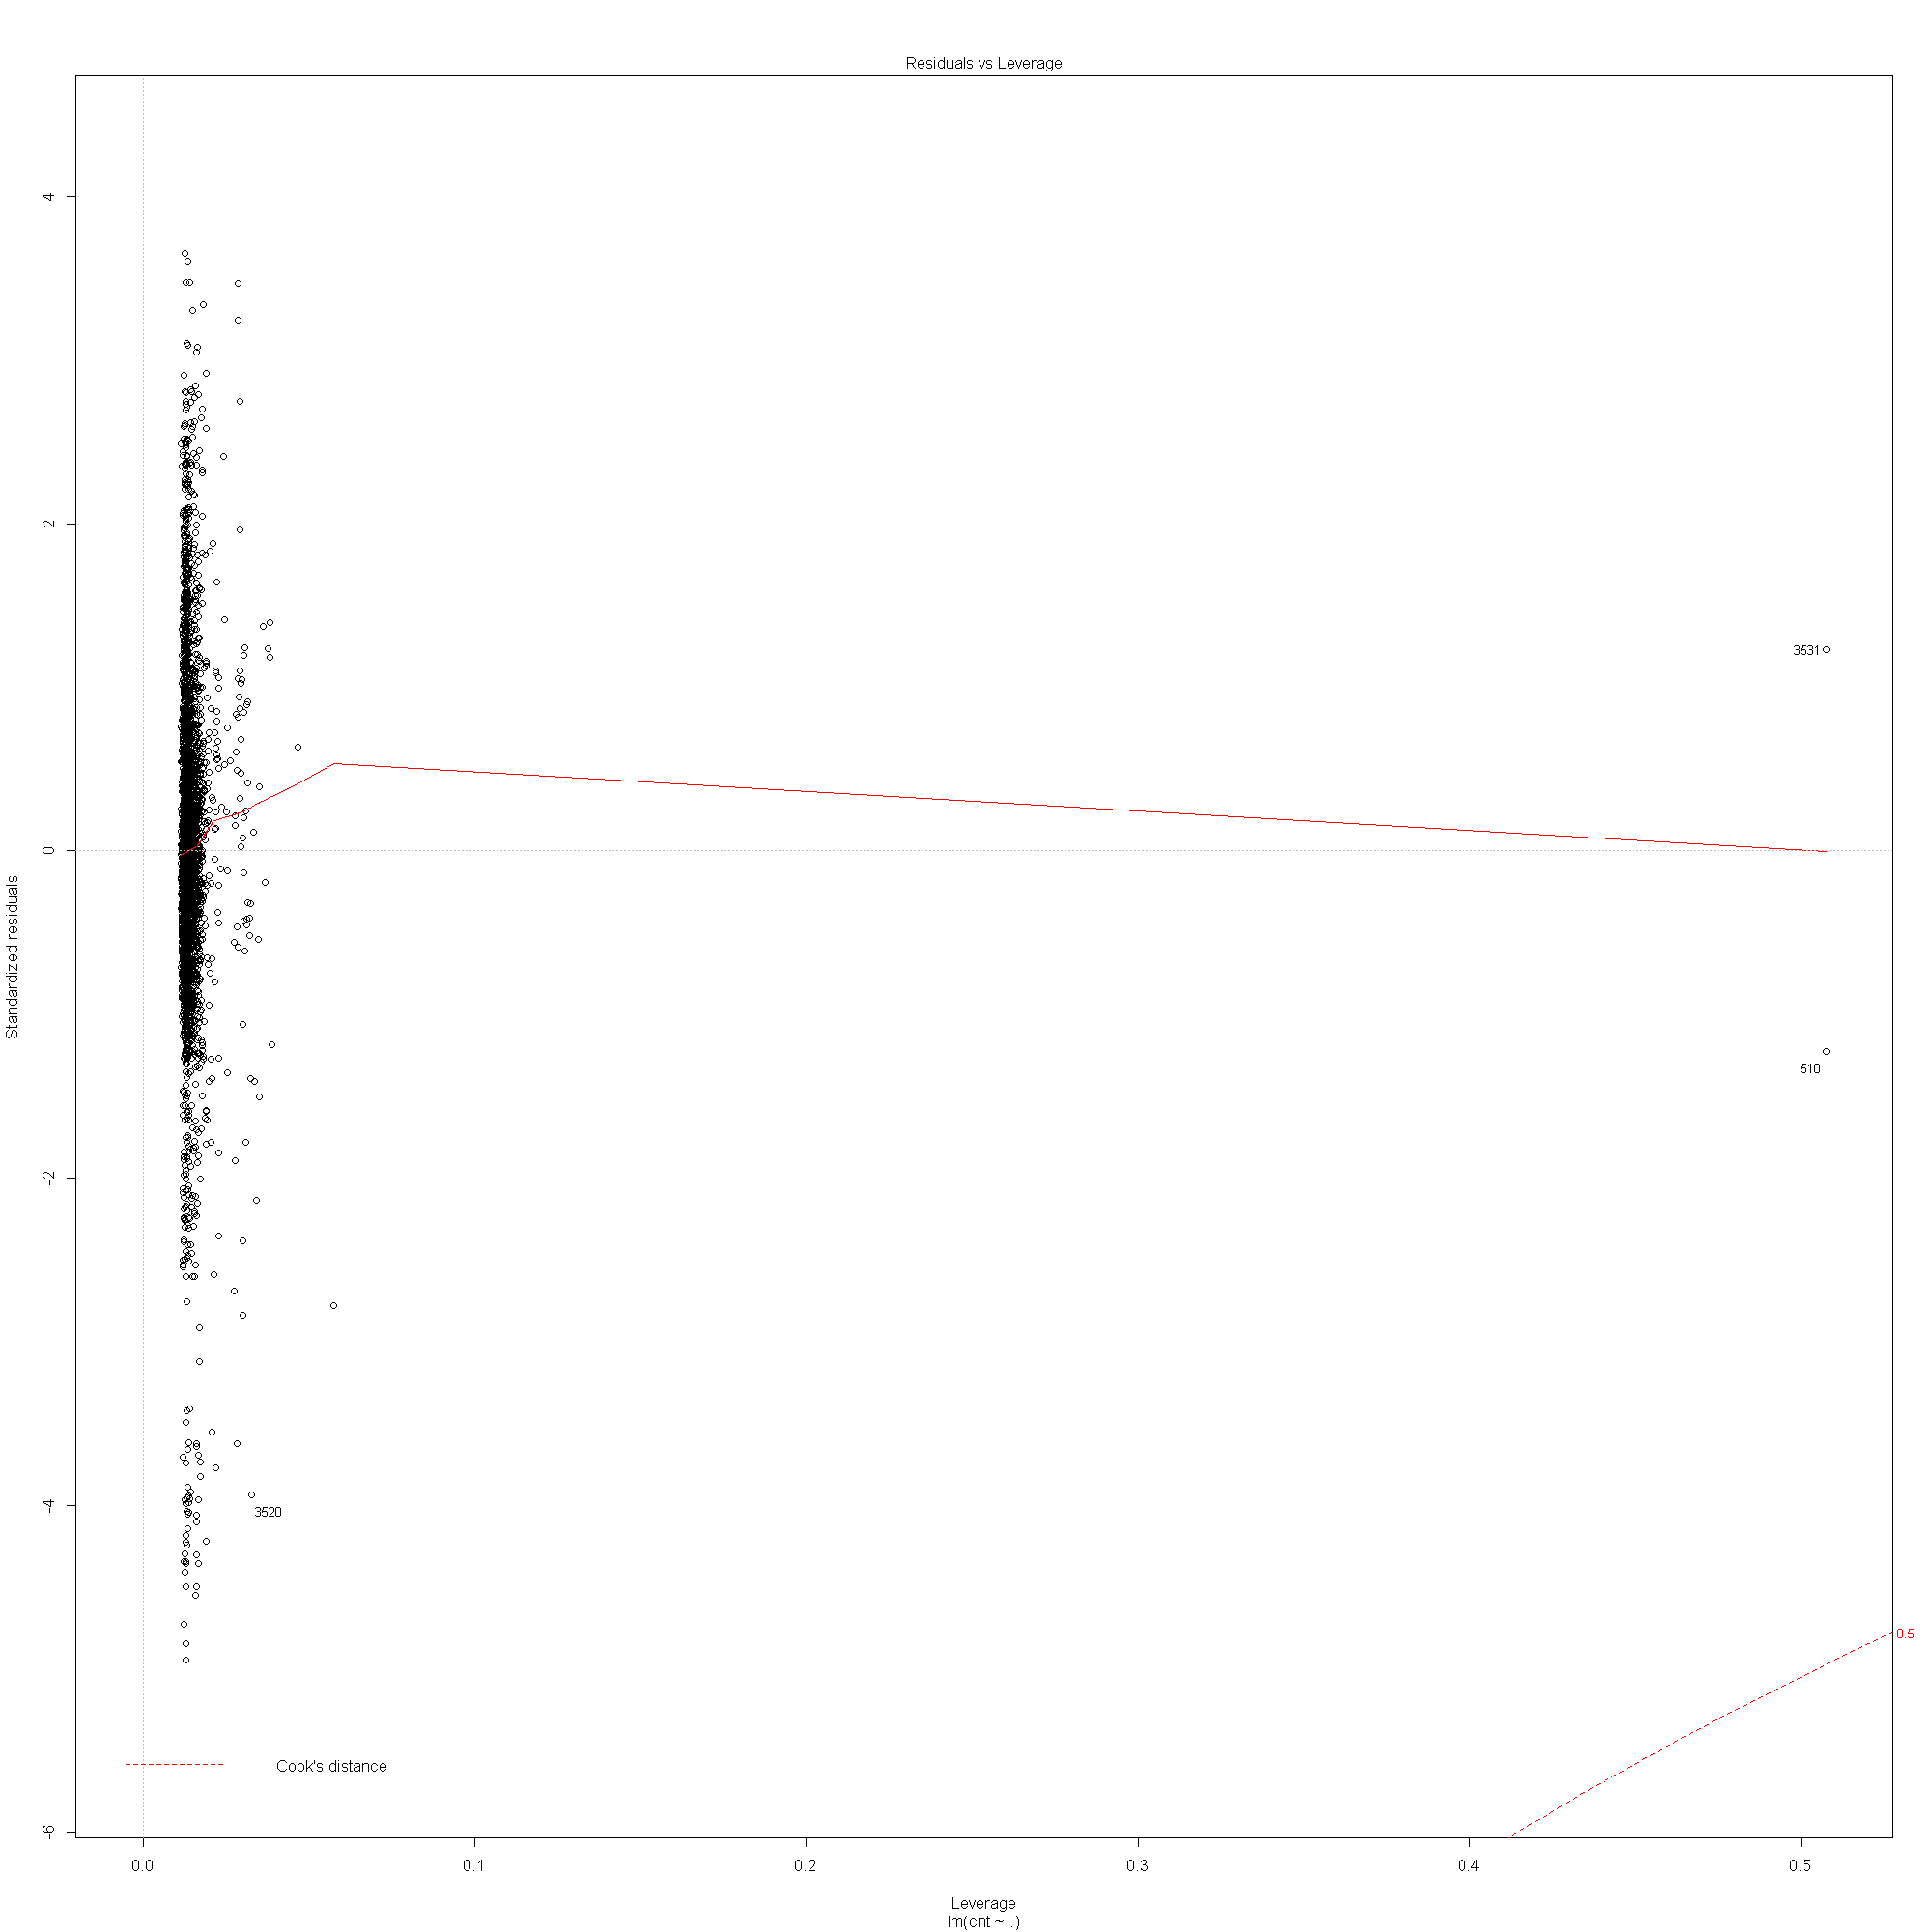

In [201]:
plot(multi)

In [202]:
#Multilinear regression // Hier werden die einzelnen Gemessenen Prameter manuel angegeben.
library(Metrics)

mu_bike <- lm(cnt ~ weather_code + wind_speed+ t1 + hum + is_holiday , data=bike_train)
#summary(mu_bike)

#Predicting the test values
y_pred_m = predict(mu_bike, newdata = bike_test)

mae_m = mae(bike_test[[11]], y_pred_m)
rmse_m = rmse(bike_test[[11]], y_pred_m)

cat("mae_m:\n",mae_m,"\n") 
cat("\n")
cat("rmse_m:\n",rmse_m)

mae_m:
 628.316 

rmse_m:
 854.6629

In [203]:
print(mu_bike)


Call:
lm(formula = cnt ~ weather_code + wind_speed + t1 + hum + is_holiday, 
    data = bike_train)

Coefficients:
  (Intercept)  weather_code2  weather_code3  weather_code4  weather_code5  
     3394.447        127.874        120.695         11.852        138.145  
weather_code7     wind_speed             t1            hum     is_holiday  
      160.839         -2.026         36.618        -38.357       -156.086  



In [204]:
#Decision tree
library(rpart)

dt = rpart(formula = cnt ~ ., data = bike_train, control = rpart.control(minsplit = 3))

#Predicting the test values
y_pred_dt = predict(dt, newdata = bike_test)

#Performance metrics
mae_dt = mae(bike_test[[11]], y_pred_dt)
rmse_dt = rmse(bike_test[[11]], y_pred_dt)

cat("mae_m:\n",mae_dt,"\n") 
cat("\n")
cat("rmse_m:\n",rmse_dt)

mae_m:
 346.2707 

rmse_m:
 474.5604

In [205]:
print(dt)

n= 3532 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 3532 3808323000 1119.1380  
   2) hr=0,1,2,3,4,5,6,10,11,20,21,22,23 1924  381433900  498.0951  
     4) hr=0,1,2,3,4,5,6,22,23 1313   71767640  270.4849 *
     5) hr=10,11,20,21 611   95469870  987.2149 *
   3) hr=7,8,9,12,13,14,15,16,17,18,19 1608 1796907000 1862.2260  
     6) hr=7,9,12,13,14,15,16,19 1157  529494000 1535.6470  
      12) month_nr=1,2,3,11,12 498  117746800 1161.3330 *
      13) month_nr=4,5,6,7,8,9,10 659  289243800 1818.5120 *
     7) hr=8,17,18 451  827444700 2700.0380  
      14) weekdays_nr=6,7 117   94060710 1261.1280  
        28) hum>=61.0625 85   23602500  808.1927 *
        29) hum< 61.0625 32    6701314 2464.2380 *
      15) weekdays_nr=1,2,3,4,5 334  406282200 3204.0870  
        30) is_holiday>=0.5 32   20764380  840.4844 *
        31) is_holiday< 0.5 302  187803500 3454.5350  
          62) month_nr=1,2,3,11,12 122   40257460 2797.7170 *
          63) month_nr=4,5,6,7,8,9

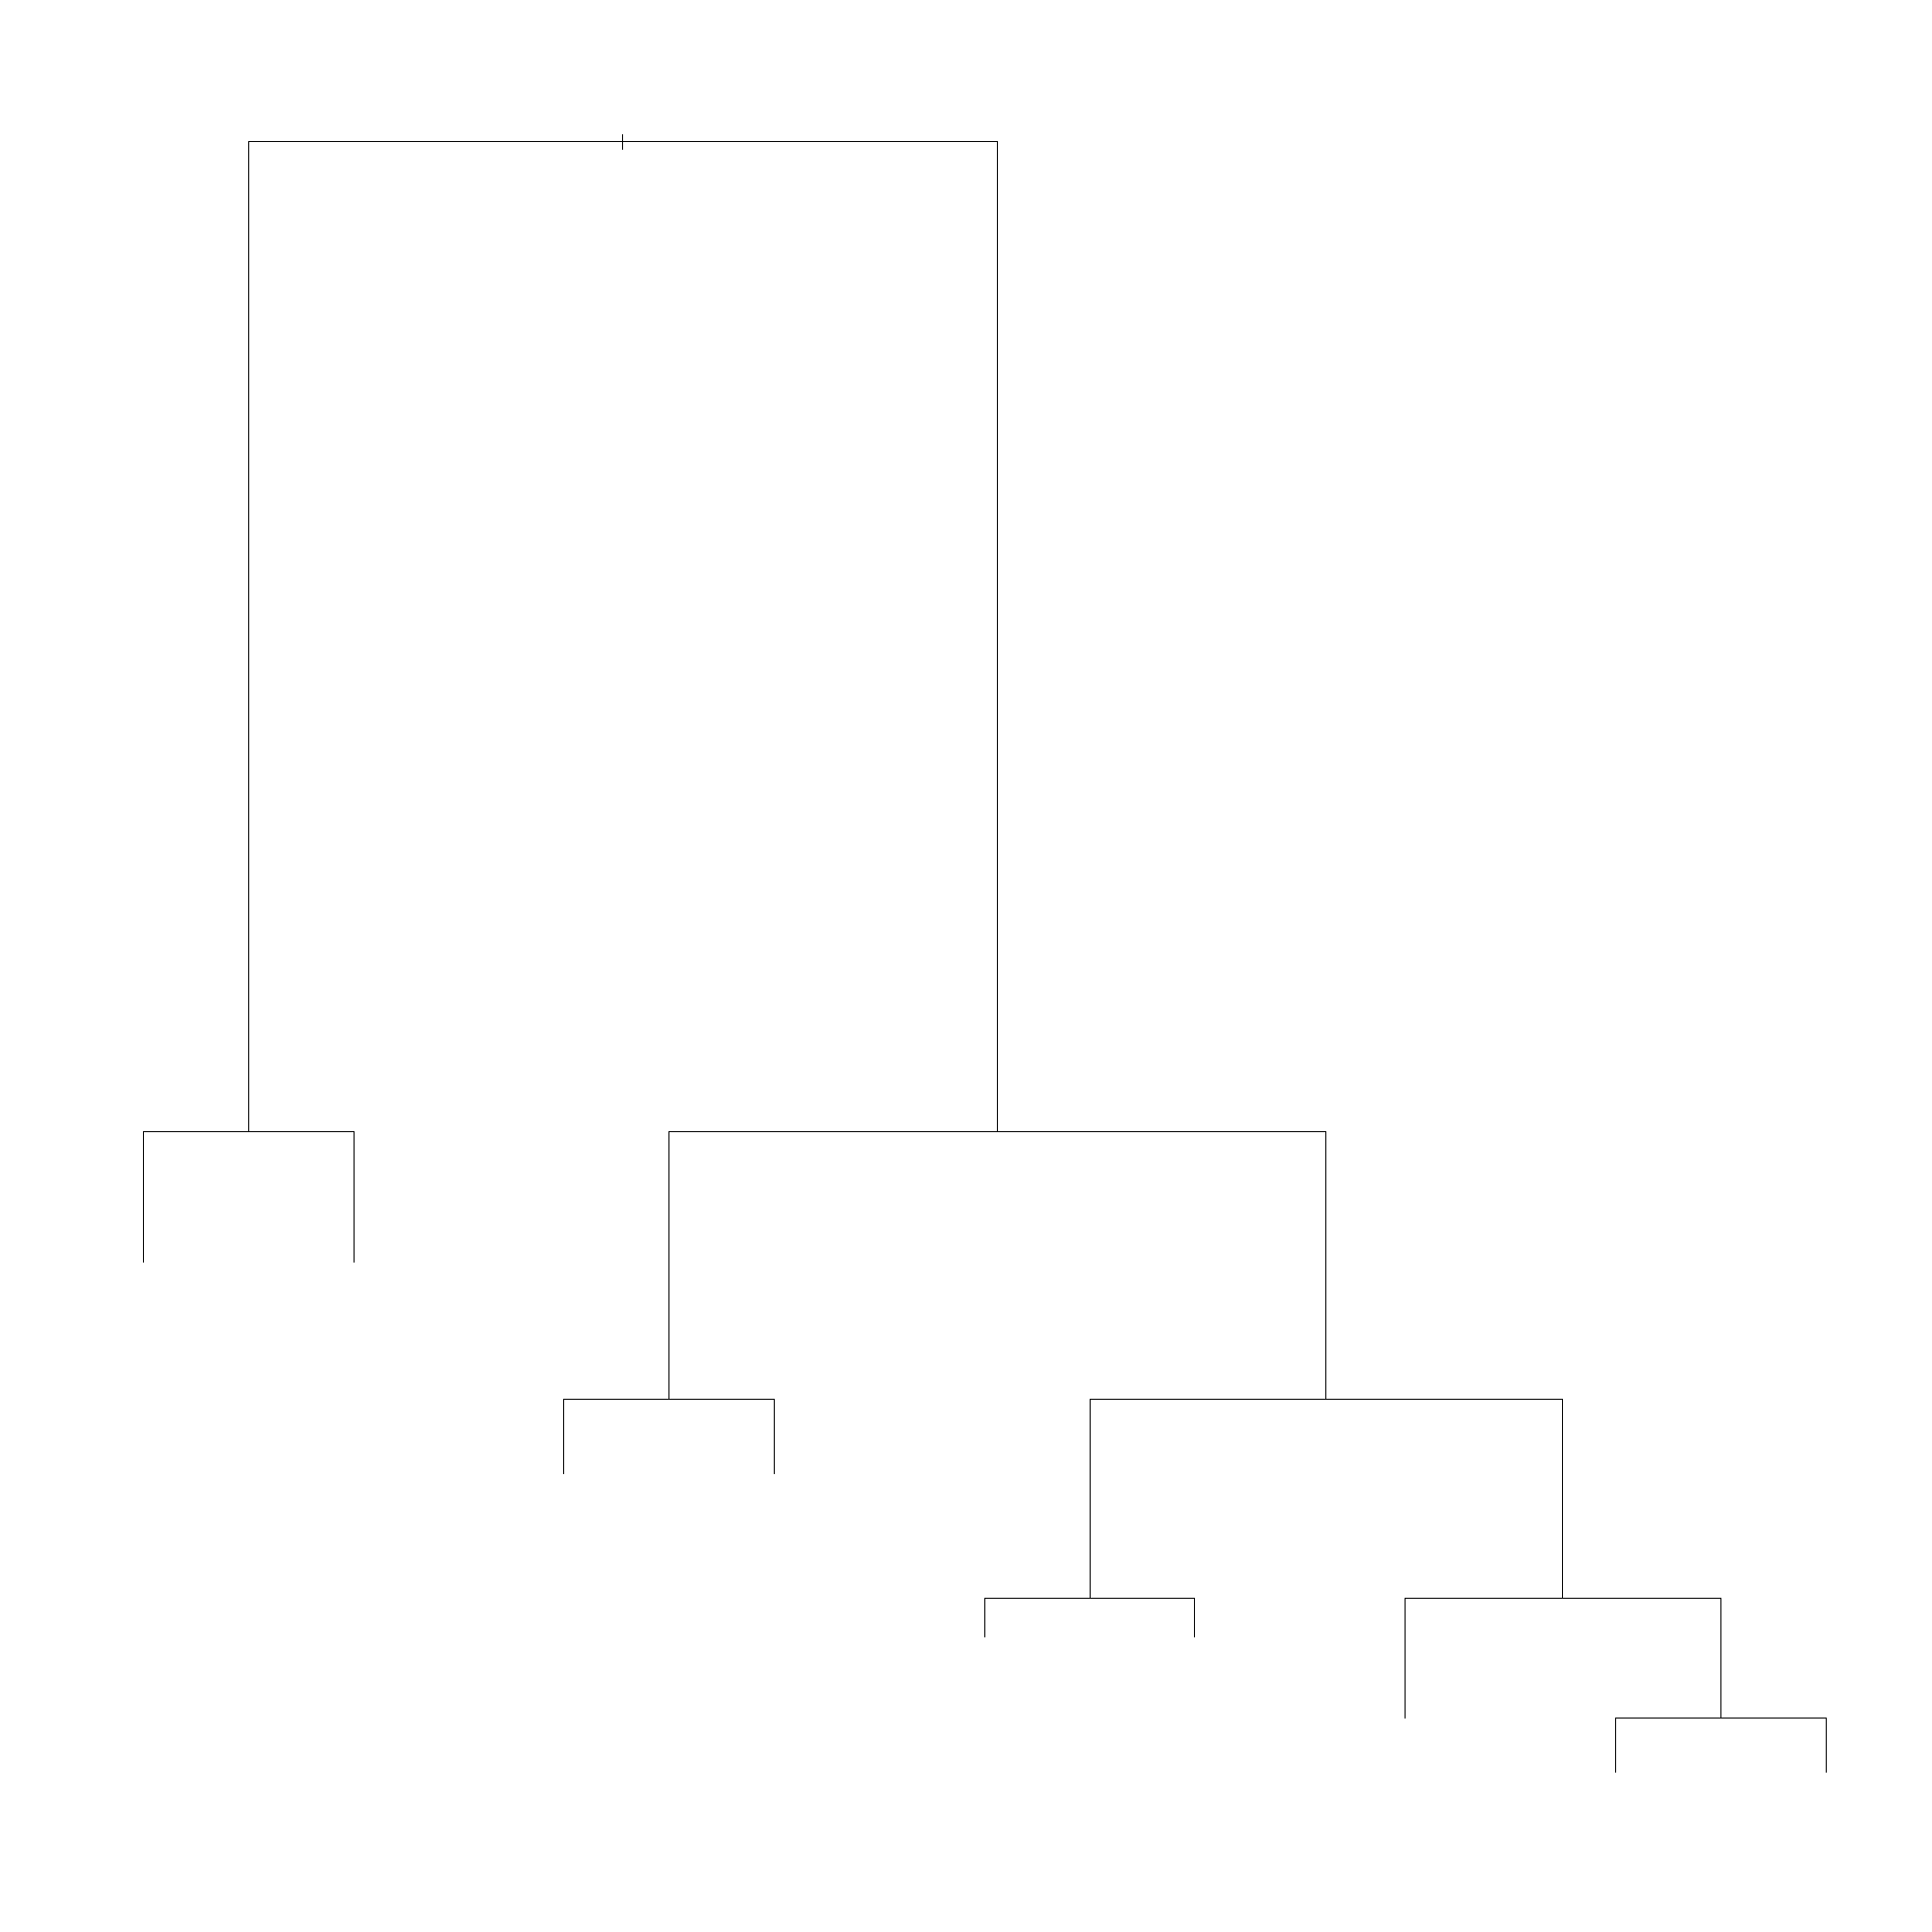

In [206]:
plot(dt)

In [207]:
#Random forest
library(randomForest)

set.seed(123)
rf = randomForest(formula = cnt ~ ., data = bike_train, ntree = 100)

#Predicting the test values
y_pred_rf = predict(rf, newdata = bike_test)


#Performance metrics
mae_rf = mae(bike_test[[11]], y_pred_rf)
rmse_rf = rmse(bike_test[[11]], y_pred_rf)

cat("mae_m:\n",mae_rf,"\n") 
cat("\n")
cat("rmse_m:\n",rmse_rf)

mae_m:
 203.6799 

rmse_m:
 308.0277

In [208]:
summary(rf)

                Length Class  Mode     
call               4   -none- call     
type               1   -none- character
predicted       3532   -none- numeric  
mse              100   -none- numeric  
rsq              100   -none- numeric  
oob.times       3532   -none- numeric  
importance        10   -none- numeric  
importanceSD       0   -none- NULL     
localImportance    0   -none- NULL     
proximity          0   -none- NULL     
ntree              1   -none- numeric  
mtry               1   -none- numeric  
forest            11   -none- list     
coefs              0   -none- NULL     
y               3532   -none- numeric  
test               0   -none- NULL     
inbag              0   -none- NULL     
terms              3   terms  call     

In [209]:
print(rf)


Call:
 randomForest(formula = cnt ~ ., data = bike_train, ntree = 100) 
               Type of random forest: regression
                     Number of trees: 100
No. of variables tried at each split: 3

          Mean of squared residuals: 92435.26
                    % Var explained: 91.43


In [210]:
summary(rf)

                Length Class  Mode     
call               4   -none- call     
type               1   -none- character
predicted       3532   -none- numeric  
mse              100   -none- numeric  
rsq              100   -none- numeric  
oob.times       3532   -none- numeric  
importance        10   -none- numeric  
importanceSD       0   -none- NULL     
localImportance    0   -none- NULL     
proximity          0   -none- NULL     
ntree              1   -none- numeric  
mtry               1   -none- numeric  
forest            11   -none- list     
coefs              0   -none- NULL     
y               3532   -none- numeric  
test               0   -none- NULL     
inbag              0   -none- NULL     
terms              3   terms  call     

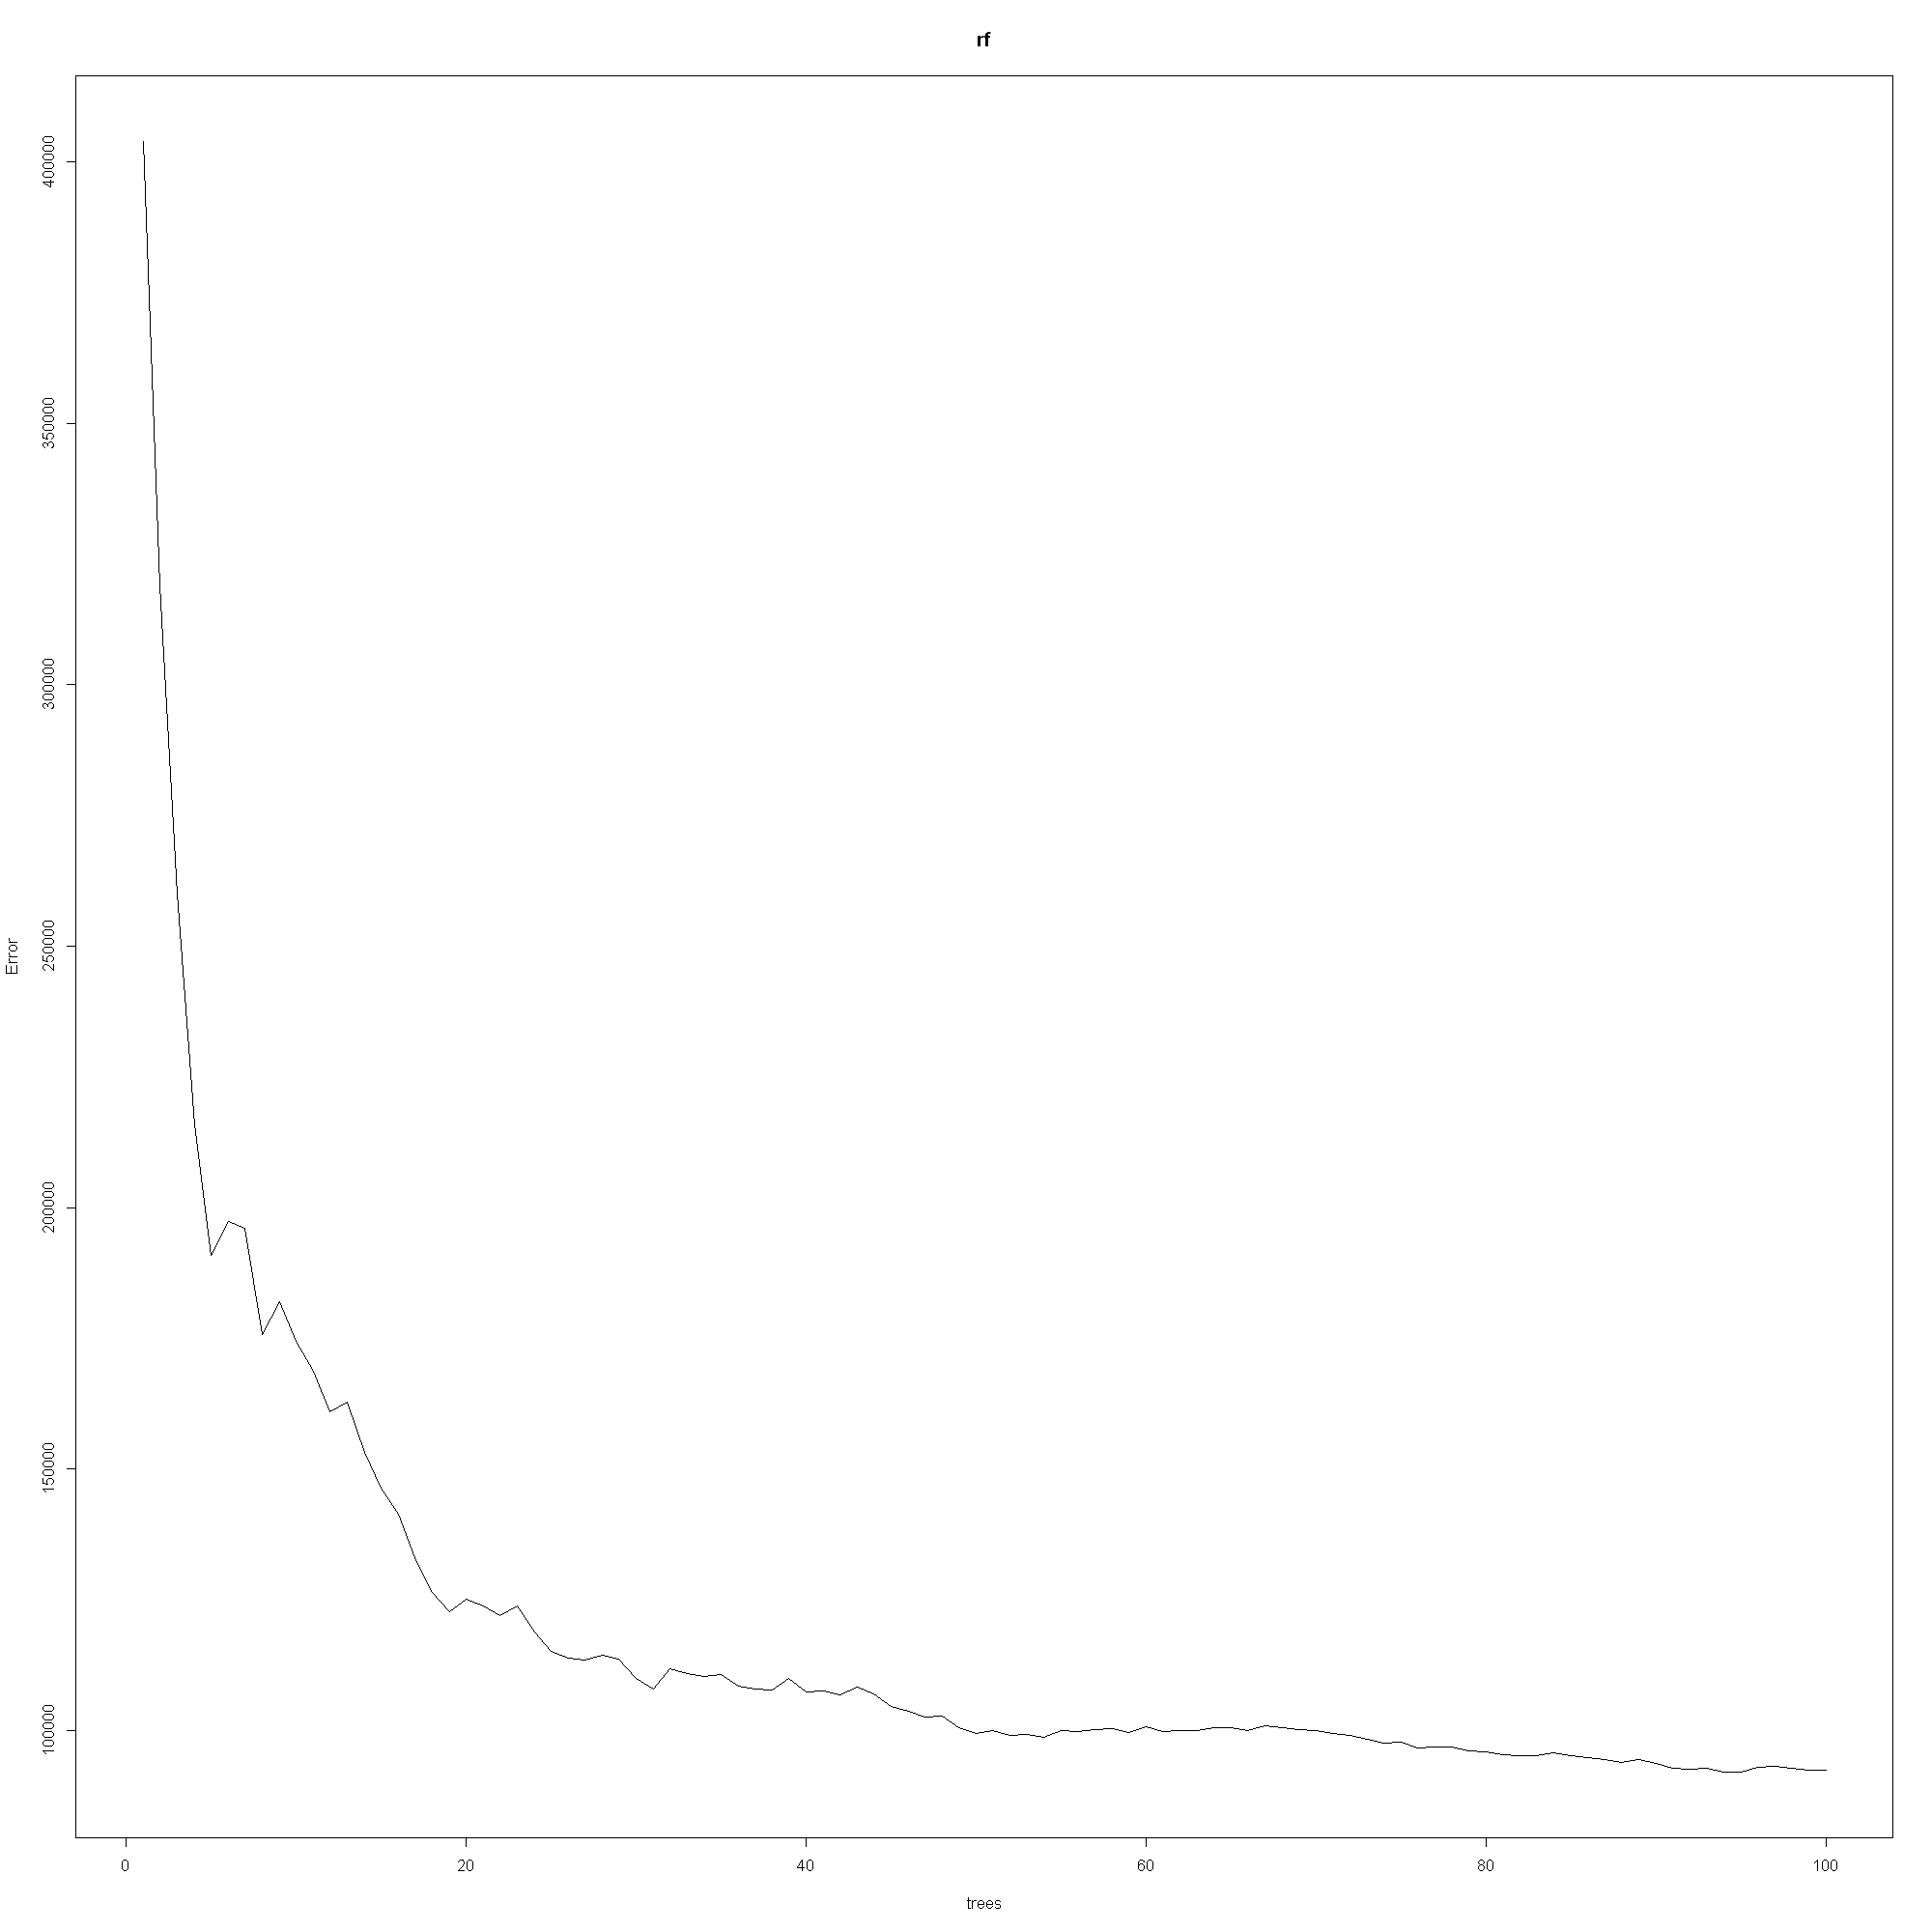

In [211]:
plot(rf)

In [212]:
head(y_pred_rf)

1         2         3         4         5         6 
 70.77672 902.51017 948.46353 125.09687  96.64020 144.23685

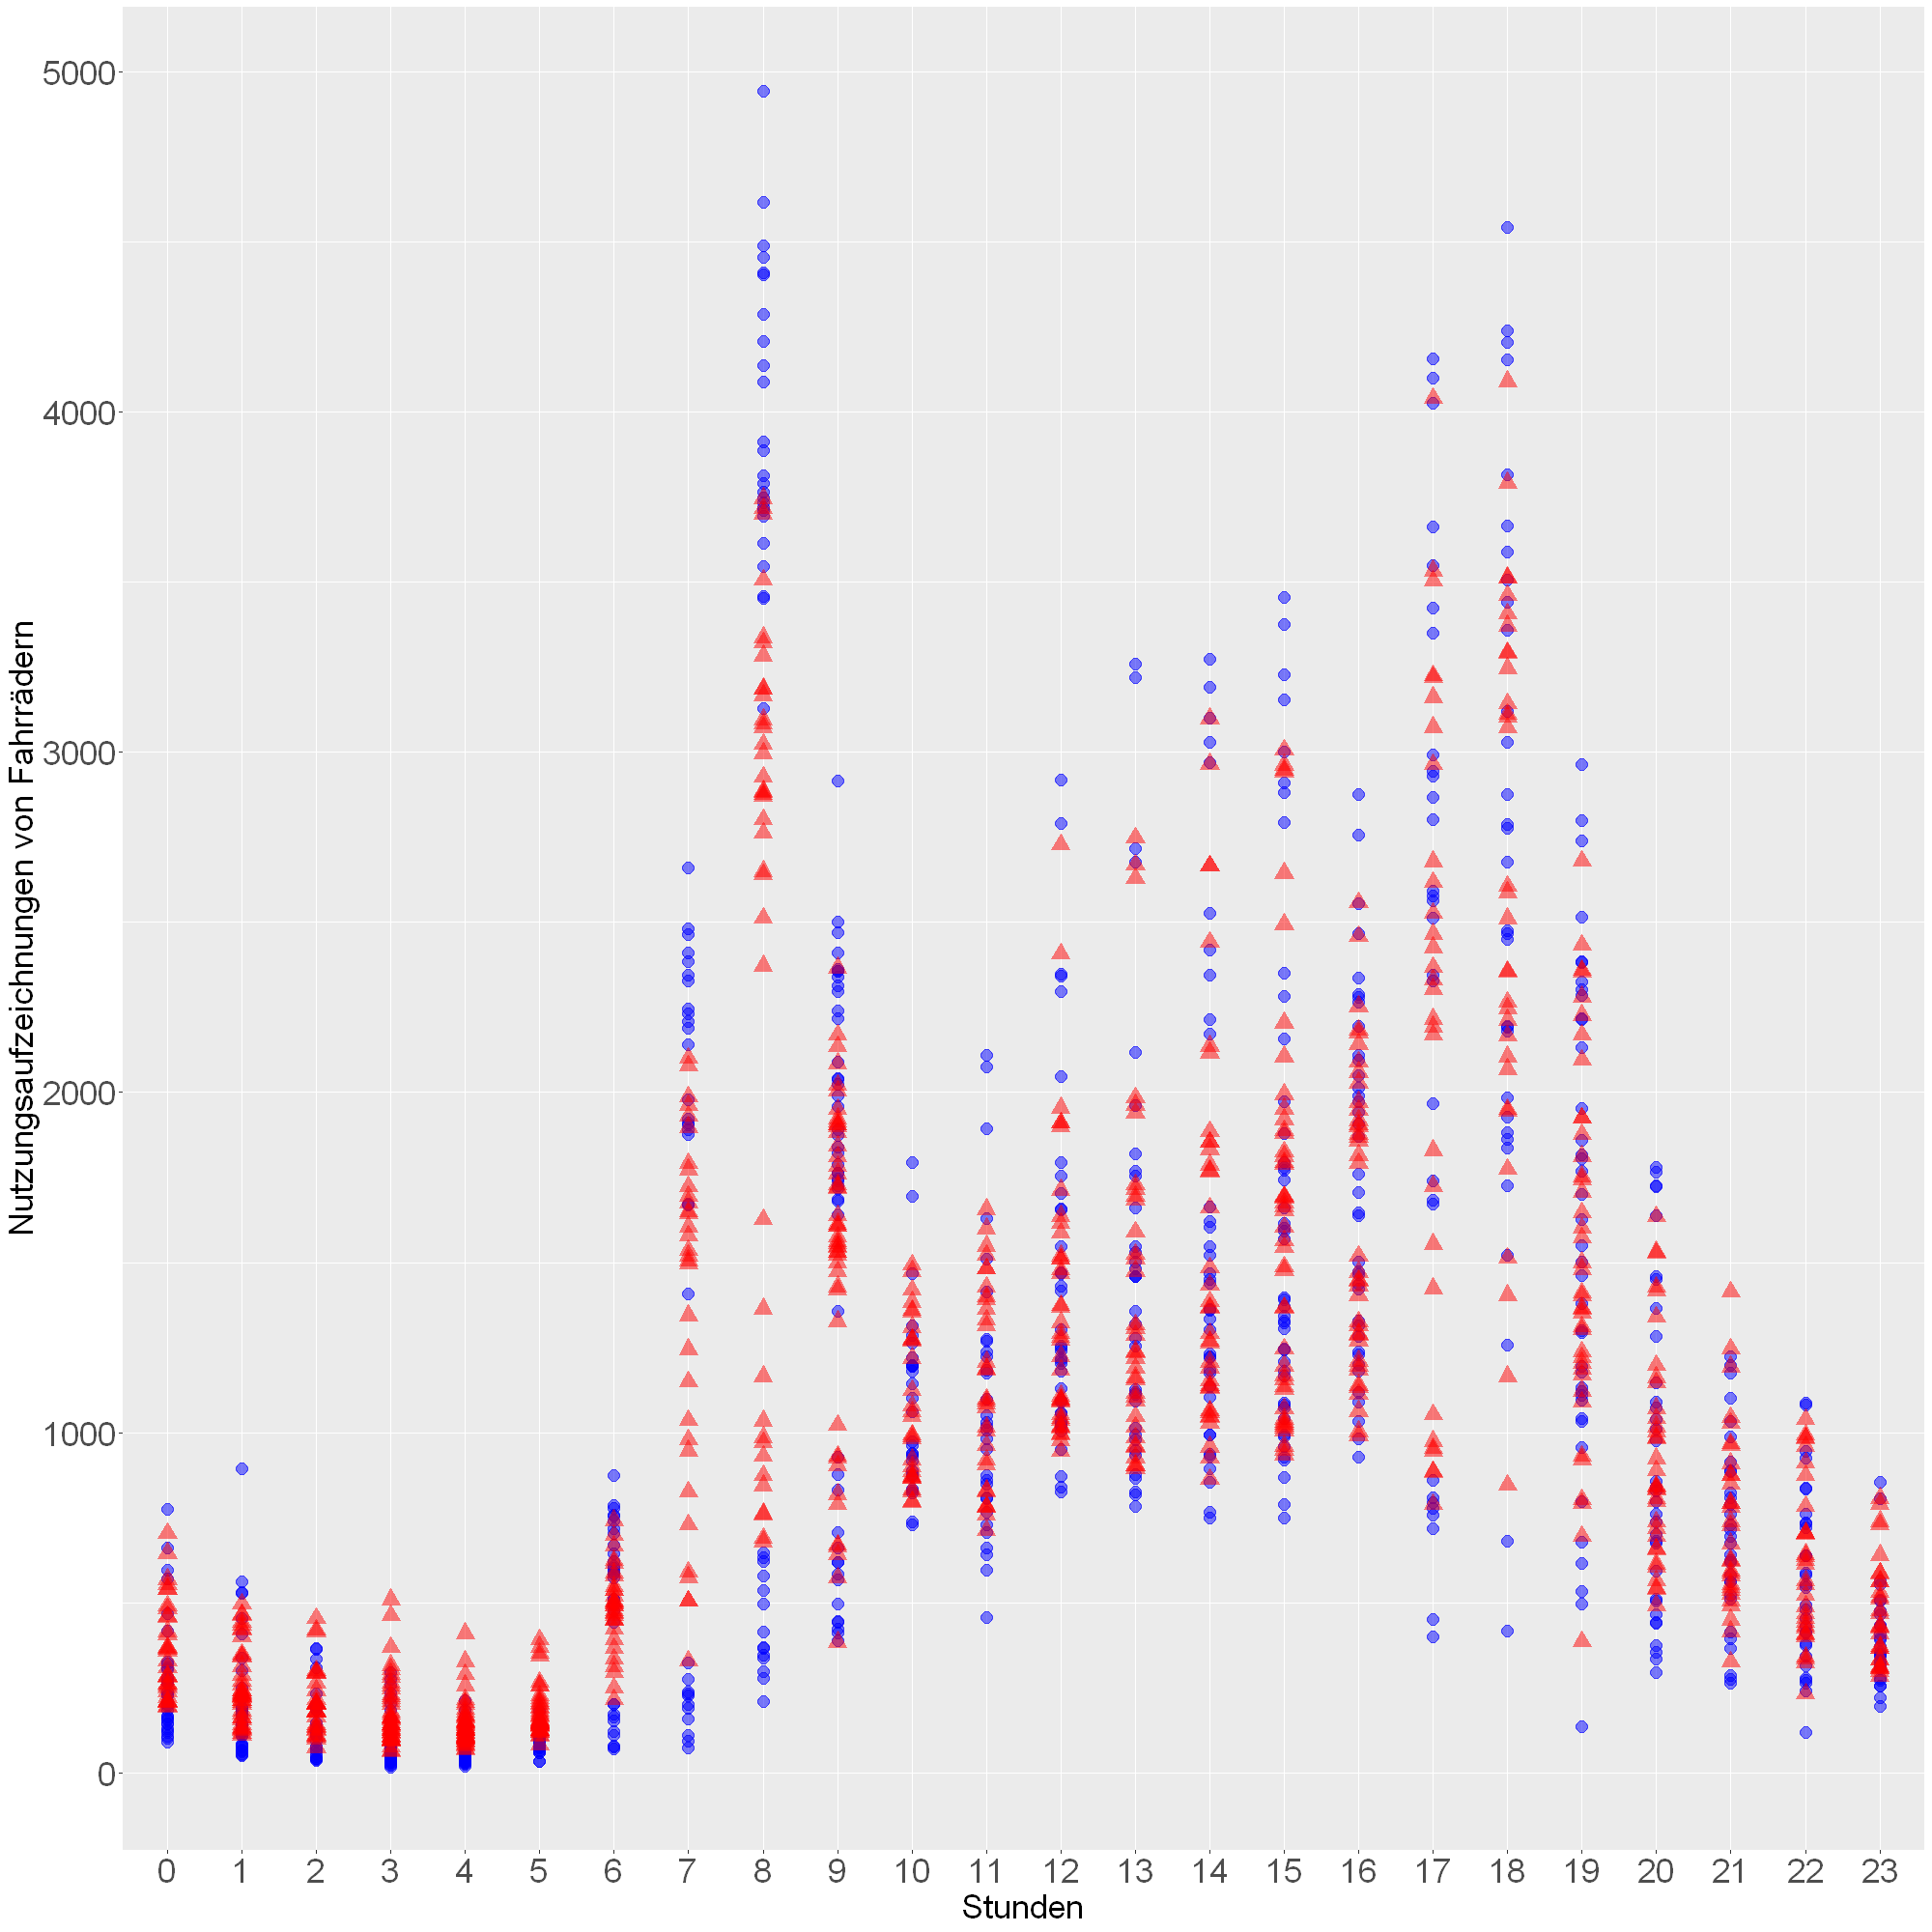

In [213]:
# Build scatterplot

A = data.frame(x = bike_test$hr,y=bike_test$cnt)
B = data.frame(x = bike_test$hr,y=y_pred_rf)

g<-ggplot(A, aes(x,y)) + 
    geom_point(color = 'blue', alpha = 0.5, size= 4) + 
    geom_point(data= B, color = 'red',  alpha = 0.5, size= 5, shape=17) + 
    labs(x = "Stunden", y = "Nutzungsaufzeichnungen von Fahrrädern", color = "", 'Transperency', size= 25)



#Aussehen Editing
g + theme(axis.text=element_text(size=25),
            axis.title=element_text(size=25))

 


options(repr.plot.width = 20, repr.plot.height = 20, repr.plot.res = 100)








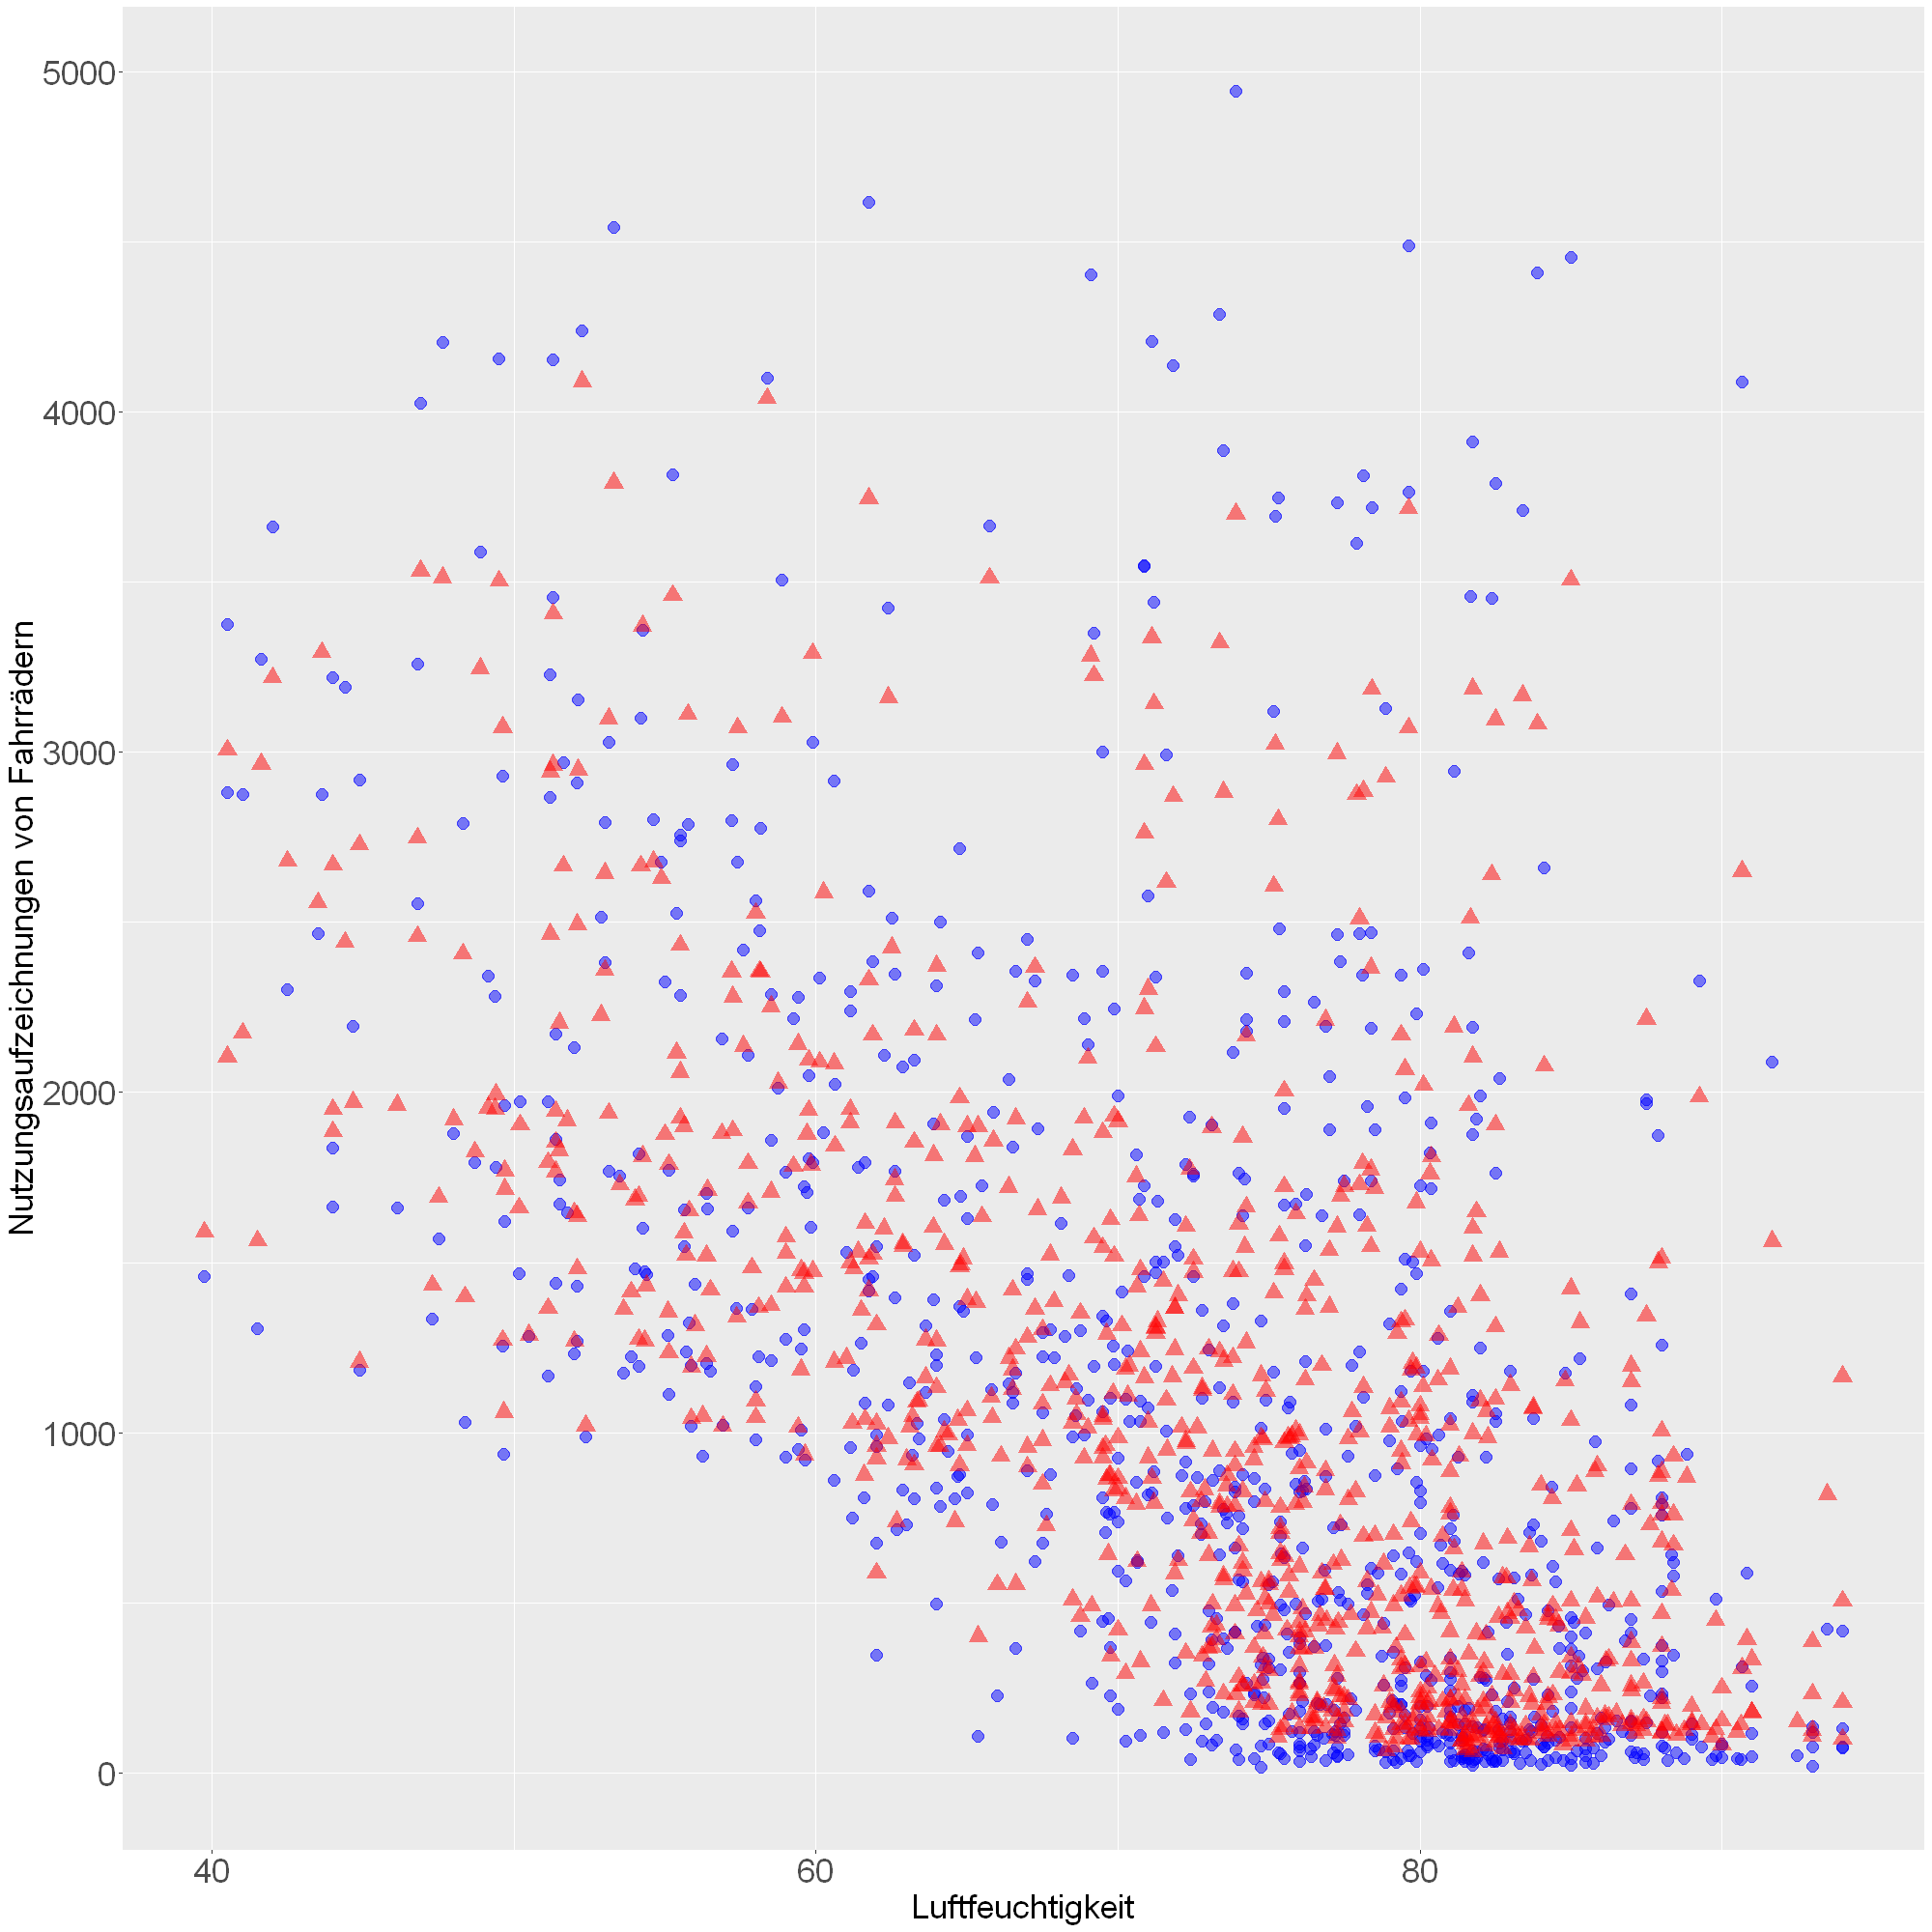

In [215]:
# Build scatterplot

A = data.frame(x = bike_test$hum,y=bike_test$cnt)
B = data.frame(x = bike_test$hum,y=y_pred_rf)

g<-ggplot(A, aes(x,y)) + 
    geom_point(color = 'blue', alpha = 0.5, size= 4) + 
    geom_point(data= B, color = 'red',  alpha = 0.5, size= 5, shape=17) + 
    labs(x = "Luftfeuchtigkeit", y = "Nutzungsaufzeichnungen von Fahrrädern", color = "", 'Transperency', size= 25)



#Aussehen Editing
g + theme(axis.text=element_text(size=25),
            axis.title=element_text(size=25))

 


options(repr.plot.width = 20, repr.plot.height = 20, repr.plot.res = 100)

### Nur Daten des Weekends untersucht

In [173]:
#Splitting data
library(caTools)
set.seed(123)


split = sample.split(bike_data_weekend$cnt, SplitRatio = 0.8)
bike_train_weekend = subset(bike_data_weekend, split == TRUE)
bike_test_weekend = subset(bike_data_weekend, split == FALSE)

In [174]:
#Random forest
library(randomForest)

set.seed(123)
rf = randomForest(formula = cnt ~ ., data = bike_train_weekend, ntree = 100)

#Predicting the test values
y_pred_rf = predict(rf, newdata = bike_test_weekend)


#Performance metrics
mae_rf = mae(bike_test_weekend[[11]], y_pred_rf)
rmse_rf = rmse(bike_test_weekend[[11]], y_pred_rf)

cat("mae_m:\n",mae_rf,"\n") 
cat("\n")
cat("rmse_m:\n",rmse_rf)

mae_m:
 115.4777 

rmse_m:
 158.1817

In [175]:
print(rf)


Call:
 randomForest(formula = cnt ~ ., data = bike_train_weekend, ntree = 100) 
               Type of random forest: regression
                     Number of trees: 100
No. of variables tried at each split: 3

          Mean of squared residuals: 25575.19
                    % Var explained: 96.57


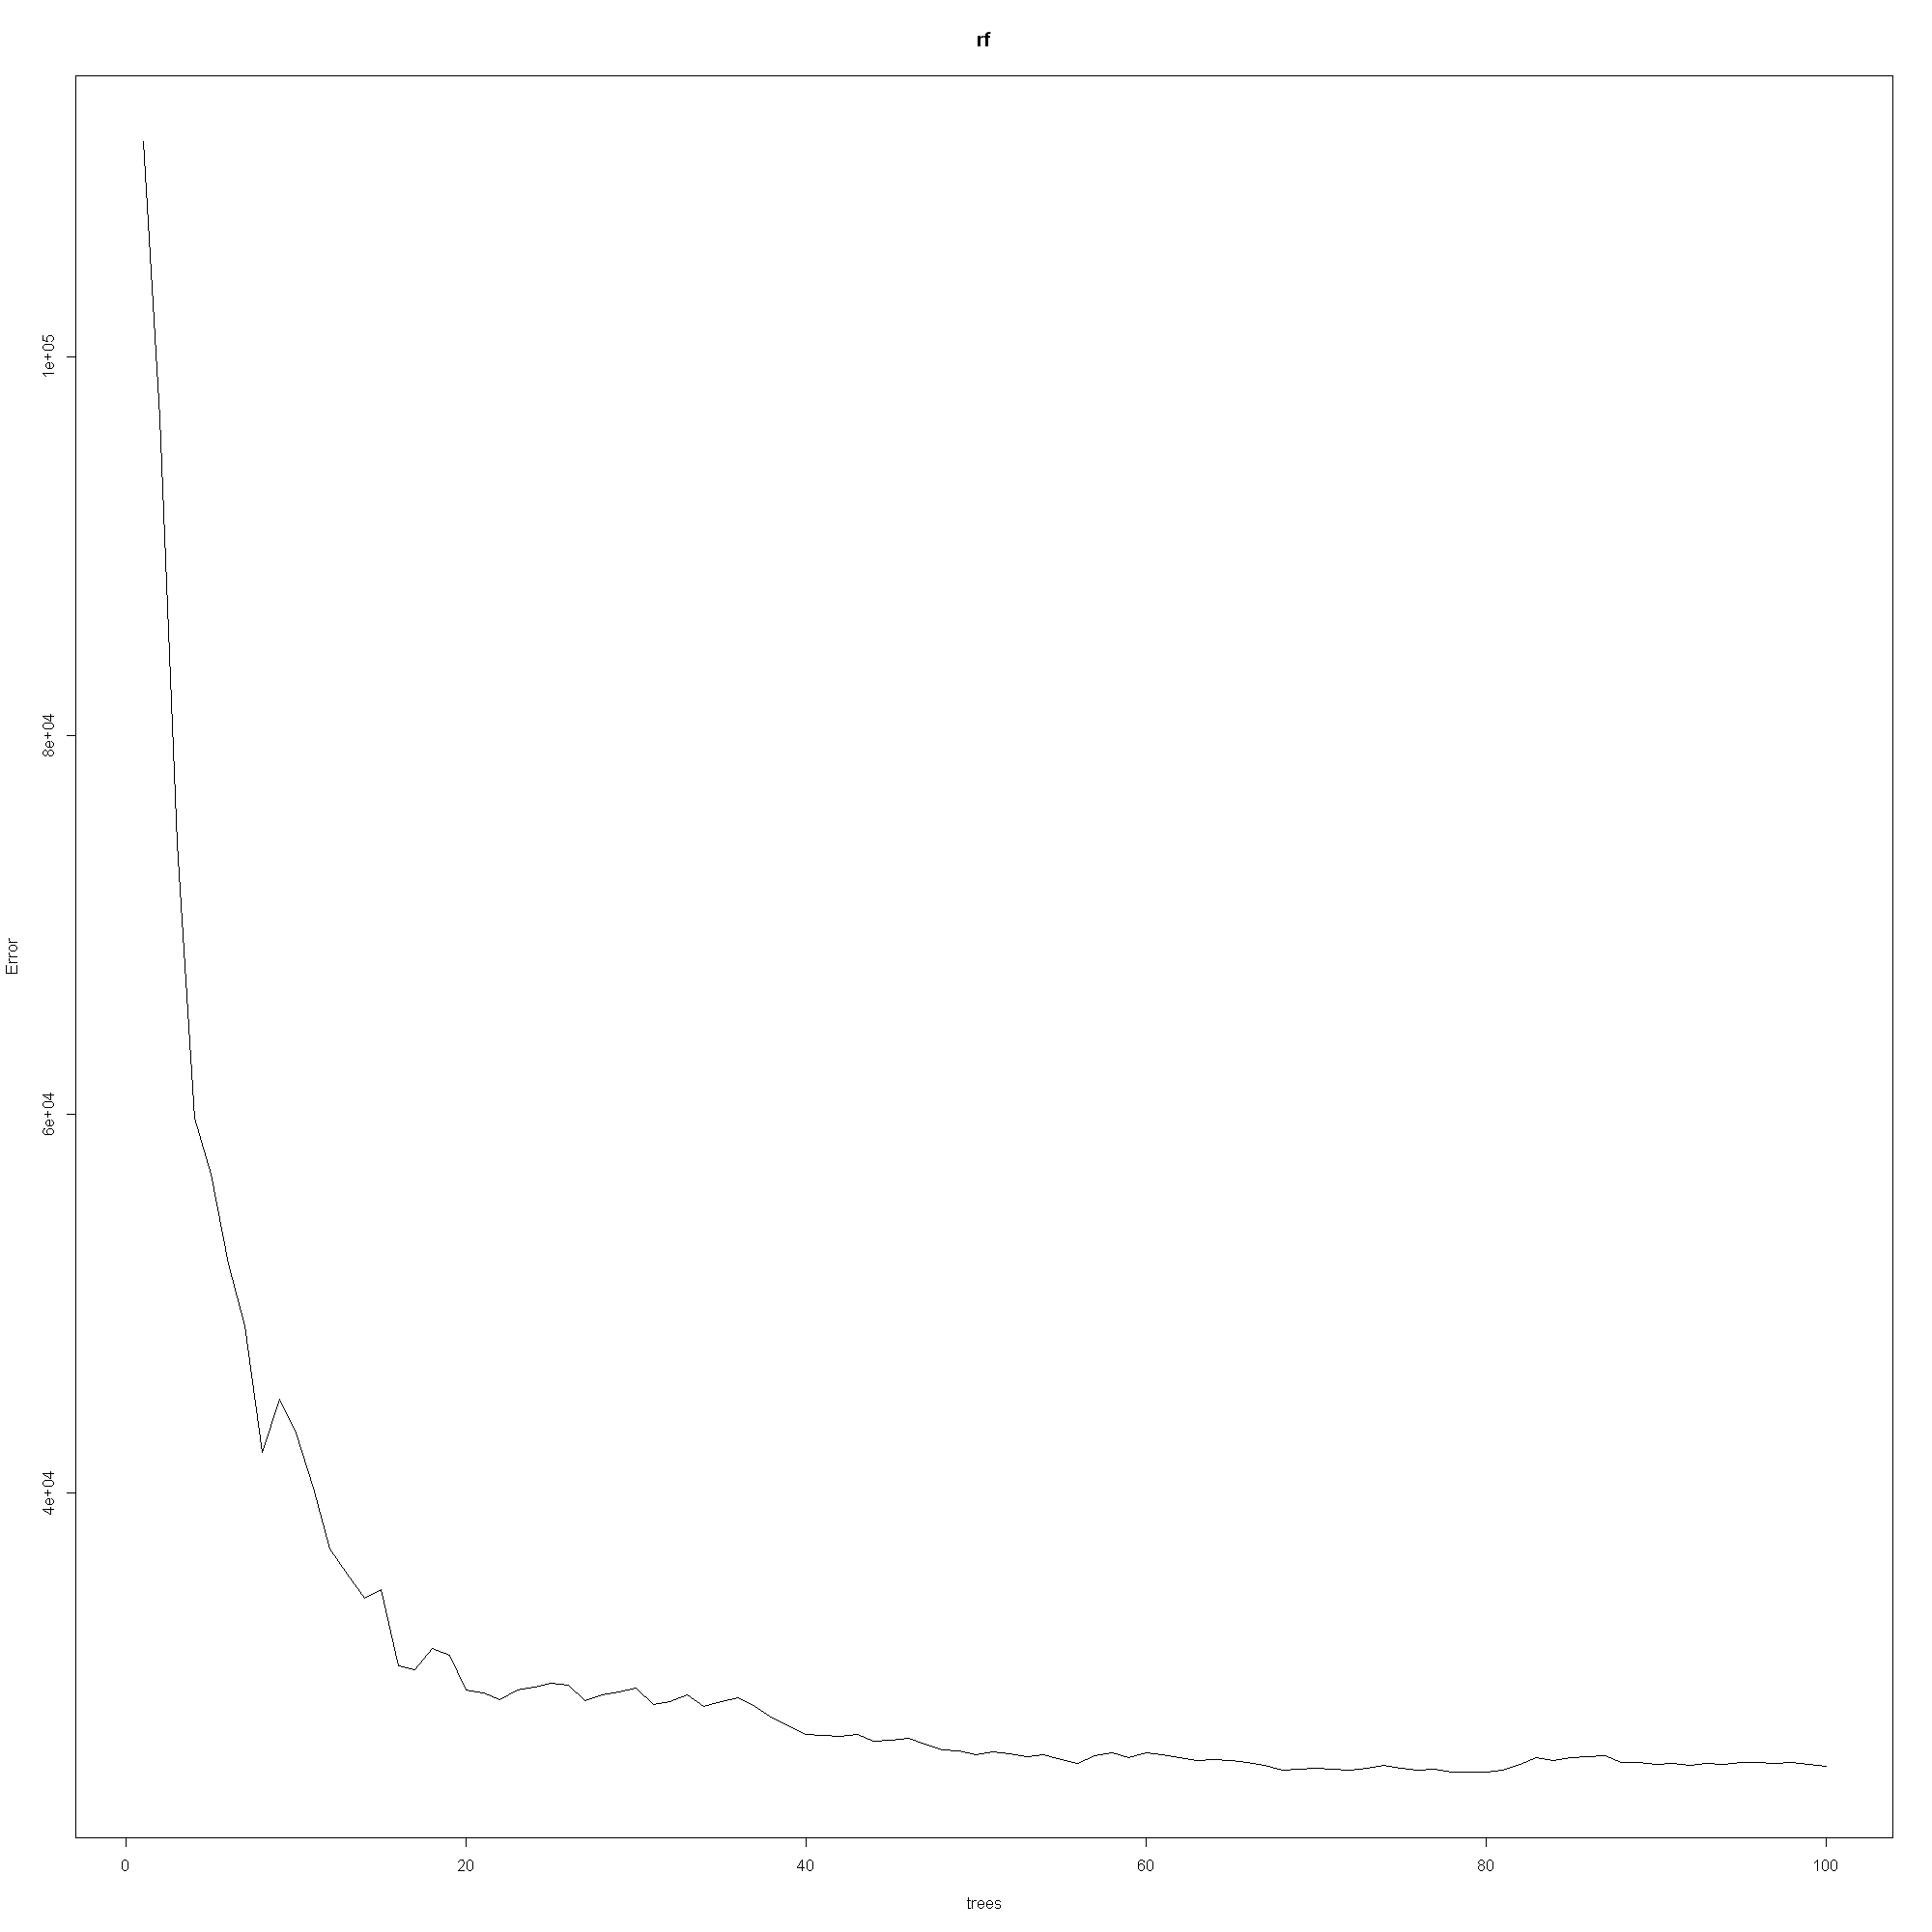

In [176]:
plot(rf)

In [177]:
importance(rf)

,IncNodePurity
month_nr,40378457
weekdays_nr,1435288
hr,276383780
is_holiday,0
season,11697746
weather_code,7990374
t1,77100729
t2,80943724
hum,181200662
wind_speed,17341490


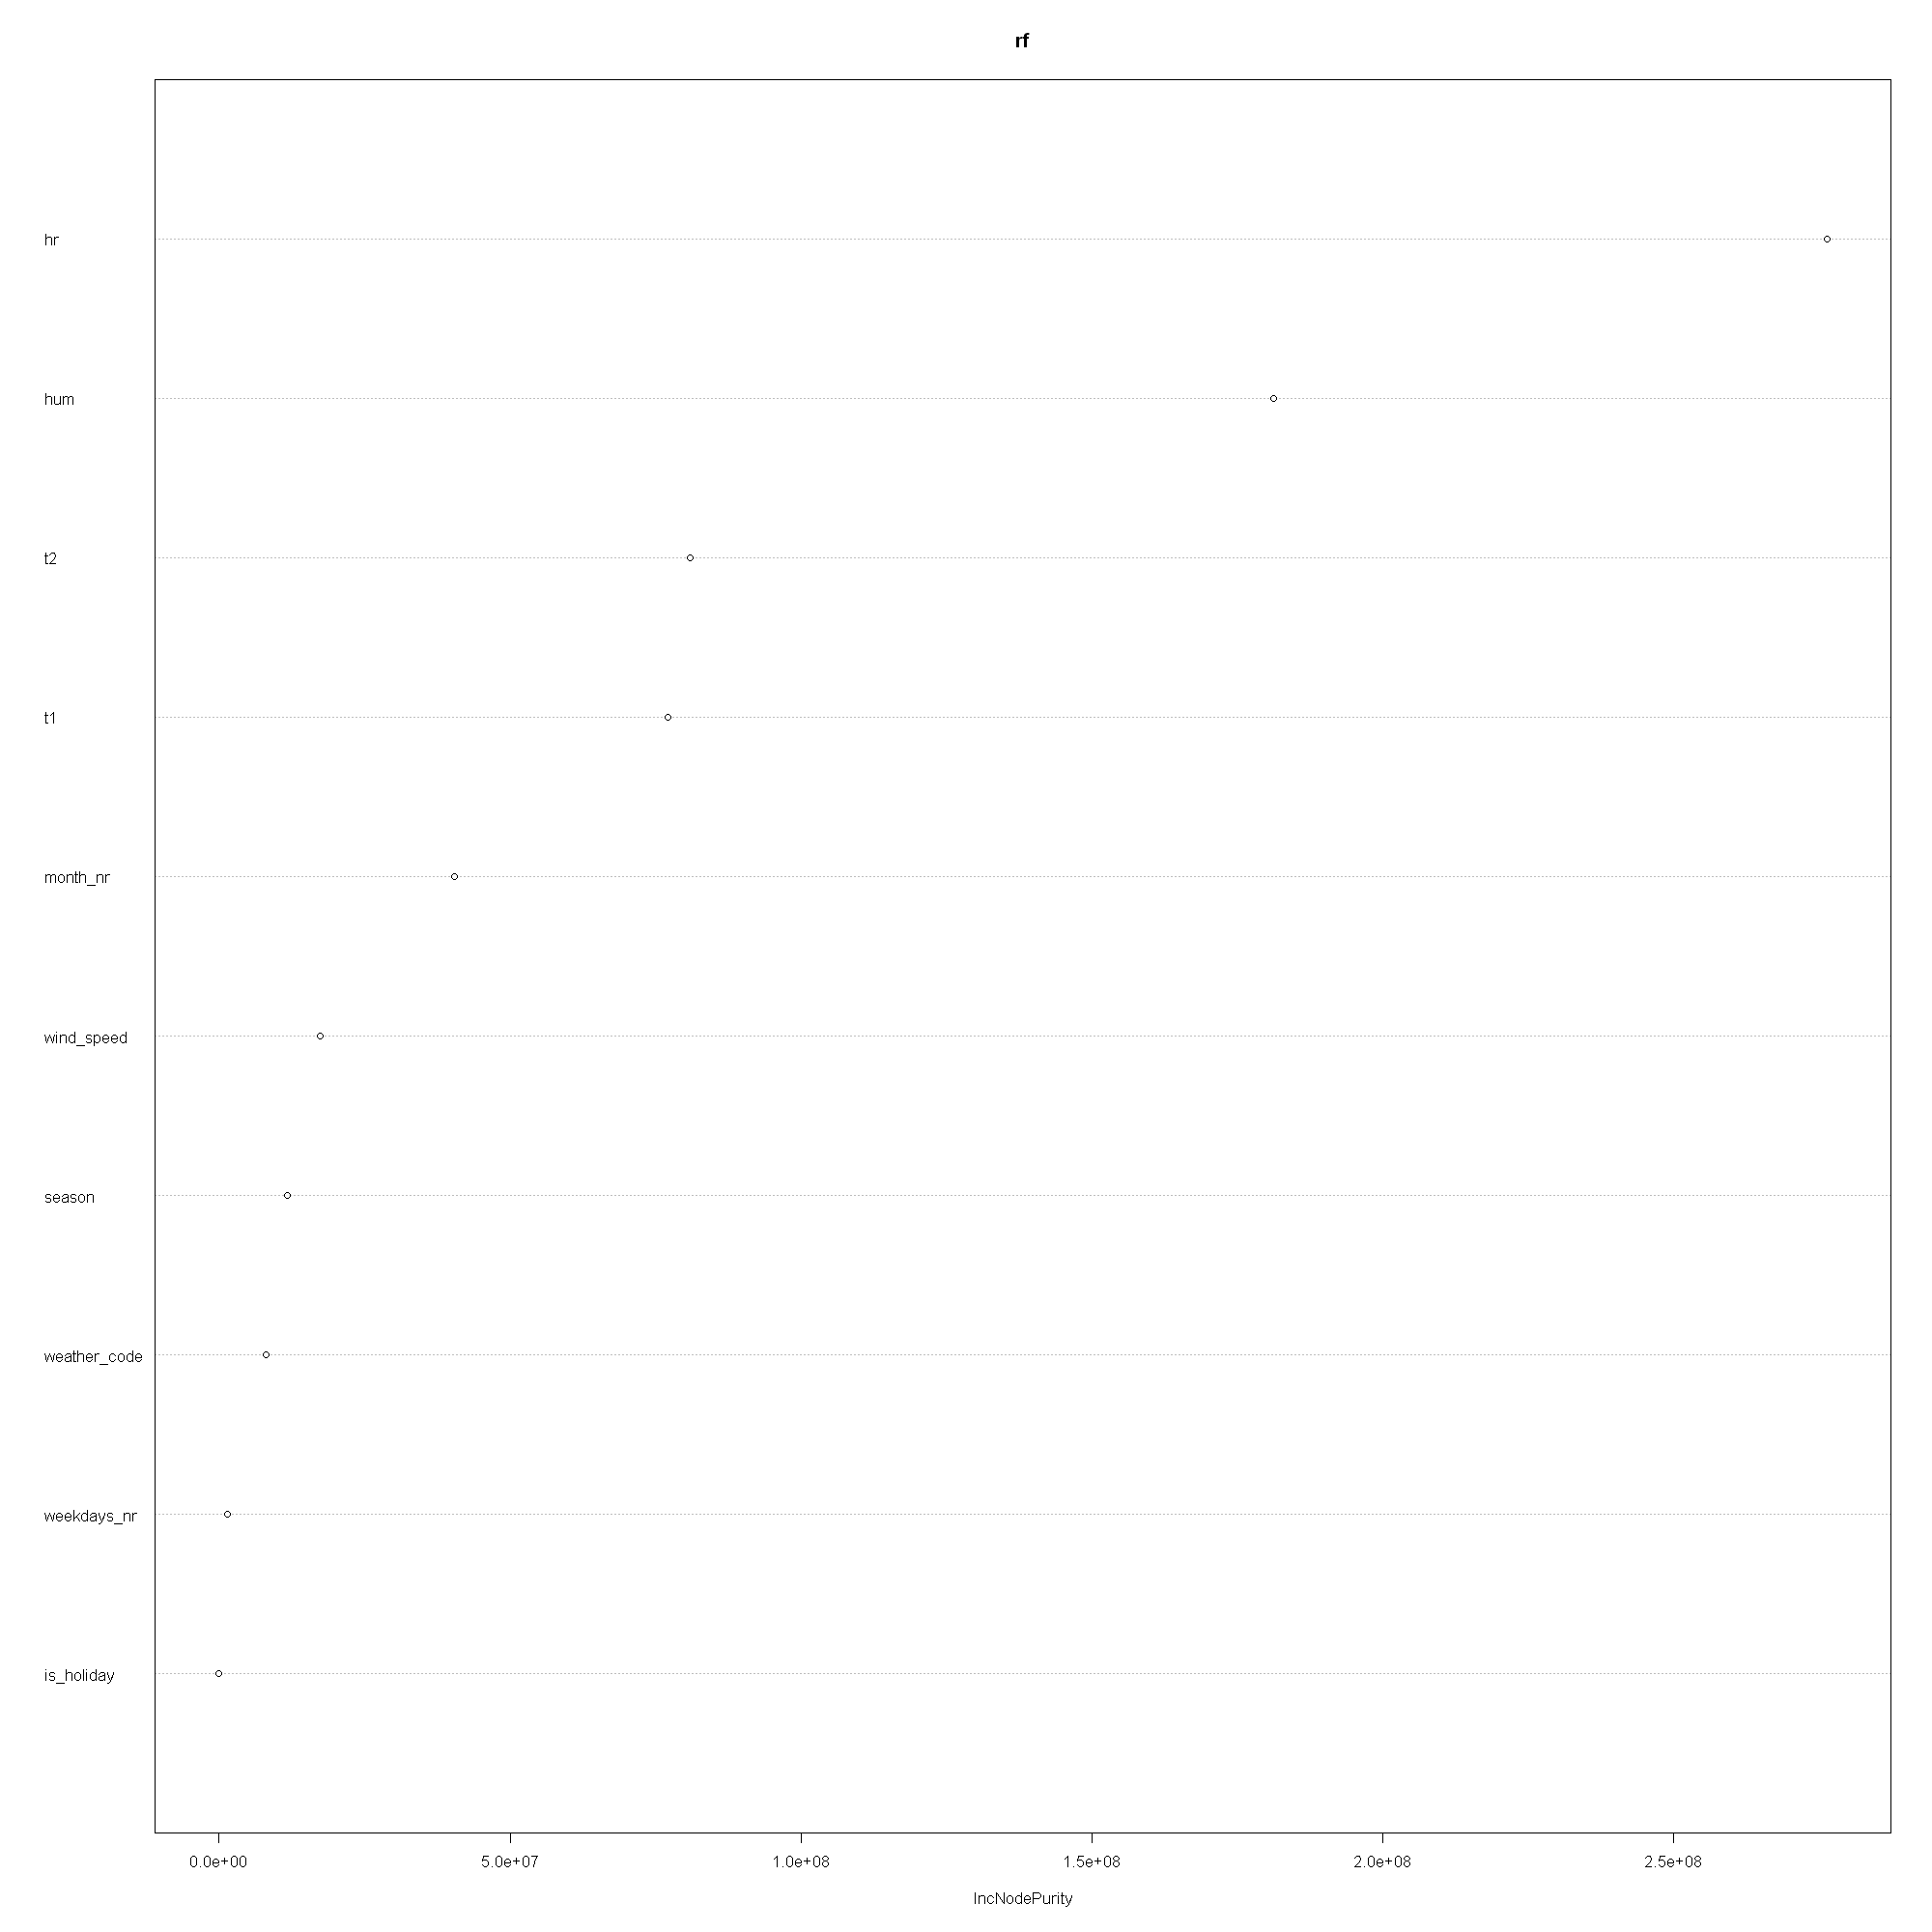

In [178]:
varImpPlot(rf)

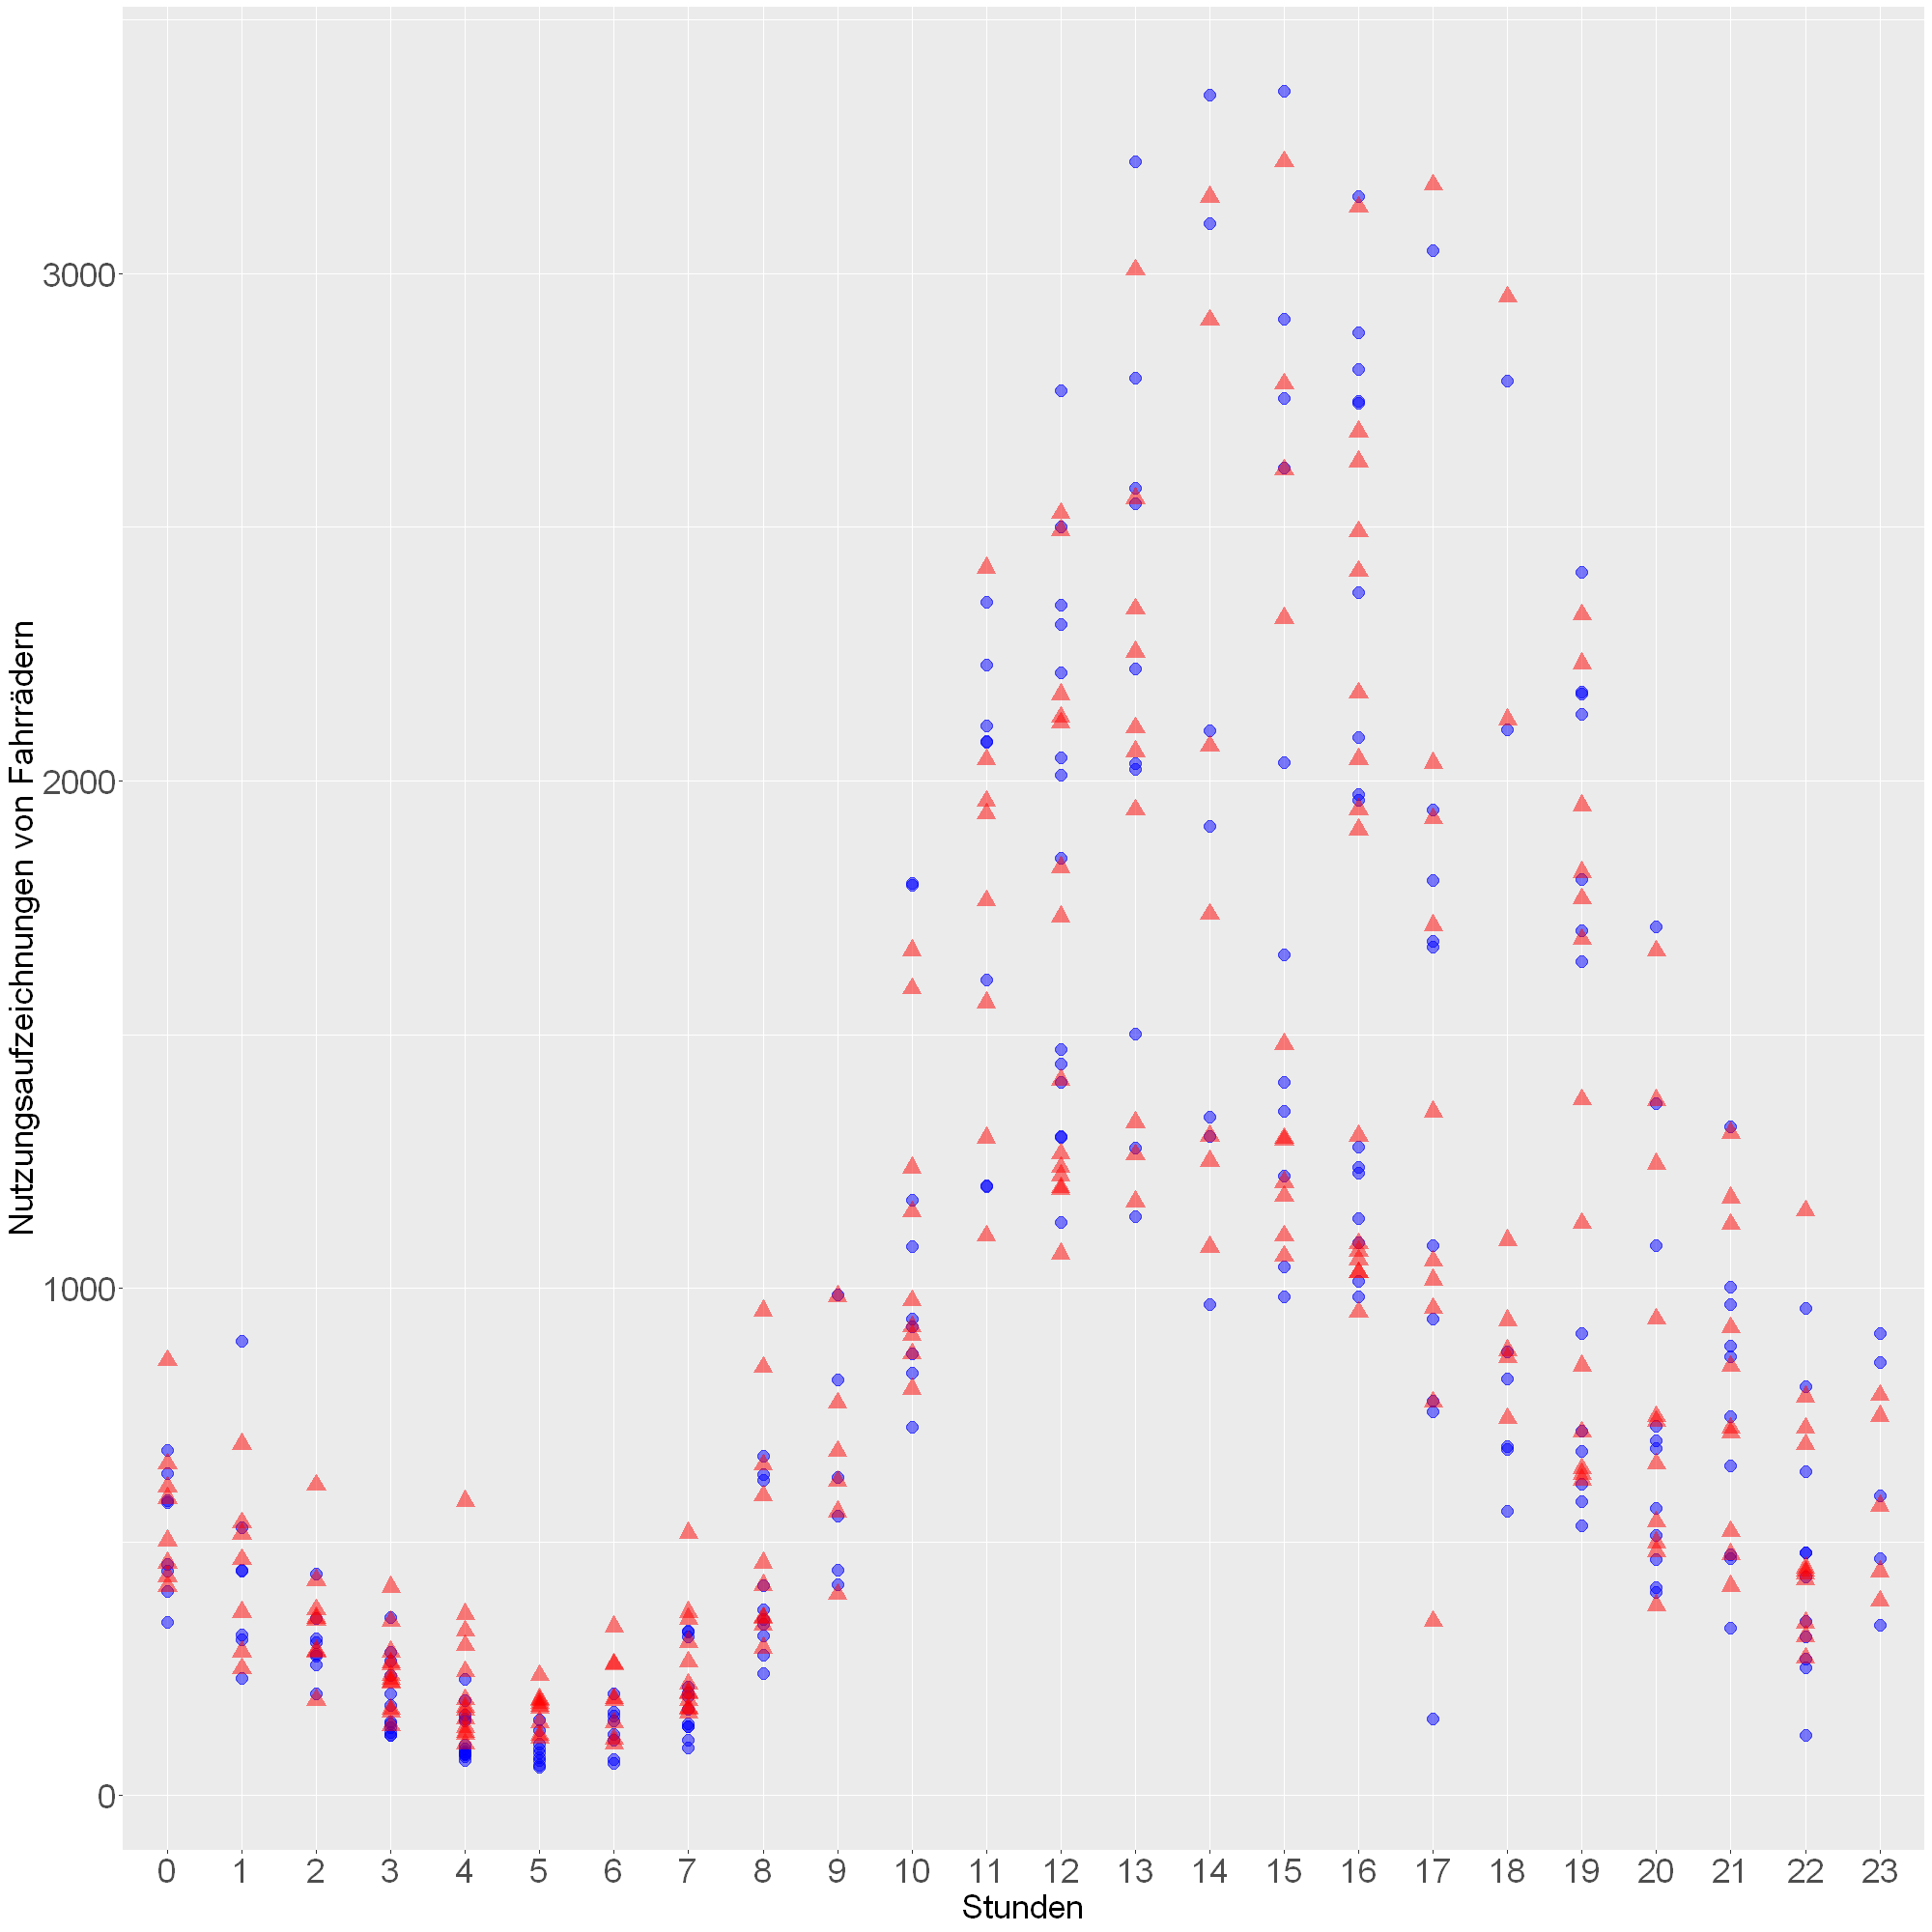

In [179]:
# Build scatterplot

A = data.frame(x = bike_test_weekend$hr,y=bike_test_weekend$cnt)
B = data.frame(x = bike_test_weekend$hr,y=y_pred_rf)

g<-ggplot(A, aes(x,y)) + 
    geom_point(color = 'blue', alpha = 0.5, size= 4) + 
    geom_point(data= B, color = 'red',  alpha = 0.5, size= 5, shape=17) + 
    labs(x = "Stunden", y = "Nutzungsaufzeichnungen von Fahrrädern", color = "", 'Transperency', size= 25)



#Aussehen Editing
g + theme(axis.text=element_text(size=25),
            axis.title=element_text(size=25))

 


options(repr.plot.width = 20, repr.plot.height = 20, repr.plot.res = 100)

#### keine Outliners für ganzen Datensets

In [180]:
#Splitting data
library(caTools)
set.seed(123)


split = sample.split(no_outliers$cnt, SplitRatio = 0.8)
bike_train_o = subset(no_outliers, split == TRUE)
bike_test_o = subset(no_outliers, split == FALSE)

In [181]:
#Random forest
library(randomForest)

set.seed(123)
rf = randomForest(formula = cnt ~ ., data = bike_train_o, ntree = 58)

#Predicting the test values
y_pred_rf = predict(rf, newdata = bike_test_o)


#Performance metrics
mae_rf = mae(bike_test_o[[11]], y_pred_rf)
rmse_rf = rmse(bike_test_o[[11]], y_pred_rf)

cat("mae_m:\n",mae_rf,"\n") 
cat("\n")
cat("rmse_m:\n",rmse_rf)

mae_m:
 194.5707 

rmse_m:
 305.8292

In [182]:
print(rf)


Call:
 randomForest(formula = cnt ~ ., data = bike_train_o, ntree = 58) 
               Type of random forest: regression
                     Number of trees: 58
No. of variables tried at each split: 3

          Mean of squared residuals: 81283.52
                    % Var explained: 89.13


### Datenset nur unter der Woche

In [183]:
library(rpart)
library(Metrics)
library(caTools)



In [184]:
#Splitting data
library(caTools)
set.seed(123)


split = sample.split(bike_data_workingdays$cnt, SplitRatio = 0.8)
bike_train_work = subset(bike_data_workingdays, split == TRUE)
bike_test_work = subset(bike_data_workingdays, split == FALSE)

In [186]:
#Random forest
library(randomForest)

set.seed(123)
rf_work = randomForest(formula = cnt ~ ., data = bike_train_work, ntree = 58)

#Predicting the test values
y_pred_rf = predict(rf_work, newdata = bike_test_work)


#Performance metrics
mae_rf = mae(bike_train_work[[11]], y_pred_rf)
rmse_rf = rmse(bike_train_work[[11]], y_pred_rf)

cat("mae_m:\n",mae_rf,"\n") 
cat("\n")
cat("rmse_m:\n",rmse_rf)

mae_m:
 1089.409 

rmse_m:
 1440.669

In [118]:
print(rf_work)


Call:
 randomForest(formula = cnt ~ ., data = bike_train_work, ntree = 58) 
               Type of random forest: regression
                     Number of trees: 58
No. of variables tried at each split: 3

          Mean of squared residuals: 65774.28
                    % Var explained: 94.52


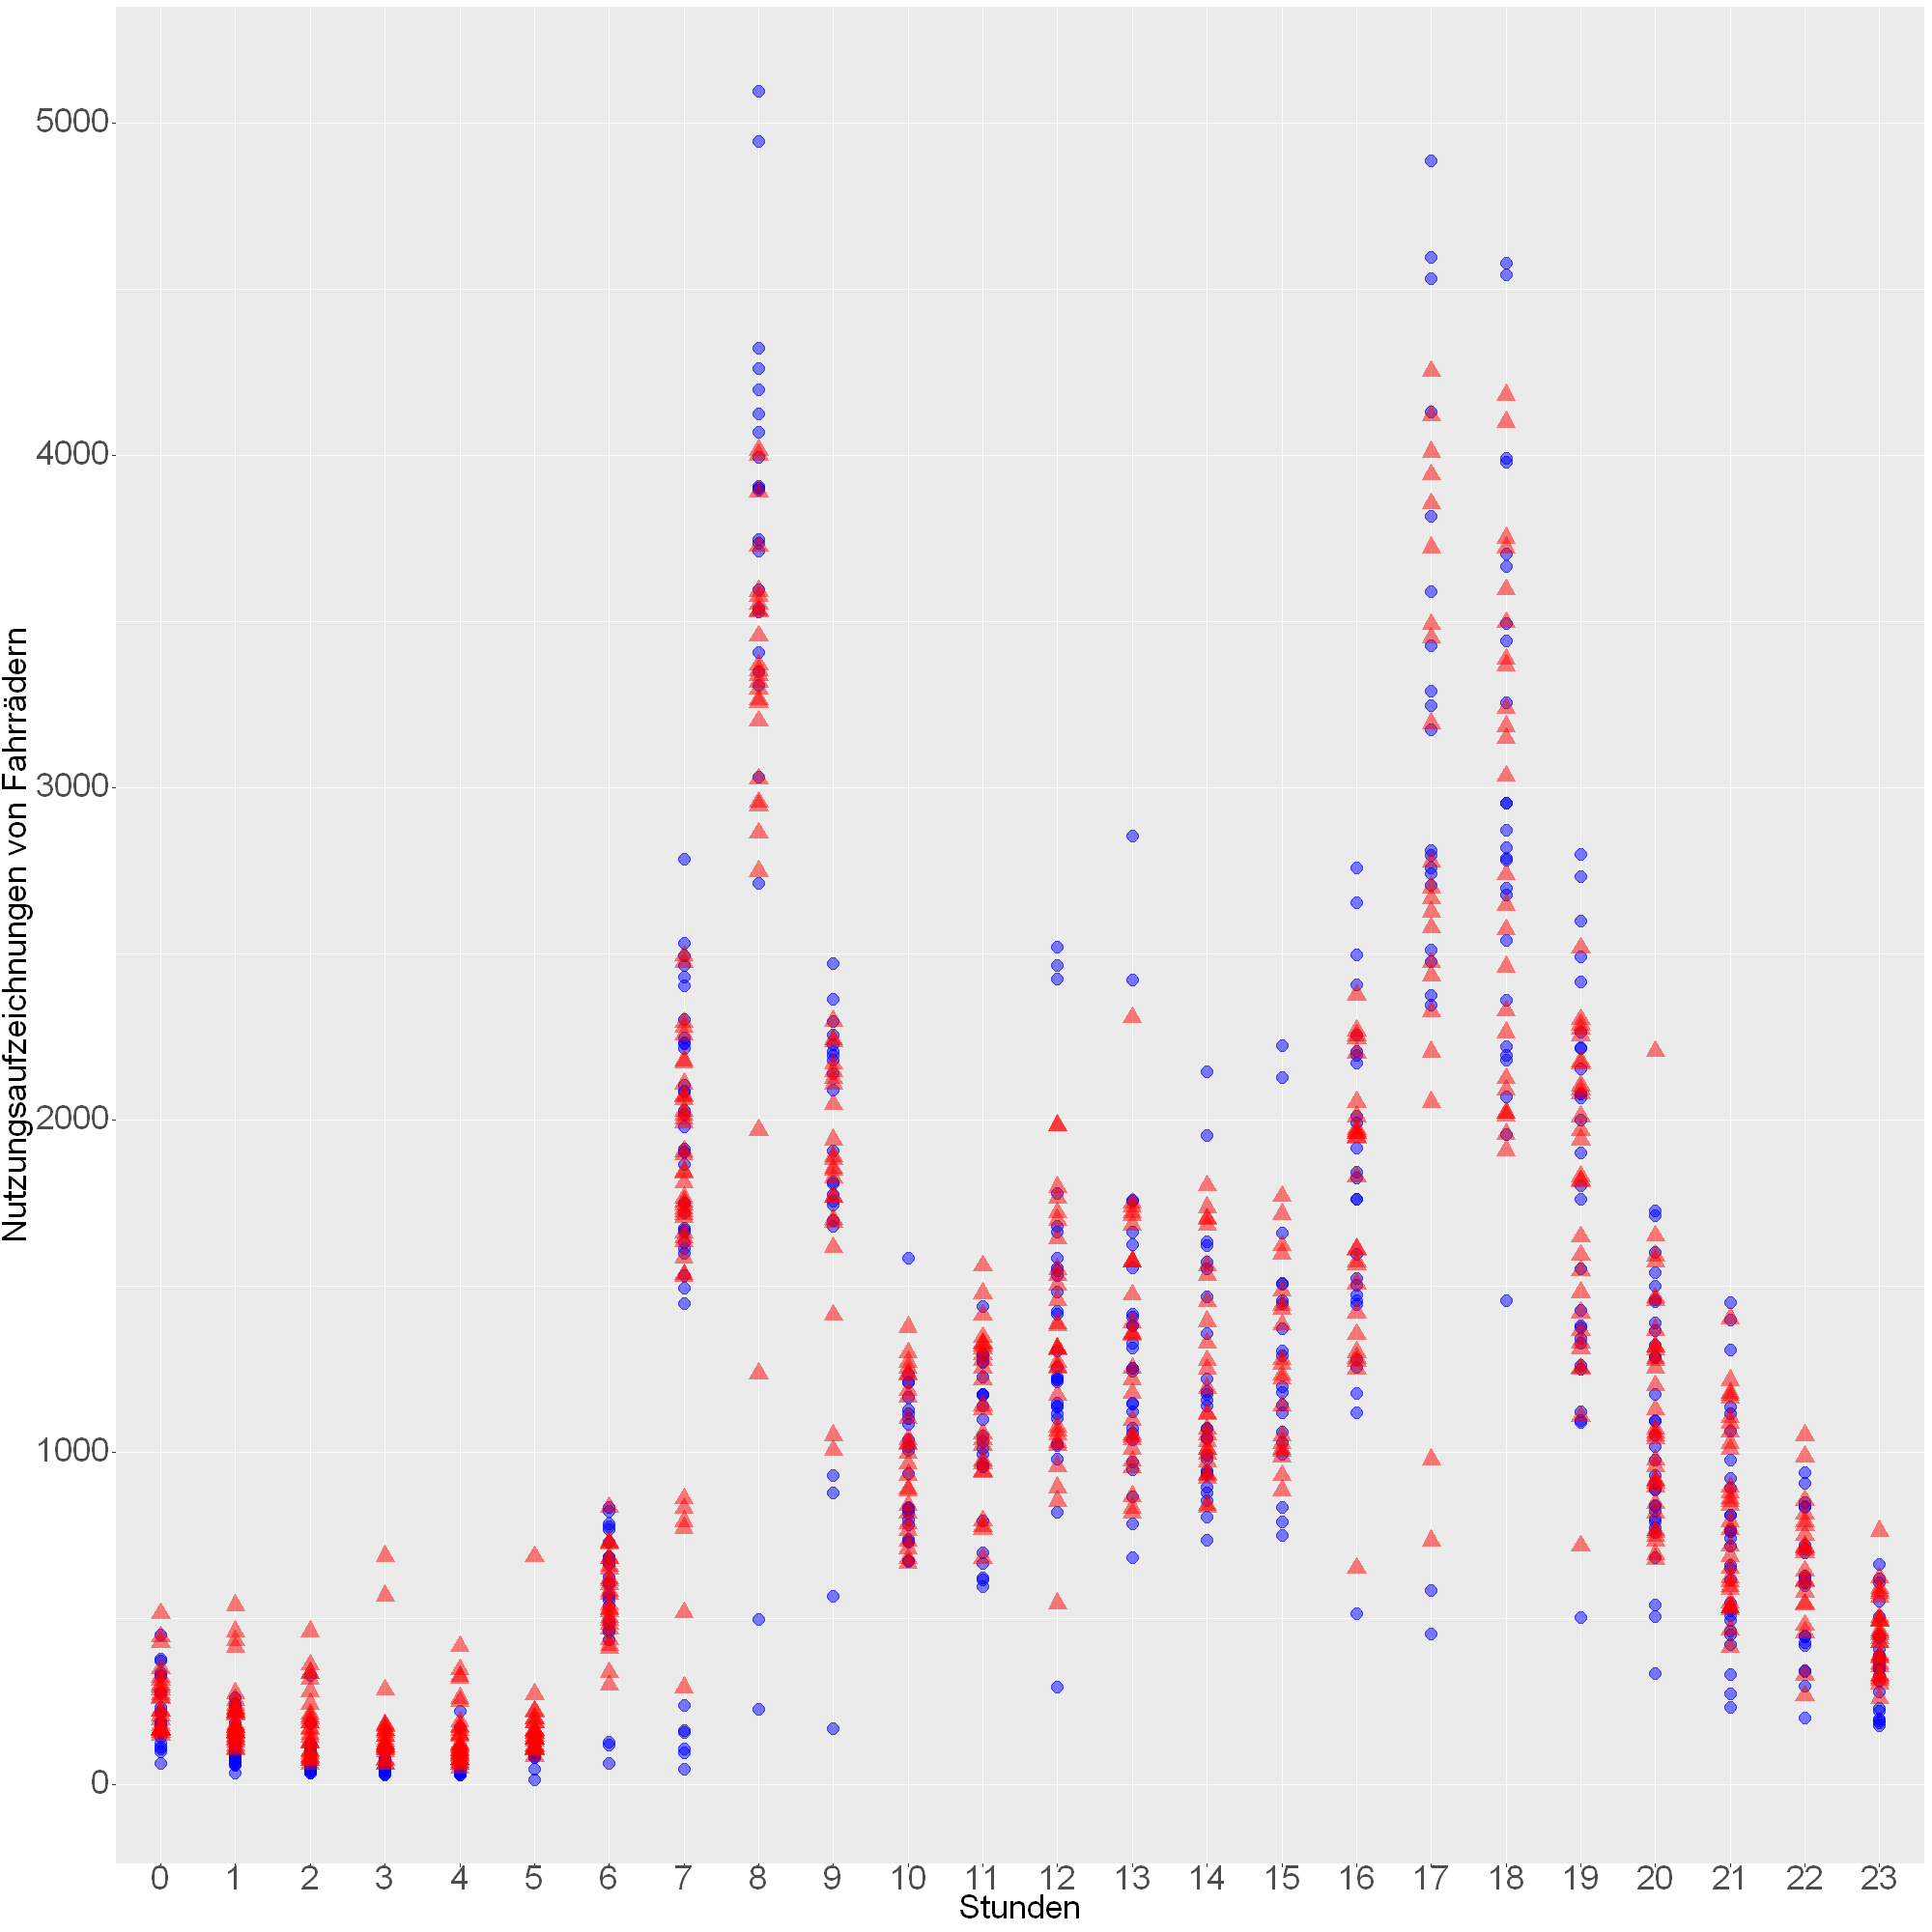

In [119]:
# Build scatterplot

A = data.frame(x = bike_test_work$hr,y=bike_test_work$cnt)
B = data.frame(x = bike_test_work$hr,y=y_pred_rf)

g<-ggplot(A, aes(x,y)) + 
    geom_point(color = 'blue', alpha = 0.5, size= 4) + 
    geom_point(data= B, color = 'red',  alpha = 0.5, size= 5, shape=17) + 
    labs(x = "Stunden", y = "Nutzungsaufzeichnungen von Fahrrädern", color = "", 'Transperency', size= 25)



#Aussehen Editing
g + theme(axis.text=element_text(size=25),
            axis.title=element_text(size=25))

 


options(repr.plot.width = 20, repr.plot.height = 20, repr.plot.res = 100)